# Exploring data from RCB perspective

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from warnings import filterwarnings
filterwarnings("ignore")
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
# importing datasets
matches    = pd.read_csv(r"C:\Users\Varun\Downloads\Saurav\My_project\scrapping\IPL Data\final_matches_2025.csv")
deliveries = pd.read_csv(r"C:\Users\Varun\Downloads\Saurav\My_project\scrapping\IPL Data\ipl_sorted_deliveries_data.csv") 

In [3]:
matches['venue'] = matches['venue'].replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium')
matches['venue'] = matches['venue'].replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium')

## BASIC EDA

In [4]:
# shape of  the datasets
print(matches.shape)
print(deliveries.shape)

(1169, 20)
(278205, 19)


In [5]:
# matches data preview
matches.head()

id  season        city       date match_type player_of_match  \
0  335982    2008   Bengaluru  4/18/2008     League     BB McCullum   
1  335983    2008  Chandigarh  4/19/2008     League      MEK Hussey   
2  335984    2008       Delhi  4/19/2008     League     MF Maharoof   
3  335985    2008      Mumbai  4/20/2008     League      MV Boucher   
4  335986    2008     Kolkata  4/20/2008     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bengaluru   
1  Punjab Cricket Association Stadium, Mohali                 Punjab Kings   
2                            Feroz Shah Kotla               Delhi Capitals   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Riders  Royal Challengers Bengaluru         field   
1          Chennai Super Kings          Chennai Super Kings           bat   
2             Rajasthan Royals             Rajasthan Royals           bat   
3  Royal Challengers Bengaluru               Mumbai Indians           bat   
4          Sunrisers Hyderabad          Sunrisers Hyderabad           bat   

                        winner   result  result_margin  target_runs  \
0        Kolkata Knight Riders     runs          140.0        223.0   
1          Chennai Super Kings     runs           33.0        241.0   
2               Delhi Capitals  wickets            9.0        130.0   
3  Royal Challengers Bengaluru  wickets            5.0        166.0   
4        Kolkata Knight Riders  wickets            5.0        111.0   

   target_overs super_over method    umpire1         umpire2  
0          20.0          N    NaN  Asad Rauf     RE Koertzen  
1          20.0          N    NaN  MR Benson      SL Shastri  
2          20.0          N    NaN  Aleem Dar  GA Pratapkumar  
3          20.0          N    NaN   SJ Davis       DJ Harper  
4          20.0          N    NaN  BF Bowden     K Hariharan

In [6]:
# delvieries dataset preview
deliveries.head()

match_id  inning       date           batting_team  \
0    335982       1  4/18/2008  Kolkata Knight Riders   
1    335982       1  4/18/2008  Kolkata Knight Riders   
2    335982       1  4/18/2008  Kolkata Knight Riders   
3    335982       1  4/18/2008  Kolkata Knight Riders   
4    335982       1  4/18/2008  Kolkata Knight Riders   

                  bowling_team  over  ball_faced  ball       batter   bowler  \
0  Royal Challengers Bangalore     0           1     1   SC Ganguly  P Kumar   
1  Royal Challengers Bangalore     0           1     2  BB McCullum  P Kumar   
2  Royal Challengers Bangalore     0           1     3  BB McCullum  P Kumar   
3  Royal Challengers Bangalore     0           1     3  BB McCullum  P Kumar   
4  Royal Challengers Bangalore     0           1     4  BB McCullum  P Kumar   

   non_striker  batsman_runs  extra_runs  total_runs extra_type  is_wicket  \
0  BB McCullum             0           1           1    legbyes          0   
1   SC Ganguly             0           0           0        NaN          0   
2   SC Ganguly             0           1           1      wides          0   
3   SC Ganguly             0           0           0        NaN          0   
4   SC Ganguly             0           0           0        NaN          0   

  player_dismissed dismissal_kind fielder  
0              NaN            NaN     NaN  
1              NaN            NaN     NaN  
2              NaN            NaN     NaN  
3              NaN            NaN     NaN  
4              NaN            NaN     NaN

In [7]:
# null values in matches dataset
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       8
venue                 0
team1                 0
team2                 0
toss_winner           1
toss_decision         1
winner                6
result                3
result_margin        22
target_runs           4
target_overs          4
super_over            0
method             1146
umpire1               0
umpire2               0
dtype: int64

In [8]:
# null values in deliveries dataset
deliveries.isnull().sum()

match_id                 0
inning                   0
date                     0
batting_team             0
bowling_team             0
over                     0
ball_faced               0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extra_type          263072
is_wicket                0
player_dismissed    264382
dismissal_kind      264382
fielder             268192
dtype: int64

In [9]:
# copy of the datasets
df  = matches.copy()
df1 = deliveries.copy()

### First let's deal with matches dataset and find as much as info possible

In [10]:
# separating 2008 to 2024 as df and 2025 data as df1
df_2008_2024 = df[df['season'] != 2025]
df_2025      = df[df['season'] == 2025]
rcb = df[(df['team1'] == 'Royal Challengers Bengaluru') | (df['team2'] == 'Royal Challengers Bengaluru')]

In [11]:
# number of matches played by RCB in each season
# Filter matches where RCB is either team1 or team2
rcb_matches = df_2008_2024[(df_2008_2024['team1'] == 'Royal Challengers Bengaluru') | (df_2008_2024['team2'] == 'Royal Challengers Bengaluru')]

# Count matches played by RCB in each season
matches_per_season = rcb_matches.groupby('season').size().reset_index(name='matches_played')

# total number of matches played {2008-2025}
print(f'Total Number of matches played by rcb till 2008-2025 :-',matches_per_season['matches_played'].sum())
print('*'*100)
print('Season-Wise')
matches_per_season

Total Number of matches played by rcb till 2008-2025 :- 255
****************************************************************************************************
Season-Wise


season  matches_played
0     2008              14
1     2009              16
2     2010              16
3     2011              16
4     2012              15
5     2013              16
6     2014              14
7     2015              16
8     2016              16
9     2017              13
10    2018              14
11    2019              14
12    2020              15
13    2021              15
14    2022              16
15    2023              14
16    2024              15

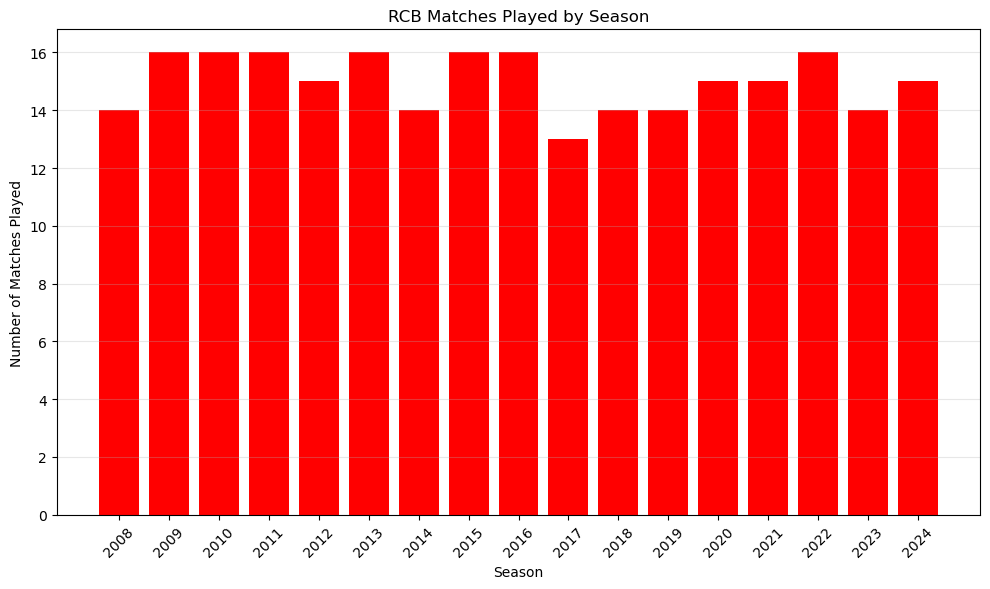

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(matches_per_season['season'], matches_per_season['matches_played'],color = 'red')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.title('RCB Matches Played by Season')
plt.xticks(matches_per_season['season'], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# number of matches played by RCB in each season
# Filter matches where RCB is either team1 or team2
rcb_matches1 = df_2025[(df['team1'] == 'Royal Challengers Bengaluru') | (df_2025['team2'] == 'Royal Challengers Bengaluru')]

# Count matches played by RCB in each season
matches_per_season_2025 = rcb_matches1.groupby('season').size().reset_index(name='matches_played')

# total number of matches played {2008-2025}
print(f'Total Number of matches played by rcb :-',matches_per_season_2025['matches_played'].sum())
print('*'*100)

Total Number of matches played by rcb :- 16
****************************************************************************************************


In [14]:
# According to this dataset the most number of matches played by RCB ever is 16
# [that has happend 8 times and 4 times out of this they have made it to the finals]

### Number of matches WON by RCB at HOME and AWAY

In [15]:
# rcb_matches  -- 2008 - 2024
# rcb_matches1 -- 2025
# rcb          -- ALL RCB MATCHES DATA {2008 - 2025}

In [16]:
# Home stadium winning record {M Chinnaswamy Stadium} as of 2024
# Total number of matches played at home
total_matches = rcb_matches[rcb_matches['venue'] == 'M Chinnaswamy Stadium']
print(f'Total number of matches played by RCB at Chinnaswamy Stadium is :-',total_matches.shape[0])
# Number of matches won at Home
won_home = rcb_matches[(rcb_matches['venue'] == 'M Chinnaswamy Stadium') & (rcb_matches['winner'] == 'Royal Challengers Bengaluru')]
print(f'Number of matches WON by RCB at Chinnaswamy Stadium is :-',won_home.shape[0])
# Perecentage of winning at home
win_percentage = (int(won_home.shape[0]) / int(total_matches.shape[0])) * 100
print(f'Therefore the winning percentage of rcb at Home stadium between 2008 and 2024 season is :-',win_percentage)

Total number of matches played by RCB at Chinnaswamy Stadium is :- 90
Number of matches WON by RCB at Chinnaswamy Stadium is :- 44
Therefore the winning percentage of rcb at Home stadium between 2008 and 2024 season is :- 48.888888888888886


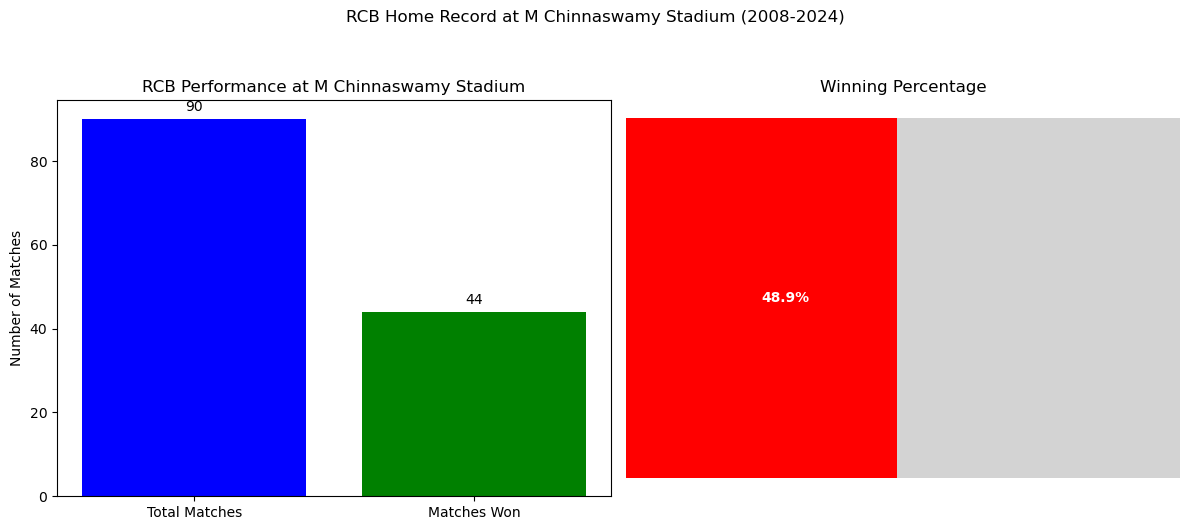

In [17]:
# Data
labels = ['Total Matches', 'Matches Won', 'Win Percentage']
values = [total_matches.shape[0], won_home.shape[0], win_percentage]

# Create figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for matches
ax1.bar(labels[:2], values[:2], color=['blue', 'green'])
ax1.set_title('RCB Performance at M Chinnaswamy Stadium')
ax1.set_ylabel('Number of Matches')
ax1.text(0, values[0]+2, str(values[0]), ha='center')
ax1.text(1, values[1]+2, str(values[1]), ha='center')

# Win percentage gauge
ax2.barh(['Win %'], [100], color='lightgray')
ax2.barh(['Win %'], [values[2]], color='red')
ax2.set_xlim(0, 100)
ax2.set_title('Winning Percentage')
ax2.text(values[2]/2, 0, f'{values[2]:.1f}%', va='center', color='white', fontweight='bold')
ax2.axis('off')

plt.suptitle('RCB Home Record at M Chinnaswamy Stadium (2008-2024)', y=1.05)
plt.tight_layout()
plt.show()

In [18]:
# Home stadium winning record {M Chinnaswamy Stadium} in 2025 
# Total number of matches played at home
total_matches = rcb_matches1[rcb_matches1['venue'] == 'M Chinnaswamy Stadium']
print(f'Total number of matches played by RCB at Chinnaswamy Stadium is :-',total_matches.shape[0])
# Number of matches won at Home
won_home = rcb_matches1[(rcb_matches1['venue'] == 'M Chinnaswamy Stadium') & (rcb_matches1['winner'] == 'Royal Challengers Bengaluru')]
print(f'Number of matches WON by RCB at Chinnaswamy Stadium is :-',won_home.shape[0])
# Perecentage of winning at home
win_percentage = (int(won_home.shape[0]) / int(total_matches.shape[0])) * 100
print(f'Therefore the winning percentage of rcb at Home in 2025 season is :-',win_percentage)

Total number of matches played by RCB at Chinnaswamy Stadium is :- 6
Number of matches WON by RCB at Chinnaswamy Stadium is :- 2
Therefore the winning percentage of rcb at Home in 2025 season is :- 33.33333333333333


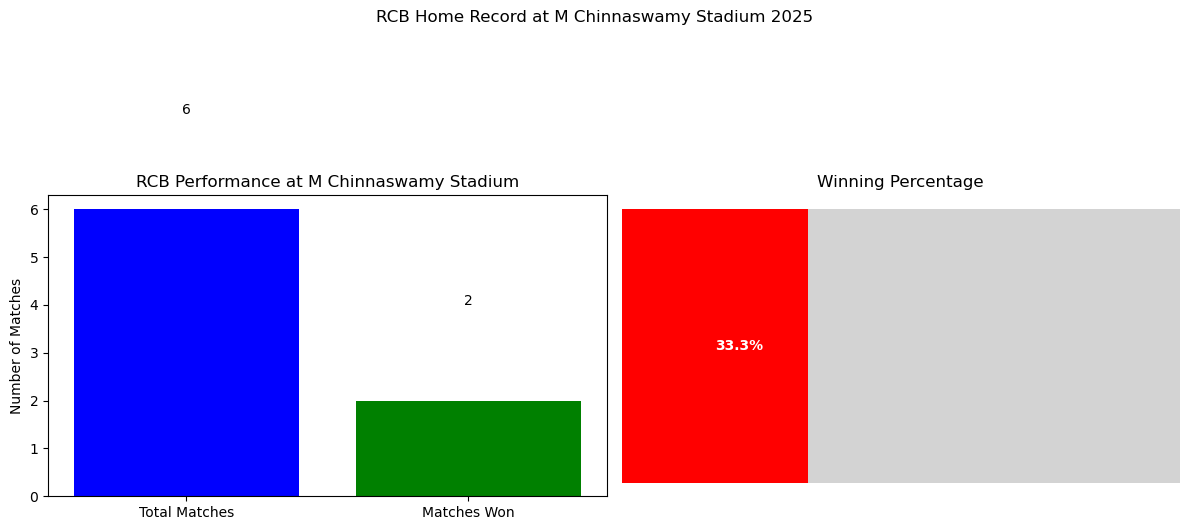

In [19]:
# Data
labels = ['Total Matches', 'Matches Won', 'Win Percentage']
values = [total_matches.shape[0], won_home.shape[0], win_percentage]

# Create figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for matches
ax1.bar(labels[:2], values[:2], color=['blue', 'green'])
ax1.set_title('RCB Performance at M Chinnaswamy Stadium')
ax1.set_ylabel('Number of Matches')
ax1.text(0, values[0]+2, str(values[0]), ha='center')
ax1.text(1, values[1]+2, str(values[1]), ha='center')

# Win percentage gauge
ax2.barh(['Win %'], [100], color='lightgray')
ax2.barh(['Win %'], [values[2]], color='red')
ax2.set_xlim(0, 100)
ax2.set_title('Winning Percentage')
ax2.text(values[2]/2, 0, f'{values[2]:.1f}%', va='center', color='white', fontweight='bold')
ax2.axis('off')

plt.suptitle('RCB Home Record at M Chinnaswamy Stadium 2025', y=1.05)
plt.tight_layout()
plt.show()

In [20]:
# The percentage of winning at rcb at home is comparitively low as to the previous year's data (reason in deliveries dataset eda)

In [21]:
# Away stadium winning record as of 2024
# Total number of matches played at home
total_matches = rcb_matches[rcb_matches['venue'] != 'M Chinnaswamy Stadium']
print(f'Total number of matches played by RCB at AWAY Stadium is :-',total_matches.shape[0])
# Number of matches won at Home
won_home = rcb_matches[(rcb_matches['venue'] != 'M Chinnaswamy Stadium') & (rcb_matches['winner'] == 'Royal Challengers Bengaluru')]
print(f'Number of matches WON by RCB at AWAY Stadium is :-',won_home.shape[0])
# Perecentage of winning at home
win_percentage = (int(won_home.shape[0]) / int(total_matches.shape[0])) * 100
print(f'Therefore the winning percentage of rcb at AWAY stadium between 2008 and 2024 season is :-',win_percentage)

Total number of matches played by RCB at AWAY Stadium is :- 165
Number of matches WON by RCB at AWAY Stadium is :- 79
Therefore the winning percentage of rcb at AWAY stadium between 2008 and 2024 season is :- 47.878787878787875


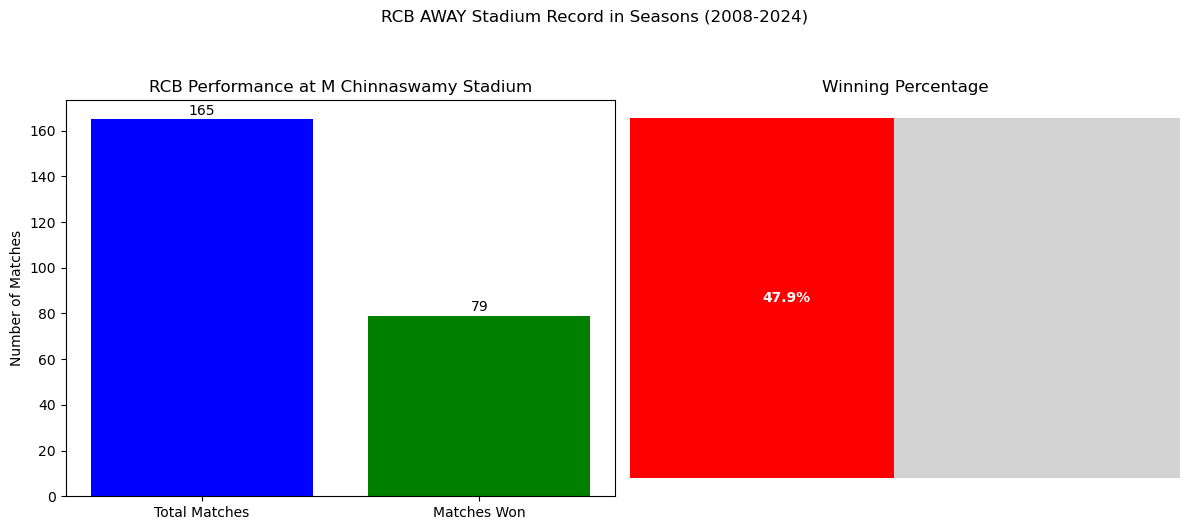

In [22]:
# Data
labels = ['Total Matches', 'Matches Won', 'Win Percentage']
values = [total_matches.shape[0], won_home.shape[0], win_percentage]

# Create figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for matches
ax1.bar(labels[:2], values[:2], color=['blue', 'green'])
ax1.set_title('RCB Performance at M Chinnaswamy Stadium')
ax1.set_ylabel('Number of Matches')
ax1.text(0, values[0]+2, str(values[0]), ha='center')
ax1.text(1, values[1]+2, str(values[1]), ha='center')

# Win percentage gauge
ax2.barh(['Win %'], [100], color='lightgray')
ax2.barh(['Win %'], [values[2]], color='red')
ax2.set_xlim(0, 100)
ax2.set_title('Winning Percentage')
ax2.text(values[2]/2, 0, f'{values[2]:.1f}%', va='center', color='white', fontweight='bold')
ax2.axis('off')

plt.suptitle('RCB AWAY Stadium Record in Seasons (2008-2024)', y=1.05)
plt.tight_layout()
plt.show()

In [23]:
# AWAY stadium winning record {M Chinnaswamy Stadium} in 2025 
# Total number of matches played at home
total_matches = rcb_matches1[rcb_matches1['venue'] != 'M Chinnaswamy Stadium']
print(f'Total number of matches played by RCB at AWAY Stadium is :-',total_matches.shape[0])
# Number of matches won at Home
won_home = rcb_matches1[(rcb_matches1['venue'] != 'M Chinnaswamy Stadium') & (rcb_matches1['winner'] == 'Royal Challengers Bengaluru')]
print(f'Number of matches WON by RCB at AWAY Stadium in 2025 is :-',won_home.shape[0])
# Perecentage of winning at home
win_percentage = (int(won_home.shape[0]) / int(total_matches.shape[0])) * 100
print(f'Therefore the winning percentage of rcb at AWAY stadium in 2025 season is :-',win_percentage)

Total number of matches played by RCB at AWAY Stadium is :- 10
Number of matches WON by RCB at AWAY Stadium in 2025 is :- 9
Therefore the winning percentage of rcb at AWAY stadium in 2025 season is :- 90.0


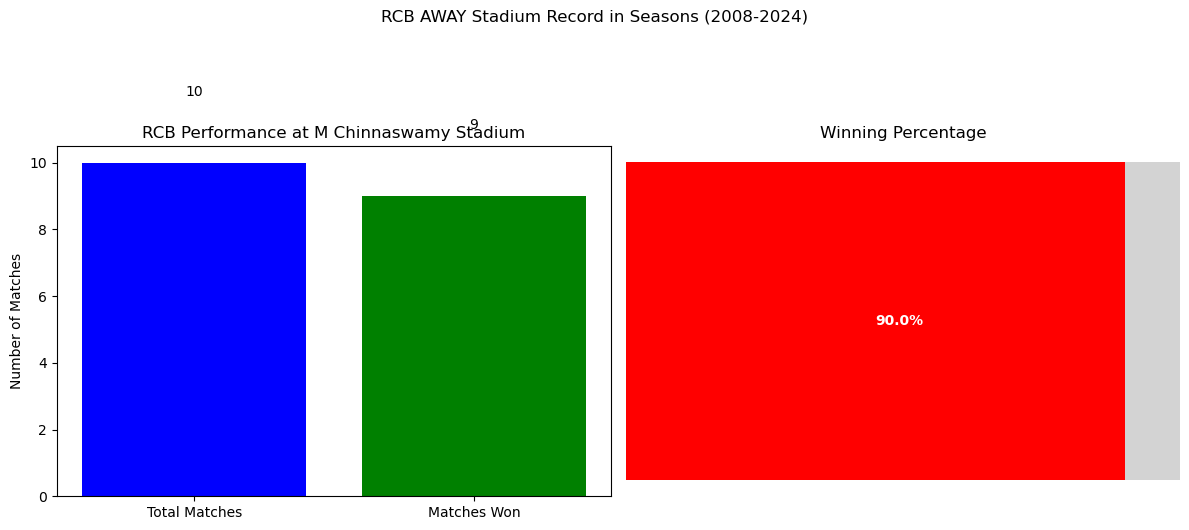

In [24]:
# Data
labels = ['Total Matches', 'Matches Won', 'Win Percentage']
values = [total_matches.shape[0], won_home.shape[0], win_percentage]

# Create figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for matches
ax1.bar(labels[:2], values[:2], color=['blue', 'green'])
ax1.set_title('RCB Performance at M Chinnaswamy Stadium')
ax1.set_ylabel('Number of Matches')
ax1.text(0, values[0]+2, str(values[0]), ha='center')
ax1.text(1, values[1]+2, str(values[1]), ha='center')

# Win percentage gauge
ax2.barh(['Win %'], [100], color='lightgray')
ax2.barh(['Win %'], [values[2]], color='red')
ax2.set_xlim(0, 100)
ax2.set_title('Winning Percentage')
ax2.text(values[2]/2, 0, f'{values[2]:.1f}%', va='center', color='white', fontweight='bold')
ax2.axis('off')

plt.suptitle('RCB AWAY Stadium Record in Seasons (2008-2024)', y=1.05)
plt.tight_layout()
plt.show()

In [25]:
# In this season (2025) the winning margin at away stadium is almost doubled as compared to the previous year's 

### Lucky Venue for RCB 

In [26]:
total_matches_played_at_venue = rcb['venue'].value_counts().head(5)
winning_venue                 = rcb[rcb['winner'] == 'Royal Challengers Bengaluru']['venue'].value_counts().head(5)
lossing_venue                 = rcb[rcb['winner'] != 'Royal Challengers Bengaluru']['venue'].value_counts().head(5)

In [27]:
total_matches_played_at_venue.values

array([96, 12, 11, 11,  8], dtype=int64)

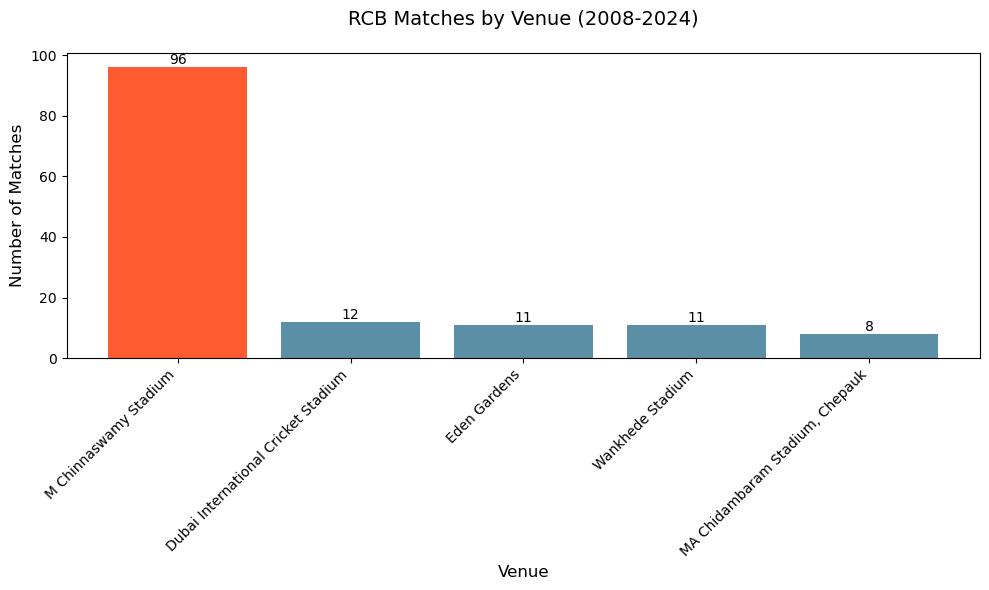

In [28]:
# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(total_matches_played_at_venue.index,total_matches_played_at_venue.values, color=['#FF5B33', '#5B8FA6', '#5B8FA6', '#5B8FA6', '#5B8FA6'])

# Customize plot
plt.title('RCB Matches by Venue (2008-2024)', fontsize=14, pad=20)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add some padding at the bottom for venue names
plt.tight_layout()

plt.show()

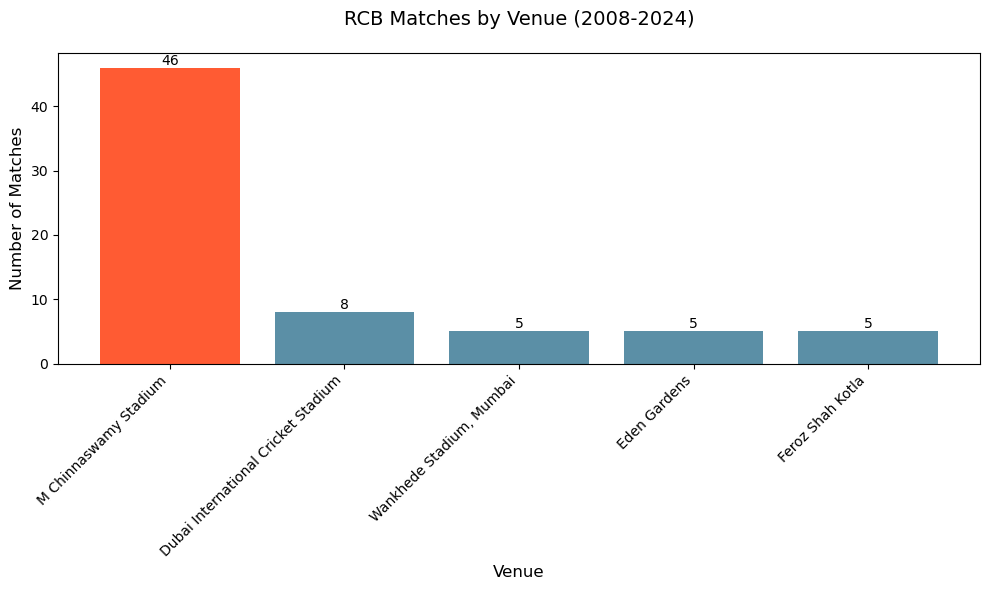

In [29]:
# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(winning_venue.index,winning_venue.values, color=['#FF5B33', '#5B8FA6', '#5B8FA6', '#5B8FA6', '#5B8FA6'])

# Customize plot
plt.title('RCB Matches by Venue (2008-2024)', fontsize=14, pad=20)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add some padding at the bottom for venue names
plt.tight_layout()

plt.show()

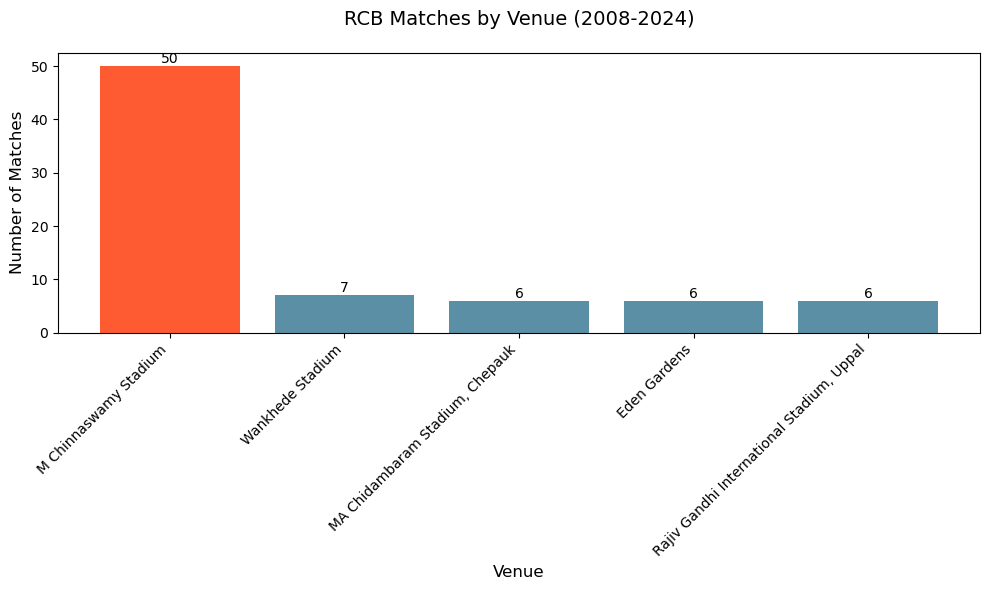

In [30]:
# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(lossing_venue.index,lossing_venue.values, color=['#FF5B33', '#5B8FA6', '#5B8FA6', '#5B8FA6', '#5B8FA6'])

# Customize plot
plt.title('RCB Matches by Venue (2008-2024)', fontsize=14, pad=20)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add some padding at the bottom for venue names
plt.tight_layout()

plt.show()

In [31]:
# There's No such lucky venue for rcb bcz the loosing and winning venue number's are almost identical.

### Head to Head against each team

In [32]:
# Head to Head before 2024
# Filter rows where RCB is involved
head_off = df[(df['team1'] == 'Royal Challengers Bengaluru') | (df['team2'] == 'Royal Challengers Bengaluru')]

# Add a column to identify the opponent team
head_off['opponent'] = head_off.apply(
    lambda row: row['team2'] if row['team1'] == 'Royal Challengers Bengaluru' else row['team1'], axis=1
)

# Group by opponent and calculate match count, wins, and losses
head_to_head = head_off.groupby('opponent').apply(lambda group: pd.Series({
    'Total Matches': len(group),
    'RCB Wins': len(group[group['winner'] == 'Royal Challengers Bengaluru']),
    'RCB Losses': len(group[(group['winner'] != 'Royal Challengers Bengaluru') & (group['winner'] != 'Match Abonded')])
})).reset_index()

# Display the head-to-head record
head_to_head

opponent  Total Matches  RCB Wins  RCB Losses
0       Chennai Super Kings             34        13          21
1            Delhi Capitals             33        20          13
2             Gujarat Lions              5         3           2
3            Gujarat Titans              6         3           3
4      Kochi Tuskers Kerala              2         2           0
5     Kolkata Knight Riders             36        15          21
6      Lucknow Super Giants              6         4           2
7            Mumbai Indians             34        15          19
8             Pune Warriors              5         5           0
9              Punjab Kings             37        19          18
10         Rajasthan Royals             33        17          16
11  Rising Pune Supergiants              4         2           2
12      Sunrisers Hyderabad             36        16          20

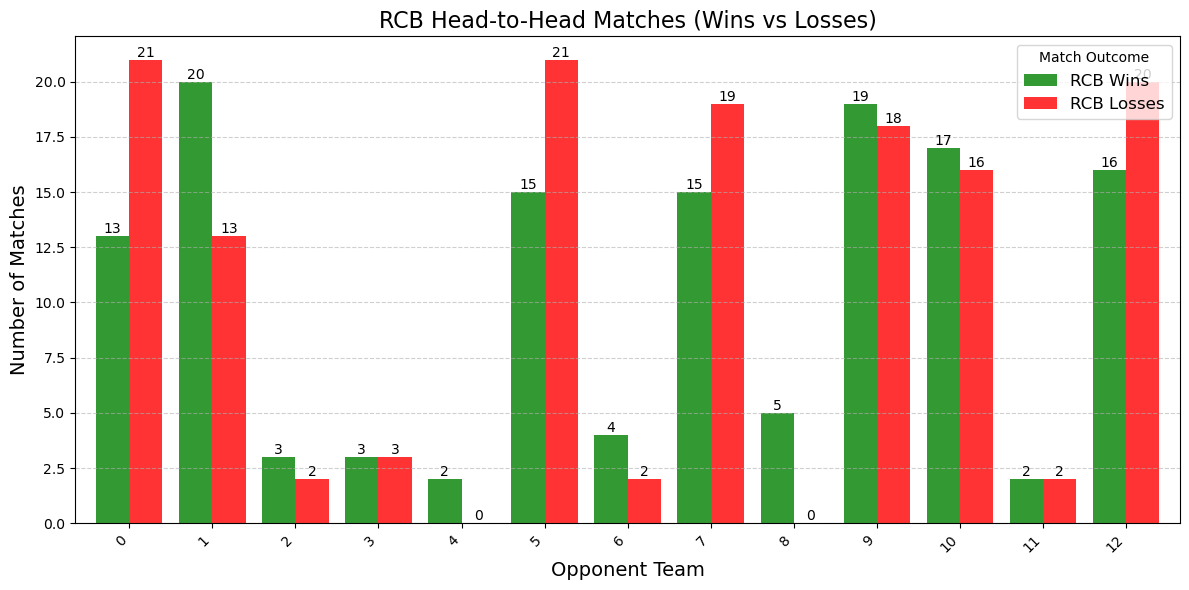

In [36]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
head_to_head[['RCB Wins', 'RCB Losses']].plot(kind='bar', ax=ax, width=0.8, color=['green', 'red'], alpha=0.8)

# Add annotations
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Fix x-ticks
x = np.arange(len(head_to_head.index))
ax.set_xticks(x)
ax.set_xticklabels(head_to_head.index, rotation=45, ha='right')

# Customizing
ax.set_title('RCB Head-to-Head Matches (Wins vs Losses)', fontsize=16)
ax.set_xlabel('Opponent Team', fontsize=14)
ax.set_ylabel('Number of Matches', fontsize=14)
ax.legend(title="Match Outcome", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### Toss Impact and Decision

In [37]:
# toss_winner and match_winner 
toss_won_match_won  = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['winner'] == 'Royal Challengers Bengaluru')].shape[0]
total_toss_won      = rcb[rcb['toss_winner'] == 'Royal Challengers Bengaluru'].shape[0]
toss_won_match_loss = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total number of times when RCB won the toss',total_toss_won)
print(f'Number of times when RCB won the toss and match as well',toss_won_match_won)
print(f'Number of times when RCB won the toss but loss the match',toss_won_match_loss)

Total number of times when RCB won the toss 128
Number of times when RCB won the toss and match as well 67
Number of times when RCB won the toss but loss the match 61


In [38]:
# toss_loss and match_winner 
toss_loss_match_won  = rcb[(rcb['toss_winner'] != 'Royal Challengers Bengaluru') & (rcb['winner'] == 'Royal Challengers Bengaluru')].shape[0]
total_toss_loss      = rcb[rcb['toss_winner'] != 'Royal Challengers Bengaluru'].shape[0]
toss_loss_match_loss = rcb[(rcb['toss_winner'] != 'Royal Challengers Bengaluru') & (rcb['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total number of times RCB loss the toss',total_toss_loss)
print(f'Number of times when RCB loss the toss and match as well',toss_loss_match_loss)
print(f'Number of times when RCB loss the toss but won the match',toss_loss_match_won)

Total number of times RCB loss the toss 143
Number of times when RCB loss the toss and match as well 76
Number of times when RCB loss the toss but won the match 67


In [39]:
# let see how many times they won the toss on away stadium and home stadium
# Home
home_toss_win        = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] == 'M Chinnaswamy Stadium')].shape[0]
home_toss_match_win  = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] == 'M Chinnaswamy Stadium') & (rcb['winner'] == 'Royal Challengers Bengaluru')].shape[0]
home_toss_match_loss = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] == 'M Chinnaswamy Stadium') & (rcb['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total Number of toss won by RCB at their HOME ground',home_toss_win)
print(f'Number of times when RCB won the toss and match as well at their HOME ground',home_toss_match_win)
print(f'Number of times when RCB won the toss but lost the match at their HOME ground',home_toss_match_loss)

Total Number of toss won by RCB at their HOME ground 36
Number of times when RCB won the toss and match as well at their HOME ground 19
Number of times when RCB won the toss but lost the match at their HOME ground 17


In [40]:
# let see how many times they won the toss on away stadium and home stadium
# AWAY
away_toss_win        = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] != 'M Chinnaswamy Stadium')].shape[0]
away_toss_match_win  = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] != 'M Chinnaswamy Stadium') & (rcb['winner'] == 'Royal Challengers Bengaluru')].shape[0]
away_toss_match_loss = rcb[(rcb['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] != 'M Chinnaswamy Stadium') & (rcb['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total Number of toss won by RCB at their AWAY ground',away_toss_win)
print(f'Number of times when RCB won the toss and match as well at AWAY ground',away_toss_match_win)
print(f'Number of times when RCB won the toss but lost the match at AWAY ground',away_toss_match_loss)

Total Number of toss won by RCB at their AWAY ground 92
Number of times when RCB won the toss and match as well at AWAY ground 48
Number of times when RCB won the toss but lost the match at AWAY ground 44


In [41]:
# Toss Decision before 2025 on home vs away stadiums
toss_decison_home = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium')]['toss_decision'].value_counts()
toss_decison_away = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')]['toss_decision'].value_counts()

print(f'When RCB is playing on their HOME ground they have choosen to field first',toss_decison_home[0],'times and choosen to bat first',toss_decison_home[1],'times before 2025.')
print(f'When RCB is playing on AWAY ground they have choosen to field first',toss_decison_away[0],'times and choosen to bat first',toss_decison_away[1],'times before 2025.')
# from this we can analyze that RCB prefer's to chase the total doesn't matter whether they are playing however when they play at home they almost
# every time opt to bat in the 2nd inning's

When RCB is playing on their HOME ground they have choosen to field first 34 times and choosen to bat first 2 times before 2025.
When RCB is playing on AWAY ground they have choosen to field first 52 times and choosen to bat first 33 times before 2025.


In [42]:
# lets see how much the toss_decision has help them(before 2025)
right_field_decision_home = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'field')].shape[0]
right_field_decision_away = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'field')].shape[0]
right_bat_decision_home = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'bat')].shape[0]
right_bat_decision_away = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'bat')].shape[0]

print(f'Number of times batting first at HOME ground was right decision',right_bat_decision_home)
print(f'Number of times batting first at AWAY ground was right decision',right_bat_decision_away)
print(f'Number of times fielding first at HOME ground was right decision',right_field_decision_home)
print(f'Number of times fielding first at AWAY ground was right decision',right_field_decision_away)
# conclusion batting 2nd is benifical for RCB whether atr HOME or AWAY ground

Number of times batting first at HOME ground was right decision 1
Number of times batting first at AWAY ground was right decision 16
Number of times fielding first at HOME ground was right decision 18
Number of times fielding first at AWAY ground was right decision 26


In [43]:
# lets see the data for season 2025 
# Toss Decision before 2025 on home vs away stadiums
toss_decison_home = rcb_matches1[(rcb_matches1['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches1['venue'] == 'M Chinnaswamy Stadium')]['toss_decision'].value_counts()
toss_decison_away = rcb_matches1[(rcb_matches1['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches1['venue'] != 'M Chinnaswamy Stadium')]['toss_decision'].value_counts()

print(f'When RCB is playing on their HOME ground they have choosen to field first',toss_decison_home,'times and choosen to bat first',toss_decison_home,'times in season 2025.')
print(f'When RCB is playing on AWAY ground they have choosen to field first',toss_decison_away[0],'times and choosen to bat first 0 times in season 2025.')
# rcb doesn't won any toss at home but they here in this season too they choose to field first as well,similar to the previous years

When RCB is playing on their HOME ground they have choosen to field first Series([], Name: count, dtype: int64) times and choosen to bat first Series([], Name: count, dtype: int64) times in season 2025.
When RCB is playing on AWAY ground they have choosen to field first 7 times and choosen to bat first 0 times in season 2025.


### Player of the match

In [44]:
# Player of the match overall -- 
number_of_awards = rcb[rcb['winner'] == 'Royal Challengers Bengaluru'][['player_of_match']].value_counts()
df_player_of_match = pd.DataFrame(number_of_awards).reset_index()
df_player_of_match

player_of_match  count
0     AB de Villiers     23
1            V Kohli     17
2           CH Gayle     17
3          JH Kallis      5
4          YS Chahal      4
5       F du Plessis      4
6         GJ Maxwell      4
7     Mohammed Siraj      3
8      R Vinay Kumar      3
9      Krunal Pandya      3
10          HV Patel      3
11         MK Pandey      2
12        RM Patidar      2
13      PWH de Silva      2
14          PA Patel      2
15          UT Yadav      2
16        MV Boucher      2
17     Rajat Patidar      2
18          A Kumble      2
19      Yuvraj Singh      2
20      KP Pietersen      2
21        KD Karthik      2
22       LRPL Taylor      2
23        SO Hetmyer      1
24        Anuj Rawat      1
25          WG Jacks      1
26        WD Parnell      1
27       Virat Kohli      1
28          VR Aaron      1
29           C Green      1
30        D Padikkal      1
31        TG Southee      1
32     Suyash Sharma      1
33         SR Watson      1
34          MA Starc      1
35         S Aravind      1
36        JD Unadkat      1
37        RV Uthappa      1
38     Jitesh Sharma      1
39    Josh Hazlewood      1
40          R Dravid      1
41         Phil Salt      1
42         KM Jadhav      1
43           P Kumar      1
44     Mandeep Singh      1
45         KS Bharat      1
46  Romario Shepherd      1

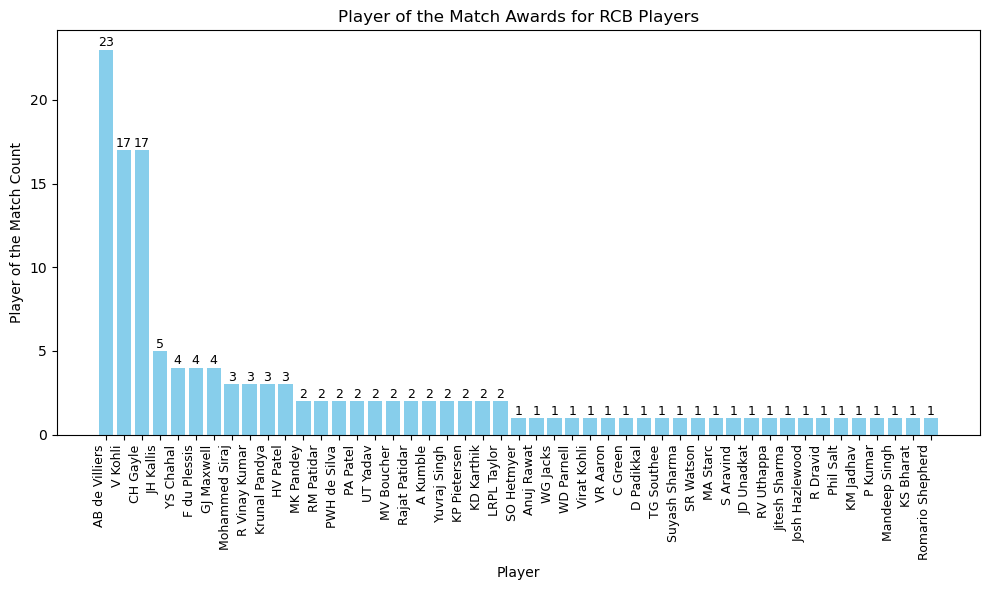

In [45]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_player_of_match["player_of_match"], df_player_of_match["count"], color='skyblue')

# Annotating each bar with the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f'{int(bar.get_height())}', ha='center', fontsize=9)

# Set labels and title
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.xlabel("Player")
plt.ylabel("Player of the Match Count")
plt.title("Player of the Match Awards for RCB Players", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
# player of the matches at the HOME 
number_of_awards_home = rcb[(rcb['winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] == 'M Chinnaswamy Stadium')][['player_of_match']].value_counts()
df_player_of_match_home = pd.DataFrame(number_of_awards_home).reset_index()
df_player_of_match_home

player_of_match  count
0     AB de Villiers      9
1           CH Gayle      9
2            V Kohli      8
3      R Vinay Kumar      2
4       F du Plessis      2
5          JH Kallis      2
6           UT Yadav      1
7         TG Southee      1
8         SO Hetmyer      1
9   Romario Shepherd      1
10        RV Uthappa      1
11           P Kumar      1
12          PA Patel      1
13           C Green      1
14    Mohammed Siraj      1
15     Mandeep Singh      1
16         KM Jadhav      1
17    Josh Hazlewood      1
18        GJ Maxwell      1
19      Yuvraj Singh      1

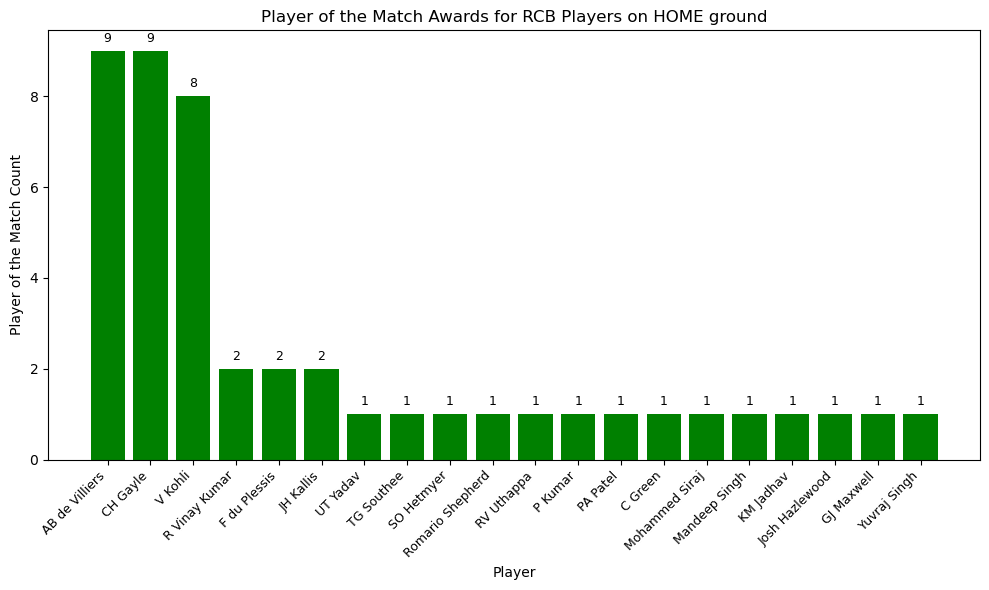

In [47]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_player_of_match_home["player_of_match"], df_player_of_match_home["count"], color='green')

# Annotating each bar with the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f'{int(bar.get_height())}', ha='center', fontsize=9)

# Set labels and title
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.xlabel("Player")
plt.ylabel("Player of the Match Count")
plt.title("Player of the Match Awards for RCB Players on HOME ground", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
# player of the match at away ground
number_of_awards_away = rcb[(rcb['winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] != 'M Chinnaswamy Stadium')][['player_of_match']].value_counts()
df_player_of_match_away = pd.DataFrame(number_of_awards_away).reset_index()
df_player_of_match_away

player_of_match  count
0   AB de Villiers     14
1          V Kohli      9
2         CH Gayle      8
3        YS Chahal      4
4       GJ Maxwell      3
5         HV Patel      3
6        JH Kallis      3
7    Krunal Pandya      3
8         A Kumble      2
9      LRPL Taylor      2
10   Rajat Patidar      2
11      RM Patidar      2
12    PWH de Silva      2
13      MV Boucher      2
14       MK Pandey      2
15  Mohammed Siraj      2
16    KP Pietersen      2
17      KD Karthik      2
18    F du Plessis      2
19        MA Starc      1
20   Suyash Sharma      1
21      Anuj Rawat      1
22        WG Jacks      1
23      WD Parnell      1
24     Virat Kohli      1
25        VR Aaron      1
26      D Padikkal      1
27        UT Yadav      1
28       S Aravind      1
29       SR Watson      1
30       KS Bharat      1
31      JD Unadkat      1
32   R Vinay Kumar      1
33        R Dravid      1
34       Phil Salt      1
35   Jitesh Sharma      1
36        PA Patel      1
37    Yuvraj Singh      1

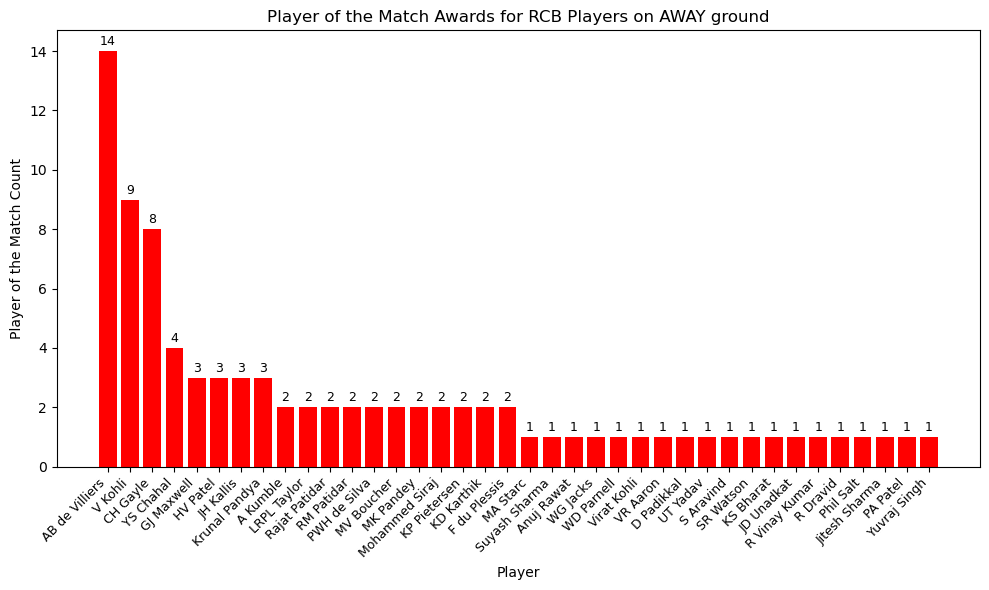

In [49]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_player_of_match_away["player_of_match"], df_player_of_match_away["count"], color='red')

# Annotating each bar with the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f'{int(bar.get_height())}', ha='center', fontsize=9)

# Set labels and title
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.xlabel("Player")
plt.ylabel("Player of the Match Count")
plt.title("Player of the Match Awards for RCB Players on AWAY ground", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## DELIVERIES DATASET

In [4]:
# making copy of the deliveries dataset 
df_copy = deliveries.copy()
df_copy.head()

match_id  inning       date           batting_team  \
0    335982       1  4/18/2008  Kolkata Knight Riders   
1    335982       1  4/18/2008  Kolkata Knight Riders   
2    335982       1  4/18/2008  Kolkata Knight Riders   
3    335982       1  4/18/2008  Kolkata Knight Riders   
4    335982       1  4/18/2008  Kolkata Knight Riders   

                  bowling_team  over  ball_faced  ball       batter   bowler  \
0  Royal Challengers Bangalore     0           1     1   SC Ganguly  P Kumar   
1  Royal Challengers Bangalore     0           1     2  BB McCullum  P Kumar   
2  Royal Challengers Bangalore     0           1     3  BB McCullum  P Kumar   
3  Royal Challengers Bangalore     0           1     3  BB McCullum  P Kumar   
4  Royal Challengers Bangalore     0           1     4  BB McCullum  P Kumar   

   non_striker  batsman_runs  extra_runs  total_runs extra_type  is_wicket  \
0  BB McCullum             0           1           1    legbyes          0   
1   SC Ganguly             0           0           0        NaN          0   
2   SC Ganguly             0           1           1      wides          0   
3   SC Ganguly             0           0           0        NaN          0   
4   SC Ganguly             0           0           0        NaN          0   

  player_dismissed dismissal_kind fielder  
0              NaN            NaN     NaN  
1              NaN            NaN     NaN  
2              NaN            NaN     NaN  
3              NaN            NaN     NaN  
4              NaN            NaN     NaN

In [5]:
# changing name of Royal Challengers Bangalore to Royal Challengers Bengaluru
df_copy['bowling_team'] = df_copy['bowling_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
df_copy['batting_team'] = df_copy['batting_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

In [6]:
# separating all the rcb records -- 
rcb_team = df_copy[(df_copy['batting_team'] == 'Royal Challengers Bengaluru') | (df_copy['bowling_team'] == 'Royal Challengers Bengaluru')]

In [7]:
rcb_team.shape

(63632, 19)

In [8]:
# preview of the data
rcb_team.head()

match_id  inning       date           batting_team  \
0    335982       1  4/18/2008  Kolkata Knight Riders   
1    335982       1  4/18/2008  Kolkata Knight Riders   
2    335982       1  4/18/2008  Kolkata Knight Riders   
3    335982       1  4/18/2008  Kolkata Knight Riders   
4    335982       1  4/18/2008  Kolkata Knight Riders   

                  bowling_team  over  ball_faced  ball       batter   bowler  \
0  Royal Challengers Bengaluru     0           1     1   SC Ganguly  P Kumar   
1  Royal Challengers Bengaluru     0           1     2  BB McCullum  P Kumar   
2  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
3  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
4  Royal Challengers Bengaluru     0           1     4  BB McCullum  P Kumar   

   non_striker  batsman_runs  extra_runs  total_runs extra_type  is_wicket  \
0  BB McCullum             0           1           1    legbyes          0   
1   SC Ganguly             0           0           0        NaN          0   
2   SC Ganguly             0           1           1      wides          0   
3   SC Ganguly             0           0           0        NaN          0   
4   SC Ganguly             0           0           0        NaN          0   

  player_dismissed dismissal_kind fielder  
0              NaN            NaN     NaN  
1              NaN            NaN     NaN  
2              NaN            NaN     NaN  
3              NaN            NaN     NaN  
4              NaN            NaN     NaN

In [9]:
# before anything we need to convert date into pd.date_time type and extract year out it and cretae new column as season
rcb_team['date'] = pd.to_datetime(rcb_team['date'])

In [10]:
rcb_team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63632 entries, 0 to 278204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   match_id          63632 non-null  int64         
 1   inning            63632 non-null  int64         
 2   date              63632 non-null  datetime64[ns]
 3   batting_team      63632 non-null  object        
 4   bowling_team      63632 non-null  object        
 5   over              63632 non-null  int64         
 6   ball_faced        63632 non-null  int64         
 7   ball              63632 non-null  int64         
 8   batter            63632 non-null  object        
 9   bowler            63632 non-null  object        
 10  non_striker       63632 non-null  object        
 11  batsman_runs      63632 non-null  int64         
 12  extra_runs        63632 non-null  int64         
 13  total_runs        63632 non-null  int64         
 14  extra_type        3523 non

In [11]:
# extracting new column as season from date column 
rcb_team['season'] = rcb_team['date'].dt.year

In [12]:
rcb_team.head()

match_id  inning       date           batting_team  \
0    335982       1 2008-04-18  Kolkata Knight Riders   
1    335982       1 2008-04-18  Kolkata Knight Riders   
2    335982       1 2008-04-18  Kolkata Knight Riders   
3    335982       1 2008-04-18  Kolkata Knight Riders   
4    335982       1 2008-04-18  Kolkata Knight Riders   

                  bowling_team  over  ball_faced  ball       batter   bowler  \
0  Royal Challengers Bengaluru     0           1     1   SC Ganguly  P Kumar   
1  Royal Challengers Bengaluru     0           1     2  BB McCullum  P Kumar   
2  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
3  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
4  Royal Challengers Bengaluru     0           1     4  BB McCullum  P Kumar   

   non_striker  batsman_runs  extra_runs  total_runs extra_type  is_wicket  \
0  BB McCullum             0           1           1    legbyes          0   
1   SC Ganguly             0           0           0        NaN          0   
2   SC Ganguly             0           1           1      wides          0   
3   SC Ganguly             0           0           0        NaN          0   
4   SC Ganguly             0           0           0        NaN          0   

  player_dismissed dismissal_kind fielder  season  
0              NaN            NaN     NaN    2008  
1              NaN            NaN     NaN    2008  
2              NaN            NaN     NaN    2008  
3              NaN            NaN     NaN    2008  
4              NaN            NaN     NaN    2008

In [13]:
# data of season 2008 to 2024
rcb_team_2024 = rcb_team[rcb_team['season'] != 2025] 
print(rcb_team_2024.shape)
print('-'*25)
# data of season 2025
rcb_team_2025 = rcb_team[rcb_team['season'] == 2025] 
print(rcb_team_2025.shape)

(60182, 20)
-------------------------
(3450, 20)


In [14]:
rcb_team_2024.head()

match_id  inning       date           batting_team  \
0    335982       1 2008-04-18  Kolkata Knight Riders   
1    335982       1 2008-04-18  Kolkata Knight Riders   
2    335982       1 2008-04-18  Kolkata Knight Riders   
3    335982       1 2008-04-18  Kolkata Knight Riders   
4    335982       1 2008-04-18  Kolkata Knight Riders   

                  bowling_team  over  ball_faced  ball       batter   bowler  \
0  Royal Challengers Bengaluru     0           1     1   SC Ganguly  P Kumar   
1  Royal Challengers Bengaluru     0           1     2  BB McCullum  P Kumar   
2  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
3  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
4  Royal Challengers Bengaluru     0           1     4  BB McCullum  P Kumar   

   non_striker  batsman_runs  extra_runs  total_runs extra_type  is_wicket  \
0  BB McCullum             0           1           1    legbyes          0   
1   SC Ganguly             0           0           0        NaN          0   
2   SC Ganguly             0           1           1      wides          0   
3   SC Ganguly             0           0           0        NaN          0   
4   SC Ganguly             0           0           0        NaN          0   

  player_dismissed dismissal_kind fielder  season  
0              NaN            NaN     NaN    2008  
1              NaN            NaN     NaN    2008  
2              NaN            NaN     NaN    2008  
3              NaN            NaN     NaN    2008  
4              NaN            NaN     NaN    2008

## Total_runs EDA

In [15]:
batting_rcb_2024 = rcb_team_2024[rcb_team_2024['batting_team'] == 'Royal Challengers Bengaluru']

In [16]:
first_inning_record_2024  = batting_rcb_2024[batting_rcb_2024['inning'] == 1]
second_inning_record_2024 = batting_rcb_2024[batting_rcb_2024['inning'] == 2]

In [17]:
print(first_inning_record_2024.shape)
print(second_inning_record_2024.shape)

(15894, 20)
(14111, 20)


In [18]:
# first inning scores of RCB till 2024
scores_first_inning_2024  = first_inning_record_2024.groupby('match_id')[['total_runs']].sum()
scores_second_inning_2024 = second_inning_record_2024.groupby('match_id')[['total_runs']].sum()

In [19]:
scores_first_inning_2024.shape

(130, 1)

In [20]:
scores_second_inning_2024.shape

(125, 1)

<Axes: ylabel='total_runs'>

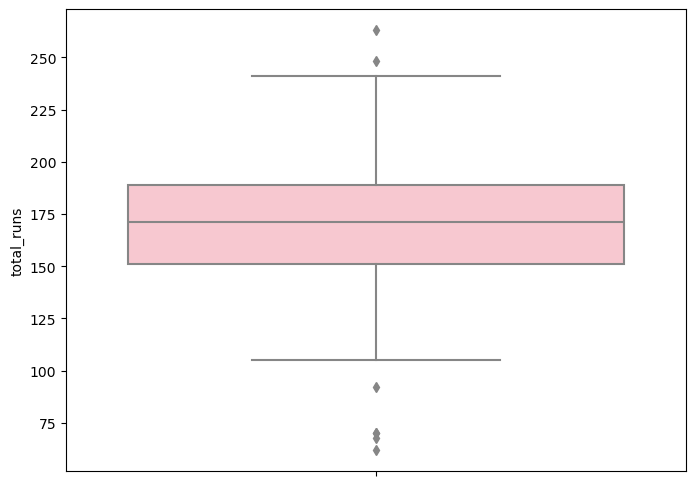

In [21]:
# lets search for outlier while batting first and second 

plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_first_inning_2024, y = "total_runs", color='pink',orient = 'x')

In [22]:
print('max_1st_inng -->',scores_first_inning_2024.max()[0])
print('min_1st_inng -->',scores_first_inning_2024.min()[0])

max_1st_inng --> 263
min_1st_inng --> 62


In [23]:
# filtering Outliers -- 
Q1 = np.percentile(scores_first_inning_2024,25)
Q2 = np.percentile(scores_first_inning_2024,50)
Q3 = np.percentile(scores_first_inning_2024,75)

# IQR
IQR = Q3 - Q1

# calculating upper_bound and lower_bound 
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

In [24]:
print(upper_bound)
print(lower_bound)

245.625
94.625


In [25]:
# remove outliers from the dataset of 1st inning score 
scores_first_inning_2024 = scores_first_inning_2024[scores_first_inning_2024['total_runs'] < upper_bound]
scores_first_inning_2024 = scores_first_inning_2024[scores_first_inning_2024['total_runs'] > lower_bound]

<Axes: ylabel='total_runs'>

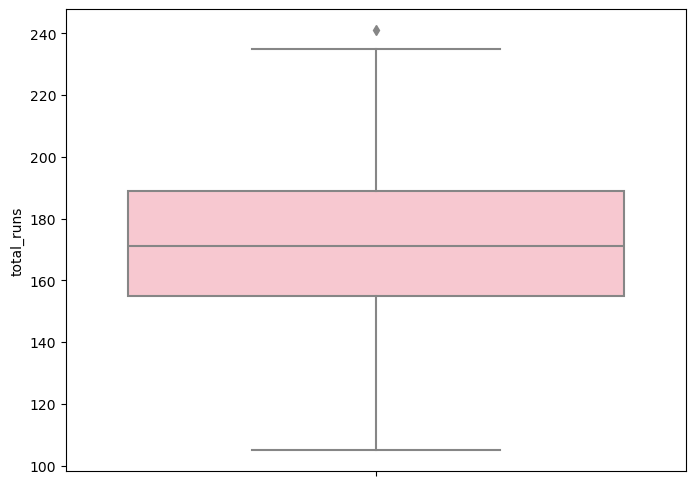

In [26]:
# let's see the boxplot as well
plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_first_inning_2024, y = "total_runs", color='pink',orient = 'x')

<Axes: ylabel='total_runs'>

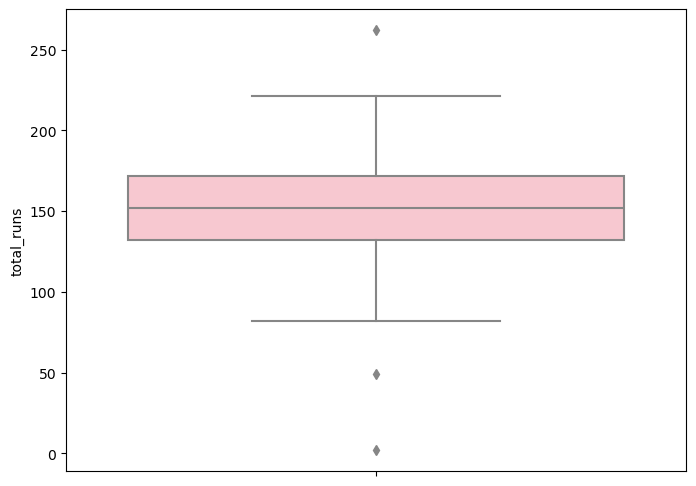

In [27]:
# let's see the boxplot as well for 2nd inning before 2025
plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_second_inning_2024, y = "total_runs", color='pink',orient = 'x')

In [29]:
print('max_2nd_inng -->',scores_second_inning_2024.max()[0])

max_2nd_inng --> 262


In [30]:
# remove the outlier's from the 2nd inning scores 
Q1 = np.percentile(scores_second_inning_2024,25)
Q2 = np.percentile(scores_second_inning_2024,50)
Q3 = np.percentile(scores_second_inning_2024,75)

# IQR
IQR = Q3 - Q1

# calculating upper_bound and lower_bound 
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

In [31]:
print(upper_bound)
print(lower_bound)

232.0
72.0


In [32]:
# remove outliers from the dataset of 1st inning score 
scores_second_inning_2024 = scores_second_inning_2024[scores_second_inning_2024['total_runs'] < upper_bound]
scores_second_inning_2024 = scores_second_inning_2024[scores_second_inning_2024['total_runs'] > lower_bound]

<Axes: ylabel='total_runs'>

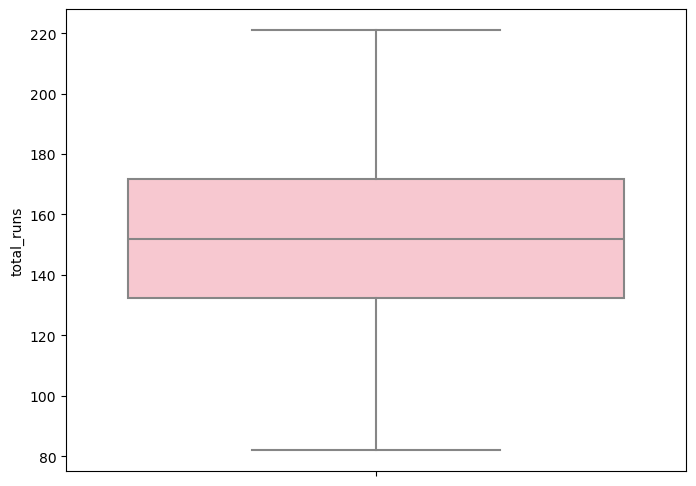

In [33]:
# let's see the boxplot as well
plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_second_inning_2024, y = "total_runs", color='pink',orient = 'x')

In [34]:
# Lets see the mean and median for total runs as a team before 2025 
first_inning_mean     = scores_first_inning_2024.mean()
second_inning_mean    = scores_second_inning_2024.mean()
first_inning_median   = scores_first_inning_2024.median()
second_inning_median  = scores_second_inning_2024.median()

In [35]:
print(first_inning_mean[0])
print(first_inning_median[0])

171.2439024390244
171.0


In [36]:
print(second_inning_mean[0])
print(second_inning_median[0])

150.2622950819672
152.0


<Axes: ylabel='Density'>

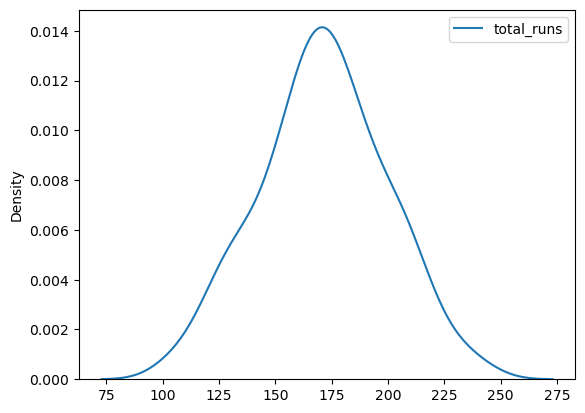

In [37]:
# since mean and median is almost similar for both the innings lets see if they follow normal dist
sns.kdeplot(scores_first_inning_2024)

In [39]:
from scipy.stats import norm

# Step 1: Calculate mean and std
mean_runs = scores_first_inning_2024.mean()
std_runs  = scores_first_inning_2024.std()

# Step 2: Z-score for 170
z_score = (170 - mean_runs) / std_runs  # This will be a float, not a Series
prob_gt_200 = 1 - norm.cdf(z_score[0])

print(f"Z-score for 170 runs: {z_score[0]:.2f}")
print(f"Probability of scoring more than 170: {prob_gt_200:.2%}")

Z-score for 170 runs: -0.04
Probability of scoring more than 170: 51.77%


In [ ]:
# In every second match rcb score at least 170 runs while batting first

<Axes: ylabel='Density'>

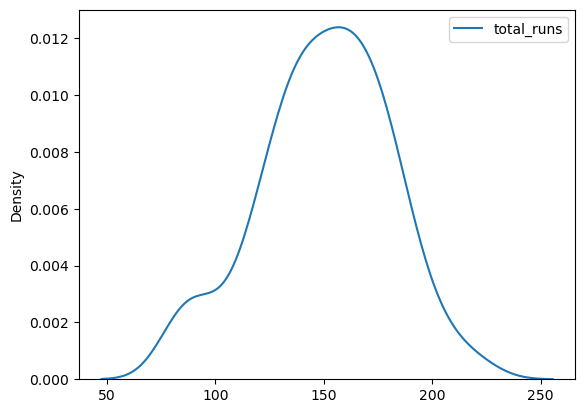

In [85]:
sns.kdeplot(scores_second_inning_2024)

In [86]:
# from the visualization point of view we can say that they follow the normal-dist but to be sure let's perform shapiro wilk test
from scipy.stats import shapiro

In [87]:
# Perform Shapiro-Wilk test on first inning scores data
stat, p_value = shapiro(scores_first_inning_2024)

# Output the results
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis: Data is normally distributed.")
else:
    print("Reject the null hypothesis: Data is not normally distributed.")

Test Statistic: 0.9938
P-value: 0.8674
Fail to reject the null hypothesis: Data is normally distributed.


In [88]:
# Perform Shapiro-Wilk test on second inning score
stat, p_value = shapiro(scores_second_inning_2024)

# Output the results
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis: Data is normally distributed.")
else:
    print("Reject the null hypothesis: Data is not normally distributed.")

Test Statistic: 0.9845
P-value: 0.1762
Fail to reject the null hypothesis: Data is normally distributed.


In [89]:
# now we can be sure that the data is normally dist and remove the outliers by being more sure as 99.97% will be within 3std
std_first_inning  = scores_first_inning_2024.std()
std_second_inning = scores_second_inning_2024.std()

In [90]:
# Define outlier thresholds
lower_threshold = first_inning_mean - 3 * std_first_inning
upper_threshold = first_inning_mean + 3 * std_first_inning

In [91]:
lower_threshold

total_runs    87.269075
dtype: float64

In [92]:
scores_first_inning_2024[scores_first_inning_2024['total_runs'] < lower_threshold[0]].count()

total_runs    0
dtype: int64

In [93]:
scores_first_inning_2024[scores_first_inning_2024['total_runs'] > upper_threshold[0]].count()

total_runs    0
dtype: int64

In [94]:
# Define outlier thresholds
lower_threshold = first_inning_mean - 3 * std_second_inning
upper_threshold = first_inning_mean + 3 * std_second_inning

In [95]:
scores_second_inning_2024[scores_second_inning_2024['total_runs'] < lower_threshold[0]].count()

total_runs    0
dtype: int64

In [96]:
scores_second_inning_2024[scores_second_inning_2024['total_runs'] > upper_threshold[0]].count()

total_runs    0
dtype: int64

In [ ]:
# no outlier in first inning data or second inning data,since all the ouliers are confirmed and we know the dist of our dataset lets analyze
# the data more from player and team performance perspective

In [97]:
scores_first_inning_2024.index

Index([ 335992,  336006,  336012,  336016,  336026,  336029,  336034,  392182,
        392191,  392194,
       ...
       1359544, 1422119, 1422128, 1422137, 1426263, 1426279, 1426296, 1426300,
       1426306, 1426310],
      dtype='int64', name='match_id', length=123)

## Batter's Performance Analysis

In [98]:
# shape of data before outlier filteration
print(first_inning_record_2024.shape)
print(second_inning_record_2024.shape)

(15894, 20)
(14111, 20)


In [242]:
df_1st_inn = first_inning_record_2024[first_inning_record_2024['match_id'].isin(scores_first_inning_2024.index)]
df_2nd_inn = second_inning_record_2024[second_inning_record_2024['match_id'].isin(scores_second_inning_2024.index)]

In [243]:
df_1st_inn

match_id  inning       date                 batting_team  \
2377      335992       1 2008-04-26  Royal Challengers Bengaluru   
2378      335992       1 2008-04-26  Royal Challengers Bengaluru   
2379      335992       1 2008-04-26  Royal Challengers Bengaluru   
2380      335992       1 2008-04-26  Royal Challengers Bengaluru   
2381      335992       1 2008-04-26  Royal Challengers Bengaluru   
...          ...     ...        ...                          ...   
260361   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260362   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260363   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260364   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260365   1426310       1 2024-05-22  Royal Challengers Bengaluru   

            bowling_team  over  ball_faced  ball         batter  \
2377    Rajasthan Royals     0           1     1  S Chanderpaul   
2378    Rajasthan Royals     0           1     2       R Dravid   
2379    Rajasthan Royals     0           1     3  S Chanderpaul   
2380    Rajasthan Royals     0           1     4  S Chanderpaul   
2381    Rajasthan Royals     0           1     5  S Chanderpaul   
...                  ...   ...         ...   ...            ...   
260361  Rajasthan Royals    19           1     2      KV Sharma   
260362  Rajasthan Royals    19           1     3      KV Sharma   
260363  Rajasthan Royals    19           1     4  Swapnil Singh   
260364  Rajasthan Royals    19           1     5  Swapnil Singh   
260365  Rajasthan Royals    19           1     6      KV Sharma   

                bowler    non_striker  batsman_runs  extra_runs  total_runs  \
2377         SR Watson       R Dravid             1           0           1   
2378         SR Watson  S Chanderpaul             0           0           0   
2379         SR Watson    LRPL Taylor             1           0           0   
2380         SR Watson    LRPL Taylor             1           0           0   
2381         SR Watson    LRPL Taylor             1           0           0   
...                ...            ...           ...         ...         ...   
260361  Sandeep Sharma  Swapnil Singh             4           0           4   
260362  Sandeep Sharma  Swapnil Singh             5           0           1   
260363  Sandeep Sharma      KV Sharma             8           0           6   
260364  Sandeep Sharma      KV Sharma             9           0           1   
260365  Sandeep Sharma  Swapnil Singh             5           0           0   

       extra_type  is_wicket player_dismissed dismissal_kind    fielder  \
2377          NaN          0              NaN            NaN        NaN   
2378          NaN          1         R Dravid         caught  RA Jadeja   
2379          NaN          0              NaN            NaN        NaN   
2380          NaN          0              NaN            NaN        NaN   
2381          NaN          0              NaN            NaN        NaN   
...           ...        ...              ...            ...        ...   
260361        NaN          0              NaN            NaN        NaN   
260362        NaN          0              NaN            NaN        NaN   
260363        NaN          0              NaN            NaN        NaN   
260364        NaN          0              NaN            NaN        NaN   
260365        NaN          1        KV Sharma         caught   R Powell   

        season  
2377      2008  
2378      2008  
2379      2008  
2380      2008  
2381      2008  
...        ...  
260361    2024  
260362    2024  
260363    2024  
260364    2024  
260365    2024  

[15195 rows x 20 columns]

In [239]:
def label_batting_role(df):
    """
    Adds a new column 'batting_role' to the DataFrame based on the order 
    a batsman comes to bat in each match.
    
    Role Mapping:
    1-3   -> Top-order
    4-6   -> Middle-order
    6-7   -> Finisher
    >7    -> Tailender
    """
    # Get the batting order per match
    df['batting_position'] = (
        df.groupby(['match_id', 'batter']).cumcount() == 0  # first ball faced by batter
    ).groupby([df['match_id'], df['batter']]).transform('idxmax')  # find index of first appearance

    # Get the order number in which each batter appeared
    df['bat_order'] = df.groupby('match_id')['batter'].transform(
        lambda x: pd.factorize(x)[0] + 1
    )

    # Label roles based on bat_order
    def get_role(pos):
        if pos <= 3:
            return 'Top-order'
        elif pos <= 6:
            return 'Middle-order'
        elif pos <= 7:
            return 'Finisher'
        else:
            return 'Tailender'

    df['batting_role'] = df['bat_order'].apply(get_role)

    return df

In [244]:
df_with_roles = label_batting_role(df_1st_inn)
df_with_roles

match_id  inning       date                 batting_team  \
2377      335992       1 2008-04-26  Royal Challengers Bengaluru   
2378      335992       1 2008-04-26  Royal Challengers Bengaluru   
2379      335992       1 2008-04-26  Royal Challengers Bengaluru   
2380      335992       1 2008-04-26  Royal Challengers Bengaluru   
2381      335992       1 2008-04-26  Royal Challengers Bengaluru   
...          ...     ...        ...                          ...   
260361   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260362   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260363   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260364   1426310       1 2024-05-22  Royal Challengers Bengaluru   
260365   1426310       1 2024-05-22  Royal Challengers Bengaluru   

            bowling_team  over  ball_faced  ball         batter  \
2377    Rajasthan Royals     0           1     1  S Chanderpaul   
2378    Rajasthan Royals     0           1     2       R Dravid   
2379    Rajasthan Royals     0           1     3  S Chanderpaul   
2380    Rajasthan Royals     0           1     4  S Chanderpaul   
2381    Rajasthan Royals     0           1     5  S Chanderpaul   
...                  ...   ...         ...   ...            ...   
260361  Rajasthan Royals    19           1     2      KV Sharma   
260362  Rajasthan Royals    19           1     3      KV Sharma   
260363  Rajasthan Royals    19           1     4  Swapnil Singh   
260364  Rajasthan Royals    19           1     5  Swapnil Singh   
260365  Rajasthan Royals    19           1     6      KV Sharma   

                bowler  ... total_runs  extra_type  is_wicket  \
2377         SR Watson  ...          1         NaN          0   
2378         SR Watson  ...          0         NaN          1   
2379         SR Watson  ...          0         NaN          0   
2380         SR Watson  ...          0         NaN          0   
2381         SR Watson  ...          0         NaN          0   
...                ...  ...        ...         ...        ...   
260361  Sandeep Sharma  ...          4         NaN          0   
260362  Sandeep Sharma  ...          1         NaN          0   
260363  Sandeep Sharma  ...          6         NaN          0   
260364  Sandeep Sharma  ...          1         NaN          0   
260365  Sandeep Sharma  ...          0         NaN          1   

        player_dismissed dismissal_kind    fielder season batting_position  \
2377                 NaN            NaN        NaN   2008             2377   
2378            R Dravid         caught  RA Jadeja   2008             2378   
2379                 NaN            NaN        NaN   2008             2377   
2380                 NaN            NaN        NaN   2008             2377   
2381                 NaN            NaN        NaN   2008             2377   
...                  ...            ...        ...    ...              ...   
260361               NaN            NaN        NaN   2024           260359   
260362               NaN            NaN        NaN   2024           260359   
260363               NaN            NaN        NaN   2024           260356   
260364               NaN            NaN        NaN   2024           260356   
260365         KV Sharma         caught   R Powell   2024           260359   

       bat_order  batting_role  
2377           1     Top-order  
2378           2     Top-order  
2379           1     Top-order  
2380           1     Top-order  
2381           1     Top-order  
...          ...           ...  
260361         9     Tailender  
260362         9     Tailender  
260363         8     Tailender  
260364         8     Tailender  
260365         9     Tailender  

[15195 rows x 23 columns]

In [246]:
df_with_roles2 = label_batting_role(df_2nd_inn)
df_with_roles2

match_id  inning       date                 batting_team  \
124       335982       2 2008-04-18  Royal Challengers Bengaluru   
125       335982       2 2008-04-18  Royal Challengers Bengaluru   
126       335982       2 2008-04-18  Royal Challengers Bengaluru   
127       335982       2 2008-04-18  Royal Challengers Bengaluru   
128       335982       2 2008-04-18  Royal Challengers Bengaluru   
...          ...     ...        ...                          ...   
256461   1426290       2 2024-05-04  Royal Challengers Bengaluru   
256462   1426290       2 2024-05-04  Royal Challengers Bengaluru   
256463   1426290       2 2024-05-04  Royal Challengers Bengaluru   
256464   1426290       2 2024-05-04  Royal Challengers Bengaluru   
256465   1426290       2 2024-05-04  Royal Challengers Bengaluru   

                 bowling_team  over  ball_faced  ball         batter  \
124     Kolkata Knight Riders     0           1     1       R Dravid   
125     Kolkata Knight Riders     0           1     2       W Jaffer   
126     Kolkata Knight Riders     0           1     2       W Jaffer   
127     Kolkata Knight Riders     0           1     3       W Jaffer   
128     Kolkata Knight Riders     0           1     4       R Dravid   
...                       ...   ...         ...   ...            ...   
256461         Gujarat Titans    12           1     6  Swapnil Singh   
256462         Gujarat Titans    13           1     1     KD Karthik   
256463         Gujarat Titans    13           1     2     KD Karthik   
256464         Gujarat Titans    13           1     3  Swapnil Singh   
256465         Gujarat Titans    13           1     4  Swapnil Singh   

             bowler  ... total_runs  extra_type  is_wicket  player_dismissed  \
124        AB Dinda  ...          1         NaN          0               NaN   
125        AB Dinda  ...          1       wides          0               NaN   
126        AB Dinda  ...          0         NaN          0               NaN   
127        AB Dinda  ...          1         NaN          0               NaN   
128        AB Dinda  ...          1         NaN          0               NaN   
...             ...  ...        ...         ...        ...               ...   
256461   Noor Ahmad  ...          4         NaN          0               NaN   
256462  Rashid Khan  ...          2         NaN          0               NaN   
256463  Rashid Khan  ...          1         NaN          0               NaN   
256464  Rashid Khan  ...          0         NaN          0               NaN   
256465  Rashid Khan  ...          6         NaN          0               NaN   

       dismissal_kind  fielder season batting_position bat_order  batting_role  
124               NaN      NaN   2008              124         1     Top-order  
125               NaN      NaN   2008              125         2     Top-order  
126               NaN      NaN   2008              125         2     Top-order  
127               NaN      NaN   2008              125         2     Top-order  
128               NaN      NaN   2008              124         1     Top-order  
...               ...      ...    ...              ...       ...           ...  
256461            NaN      NaN   2024           256448         8     Tailender  
256462            NaN      NaN   2024           256443         7      Finisher  
256463            NaN      NaN   2024           256443         7      Finisher  
256464            NaN      NaN   2024           256448         8     Tailender  
256465            NaN      NaN   2024           256448         8     Tailender  

[13909 rows x 23 columns]

In [101]:
# shape of data after outlier filterization
print(df_1st_inn.shape)
print(df_2nd_inn.shape)

(15195, 20)
(13909, 20)


In [102]:
# first inning avg score for rcb before season 2025
scores_1st = df_1st_inn.groupby('match_id')['total_runs'].sum()
m1 = scores_1st.mean()
print(f"While batting first RCB avg score used to be {int(np.round(m1))} before season 2025")

While batting first RCB avg score used to be 171 before season 2025


In [103]:
# second inning avg score for rcb before season 2025
scores_2nd = df_2nd_inn.groupby('match_id')['total_runs'].sum()
m2 = scores_2nd.mean()
print(f"While Chasing RCB avg score used to be {int(np.round(m2))} before season 2025")

While Chasing RCB avg score used to be 150 before season 2025


In [136]:
total_runs_1st = df_1st_inn.groupby(['match_id','batter'])[['total_runs','ball_faced']].sum()
total_runs_2nd = df_2nd_inn.groupby(['match_id','batter'])[['total_runs','ball_faced']].sum()

In [137]:
total_runs_1st['Strike_rate'] = np.round((total_runs_1st['total_runs'].values / total_runs_1st['ball_faced'].values) * 100,2)

In [138]:
total_runs_1st

total_runs  ball_faced  Strike_rate
match_id batter                                            
335992   JH Kallis              11          10       110.00
         LRPL Taylor            46          21       219.05
         MV Boucher              4          10        40.00
         P Kumar                35          30       116.67
         R Dravid                0           1         0.00
...                            ...         ...          ...
1426310  KV Sharma               5           4       125.00
         MK Lomror              32          17       188.24
         RM Patidar             35          23       152.17
         Swapnil Singh           9           4       225.00
         V Kohli                34          24       141.67

[906 rows x 3 columns]

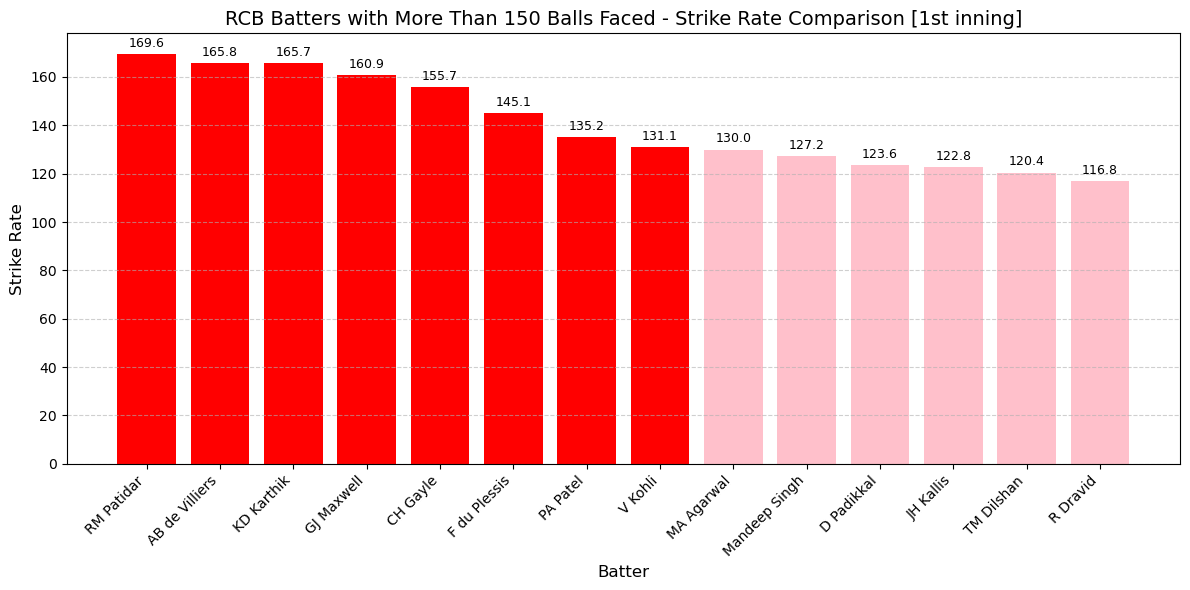

In [180]:
df_reset = total_runs_1st.reset_index()

# Step 1: Reset index and group by batter
batter_summary = df_reset.groupby('batter').agg({
    'total_runs': 'sum',
    'ball_faced': 'sum'
}).reset_index()

# Step 2: Calculate strike rate
batter_summary['Strike_rate'] = (batter_summary['total_runs'] / batter_summary['ball_faced']) * 100

# Step 3: Filter batters with minimum 150 balls faced
filtered = batter_summary[batter_summary['ball_faced'] > 200]

# Step 4: Sort by strike rate (optional)
filtered = filtered.sort_values(by='Strike_rate', ascending=False)

# Step 5: Set colors based on strike rate
colors = ['red' if sr > 130 else 'pink' for sr in filtered['Strike_rate']]

# Step 6: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered['batter'], filtered['Strike_rate'], color=colors)

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Styling
plt.title('RCB Batters with More Than 150 Balls Faced - Strike Rate Comparison [1st inning]', fontsize=14)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [139]:
total_runs_2nd['Strike_rate'] = np.round((total_runs_2nd['total_runs'].values / total_runs_2nd['ball_faced'].values) * 100,2)

In [140]:
total_runs_2nd

total_runs  ball_faced  Strike_rate
match_id batter                                            
335982   AA Noffke              11          12        91.67
         B Akhil                 0           2         0.00
         CL White                6          10        60.00
         JH Kallis               9           7       128.57
         MV Boucher             10          11        90.91
...                            ...         ...          ...
1426290  KD Karthik             21          12       175.00
         RM Patidar              3           4        75.00
         Swapnil Singh          16           9       177.78
         V Kohli                42          27       155.56
         WG Jacks                1           3        33.33

[914 rows x 3 columns]

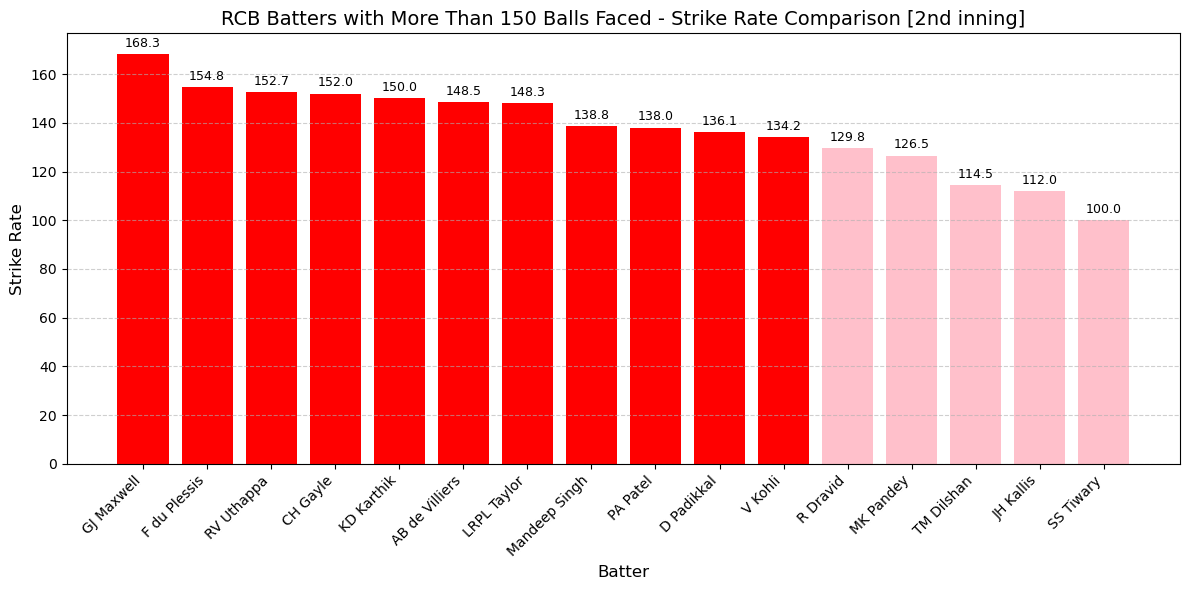

In [179]:
df_reset = total_runs_2nd.reset_index()

# Step 1: Reset index and group by batter
batter_summary = df_reset.groupby('batter').agg({
    'total_runs': 'sum',
    'ball_faced': 'sum'
}).reset_index()

# Step 2: Calculate strike rate
batter_summary['Strike_rate'] = (batter_summary['total_runs'] / batter_summary['ball_faced']) * 100

# Step 3: Filter batters with minimum 150 balls faced
filtered = batter_summary[batter_summary['ball_faced'] > 200]

# Step 4: Sort by strike rate (optional)
filtered = filtered.sort_values(by='Strike_rate', ascending=False)

# Step 5: Set colors based on strike rate
colors = ['red' if sr > 130 else 'pink' for sr in filtered['Strike_rate']]

# Step 6: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered['batter'], filtered['Strike_rate'], color=colors)

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Styling
plt.title('RCB Batters with More Than 150 Balls Faced - Strike Rate Comparison [2nd inning]', fontsize=14)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [169]:
# Count number of 4s by each batter
fours = df_1st_inn[df_1st_inn['total_runs'] == 4].groupby('batter').size().reset_index(name='4s')

# Count number of 6s by each batter
sixes = df_1st_inn[df_1st_inn['total_runs'] == 6].groupby('batter').size().reset_index(name='6s')

# Merge both counts
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)

# Optional: convert to int
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Display
print(boundaries.sort_values(by=['4s', '6s'], ascending=False).head(20))

            batter   4s   6s
85         V Kohli  352  140
5   AB de Villiers  213  132
16        CH Gayle  118  111
25    F du Plessis   98   43
26      GJ Maxwell   70   49
20      D Padikkal   60   12
67      RM Patidar   43   41
35      KD Karthik   43   34
31       JH Kallis   43    6
60        PA Patel   38   10
64        R Dravid   34    5
83      TM Dilshan   31    5
54   Mandeep Singh   30   12
36        KL Rahul   27   12
45      MA Agarwal   25   12
13         C Green   21    9
72         SN Khan   21    6
7         AJ Finch   21    5
49       MK Lomror   19   11
37       KM Jadhav   19    9


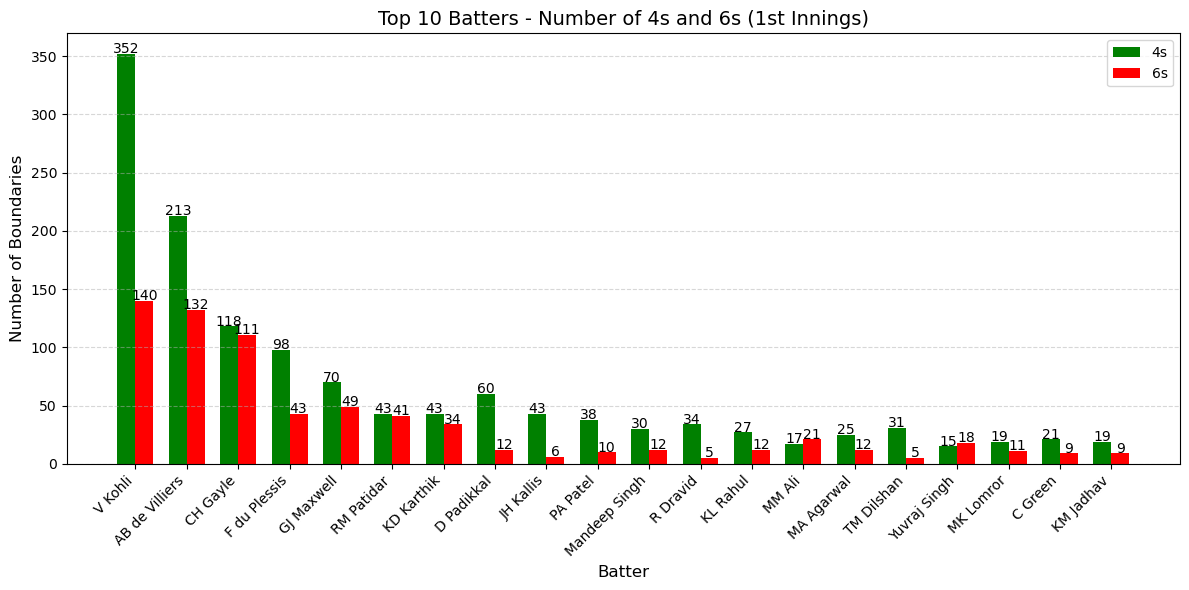

In [174]:
# Merge both
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Sort by total boundaries (optional)
boundaries['total'] = boundaries['4s'] + boundaries['6s']
boundaries = boundaries.sort_values(by='total', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(boundaries))

plt.bar(x, boundaries['4s'], width=bar_width, label='4s', color='green')
plt.bar([i + bar_width for i in x], boundaries['6s'], width=bar_width, label='6s', color='red')

# X-axis labels
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Number of Boundaries", fontsize=12)
plt.title("Top 10 Batters - Number of 4s and 6s (1st Innings)", fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], boundaries['batter'], rotation=45, ha='right')

# Add value annotations
for i in x:
    plt.text(i, boundaries['4s'].iloc[i] + 0.5, str(boundaries['4s'].iloc[i]), ha='center')
    plt.text(i + bar_width, boundaries['6s'].iloc[i] + 0.5, str(boundaries['6s'].iloc[i]), ha='center')

plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [176]:
# Count number of 4s by each batter
fours = df_2nd_inn[df_2nd_inn['total_runs'] == 4].groupby('batter').size().reset_index(name='4s')

# Count number of 6s by each batter
sixes = df_2nd_inn[df_2nd_inn['total_runs'] == 6].groupby('batter').size().reset_index(name='6s')

# Merge both counts
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)

# Optional: convert to int
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Display
print(boundaries.sort_values(by=['4s', '6s'], ascending=False).head(20))

             batter   4s   6s
94          V Kohli  341  118
4    AB de Villiers  136   89
16         CH Gayle  124  106
32        JH Kallis   84   15
67         R Dravid   63   12
63         PA Patel   58    5
24     F du Plessis   53   23
25       GJ Maxwell   43   20
91       TM Dilshan   41    3
18       D Padikkal   34   10
37       KD Karthik   32   12
50        MK Pandey   31    7
73       RV Uthappa   30   22
55    Mandeep Singh   26    9
43      LRPL Taylor   23   25
40     KP Pietersen   23    7
54       MV Boucher   18    8
45       MA Agarwal   17   10
26  Gurkeerat Singh   15    2
38         KL Rahul   14    4


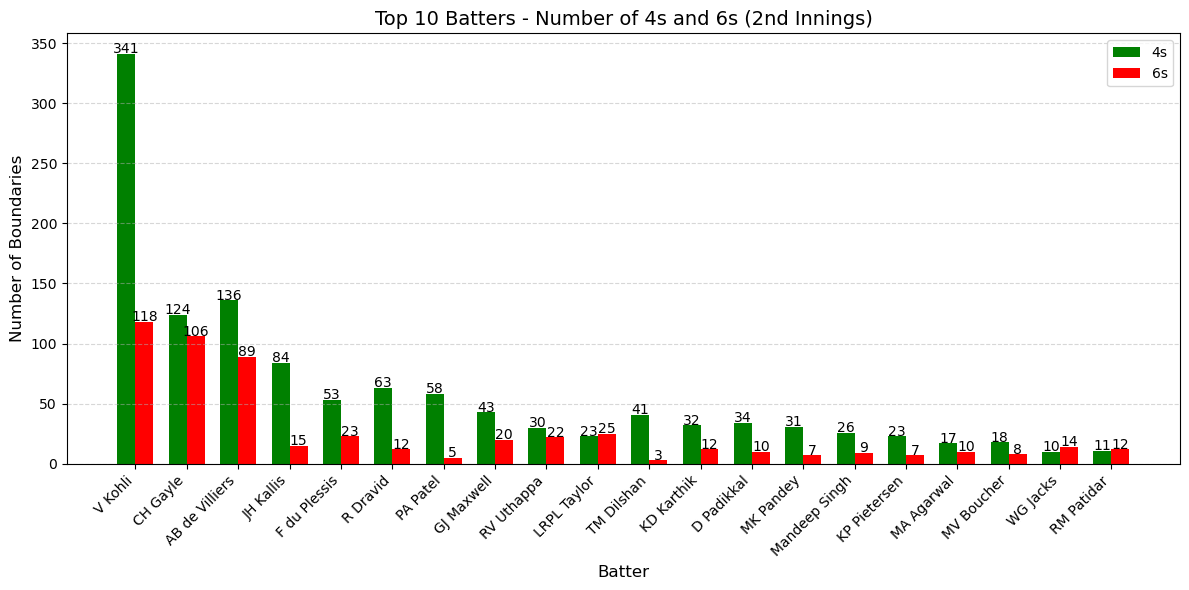

In [178]:
# Merge both
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Sort by total boundaries (optional)
boundaries['total'] = boundaries['4s'] + boundaries['6s']
boundaries = boundaries.sort_values(by='total', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(boundaries))

plt.bar(x, boundaries['4s'], width=bar_width, label='4s', color='green')
plt.bar([i + bar_width for i in x], boundaries['6s'], width=bar_width, label='6s', color='red')

# X-axis labels
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Number of Boundaries", fontsize=12)
plt.title("Top 10 Batters - Number of 4s and 6s (2nd Innings)", fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], boundaries['batter'], rotation=45, ha='right')

# Add value annotations
for i in x:
    plt.text(i, boundaries['4s'].iloc[i] + 0.5, str(boundaries['4s'].iloc[i]), ha='center')
    plt.text(i + bar_width, boundaries['6s'].iloc[i] + 0.5, str(boundaries['6s'].iloc[i]), ha='center')

plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

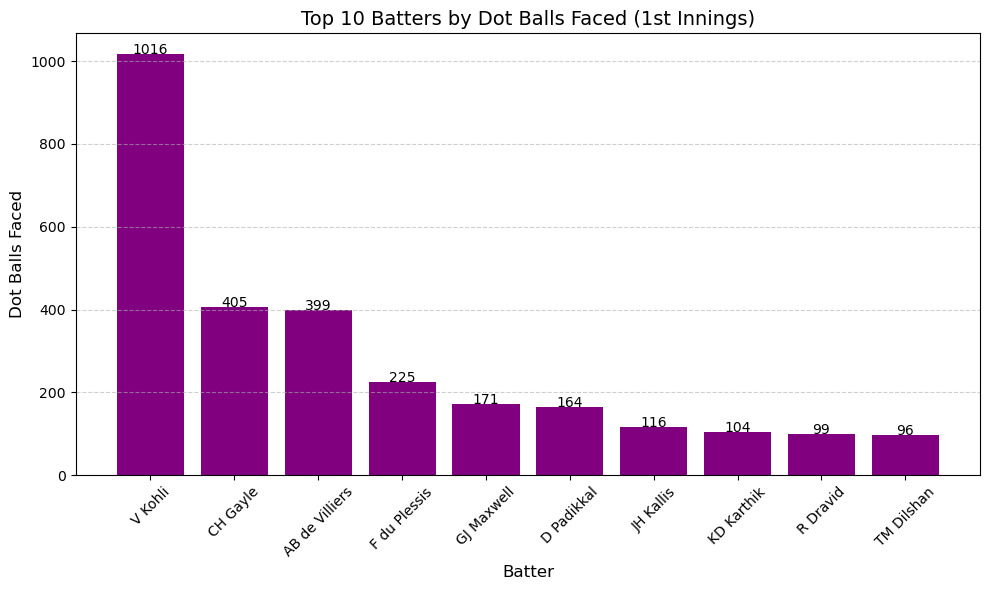

In [181]:
# Step 1: Filter dot balls (total_runs == 0)
dot_balls = df_1st_inn[df_1st_inn['total_runs'] == 0]

# Step 2: Count dot balls per batter
dots_per_batter = dot_balls.groupby('batter').size().reset_index(name='dot_balls')

# Step 3: Sort and take top 10 (optional)
dots_top = dots_per_batter.sort_values(by='dot_balls', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(dots_top['batter'], dots_top['dot_balls'], color='purple')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customizing the plot
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Dot Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Dot Balls Faced (1st Innings)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

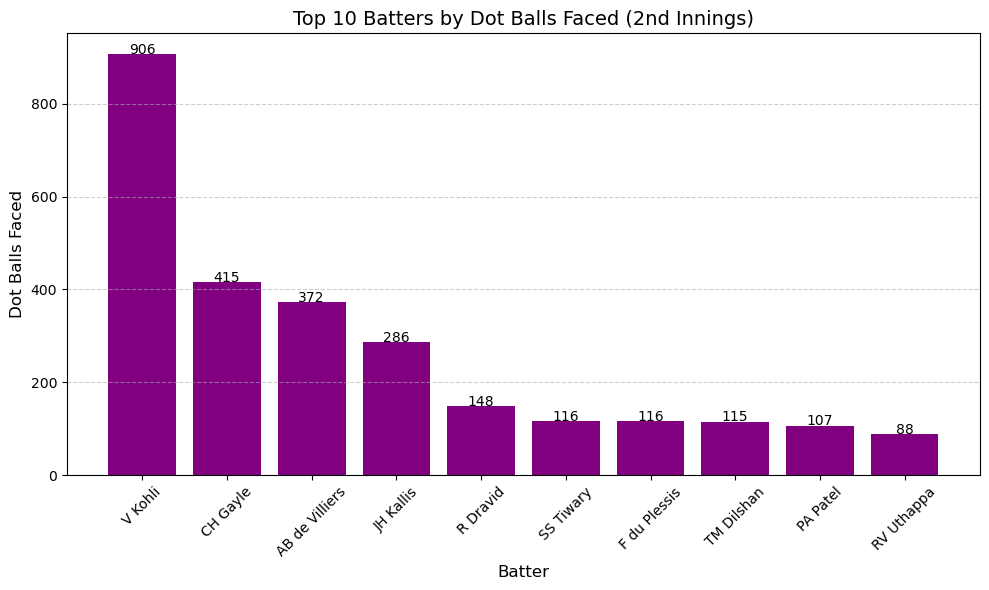

In [183]:
# Step 1: Filter dot balls (total_runs == 0)
dot_balls = df_2nd_inn[df_2nd_inn['total_runs'] == 0]

# Step 2: Count dot balls per batter
dots_per_batter = dot_balls.groupby('batter').size().reset_index(name='dot_balls')

# Step 3: Sort and take top 10 (optional)
dots_top = dots_per_batter.sort_values(by='dot_balls', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(dots_top['batter'], dots_top['dot_balls'], color='purple')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customizing the plot
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Dot Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Dot Balls Faced (2nd Innings)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

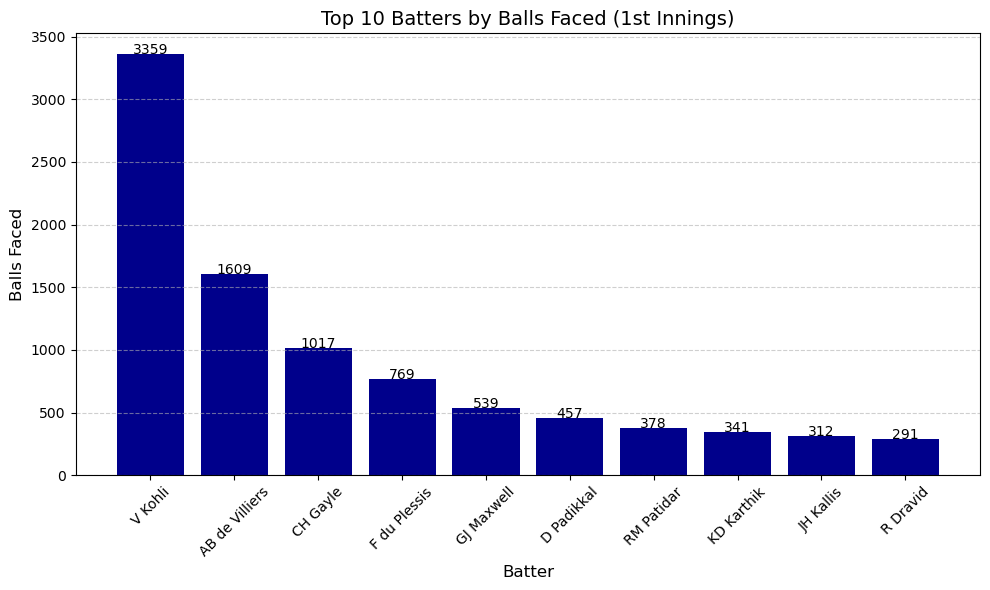

In [184]:
# Step 1: Count number of balls faced per batter
balls_faced = df_1st_inn.groupby('batter').size().reset_index(name='balls_faced')

# Step 2: Sort and select top 10 (optional)
balls_top = balls_faced.sort_values(by='balls_faced', ascending=False).head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(balls_top['batter'], balls_top['balls_faced'], color='darkblue')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customize chart
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Balls Faced (1st Innings)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

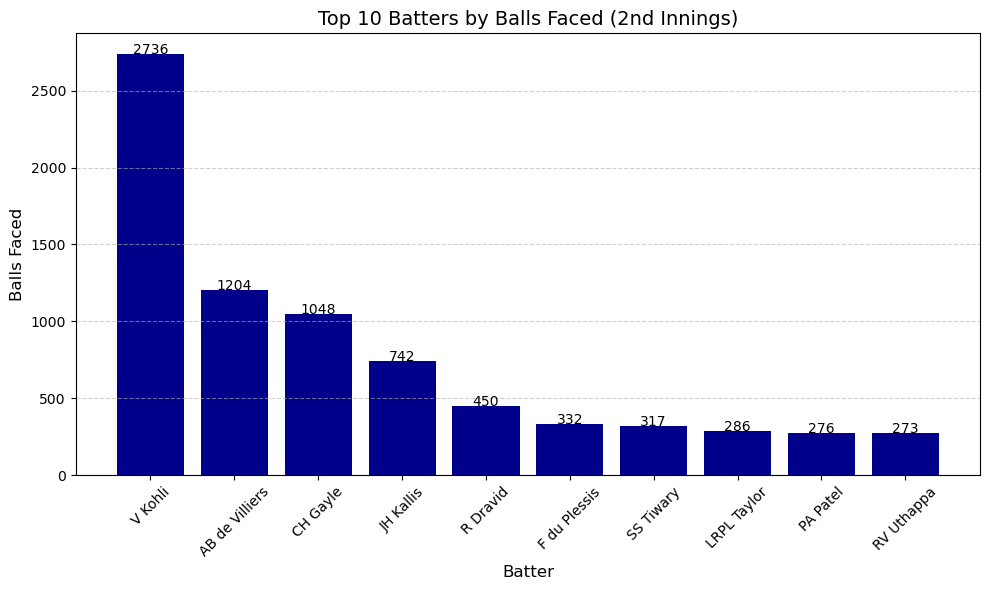

In [185]:
# Step 1: Count number of balls faced per batter
balls_faced = df_2nd_inn.groupby('batter').size().reset_index(name='balls_faced')

# Step 2: Sort and select top 10 (optional)
balls_top = balls_faced.sort_values(by='balls_faced', ascending=False).head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(balls_top['batter'], balls_top['balls_faced'], color='darkblue')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customize chart
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Balls Faced (2nd Innings)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [217]:
# Count total balls faced by each batter
balls_faced = df_1st_inn.groupby('batter').size().rename('balls_faced')

# Count dot balls
dots = df_1st_inn[df_1st_inn['total_runs'] == 0].groupby('batter').size().rename('dots')

# Count 4s
fours = df_1st_inn[df_1st_inn['total_runs'] == 4].groupby('batter').size().rename('fours')

# Count 6s
sixes = df_1st_inn[df_1st_inn['total_runs'] == 6].groupby('batter').size().rename('sixes')

# Combine all
batter_stats = pd.concat([balls_faced, dots, fours, sixes], axis=1).fillna(0)
batter_stats = batter_stats.astype(int)

# Calculated metrics
batter_stats['dot_percent'] = (batter_stats['dots'] / batter_stats['balls_faced']) * 100
batter_stats['balls_per_4'] = batter_stats['balls_faced'] / batter_stats['fours'].replace(0, pd.NA)
batter_stats['balls_per_6'] = batter_stats['balls_faced'] / batter_stats['sixes'].replace(0, pd.NA)

# Ensure all are numeric
for col in ['dot_percent', 'balls_per_4', 'balls_per_6']:
    batter_stats[col] = pd.to_numeric(batter_stats[col], errors='coerce')

# Replace inf and drop NaNs
batter_stats.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
batter_stats.dropna(subset=['balls_per_4', 'balls_per_6'], inplace=True)

# Round safely
batter_stats['dot_percent'] = batter_stats['dot_percent'].round(2)
batter_stats['balls_per_4'] = batter_stats['balls_per_4'].round(2)
batter_stats['balls_per_6'] = batter_stats['balls_per_6'].round(2)

# View top batters
batter_stats.sort_values('balls_faced', ascending=False).head(20)

balls_faced  dots  fours  sixes  dot_percent  balls_per_4  \
batter                                                                      
V Kohli                3359  1016    352    140        30.25         9.54   
AB de Villiers         1609   399    213    132        24.80         7.55   
CH Gayle               1017   405    118    111        39.82         8.62   
F du Plessis            769   225     98     43        29.26         7.85   
GJ Maxwell              539   171     70     49        31.73         7.70   
D Padikkal              457   164     60     12        35.89         7.62   
RM Patidar              378    95     43     41        25.13         8.79   
KD Karthik              341   104     43     34        30.50         7.93   
JH Kallis               312   116     43      6        37.18         7.26   
R Dravid                291    99     34      5        34.02         8.56   
TM Dilshan              269    96     31      5        35.69         8.68   
Mandeep Singh           261    94     30     12        36.02         8.70   
PA Patel                256    89     38     10        34.77         6.74   
MA Agarwal              207    83     25     12        40.10         8.28   
KL Rahul                184    56     27     12        30.43         6.81   
AJ Finch                172    67     21      5        38.95         8.19   
MK Lomror               171    41     19     11        23.98         9.00   
C Green                 164    41     21      9        25.00         7.81   
SS Tiwary               163    55     14      6        33.74        11.64   
Yuvraj Singh            155    53     15     18        34.19        10.33   

                balls_per_6  
batter                       
V Kohli               23.99  
AB de Villiers        12.19  
CH Gayle               9.16  
F du Plessis          17.88  
GJ Maxwell            11.00  
D Padikkal            38.08  
RM Patidar             9.22  
KD Karthik            10.03  
JH Kallis             52.00  
R Dravid              58.20  
TM Dilshan            53.80  
Mandeep Singh         21.75  
PA Patel              25.60  
MA Agarwal            17.25  
KL Rahul              15.33  
AJ Finch              34.40  
MK Lomror             15.55  
C Green               18.22  
SS Tiwary             27.17  
Yuvraj Singh           8.61

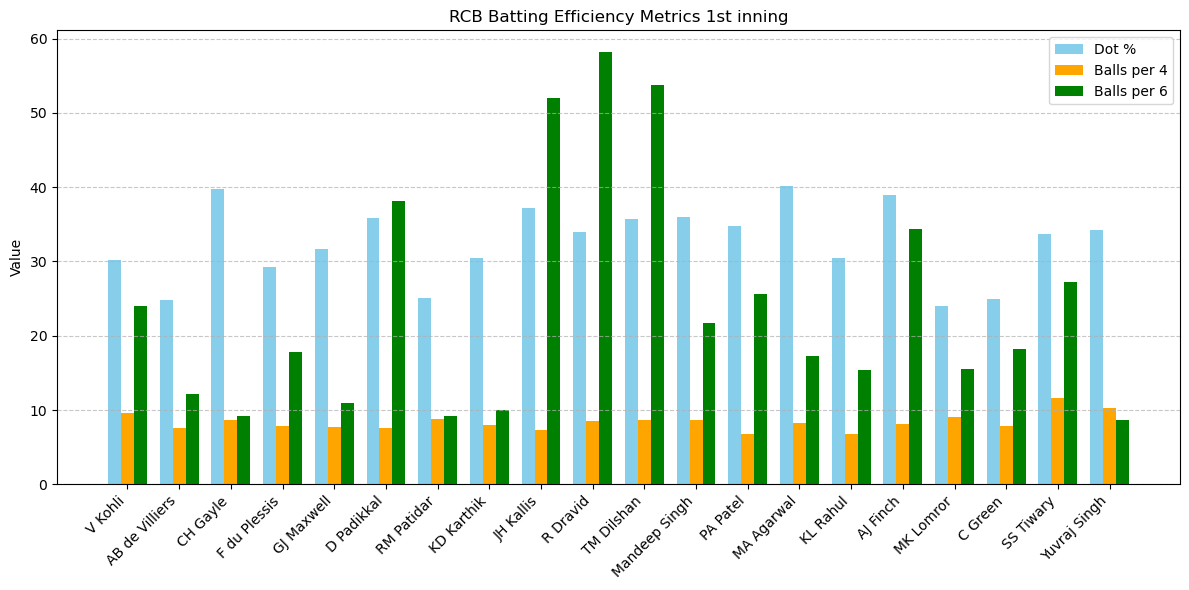

In [218]:
# Select top 10 batters by balls faced
top_batters = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(top_batters))
width = 0.25

# Bars
ax.bar([i - width for i in x], top_batters['dot_percent'], width=width, label='Dot %', color='skyblue')
ax.bar(x, top_batters['balls_per_4'], width=width, label='Balls per 4', color='orange')
ax.bar([i + width for i in x], top_batters['balls_per_6'], width=width, label='Balls per 6', color='green')

# Labels & Ticks
ax.set_xticks(x)
ax.set_xticklabels(top_batters.index, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('RCB Batting Efficiency Metrics 1st inning')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

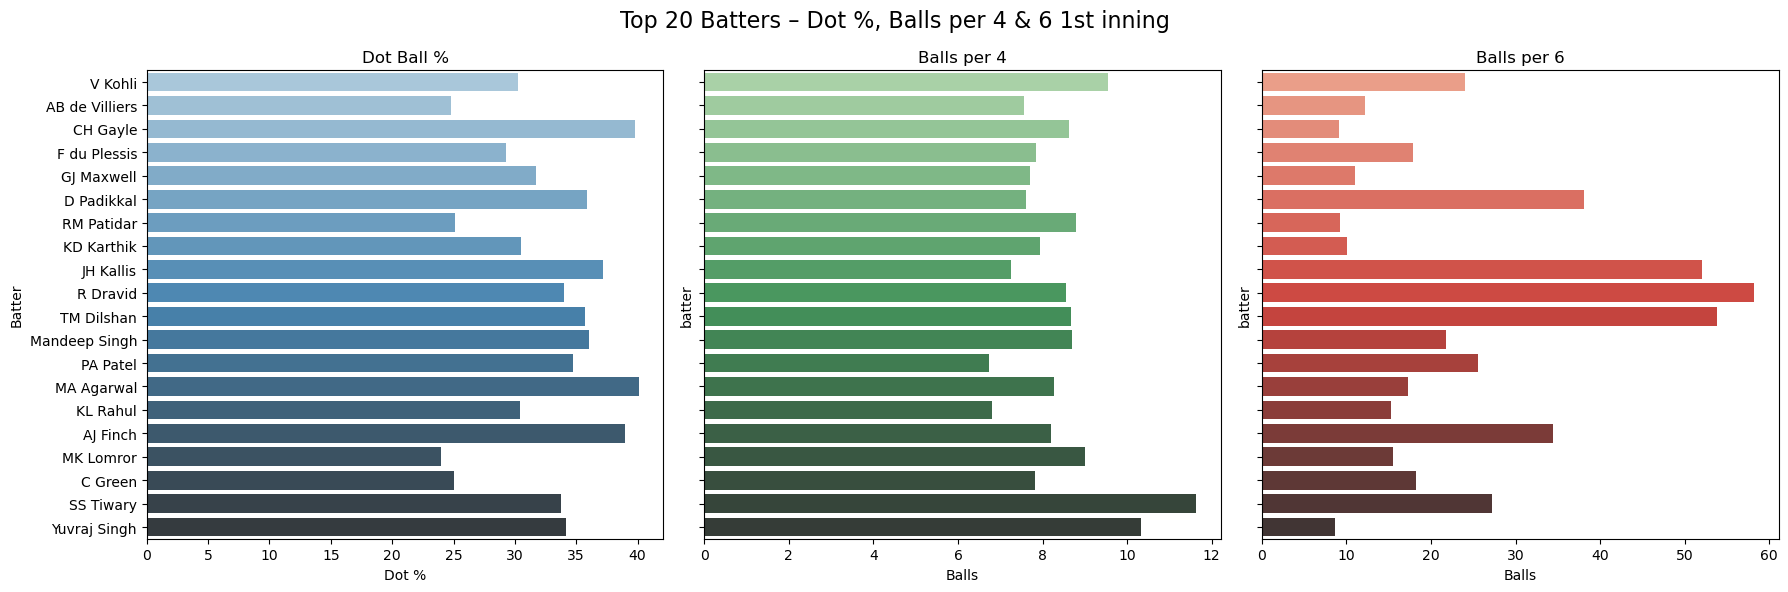

In [219]:
batter_statss = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Dot Percentage
sns.barplot(x = batter_statss['dot_percent'], y = batter_statss.index, ax=axs[0], palette="Blues_d")
axs[0].set_title("Dot Ball %")
axs[0].set_xlabel("Dot %")
axs[0].set_ylabel("Batter")

# Balls per 4
sns.barplot(x=batter_statss['balls_per_4'].head(20), y=batter_statss.index, ax=axs[1], palette="Greens_d")
axs[1].set_title("Balls per 4")
axs[1].set_xlabel("Balls")

# Balls per 6
sns.barplot(x=batter_statss['balls_per_6'], y=batter_statss.index, ax=axs[2], palette="Reds_d")
axs[2].set_title("Balls per 6")
axs[2].set_xlabel("Balls")

plt.suptitle("Top 20 Batters – Dot %, Balls per 4 & 6 1st inning", fontsize=16)
plt.tight_layout()
plt.show()

In [220]:
# Count total balls faced by each batter
balls_faced = df_2nd_inn.groupby('batter').size().rename('balls_faced')

# Count dot balls
dots = df_2nd_inn[df_2nd_inn['total_runs'] == 0].groupby('batter').size().rename('dots')

# Count 4s
fours = df_2nd_inn[df_2nd_inn['total_runs'] == 4].groupby('batter').size().rename('fours')

# Count 6s
sixes = df_2nd_inn[df_2nd_inn['total_runs'] == 6].groupby('batter').size().rename('sixes')

# Combine all
batter_stats = pd.concat([balls_faced, dots, fours, sixes], axis=1).fillna(0)
batter_stats = batter_stats.astype(int)

# Calculated metrics
batter_stats['dot_percent'] = (batter_stats['dots'] / batter_stats['balls_faced']) * 100
batter_stats['balls_per_4'] = batter_stats['balls_faced'] / batter_stats['fours'].replace(0, pd.NA)
batter_stats['balls_per_6'] = batter_stats['balls_faced'] / batter_stats['sixes'].replace(0, pd.NA)

# Ensure all are numeric
for col in ['dot_percent', 'balls_per_4', 'balls_per_6']:
    batter_stats[col] = pd.to_numeric(batter_stats[col], errors='coerce')

# Replace inf and drop NaNs
batter_stats.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
batter_stats.dropna(subset=['balls_per_4', 'balls_per_6'], inplace=True)

# Round safely
batter_stats['dot_percent'] = batter_stats['dot_percent'].round(2)
batter_stats['balls_per_4'] = batter_stats['balls_per_4'].round(2)
batter_stats['balls_per_6'] = batter_stats['balls_per_6'].round(2)

# View top batters
batter_stats.sort_values('balls_faced', ascending=False).head(20)

balls_faced  dots  fours  sixes  dot_percent  balls_per_4  \
batter                                                                      
V Kohli                2736   906    341    118        33.11         8.02   
AB de Villiers         1204   372    136     89        30.90         8.85   
CH Gayle               1048   415    124    106        39.60         8.45   
JH Kallis               742   286     84     15        38.54         8.83   
R Dravid                450   148     63     12        32.89         7.14   
F du Plessis            332   116     53     23        34.94         6.26   
SS Tiwary               317   116     12     11        36.59        26.42   
LRPL Taylor             286    84     23     25        29.37        12.43   
PA Patel                276   107     58      5        38.77         4.76   
RV Uthappa              273    88     30     22        32.23         9.10   
D Padikkal              263    85     34     10        32.32         7.74   
GJ Maxwell              259    71     43     20        27.41         6.02   
TM Dilshan              249   115     41      3        46.18         6.07   
MK Pandey               226    88     31      7        38.94         7.29   
KD Karthik              222    64     32     12        28.83         6.94   
Mandeep Singh           209    64     26      9        30.62         8.04   
MV Boucher              177    46     18      8        25.99         9.83   
KP Pietersen            176    49     23      7        27.84         7.65   
Shahbaz Ahmed           163    61     12      8        37.42        13.58   
RM Patidar              150    50     11     12        33.33        13.64   

                balls_per_6  
batter                       
V Kohli               23.19  
AB de Villiers        13.53  
CH Gayle               9.89  
JH Kallis             49.47  
R Dravid              37.50  
F du Plessis          14.43  
SS Tiwary             28.82  
LRPL Taylor           11.44  
PA Patel              55.20  
RV Uthappa            12.41  
D Padikkal            26.30  
GJ Maxwell            12.95  
TM Dilshan            83.00  
MK Pandey             32.29  
KD Karthik            18.50  
Mandeep Singh         23.22  
MV Boucher            22.12  
KP Pietersen          25.14  
Shahbaz Ahmed         20.38  
RM Patidar            12.50

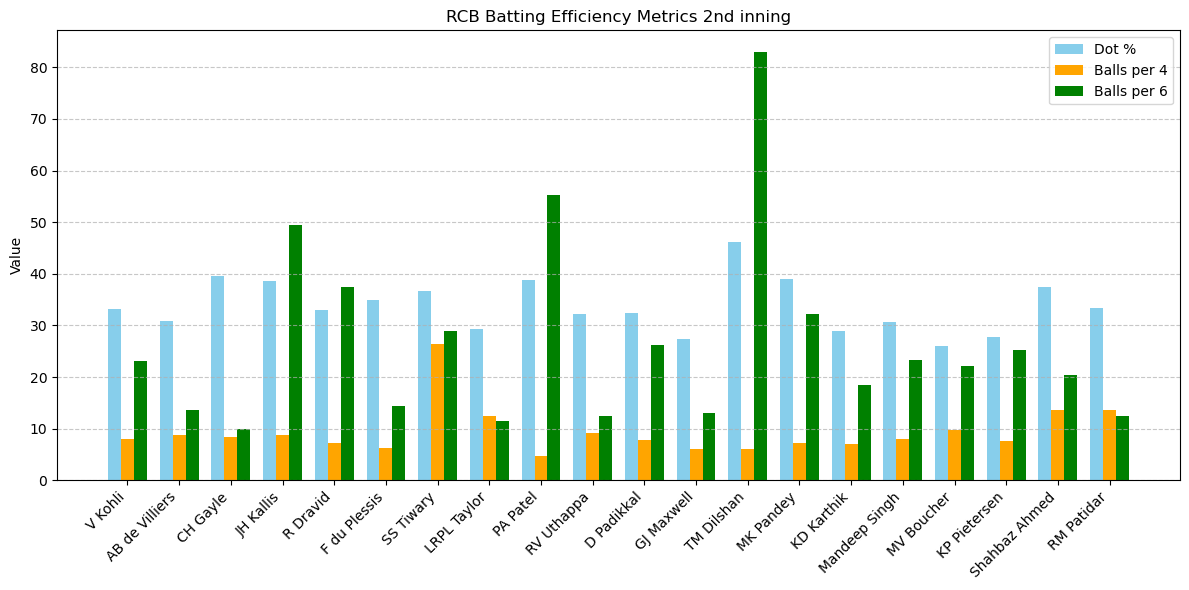

In [221]:
# Select top 20 batters by balls faced
top_batters = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(top_batters))
width = 0.25

# Bars
ax.bar([i - width for i in x], top_batters['dot_percent'], width=width, label='Dot %', color='skyblue')
ax.bar(x, top_batters['balls_per_4'], width=width, label='Balls per 4', color='orange')
ax.bar([i + width for i in x], top_batters['balls_per_6'], width=width, label='Balls per 6', color='green')

# Labels & Ticks
ax.set_xticks(x)
ax.set_xticklabels(top_batters.index, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('RCB Batting Efficiency Metrics 2nd inning')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

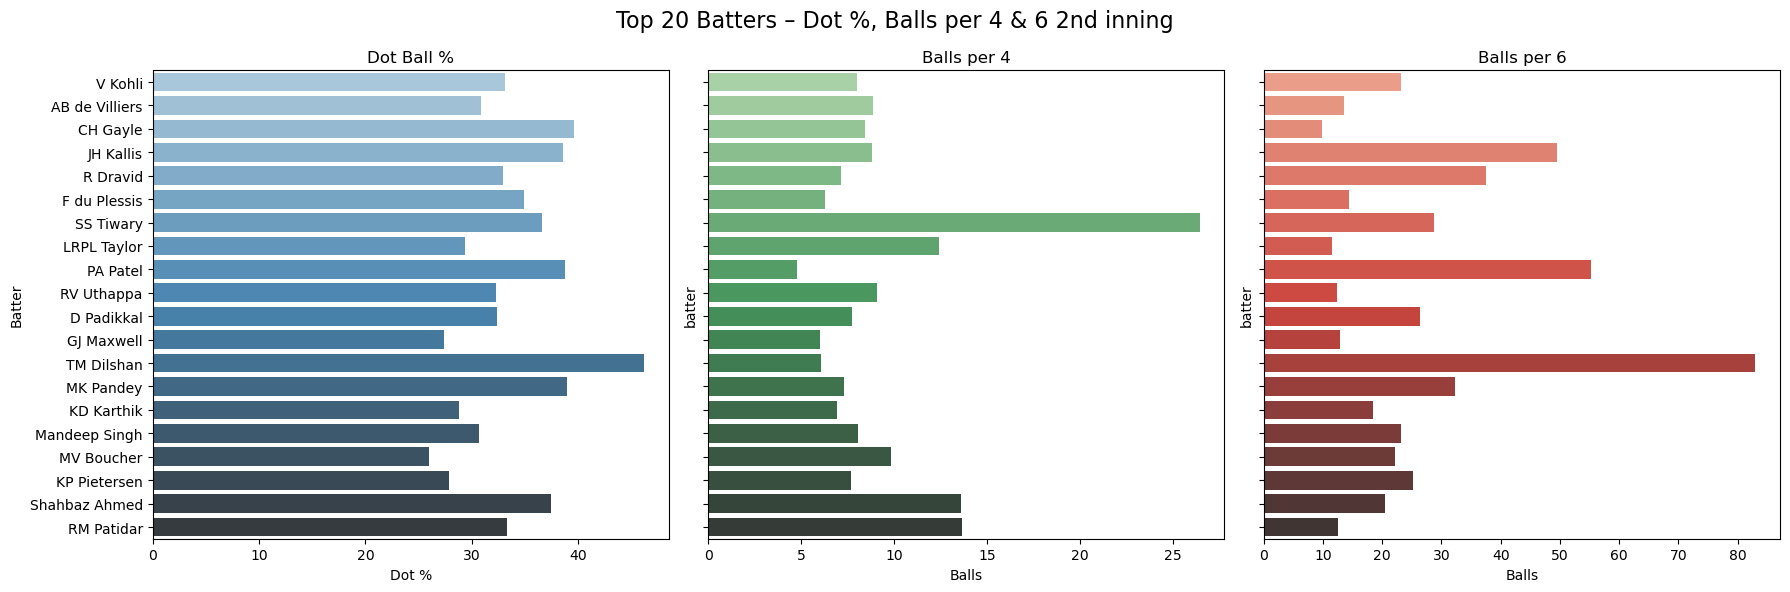

In [222]:
batter_statss = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Dot Percentage
sns.barplot(x = batter_statss['dot_percent'], y = batter_statss.index, ax=axs[0], palette="Blues_d")
axs[0].set_title("Dot Ball %")
axs[0].set_xlabel("Dot %")
axs[0].set_ylabel("Batter")

# Balls per 4
sns.barplot(x=batter_statss['balls_per_4'].head(20), y=batter_statss.index, ax=axs[1], palette="Greens_d")
axs[1].set_title("Balls per 4")
axs[1].set_xlabel("Balls")

# Balls per 6
sns.barplot(x=batter_statss['balls_per_6'], y=batter_statss.index, ax=axs[2], palette="Reds_d")
axs[2].set_title("Balls per 6")
axs[2].set_xlabel("Balls")

plt.suptitle("Top 20 Batters – Dot %, Balls per 4 & 6 2nd inning", fontsize=16)
plt.tight_layout()
plt.show()

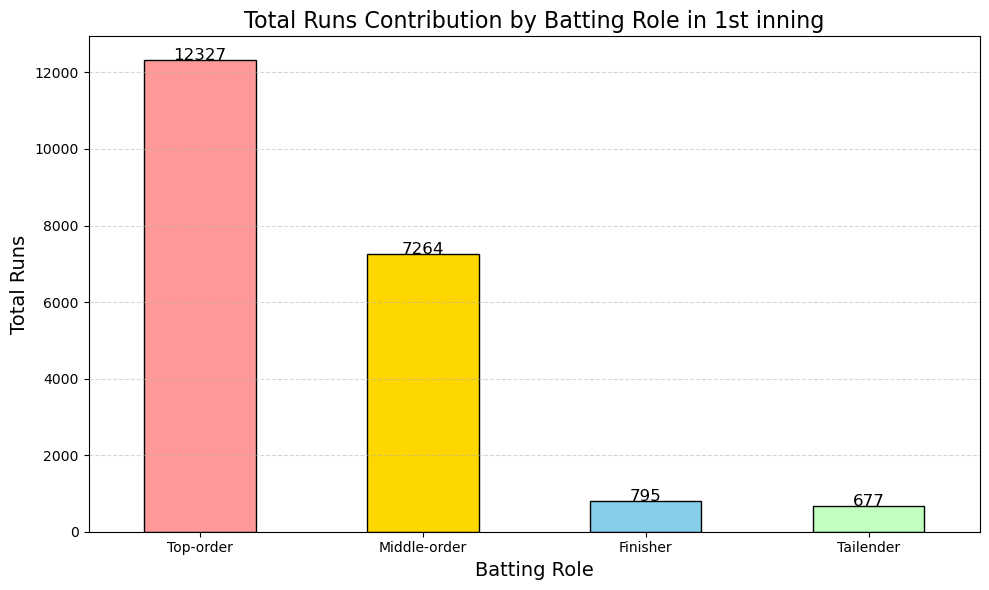

In [249]:
# Step 1: Ensure the 'batting_role' column exists using the function
df_with_roles = label_batting_role(df_1st_inn)

# Step 2: Group by batting role and sum the total runs
role_contribution = (
    df_with_roles.groupby('batting_role')['total_runs']
    .sum()
    .sort_values(ascending=False)
)

# Step 3: Plotting
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#FFD700', '#87CEEB', '#C1FFC1']  # Custom colors

ax = role_contribution.plot(kind='bar', color=colors, edgecolor='black')

# Annotations
for i, val in enumerate(role_contribution):
    plt.text(i, val + 5, f"{val}", ha='center', fontsize=12)

plt.title('Total Runs Contribution by Batting Role in 1st inning', fontsize=16)
plt.ylabel('Total Runs', fontsize=14)
plt.xlabel('Batting Role', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

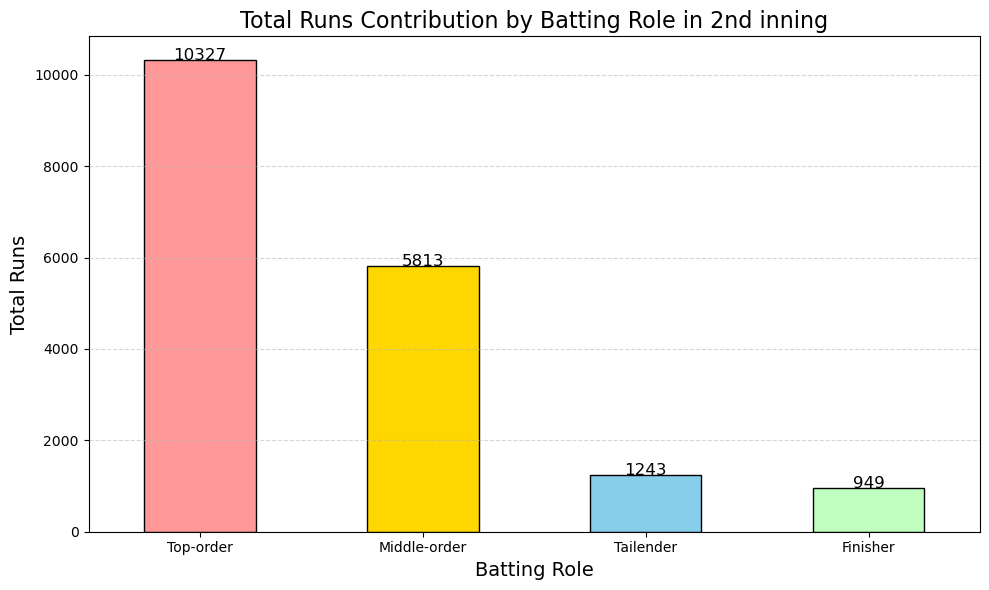

In [248]:
# Step 1: Ensure the 'batting_role' column exists using the function
df_with_roles2 = label_batting_role(df_2nd_inn)

# Step 2: Group by batting role and sum the total runs
role_contribution = (
    df_with_roles2.groupby('batting_role')['total_runs']
    .sum()
    .sort_values(ascending=False)
)

# Step 3: Plotting
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#FFD700', '#87CEEB', '#C1FFC1']  # Custom colors

ax = role_contribution.plot(kind='bar', color=colors, edgecolor='black')

# Annotations
for i, val in enumerate(role_contribution):
    plt.text(i, val + 5, f"{val}", ha='center', fontsize=12)

plt.title('Total Runs Contribution by Batting Role in 2nd inning', fontsize=16)
plt.ylabel('Total Runs', fontsize=14)
plt.xlabel('Batting Role', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Bolwler's Analysis

In [274]:
bowlers = rcb_team_2024[rcb_team_2024['bowling_team'] == 'Royal Challengers Bengaluru']
bowlers.head(5)

match_id  inning       date           batting_team  \
0    335982       1 2008-04-18  Kolkata Knight Riders   
1    335982       1 2008-04-18  Kolkata Knight Riders   
2    335982       1 2008-04-18  Kolkata Knight Riders   
3    335982       1 2008-04-18  Kolkata Knight Riders   
4    335982       1 2008-04-18  Kolkata Knight Riders   

                  bowling_team  over  ball_faced  ball       batter   bowler  \
0  Royal Challengers Bengaluru     0           1     1   SC Ganguly  P Kumar   
1  Royal Challengers Bengaluru     0           1     2  BB McCullum  P Kumar   
2  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
3  Royal Challengers Bengaluru     0           1     3  BB McCullum  P Kumar   
4  Royal Challengers Bengaluru     0           1     4  BB McCullum  P Kumar   

   non_striker  batsman_runs  extra_runs  total_runs extra_type  is_wicket  \
0  BB McCullum             0           1           1    legbyes          0   
1   SC Ganguly             0           0           0        NaN          0   
2   SC Ganguly             0           1           1      wides          0   
3   SC Ganguly             0           0           0        NaN          0   
4   SC Ganguly             0           0           0        NaN          0   

  player_dismissed dismissal_kind fielder  season  
0              NaN            NaN     NaN    2008  
1              NaN            NaN     NaN    2008  
2              NaN            NaN     NaN    2008  
3              NaN            NaN     NaN    2008  
4              NaN            NaN     NaN    2008

In [275]:
bowlers.groupby('bowler')['ball'].sum()

bowler
A Choudhary           382
A Kumble             3422
A Mithun             1086
A Zampa               234
AA Kazi                45
                     ... 
Washington Sundar    2014
YS Chahal            8700
Yash Dayal           1116
Yuvraj Singh          496
Z Khan               3629
Name: ball, Length: 113, dtype: int64

In [282]:
# Filter RCB bowlers
df_bowl = rcb_team_2024[rcb_team_2024['bowling_team'] == 'Royal Challengers Bengaluru']

# Total balls bowled
balls_bowled = df_bowl.groupby('bowler').size().rename("balls_bowled")

In [283]:
# Total runs conceded
runs_conceded = df_bowl.groupby('bowler')['total_runs'].sum().rename("runs_conceded")

In [284]:
# Wickets taken
wickets = df_bowl[df_bowl['is_wicket'] == 1].groupby('bowler').size().rename("wickets")

In [285]:
# Dot balls
dot_balls = df_bowl[df_bowl['total_runs'] == 0].groupby('bowler').size().rename("dot_balls")

In [286]:
# Fours & Sixes conceded
fours_conceded = df_bowl[df_bowl['total_runs'] == 4].groupby('bowler').size().rename("fours_conceded")
sixes_conceded = df_bowl[df_bowl['total_runs'] == 6].groupby('bowler').size().rename("sixes_conceded")

In [287]:
# Combine all metrics
bowler_stats = pd.concat(
    [balls_bowled, dot_balls, runs_conceded, wickets, fours_conceded, sixes_conceded], 
    axis=1
).fillna(0)

In [288]:
# Convert all to integers
bowler_stats = bowler_stats.astype(int)

# Metrics
bowler_stats['dot_percent'] = (bowler_stats['dot_balls'] / bowler_stats['balls_bowled']) * 100
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets'].replace(0, pd.NA)
bowler_stats['average'] = bowler_stats['runs_conceded'] / bowler_stats['wickets'].replace(0, pd.NA)

# Clean up invalid or infinite values
for col in ['strike_rate', 'average']:
    bowler_stats[col] = pd.to_numeric(bowler_stats[col], errors='coerce')
    bowler_stats[col].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Round metrics
bowler_stats['dot_percent'] = bowler_stats['dot_percent'].round(2)
bowler_stats['economy'] = bowler_stats['economy'].round(2)
bowler_stats['strike_rate'] = bowler_stats['strike_rate'].round(2)
bowler_stats['average'] = bowler_stats['average'].round(2)

# ✅ Filter bowlers with at least 10 overs (60 balls)
bowler_stats_filtered = bowler_stats[bowler_stats['balls_bowled'] >= 60]

In [289]:
# Sort by wickets for top performers
bowler_stats_sorted = bowler_stats_filtered.sort_values(by='wickets', ascending=False)

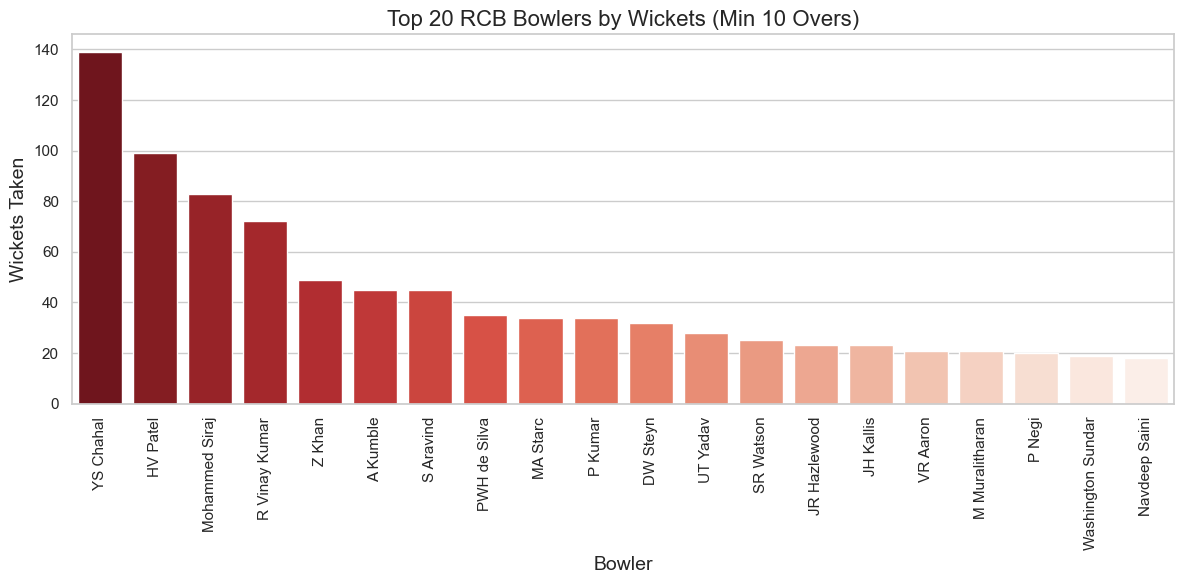

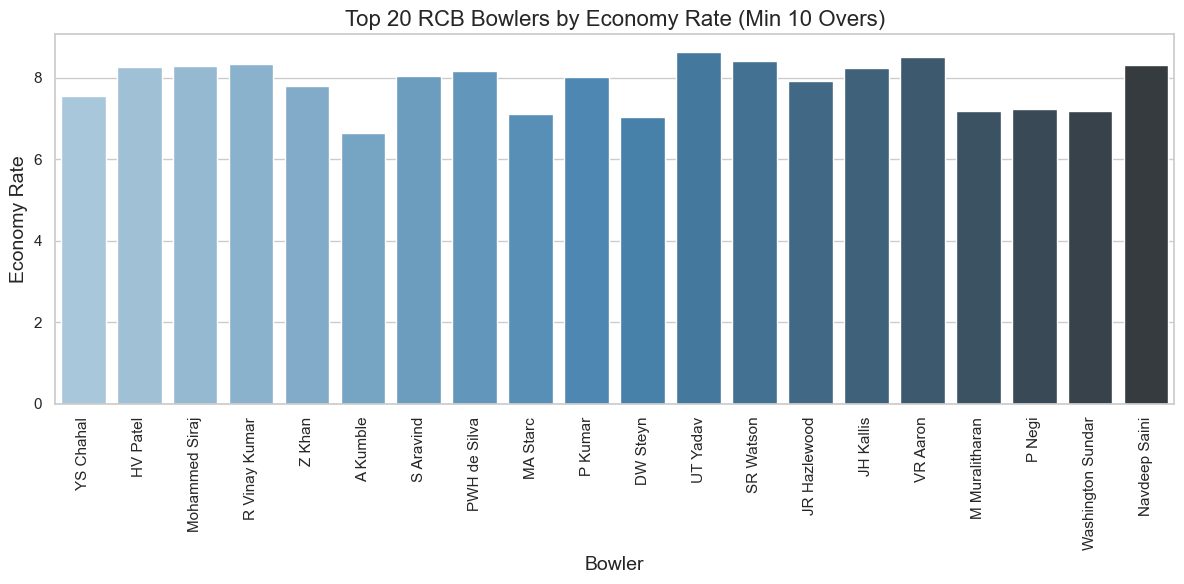

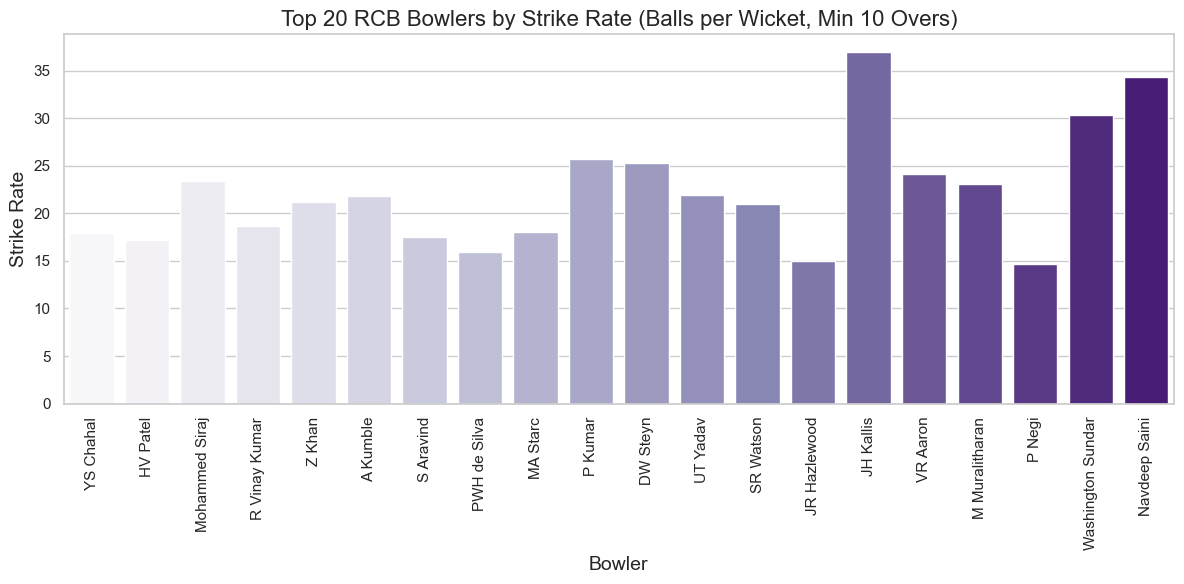

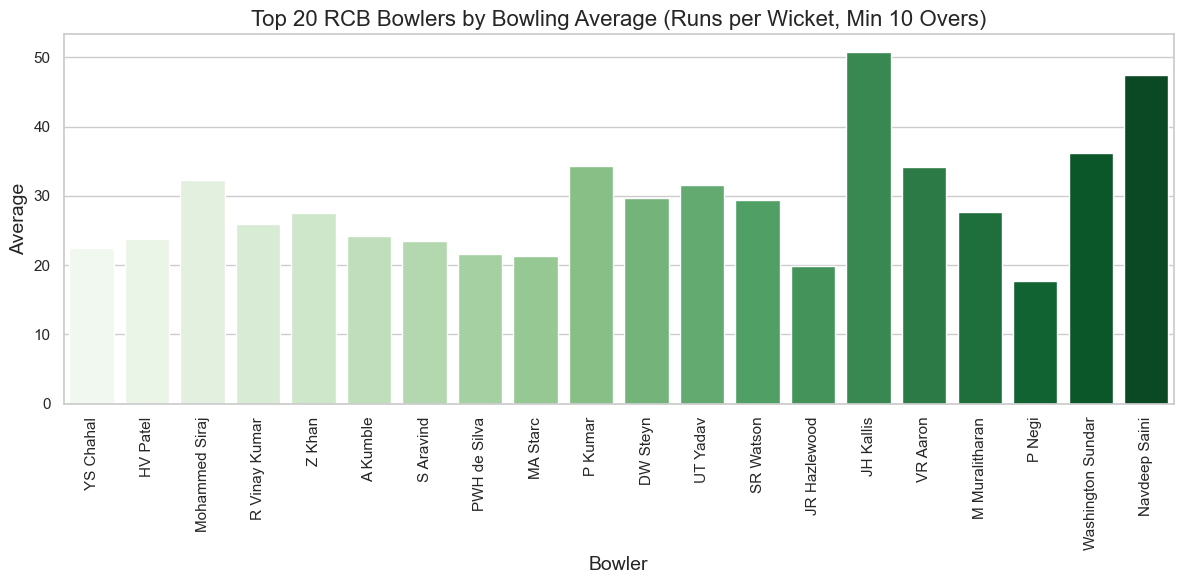

In [290]:
# Prepare for plotting
top_bowlers = bowler_stats_sorted.head(20).copy()
top_bowlers.reset_index(inplace=True)

# Plot Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# 🔹 Plot 1: Wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='Reds_r')
plt.title('Top 20 RCB Bowlers by Wickets (Min 10 Overs)')
plt.ylabel('Wickets Taken')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: Economy Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='Blues_d')
plt.title('Top 20 RCB Bowlers by Economy Rate (Min 10 Overs)')
plt.ylabel('Economy Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 3: Strike Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='strike_rate', data=top_bowlers, palette='Purples')
plt.title('Top 20 RCB Bowlers by Strike Rate (Balls per Wicket, Min 10 Overs)')
plt.ylabel('Strike Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 4: Bowling Average
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='average', data=top_bowlers, palette='Greens')
plt.title('Top 20 RCB Bowlers by Bowling Average (Runs per Wicket, Min 10 Overs)')
plt.ylabel('Average')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [298]:
# Function to classify over phase
def get_phase(over):
    try:
        over = str(over)
        if '.' not in over:
            over += '.0'
        over_split = over.split('.')
        over_float = int(over_split[0]) + int(over_split[1]) / 10
        if 0 <= over_float < 6:
            return 'Powerplay'
        elif 6 <= over_float < 16:
            return 'Middle Overs'
        elif 16 <= over_float <= 20:
            return 'Death Overs'
        else:
            return 'Other'
    except Exception:
        return 'Unknown'


# Add over phase column
df_bowl['phase'] = df_bowl['over'].astype(str).apply(get_phase)

# Group by bowler and phase
bowling_phase_stats = df_bowl.groupby(['bowler', 'phase']).agg(
    balls_bowled=('over', 'count'),
    dot_balls=('total_runs', lambda x: (x == 0).sum()),
    runs_conceded=('total_runs', 'sum'),
    wickets=('is_wicket', 'sum')
).reset_index()

# Calculate metrics
# Calculate metrics
bowling_phase_stats['dot_percent'] = (bowling_phase_stats['dot_balls'] / bowling_phase_stats['balls_bowled']) * 100
bowling_phase_stats['economy'] = (bowling_phase_stats['runs_conceded'] / bowling_phase_stats['balls_bowled']) * 6

# ✅ Add strike rate calculation BEFORE accessing it
bowling_phase_stats['strike_rate'] = bowling_phase_stats['balls_bowled'] / bowling_phase_stats['wickets'].replace(0, pd.NA)

# Clean strike rate
bowling_phase_stats['strike_rate'] = pd.to_numeric(bowling_phase_stats['strike_rate'], errors='coerce')
bowling_phase_stats['strike_rate'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows where strike_rate is NaN (optional)
bowling_phase_stats.dropna(subset=['strike_rate'], inplace=True)

# Round values
bowling_phase_stats['dot_percent'] = bowling_phase_stats['dot_percent'].round(2)
bowling_phase_stats['economy'] = bowling_phase_stats['economy'].round(2)
bowling_phase_stats['strike_rate'] = bowling_phase_stats['strike_rate'].round(2)

# Preview
bowling_phase_stats.head(20)

bowler         phase  balls_bowled  dot_balls  runs_conceded  \
0   A Choudhary   Death Overs            27          7             40   
1   A Choudhary  Middle Overs            44         17             58   
2   A Choudhary     Powerplay            37         18             46   
3      A Kumble   Death Overs           112         37            148   
4      A Kumble  Middle Overs           762        273            851   
5      A Kumble     Powerplay           109         64             90   
6      A Mithun   Death Overs            85         23            155   
7      A Mithun  Middle Overs           156         41            217   
8      A Mithun     Powerplay            71         26            105   
10      A Zampa  Middle Overs            61         20             65   
12    AA Noffke   Death Overs             6          2              7   
15     AB Dinda   Death Overs            56         12            114   
16     AB Dinda  Middle Overs            95         32            103   
17     AB Dinda     Powerplay            77         24            117   
18  AB McDonald   Death Overs             6          5              1   
19  AB McDonald  Middle Overs            55         13             64   
20  AB McDonald     Powerplay            12          4             15   
21     AF Milne   Death Overs            37         13             50   
22     AF Milne  Middle Overs            33          5             60   
24     AN Ahmed   Death Overs            60         13            123   

    wickets  dot_percent  economy  strike_rate  
0         1        25.93     8.89        27.00  
1         1        38.64     7.91        44.00  
2         3        48.65     7.46        12.33  
3        14        33.04     7.93         8.00  
4        28        35.83     6.70        27.21  
5         3        58.72     4.95        36.33  
6         4        27.06    10.94        21.25  
7         2        26.28     8.35        78.00  
8         1        36.62     8.87        71.00  
10        2        32.79     6.39        30.50  
12        1        33.33     7.00         6.00  
15        1        21.43    12.21        56.00  
16        1        33.68     6.51        95.00  
17        3        31.17     9.12        25.67  
18        1        83.33     1.00         6.00  
19        4        23.64     6.98        13.75  
20        1        33.33     7.50        12.00  
21        3        35.14     8.11        12.33  
22        1        15.15    10.91        33.00  
24        2        21.67    12.30        30.00

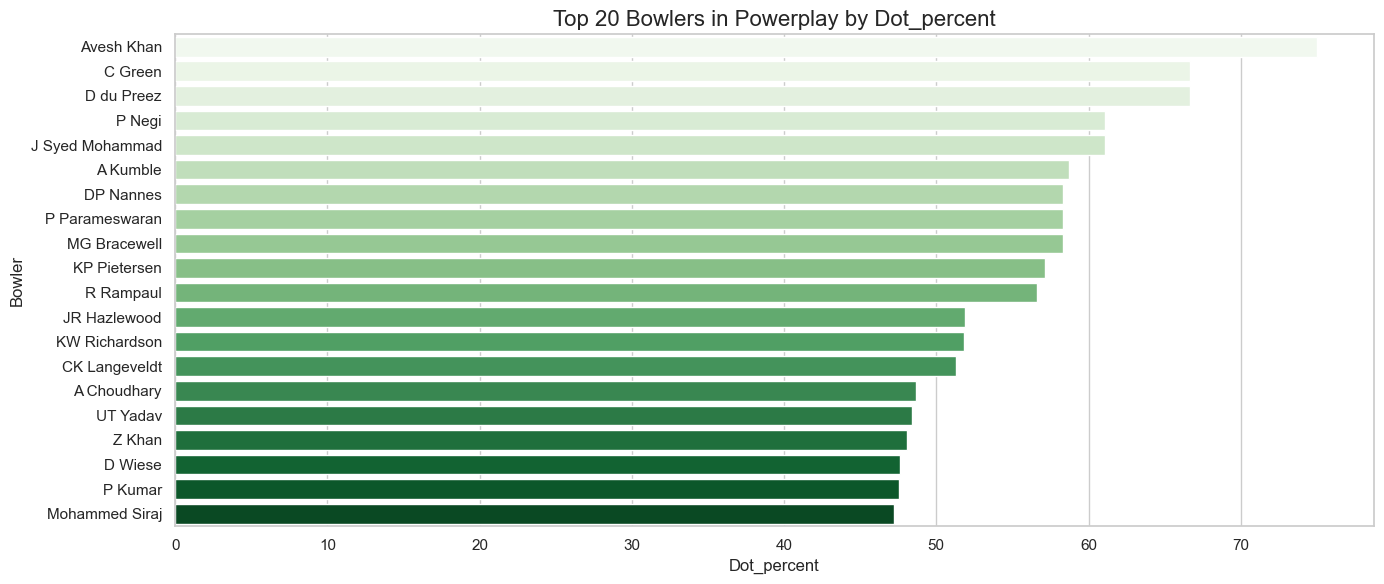

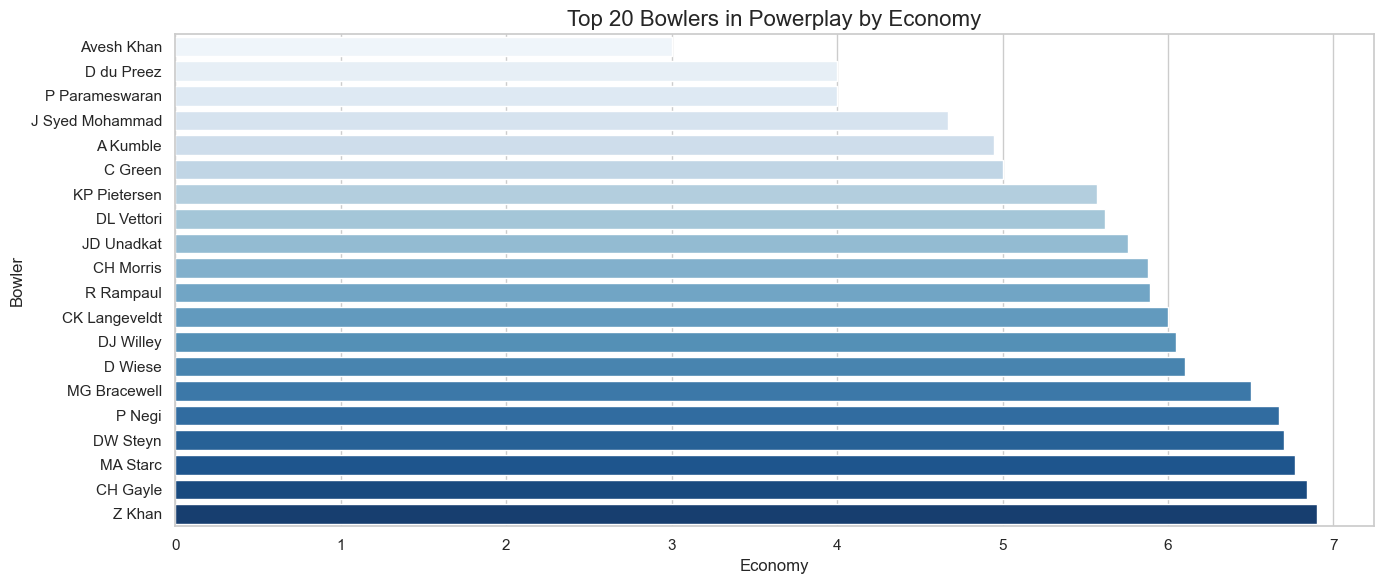

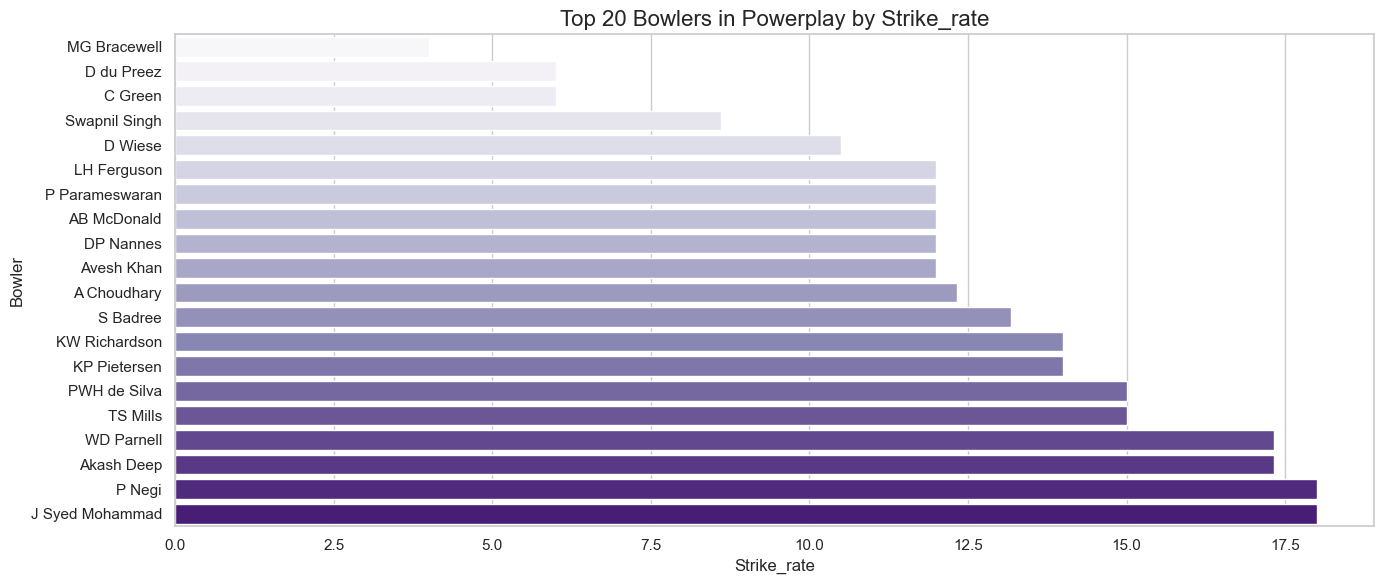

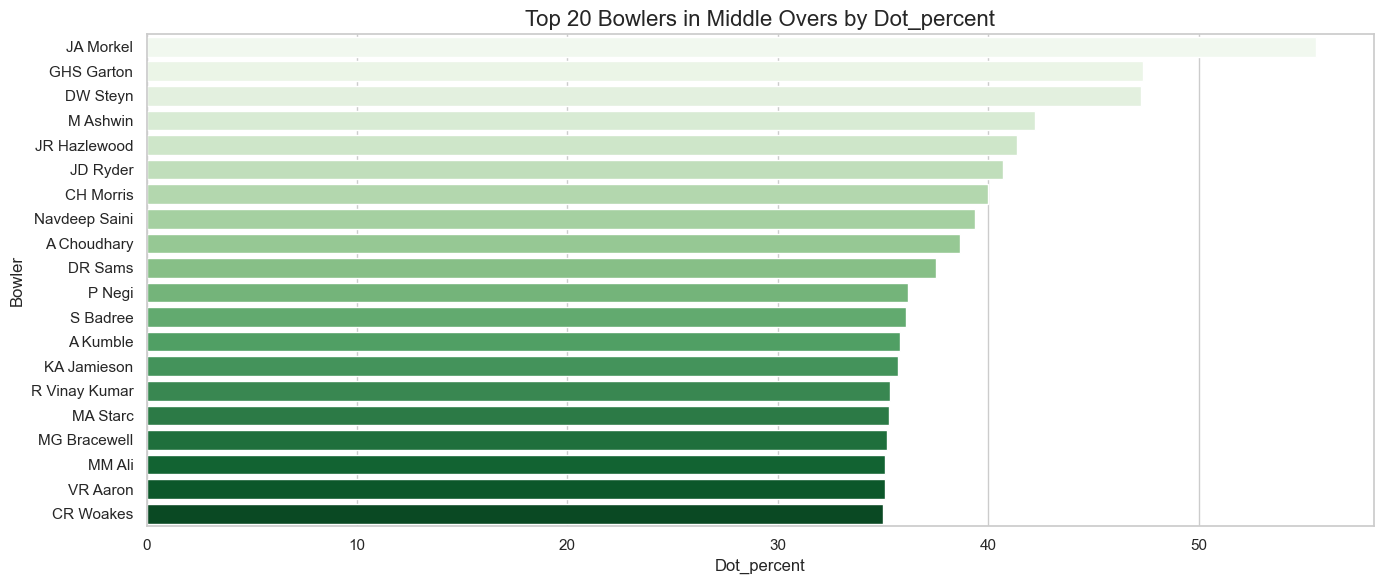

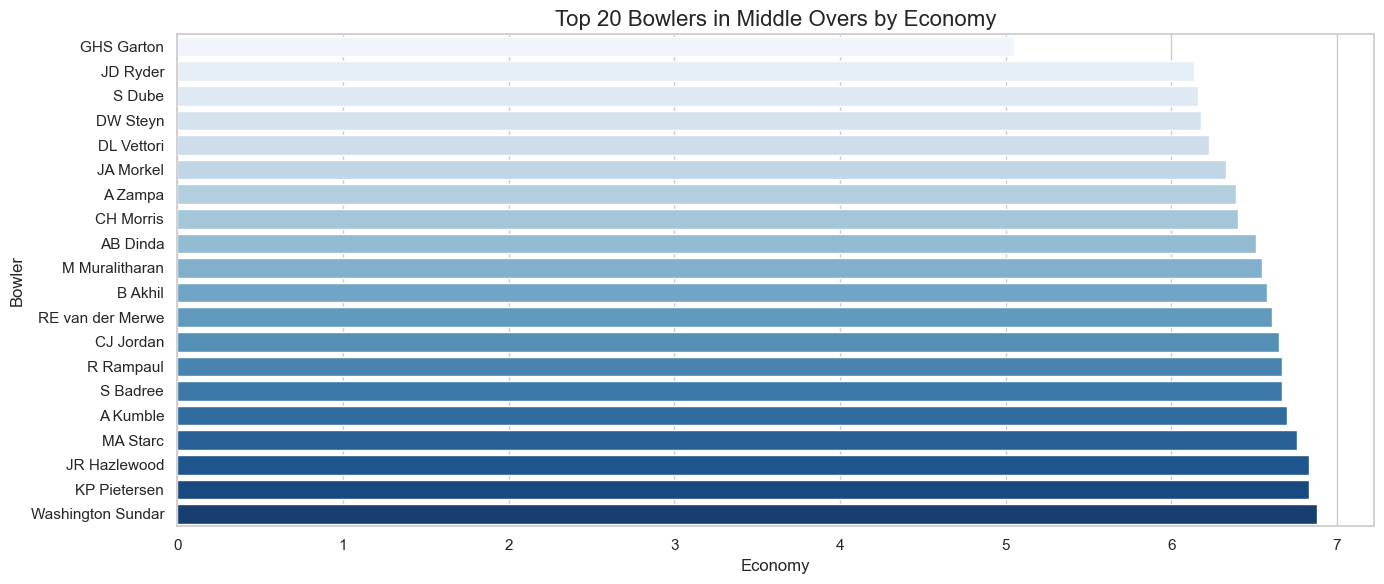

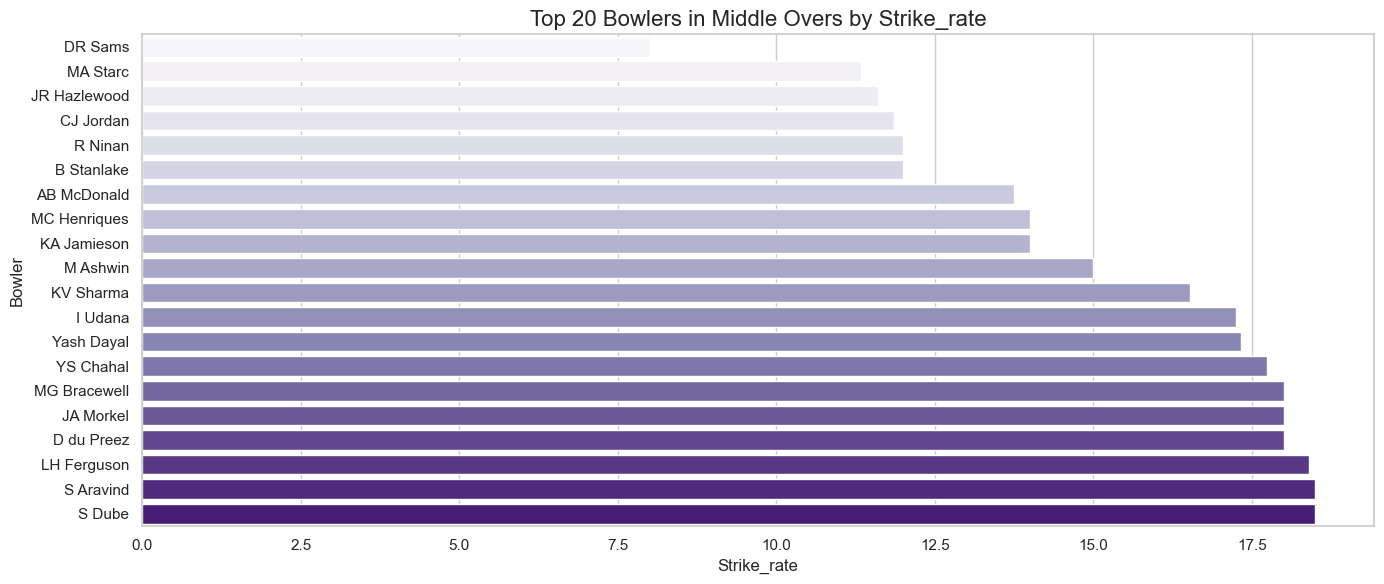

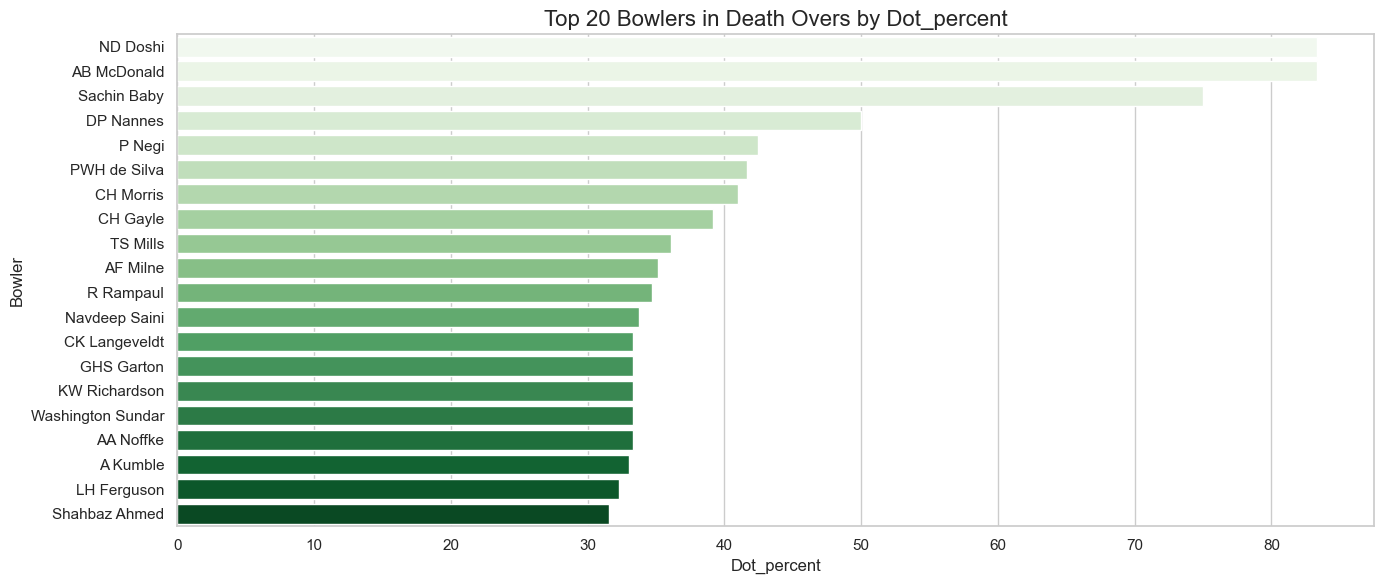

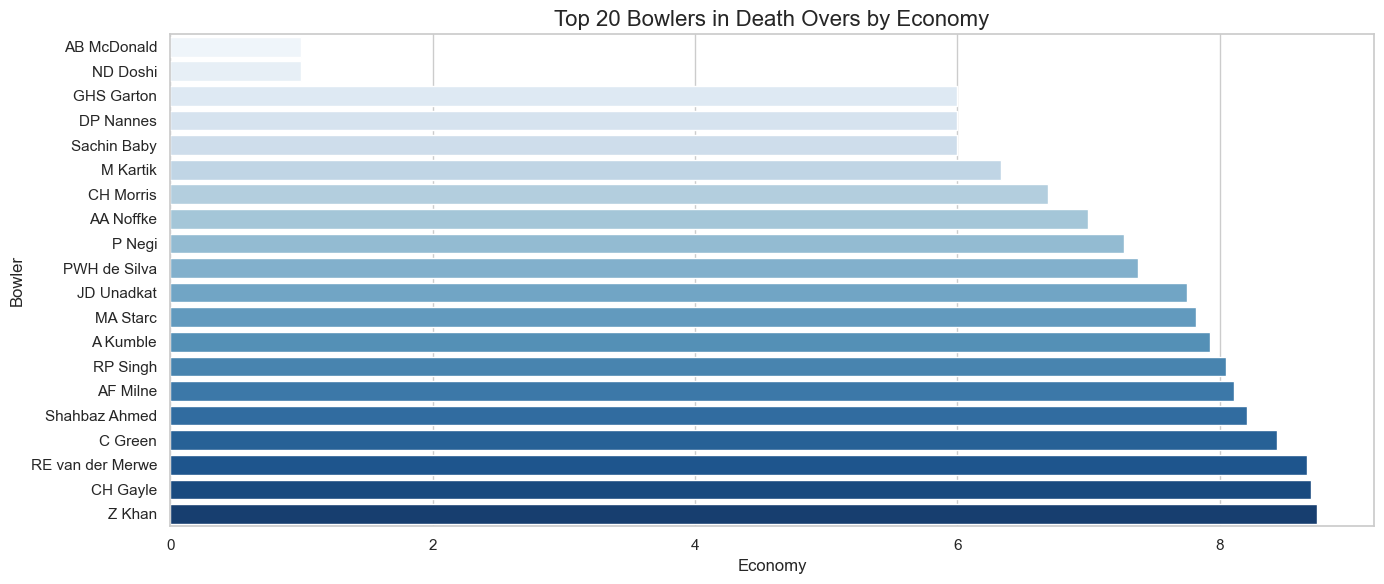

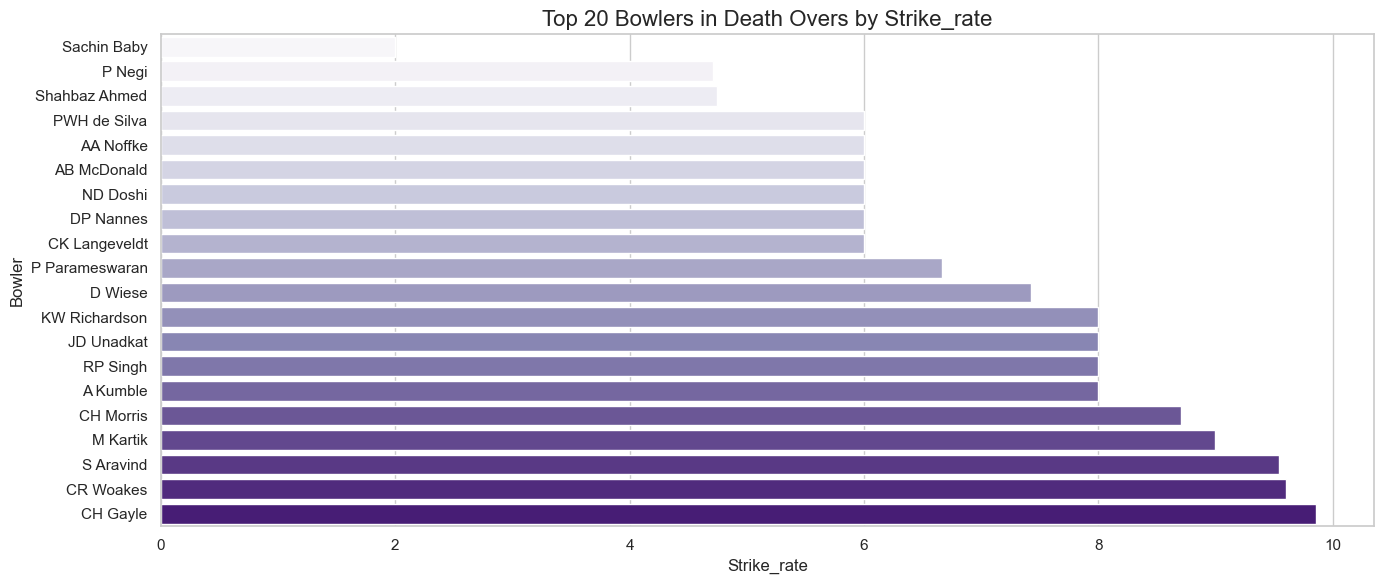

In [299]:
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Define plotting function
def plot_top_bowlers(df, metric, phase, ascending, palette):
    data = df[df['phase'] == phase].copy()
    data = data.sort_values(by=metric, ascending=ascending).head(20)

    plt.figure(figsize=(14, 6))
    sns.barplot(x=metric, y='bowler', data=data, palette=palette)
    plt.title(f'Top 20 Bowlers in {phase} by {metric.capitalize()}', fontsize=16)
    plt.xlabel(metric.capitalize())
    plt.ylabel('Bowler')
    plt.tight_layout()
    plt.show()

# 🔁 Loop through each phase and metric
phases = ['Powerplay', 'Middle Overs', 'Death Overs']
metrics = {
    'dot_percent': {'ascending': False, 'palette': 'Greens'},
    'economy': {'ascending': True, 'palette': 'Blues'},
    'strike_rate': {'ascending': True, 'palette': 'Purples'}
}

for phase in phases:
    for metric, options in metrics.items():
        plot_top_bowlers(
            df=bowling_phase_stats,
            metric=metric,
            phase=phase,
            ascending=options['ascending'],
            palette=options['palette']
        )

In [375]:
# Count wickets taken by each RCB bowler
rcb_wickets = df_bowl[df_bowl['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Get the bowler with the most wickets
highest_wicket_taker = rcb_wickets.sort_values(ascending=False).reset_index()

# Display result
print(f"Highest Wicket Taker for RCB: {highest_wicket_taker['bowler'].iloc[0]} with {highest_wicket_taker['wickets'].iloc[0]} wickets.")

Highest Wicket Taker for RCB: YS Chahal with 67 wickets.


In [307]:
# $ Highest wicket taker for rcb
highest_wicket_taker.head(20)

bowler  wickets
0           YS Chahal      139
1            HV Patel       99
2      Mohammed Siraj       83
3       R Vinay Kumar       72
4              Z Khan       49
5            A Kumble       45
6           S Aravind       45
7        PWH de Silva       35
8            MA Starc       34
9             P Kumar       34
10           DW Steyn       32
11           UT Yadav       28
12          SR Watson       25
13          JH Kallis       23
14       JR Hazlewood       23
15     M Muralitharan       21
16           VR Aaron       21
17             P Negi       20
18  Washington Sundar       19
19         GJ Maxwell       18

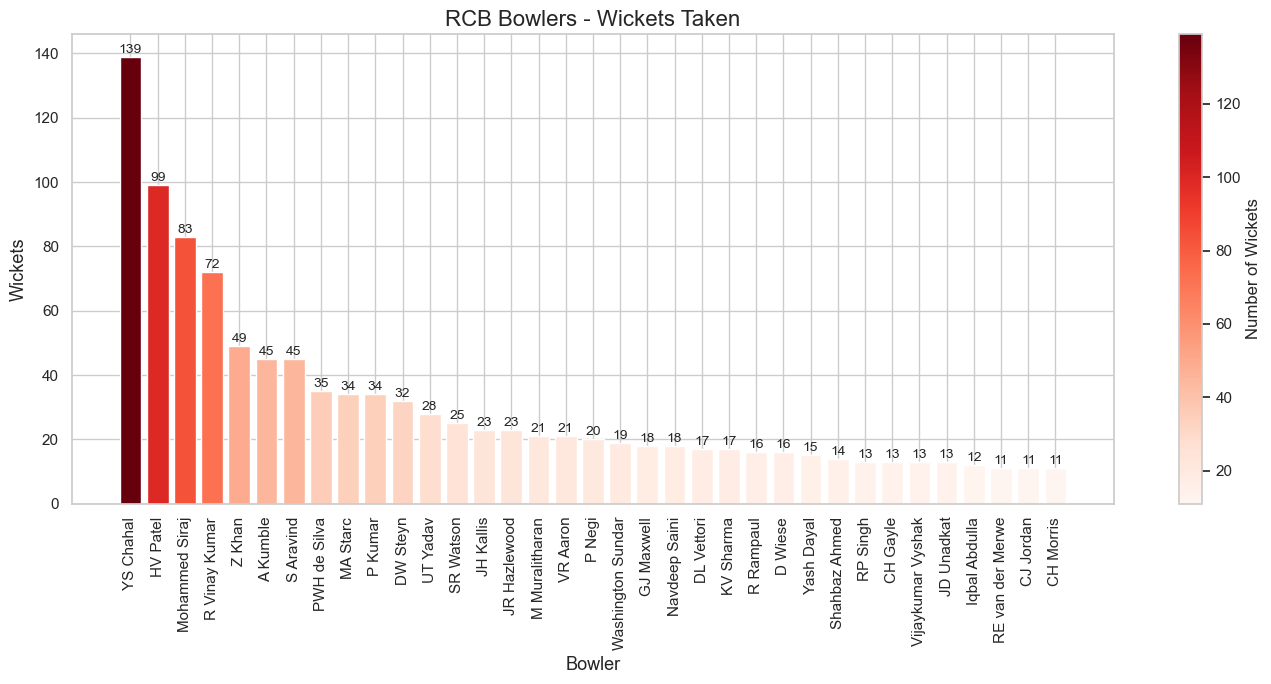

In [324]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = rcb_team_2024[rcb_team_2024['bowling_team'] == 'Royal Challengers Bengaluru']

# Count wickets taken by each RCB bowler
rcb_wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets').reset_index()

# Sort data for better visualization
rcb_wickets.sort_values(by='wickets', ascending=False, inplace=True)
rcb_wickets = rcb_wickets.head(35)

# Normalize for color mapping
norm = Normalize(vmin=rcb_wickets['wickets'].min(), vmax=rcb_wickets['wickets'].max())
cmap = plt.cm.Reds  # Red gradient
colors = cmap(norm(rcb_wickets['wickets']))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(rcb_wickets['bowler'], rcb_wickets['wickets'], color=colors)

# Annotate each bar with wicket count
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

# Customize axes
ax.set_title('RCB Bowlers - Wickets Taken', fontsize=16)
ax.set_xlabel('Bowler', fontsize=13)
ax.set_ylabel('Wickets', fontsize=13)
plt.xticks(rotation=90)

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Wickets')

plt.tight_layout()
plt.show()

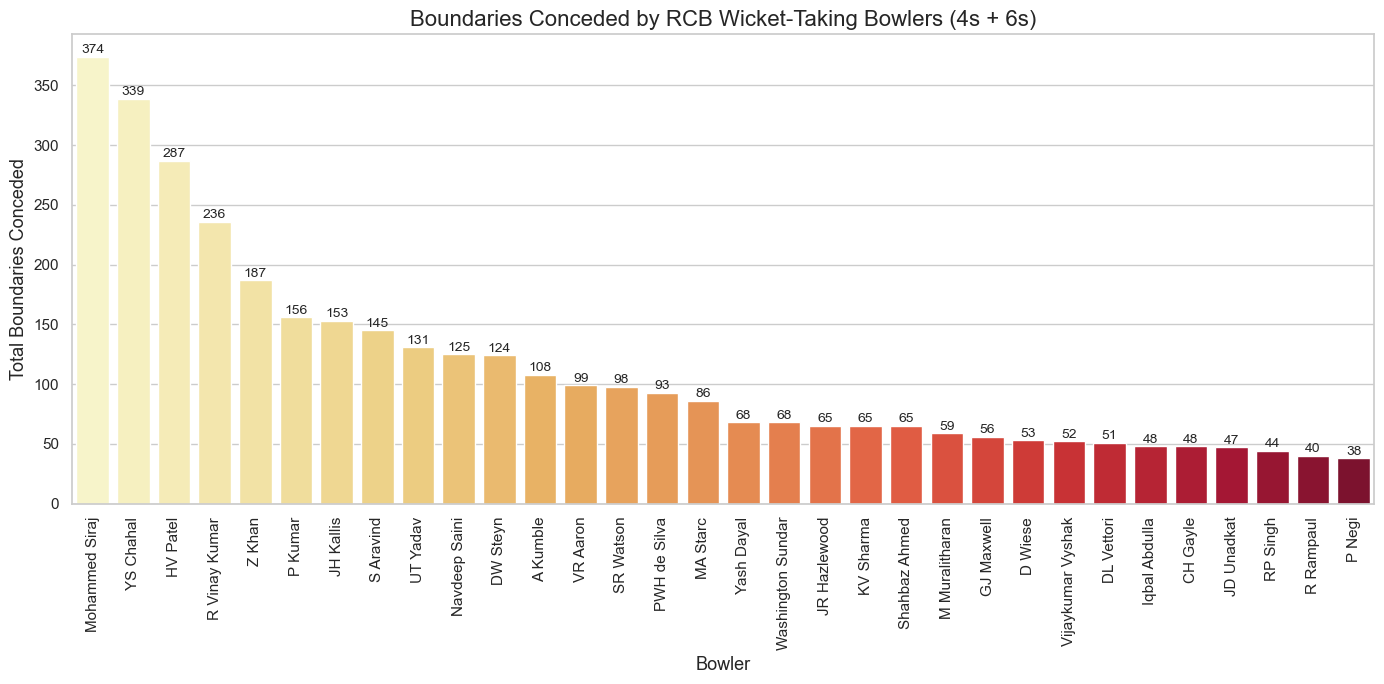

In [328]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = rcb_team_2024[rcb_team_2024['bowling_team'] == 'Royal Challengers Bengaluru']

# Wickets taken by each bowler
wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Boundaries conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine into one DataFrame
bowler_stats = pd.concat([wickets, fours_conceded, sixes_conceded], axis=1).fillna(0)
bowler_stats = bowler_stats.astype({'wickets': int, 'fours_conceded': int, 'sixes_conceded': int})

# Filter only bowlers with at least 1 wicket
bowler_stats = bowler_stats[bowler_stats['wickets'] > 11]

# Calculate total boundaries conceded
bowler_stats['total_boundaries'] = bowler_stats['fours_conceded'] + bowler_stats['sixes_conceded']
bowler_stats = bowler_stats.sort_values('total_boundaries', ascending=False).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=bowler_stats, x='bowler', y='total_boundaries', palette='YlOrRd')

# Annotate each bar
for index, row in bowler_stats.iterrows():
    plt.text(index, row['total_boundaries'] + 0.5, f"{row['total_boundaries']}", 
             ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Boundaries Conceded by RCB Wicket-Taking Bowlers (4s + 6s)', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Total Boundaries Conceded', fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [332]:
# Filter only RCB bowlers
df_bowl_rcb = rcb_team_2024[rcb_team_2024['bowling_team'] == 'Royal Challengers Bengaluru']

# Total balls bowled by each bowler (excluding extras like wides/no-balls if needed)
balls_bowled = df_bowl_rcb.groupby('bowler').size().rename('balls_bowled')

# Count of 4s and 6s conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine all into a single DataFrame
bowler_boundary_stats = pd.concat([balls_bowled, fours_conceded, sixes_conceded], axis=1).fillna(0)

# Ensure integer type
bowler_boundary_stats = bowler_boundary_stats.astype(int)

# Calculate balls per 4 and 6, avoid division by zero
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['fours_conceded'].replace(0, pd.NA)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['sixes_conceded'].replace(0, pd.NA)

# Convert columns to numeric (force coercion of bad values to NaN)
bowler_boundary_stats['balls_per_4'] = pd.to_numeric(bowler_boundary_stats['balls_per_4'], errors='coerce')
bowler_boundary_stats['balls_per_6'] = pd.to_numeric(bowler_boundary_stats['balls_per_6'], errors='coerce')

# Now safely round
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_per_4'].round(2)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_per_6'].round(2)


# Drop NaN if needed (optional)
bowler_boundary_stats.dropna(subset=['balls_per_4', 'balls_per_6'], how='all', inplace=True)

# Display top bowlers
bowler_boundary_stats.sort_values('balls_bowled', ascending=False).head(20)

balls_bowled  fours_conceded  sixes_conceded  balls_per_4  \
bowler                                                                         
YS Chahal                  2487             188             151        13.23   
Mohammed Siraj             1940             260             114         7.46   
HV Patel                   1708             196              91         8.71   
R Vinay Kumar              1347             172              64         7.83   
Z Khan                     1039             155              32         6.70   
A Kumble                    983              73              35        13.47   
P Kumar                     875             113              43         7.74   
JH Kallis                   850             120              33         7.08   
DW Steyn                    811             100              24         8.11   
S Aravind                   788             107              38         7.36   
Navdeep Saini               618              92              33         6.72   
UT Yadav                    615              91              40         6.76   
MA Starc                    612              78               8         7.85   
Washington Sundar           576              38              30        15.16   
PWH de Silva                557              44              49        12.66   
SR Watson                   525              73              25         7.19   
DL Vettori                  524              39              12        13.44   
VR Aaron                    506              71              28         7.13   
M Muralitharan              485              35              24        13.86   
GJ Maxwell                  407              22              34        18.50   

                   balls_per_6  
bowler                          
YS Chahal                16.47  
Mohammed Siraj           17.02  
HV Patel                 18.77  
R Vinay Kumar            21.05  
Z Khan                   32.47  
A Kumble                 28.09  
P Kumar                  20.35  
JH Kallis                25.76  
DW Steyn                 33.79  
S Aravind                20.74  
Navdeep Saini            18.73  
UT Yadav                 15.38  
MA Starc                 76.50  
Washington Sundar        19.20  
PWH de Silva             11.37  
SR Watson                21.00  
DL Vettori               43.67  
VR Aaron                 18.07  
M Muralitharan           20.21  
GJ Maxwell               11.97

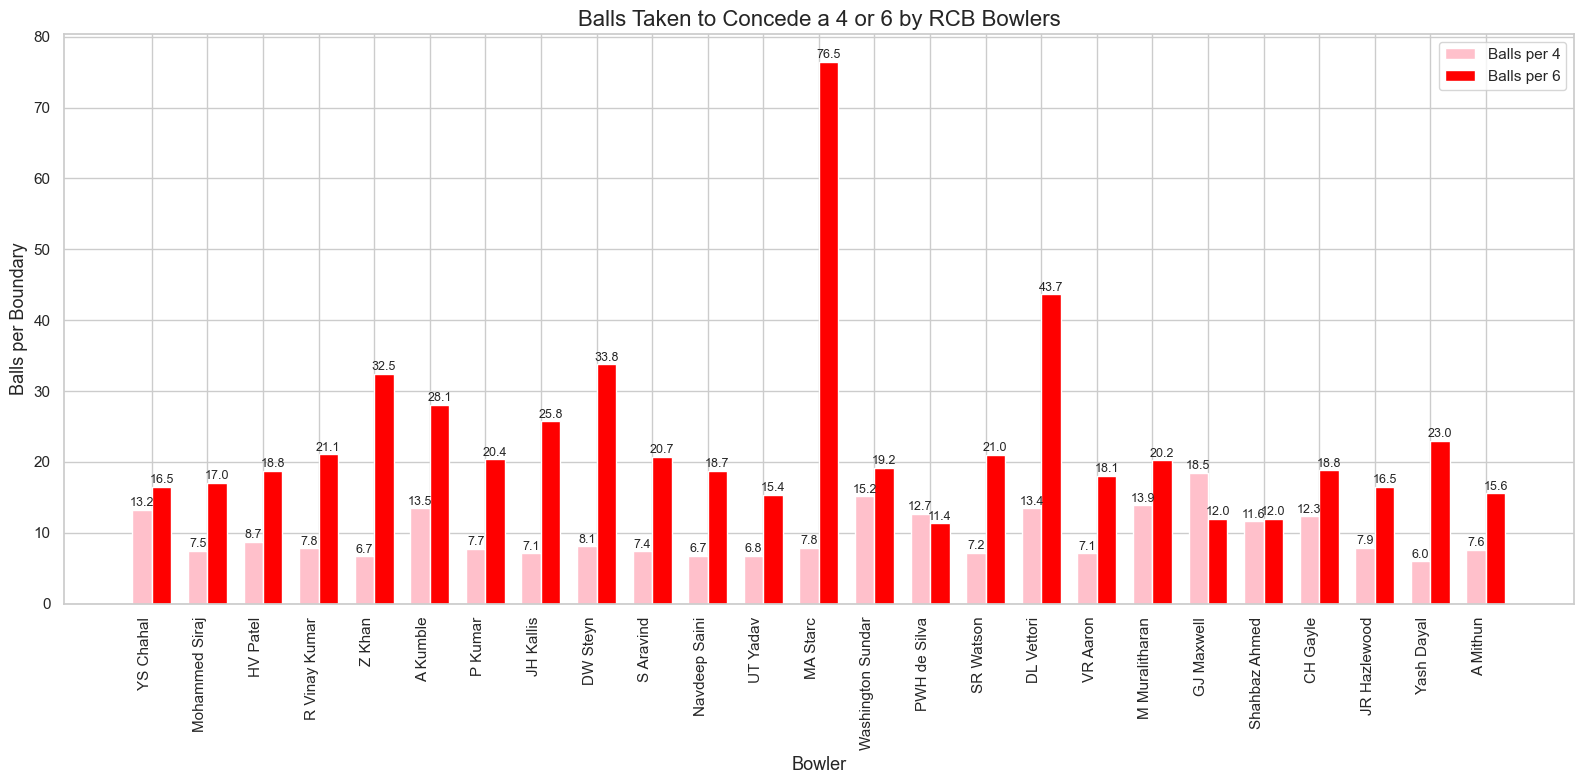

In [352]:
# Your original DataFrame
df = bowler_boundary_stats.copy()
df = df.sort_values('balls_bowled', ascending=False).head(25)

# Extract x-axis labels and data
bowlers = df.index.tolist()
x = np.arange(len(bowlers))  # the label locations
width = 0.35  # the width of the bars

# Initialize plot
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, df['balls_per_4'], width, label='Balls per 4', color='pink')
plt.bar(x + width/2, df['balls_per_6'], width, label='Balls per 6', color='red')

# Add value labels
for i in range(len(bowlers)):
    plt.text(x[i] - width/2, df['balls_per_4'].iloc[i] + 0.5, f"{df['balls_per_4'].iloc[i]:.1f}", 
             ha='center', fontsize=9)
    plt.text(x[i] + width/2, df['balls_per_6'].iloc[i] + 0.5, f"{df['balls_per_6'].iloc[i]:.1f}", 
             ha='center', fontsize=9)

# Customize axes and labels
plt.xticks(x, bowlers, rotation=90, ha='right')
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

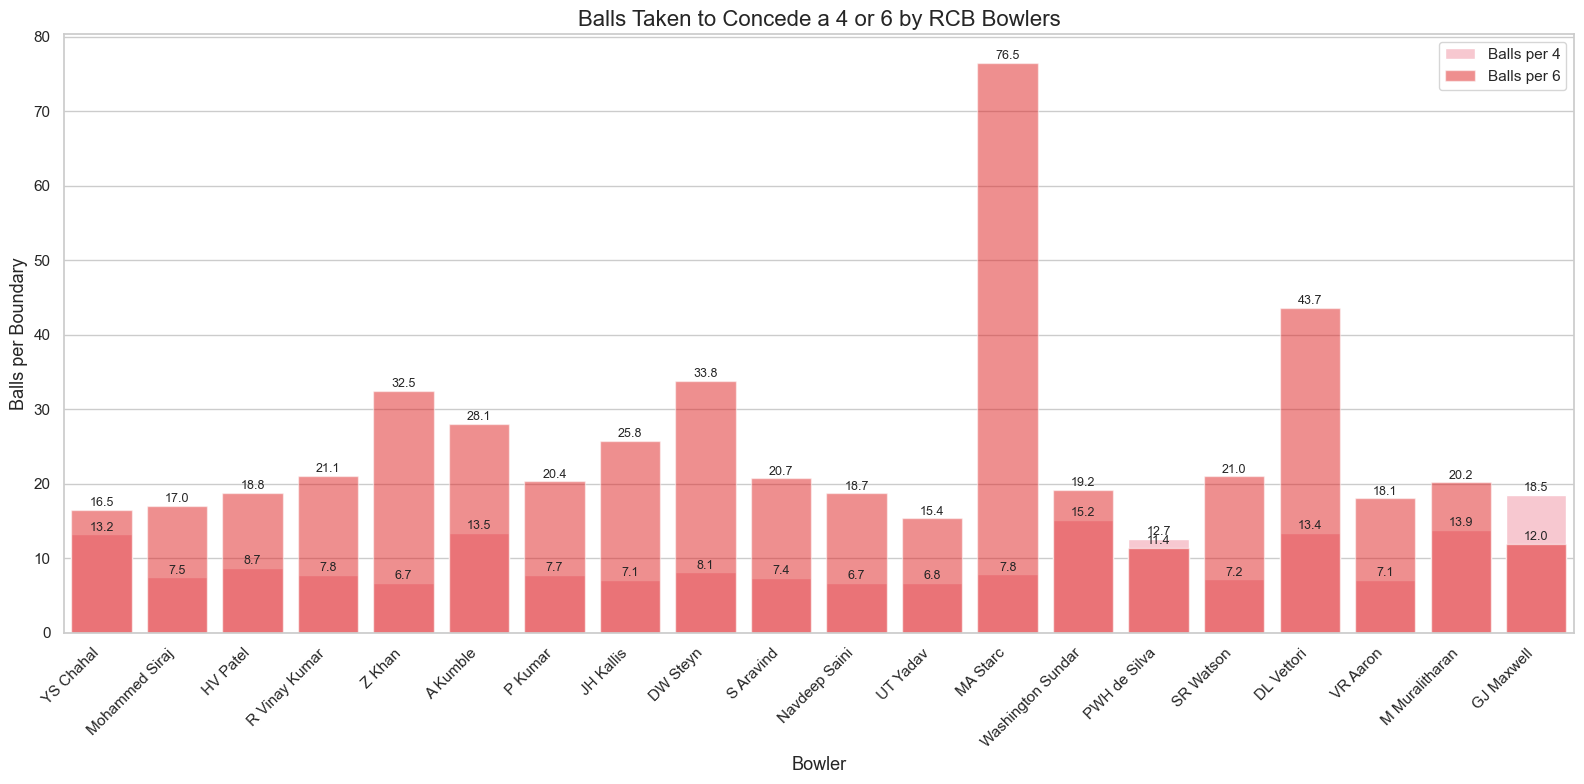

In [348]:
# Use your original DataFrame
df = bowler_boundary_stats.copy()

# Sort by balls_bowled
df = df.sort_values('balls_bowled', ascending=False).head(20)

# Set figure size and style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Plot Balls per 4 (Gold)
sns.barplot(x=df.index, y='balls_per_4', data=df, color='pink', label='Balls per 4')

# Overlay Balls per 6 (Red)
sns.barplot(x=df.index, y='balls_per_6', data=df, color='red', alpha=0.5, label='Balls per 6')

# Add annotations
for i, (bowler, row) in enumerate(df.iterrows()):
    plt.text(i, row['balls_per_4'] + 0.5, f"{row['balls_per_4']:.1f}", ha='center', fontsize=9)
    plt.text(i, row['balls_per_6'] + 0.5, f"{row['balls_per_6']:.1f}", ha='center', fontsize=9)

# Titles and labels
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Bowlers 1st Inning VS 2nd Inning

In [356]:
bowling = rcb_team_2024[rcb_team_2024['bowling_team'] == 'Royal Challengers Bengaluru']

In [358]:
bowling_1st  = bowling[bowling['inning'] == 1]
bowling_2nd  = bowling[bowling['inning'] == 2]

#### Bowilng_1st

In [359]:
bowling_1st

match_id  inning       date           batting_team  \
0         335982       1 2008-04-18  Kolkata Knight Riders   
1         335982       1 2008-04-18  Kolkata Knight Riders   
2         335982       1 2008-04-18  Kolkata Knight Riders   
3         335982       1 2008-04-18  Kolkata Knight Riders   
4         335982       1 2008-04-18  Kolkata Knight Riders   
...          ...     ...        ...                    ...   
256378   1426290       1 2024-05-04         Gujarat Titans   
256379   1426290       1 2024-05-04         Gujarat Titans   
256380   1426290       1 2024-05-04         Gujarat Titans   
256381   1426290       1 2024-05-04         Gujarat Titans   
256382   1426290       1 2024-05-04         Gujarat Titans   

                       bowling_team  over  ball_faced  ball       batter  \
0       Royal Challengers Bengaluru     0           1     1   SC Ganguly   
1       Royal Challengers Bengaluru     0           1     2  BB McCullum   
2       Royal Challengers Bengaluru     0           1     3  BB McCullum   
3       Royal Challengers Bengaluru     0           1     3  BB McCullum   
4       Royal Challengers Bengaluru     0           1     4  BB McCullum   
...                             ...   ...         ...   ...          ...   
256378  Royal Challengers Bengaluru    18           1     5    V Shankar   
256379  Royal Challengers Bengaluru    18           1     6    V Shankar   
256380  Royal Challengers Bengaluru    19           1     1    MJ Suthar   
256381  Royal Challengers Bengaluru    19           1     2    MM Sharma   
256382  Royal Challengers Bengaluru    19           1     3    V Shankar   

                   bowler  non_striker  batsman_runs  extra_runs  total_runs  \
0                 P Kumar  BB McCullum             0           1           1   
1                 P Kumar   SC Ganguly             0           0           0   
2                 P Kumar   SC Ganguly             0           1           1   
3                 P Kumar   SC Ganguly             0           0           0   
4                 P Kumar   SC Ganguly             0           0           0   
...                   ...          ...           ...         ...         ...   
256378     Mohammed Siraj    MJ Suthar            10           0           4   
256379     Mohammed Siraj    MJ Suthar            10           0           0   
256380  Vijaykumar Vyshak    V Shankar             1           0           0   
256381  Vijaykumar Vyshak    V Shankar             0           0           0   
256382  Vijaykumar Vyshak   Noor Ahmad            10           0           0   

       extra_type  is_wicket player_dismissed dismissal_kind  \
0         legbyes          0              NaN            NaN   
1             NaN          0              NaN            NaN   
2           wides          0              NaN            NaN   
3             NaN          0              NaN            NaN   
4             NaN          0              NaN            NaN   
...           ...        ...              ...            ...   
256378        NaN          0              NaN            NaN   
256379        NaN          0              NaN            NaN   
256380        NaN          1        MJ Suthar         caught   
256381        NaN          0        MM Sharma        run out   
256382        NaN          1        V Shankar         caught   

                             fielder  season  
0                                NaN    2008  
1                                NaN    2008  
2                                NaN    2008  
3                                NaN    2008  
4                                NaN    2008  
...                              ...     ...  
256378                           NaN    2024  
256379                           NaN    2024  
256380                 Swapnil Singh    2024  
256381  KD Karthik,Vijaykumar Vyshak    2024  
256382                Mohammed Siraj    2024  

[15267 rows x 20 columns]

In [361]:
# Total balls bowled
balls_bowled = bowling_1st.groupby('bowler').size().rename("balls_bowled")
# Total runs conceded
runs_conceded = bowling_1st.groupby('bowler')['total_runs'].sum().rename("runs_conceded")
# Wickets taken
wickets = bowling_1st[bowling_1st['is_wicket'] == 1].groupby('bowler').size().rename("wickets")
# Dot balls
dot_balls = bowling_1st[bowling_1st['total_runs'] == 0].groupby('bowler').size().rename("dot_balls")
# Fours & Sixes conceded
fours_conceded = bowling_1st[bowling_1st['total_runs'] == 4].groupby('bowler').size().rename("fours_conceded")
sixes_conceded = bowling_1st[bowling_1st['total_runs'] == 6].groupby('bowler').size().rename("sixes_conceded")

In [362]:
# Combine all metrics
bowler_stats = pd.concat(
    [balls_bowled, dot_balls, runs_conceded, wickets, fours_conceded, sixes_conceded], 
    axis=1
).fillna(0)

In [363]:
# Convert all to integers
bowler_stats = bowler_stats.astype(int)

# Metrics
bowler_stats['dot_percent'] = (bowler_stats['dot_balls'] / bowler_stats['balls_bowled']) * 100
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets'].replace(0, pd.NA)
bowler_stats['average'] = bowler_stats['runs_conceded'] / bowler_stats['wickets'].replace(0, pd.NA)

# Clean up invalid or infinite values
for col in ['strike_rate', 'average']:
    bowler_stats[col] = pd.to_numeric(bowler_stats[col], errors='coerce')
    bowler_stats[col].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Round metrics
bowler_stats['dot_percent'] = bowler_stats['dot_percent'].round(2)
bowler_stats['economy'] = bowler_stats['economy'].round(2)
bowler_stats['strike_rate'] = bowler_stats['strike_rate'].round(2)
bowler_stats['average'] = bowler_stats['average'].round(2)

# ✅ Filter bowlers with at least 10 overs (60 balls)
bowler_stats_filtered = bowler_stats[bowler_stats['balls_bowled'] >= 60]

In [364]:
# Sort by wickets for top performers
bowler_stats_sorted = bowler_stats_filtered.sort_values(by='wickets', ascending=False)

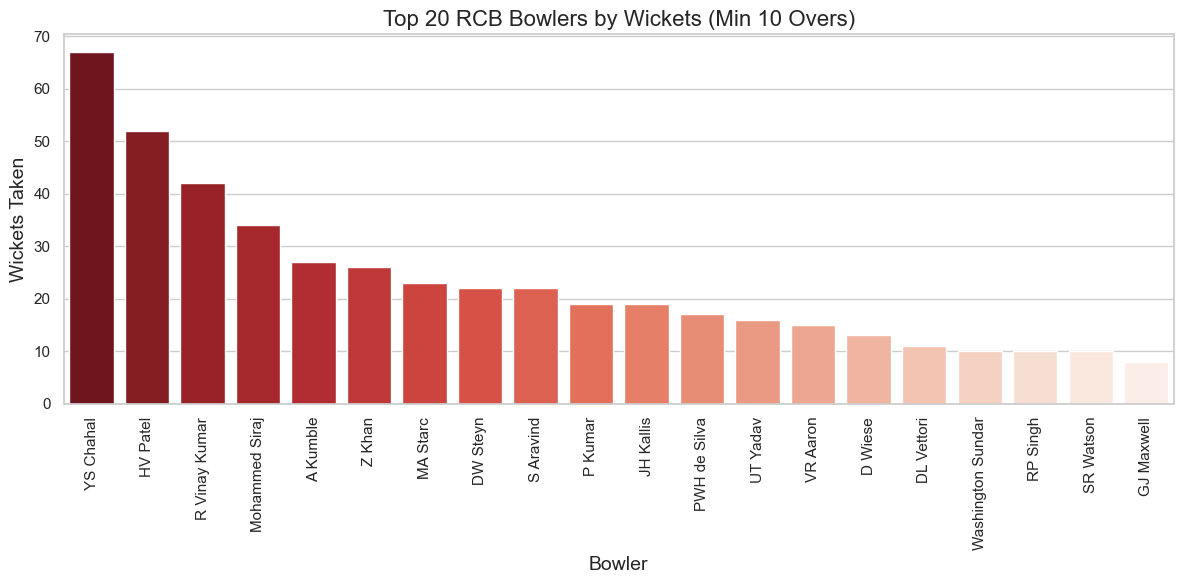

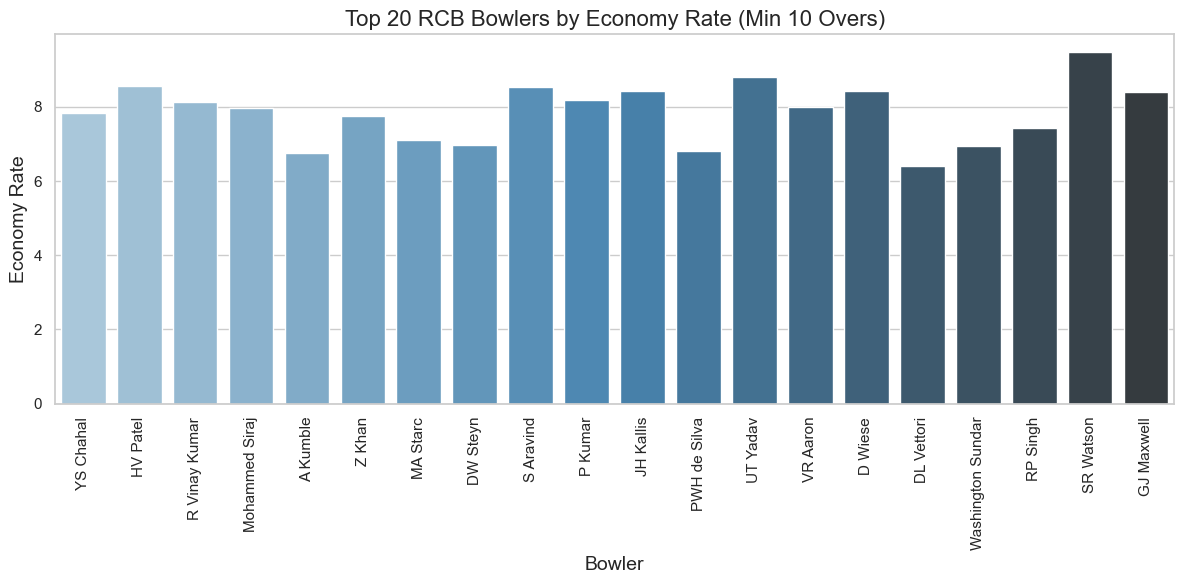

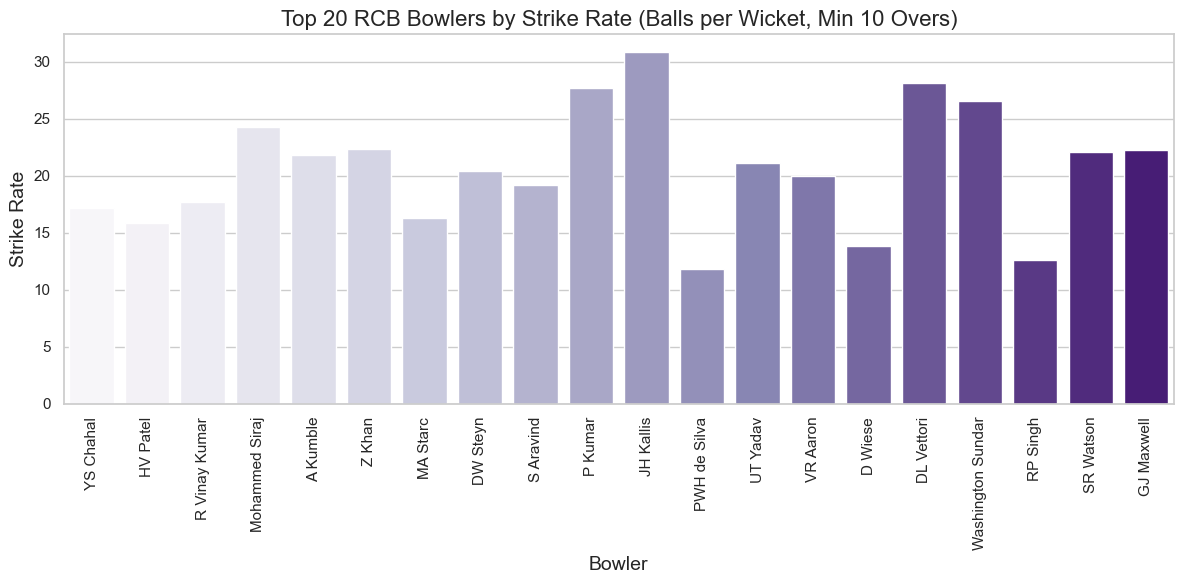

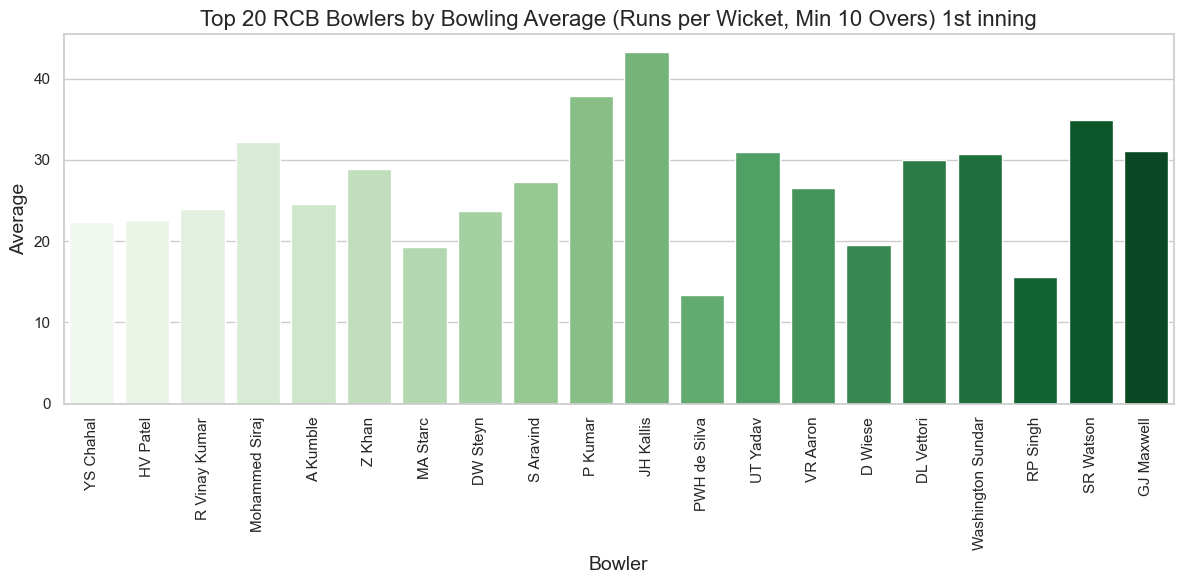

In [365]:
# Prepare for plotting
top_bowlers = bowler_stats_sorted.head(20).copy()
top_bowlers.reset_index(inplace=True)

# Plot Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# 🔹 Plot 1: Wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='Reds_r')
plt.title('Top 20 RCB Bowlers by Wickets (Min 10 Overs) 1st inning')
plt.ylabel('Wickets Taken')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: Economy Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='Blues_d')
plt.title('Top 20 RCB Bowlers by Economy Rate (Min 10 Overs) 1st inning')
plt.ylabel('Economy Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 3: Strike Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='strike_rate', data=top_bowlers, palette='Purples')
plt.title('Top 20 RCB Bowlers by Strike Rate (Balls per Wicket, Min 10 Overs) 1st inning')
plt.ylabel('Strike Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 4: Bowling Average
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='average', data=top_bowlers, palette='Greens')
plt.title('Top 20 RCB Bowlers by Bowling Average (Runs per Wicket, Min 10 Overs) 1st inning')
plt.ylabel('Average')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [395]:
# Count wickets taken by each RCB bowler
rcb_wickets = bowling_1st[bowling_1st['is_wicket'] == 1].groupby('bowler').size().rename("wickets")

# Get the bowler with the most wickets
highest_wicket_taker = rcb_wickets.sort_values(ascending=False).reset_index()

# Display result
print(f"Highest Wicket Taker for RCB: {highest_wicket_taker['bowler'].iloc[0]} with {highest_wicket_taker['wickets'].iloc[0]} wickets in 1st inning.")

Highest Wicket Taker for RCB: YS Chahal with 67 wickets in 1st inning.


In [373]:
# $ Highest wicket taker for rcb
highest_wicket_taker.head(20)

bowler  wickets
0           YS Chahal       67
1            HV Patel       52
2       R Vinay Kumar       42
3      Mohammed Siraj       34
4            A Kumble       27
5              Z Khan       26
6            MA Starc       23
7            DW Steyn       22
8           S Aravind       22
9           JH Kallis       19
10            P Kumar       19
11       PWH de Silva       17
12           UT Yadav       16
13           VR Aaron       15
14            D Wiese       13
15         DL Vettori       11
16          SR Watson       10
17           RP Singh       10
18  Washington Sundar       10
19         GJ Maxwell        8

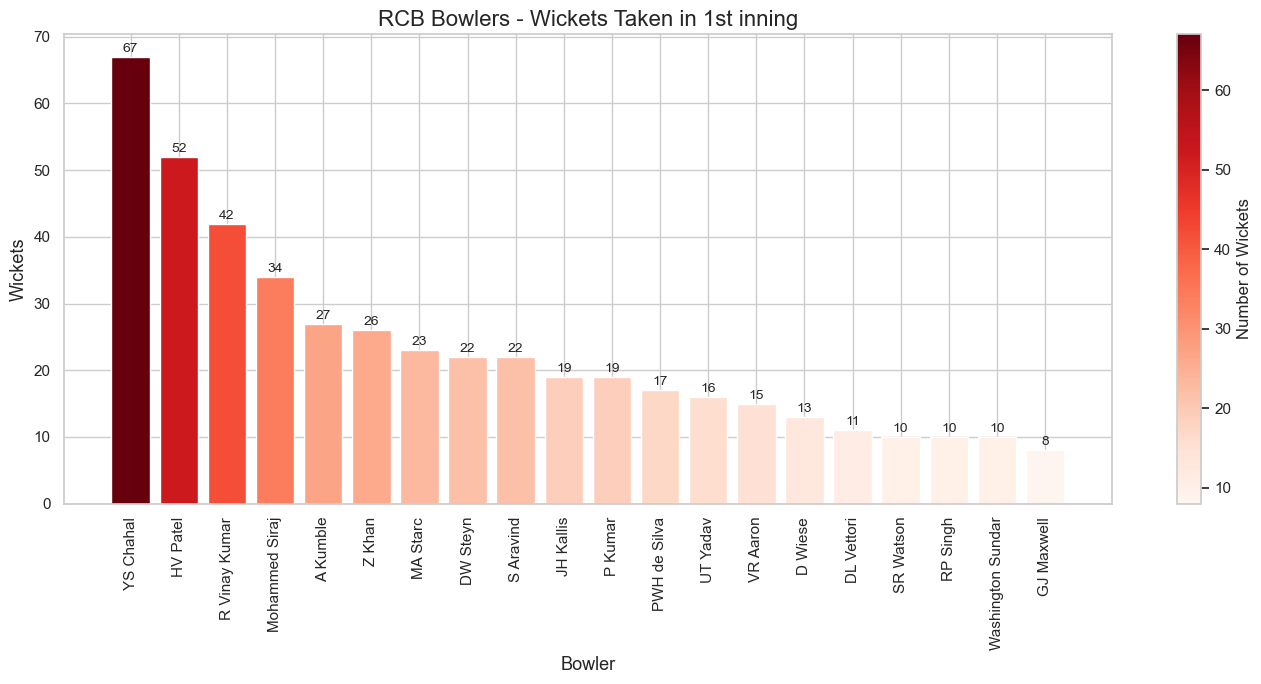

In [380]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = highest_wicket_taker.head(20)


# Normalize for color mapping
norm = Normalize(vmin=df_bowl_rcb['wickets'].min(), vmax=df_bowl_rcb['wickets'].max())
cmap = plt.cm.Reds  # Red gradient
colors = cmap(norm(df_bowl_rcb['wickets']))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(df_bowl_rcb['bowler'], df_bowl_rcb['wickets'], color=colors)

# Annotate each bar with wicket count
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

# Customize axes
ax.set_title('RCB Bowlers - Wickets Taken in 1st inning', fontsize=16)
ax.set_xlabel('Bowler', fontsize=13)
ax.set_ylabel('Wickets', fontsize=13)
plt.xticks(rotation=90)

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Wickets')

plt.tight_layout()
plt.show()

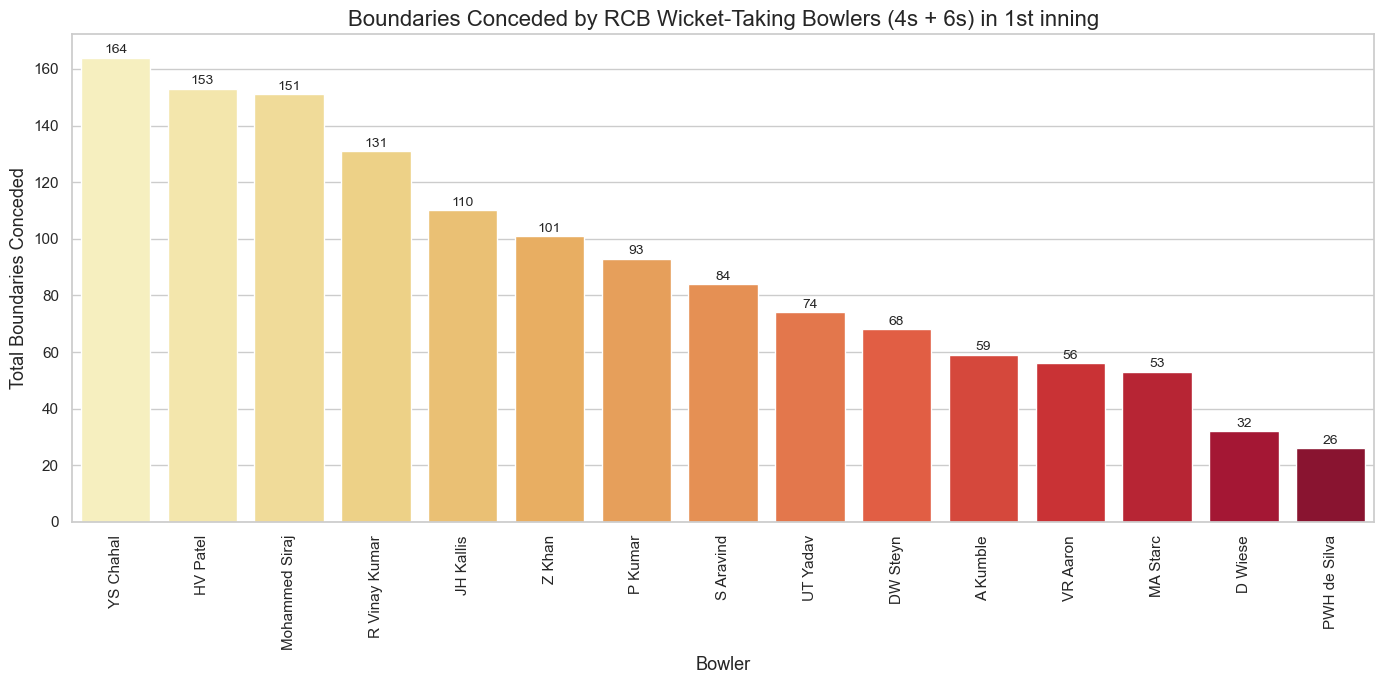

In [382]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = bowling_1st

# Wickets taken by each bowler
wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Boundaries conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine into one DataFrame
bowler_stats = pd.concat([wickets, fours_conceded, sixes_conceded], axis=1).fillna(0)
bowler_stats = bowler_stats.astype({'wickets': int, 'fours_conceded': int, 'sixes_conceded': int})

# Filter only bowlers with at least 1 wicket
bowler_stats = bowler_stats[bowler_stats['wickets'] > 11]

# Calculate total boundaries conceded
bowler_stats['total_boundaries'] = bowler_stats['fours_conceded'] + bowler_stats['sixes_conceded']
bowler_stats = bowler_stats.sort_values('total_boundaries', ascending=False).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=bowler_stats, x='bowler', y='total_boundaries', palette='YlOrRd')

# Annotate each bar
for index, row in bowler_stats.iterrows():
    plt.text(index, row['total_boundaries'] + 0.5, f"{row['total_boundaries']}", 
             ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Boundaries Conceded by RCB Wicket-Taking Bowlers (4s + 6s) in 1st inning', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Total Boundaries Conceded', fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [383]:
# Filter only RCB bowlers
df_bowl_rcb = bowling_1st

# Total balls bowled by each bowler (excluding extras like wides/no-balls if needed)
balls_bowled = df_bowl_rcb.groupby('bowler').size().rename('balls_bowled')

# Count of 4s and 6s conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine all into a single DataFrame
bowler_boundary_stats = pd.concat([balls_bowled, fours_conceded, sixes_conceded], axis=1).fillna(0)

# Ensure integer type
bowler_boundary_stats = bowler_boundary_stats.astype(int)

# Calculate balls per 4 and 6, avoid division by zero
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['fours_conceded'].replace(0, pd.NA)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['sixes_conceded'].replace(0, pd.NA)

# Convert columns to numeric (force coercion of bad values to NaN)
bowler_boundary_stats['balls_per_4'] = pd.to_numeric(bowler_boundary_stats['balls_per_4'], errors='coerce')
bowler_boundary_stats['balls_per_6'] = pd.to_numeric(bowler_boundary_stats['balls_per_6'], errors='coerce')

# Now safely round
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_per_4'].round(2)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_per_6'].round(2)


# Drop NaN if needed (optional)
bowler_boundary_stats.dropna(subset=['balls_per_4', 'balls_per_6'], how='all', inplace=True)

# Display top bowlers
bowler_boundary_stats.sort_values('balls_bowled', ascending=False).head(20)

balls_bowled  fours_conceded  sixes_conceded  balls_per_4  \
bowler                                                                         
YS Chahal                  1150              87              77        13.22   
HV Patel                    825             104              49         7.93   
Mohammed Siraj              825             101              50         8.17   
R Vinay Kumar               742              99              32         7.49   
A Kumble                    590              37              22        15.95   
JH Kallis                   586              86              24         6.81   
Z Khan                      580              84              17         6.90   
P Kumar                     526              67              26         7.85   
DW Steyn                    449              56              12         8.02   
S Aravind                   421              61              23         6.90   
MA Starc                    374              48               5         7.79   
UT Yadav                    338              53              21         6.38   
DL Vettori                  309              26               7        11.88   
VR Aaron                    299              44              12         6.80   
Washington Sundar           265              21              10        12.62   
M Muralitharan              223              15              11        14.87   
Navdeep Saini               223              41              15         5.44   
SR Watson                   221              33              17         6.70   
CH Gayle                    206              15              14        13.73   
PWH de Silva                201              16              10        12.56   

                   balls_per_6  
bowler                          
YS Chahal                14.94  
HV Patel                 16.84  
Mohammed Siraj           16.50  
R Vinay Kumar            23.19  
A Kumble                 26.82  
JH Kallis                24.42  
Z Khan                   34.12  
P Kumar                  20.23  
DW Steyn                 37.42  
S Aravind                18.30  
MA Starc                 74.80  
UT Yadav                 16.10  
DL Vettori               44.14  
VR Aaron                 24.92  
Washington Sundar        26.50  
M Muralitharan           20.27  
Navdeep Saini            14.87  
SR Watson                13.00  
CH Gayle                 14.71  
PWH de Silva             20.10

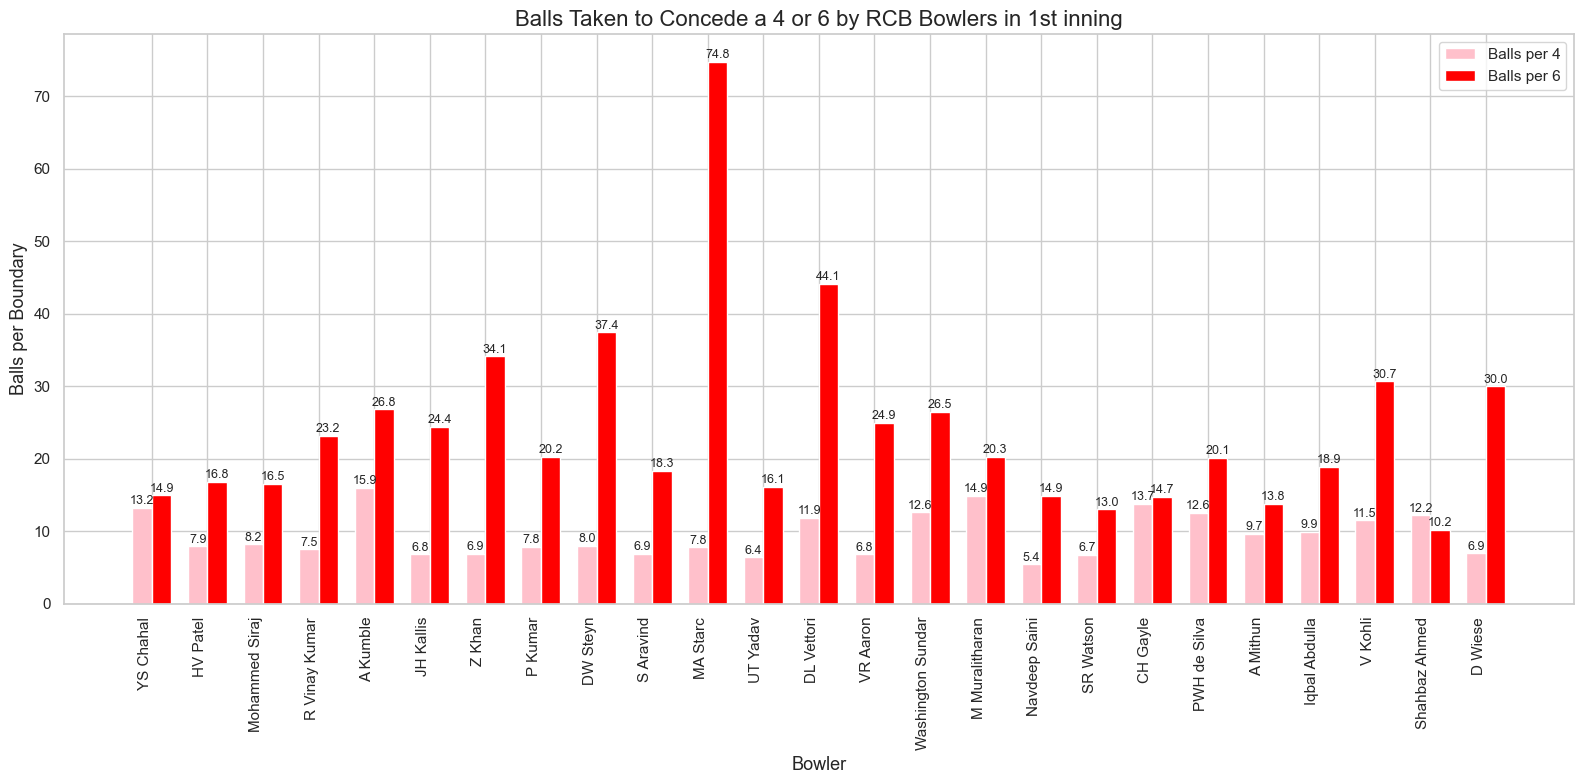

In [385]:
# Your original DataFrame
df = bowler_boundary_stats.copy()
df = df.sort_values('balls_bowled', ascending=False).head(25)

# Extract x-axis labels and data
bowlers = df.index.tolist()
x = np.arange(len(bowlers))  # the label locations
width = 0.35  # the width of the bars

# Initialize plot
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, df['balls_per_4'], width, label='Balls per 4', color='pink')
plt.bar(x + width/2, df['balls_per_6'], width, label='Balls per 6', color='red')

# Add value labels
for i in range(len(bowlers)):
    plt.text(x[i] - width/2, df['balls_per_4'].iloc[i] + 0.5, f"{df['balls_per_4'].iloc[i]:.1f}", 
             ha='center', fontsize=9)
    plt.text(x[i] + width/2, df['balls_per_6'].iloc[i] + 0.5, f"{df['balls_per_6'].iloc[i]:.1f}", 
             ha='center', fontsize=9)

# Customize axes and labels
plt.xticks(x, bowlers, rotation=90, ha='right')
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers in 1st inning', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

#### Bowling_2nd

In [387]:
# Total balls bowled
balls_bowled = bowling_2nd.groupby('bowler').size().rename("balls_bowled")
# Total runs conceded
runs_conceded = bowling_2nd.groupby('bowler')['total_runs'].sum().rename("runs_conceded")
# Wickets taken
wickets = bowling_2nd[bowling_2nd['is_wicket'] == 1].groupby('bowler').size().rename("wickets")
# Dot balls
dot_balls = bowling_2nd[bowling_2nd['total_runs'] == 0].groupby('bowler').size().rename("dot_balls")
# Fours & Sixes conceded
fours_conceded = bowling_2nd[bowling_2nd['total_runs'] == 4].groupby('bowler').size().rename("fours_conceded")
sixes_conceded = bowling_2nd[bowling_2nd['total_runs'] == 6].groupby('bowler').size().rename("sixes_conceded")

In [388]:
# Combine all metrics
bowler_stats = pd.concat(
    [balls_bowled, dot_balls, runs_conceded, wickets, fours_conceded, sixes_conceded], 
    axis=1
).fillna(0)

In [389]:
# Convert all to integers
bowler_stats = bowler_stats.astype(int)

# Metrics
bowler_stats['dot_percent'] = (bowler_stats['dot_balls'] / bowler_stats['balls_bowled']) * 100
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets'].replace(0, pd.NA)
bowler_stats['average'] = bowler_stats['runs_conceded'] / bowler_stats['wickets'].replace(0, pd.NA)

# Clean up invalid or infinite values
for col in ['strike_rate', 'average']:
    bowler_stats[col] = pd.to_numeric(bowler_stats[col], errors='coerce')
    bowler_stats[col].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Round metrics
bowler_stats['dot_percent'] = bowler_stats['dot_percent'].round(2)
bowler_stats['economy'] = bowler_stats['economy'].round(2)
bowler_stats['strike_rate'] = bowler_stats['strike_rate'].round(2)
bowler_stats['average'] = bowler_stats['average'].round(2)

# ✅ Filter bowlers with at least 10 overs (60 balls)
bowler_stats_filtered = bowler_stats[bowler_stats['balls_bowled'] >= 60]

In [390]:
# Sort by wickets for top performers
bowler_stats_sorted = bowler_stats_filtered.sort_values(by='wickets', ascending=False)

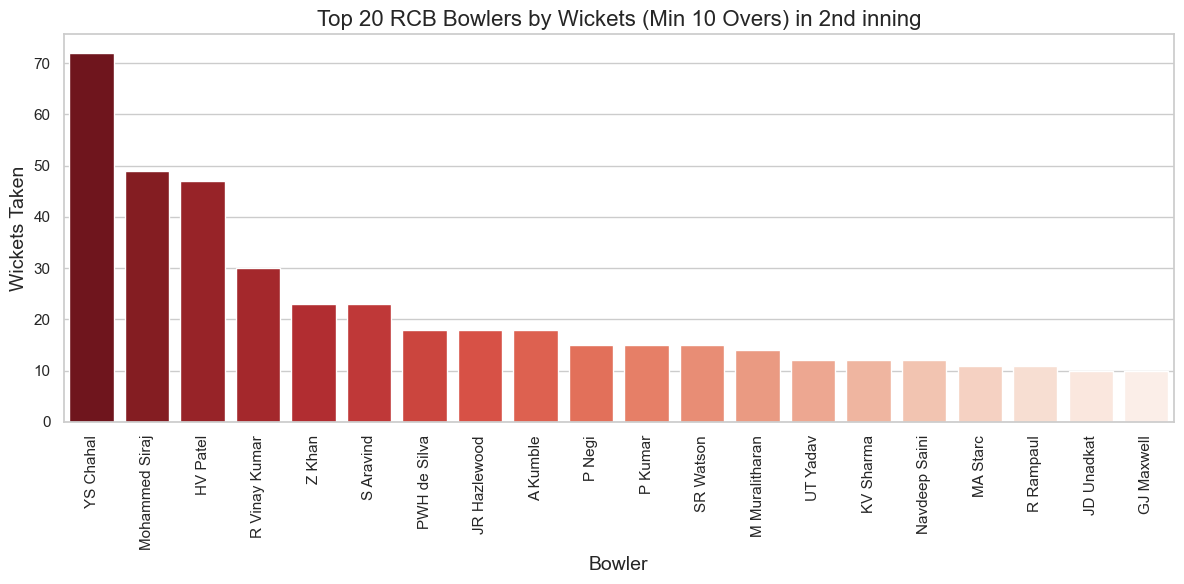

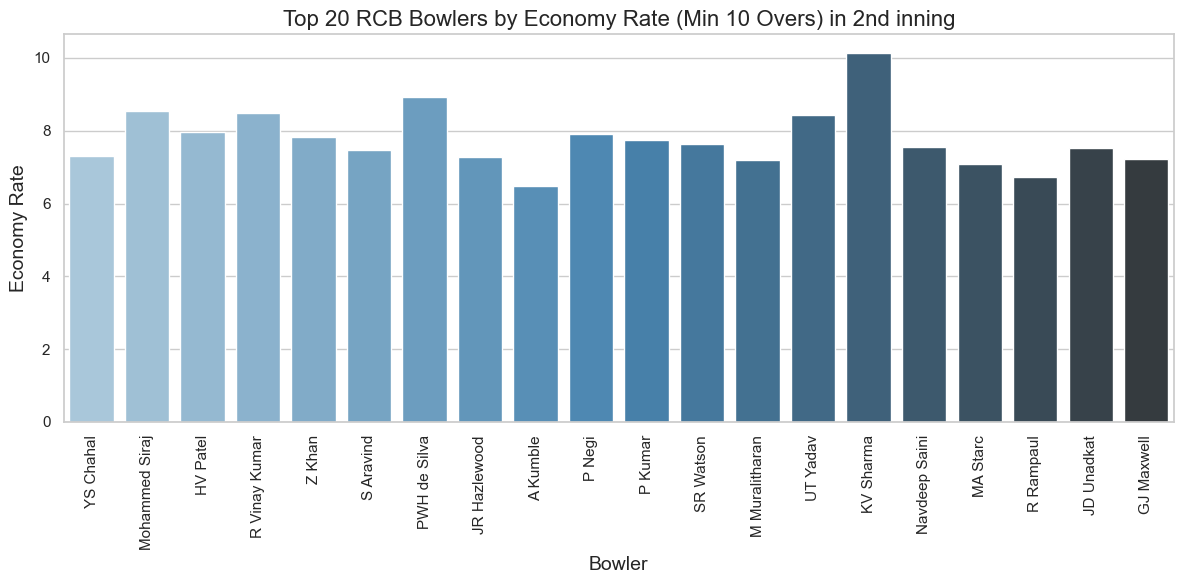

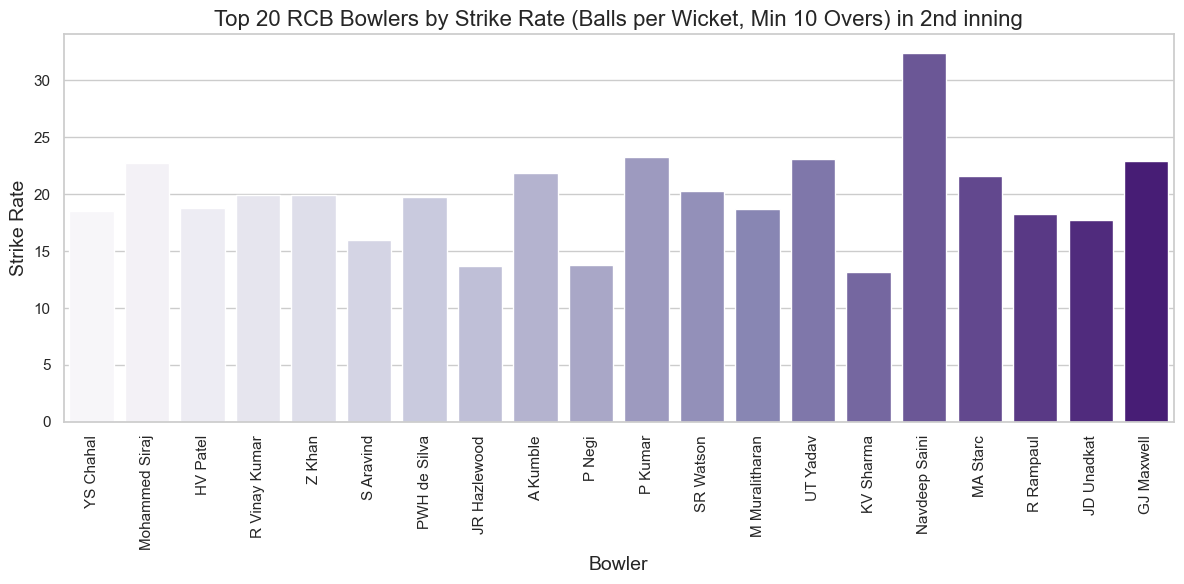

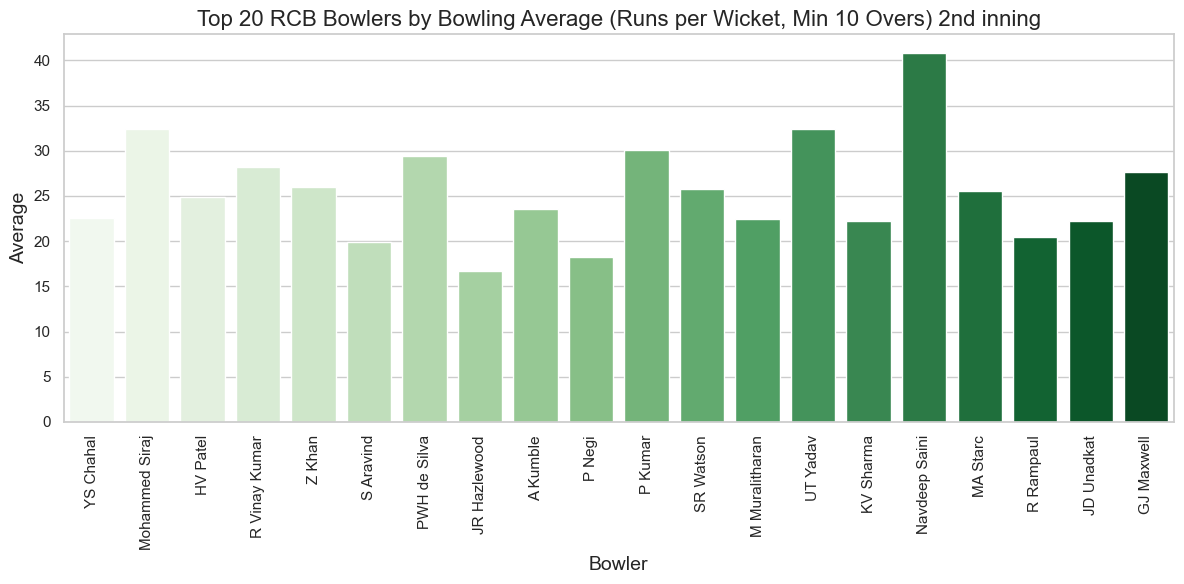

In [391]:
# Prepare for plotting
top_bowlers = bowler_stats_sorted.head(20).copy()
top_bowlers.reset_index(inplace=True)

# Plot Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# 🔹 Plot 1: Wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='Reds_r')
plt.title('Top 20 RCB Bowlers by Wickets (Min 10 Overs) in 2nd inning')
plt.ylabel('Wickets Taken')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: Economy Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='Blues_d')
plt.title('Top 20 RCB Bowlers by Economy Rate (Min 10 Overs) in 2nd inning')
plt.ylabel('Economy Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 3: Strike Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='strike_rate', data=top_bowlers, palette='Purples')
plt.title('Top 20 RCB Bowlers by Strike Rate (Balls per Wicket, Min 10 Overs) in 2nd inning')
plt.ylabel('Strike Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 4: Bowling Average
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='average', data=top_bowlers, palette='Greens')
plt.title('Top 20 RCB Bowlers by Bowling Average (Runs per Wicket, Min 10 Overs) 2nd inning')
plt.ylabel('Average')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [397]:
# Count wickets taken by each RCB bowler
rcb_wickets = bowling_2nd[bowling_2nd['is_wicket'] == 1].groupby('bowler').size().rename("wickets")

# Get the bowler with the most wickets
highest_wicket_taker = rcb_wickets.sort_values(ascending=False).reset_index()

# Display result
print(f"Highest Wicket Taker for RCB: {highest_wicket_taker['bowler'].iloc[0]} with {highest_wicket_taker['wickets'].iloc[0]} wickets in 2nd inning.")

Highest Wicket Taker for RCB: YS Chahal with 72 wickets in 2nd inning.


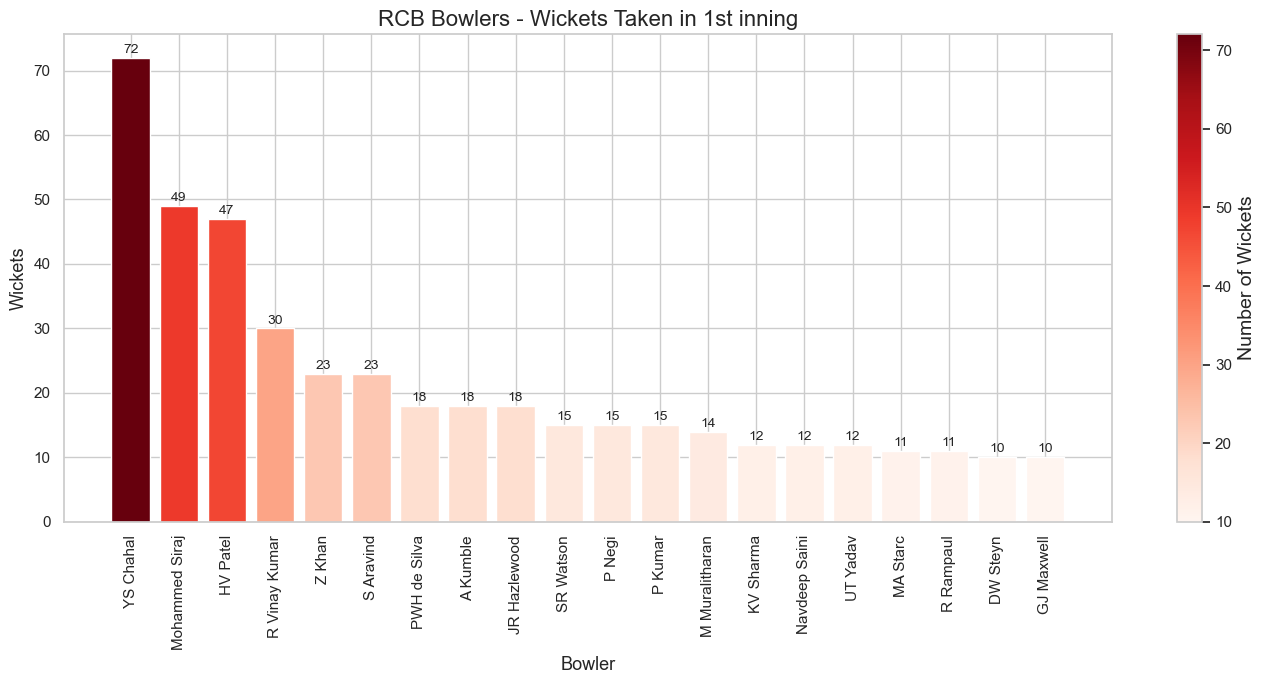

In [398]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = highest_wicket_taker.head(20)


# Normalize for color mapping
norm = Normalize(vmin=df_bowl_rcb['wickets'].min(), vmax=df_bowl_rcb['wickets'].max())
cmap = plt.cm.Reds  # Red gradient
colors = cmap(norm(df_bowl_rcb['wickets']))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(df_bowl_rcb['bowler'], df_bowl_rcb['wickets'], color=colors)

# Annotate each bar with wicket count
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

# Customize axes
ax.set_title('RCB Bowlers - Wickets Taken in 1st inning', fontsize=16)
ax.set_xlabel('Bowler', fontsize=13)
ax.set_ylabel('Wickets', fontsize=13)
plt.xticks(rotation=90)

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Wickets')

plt.tight_layout()
plt.show()

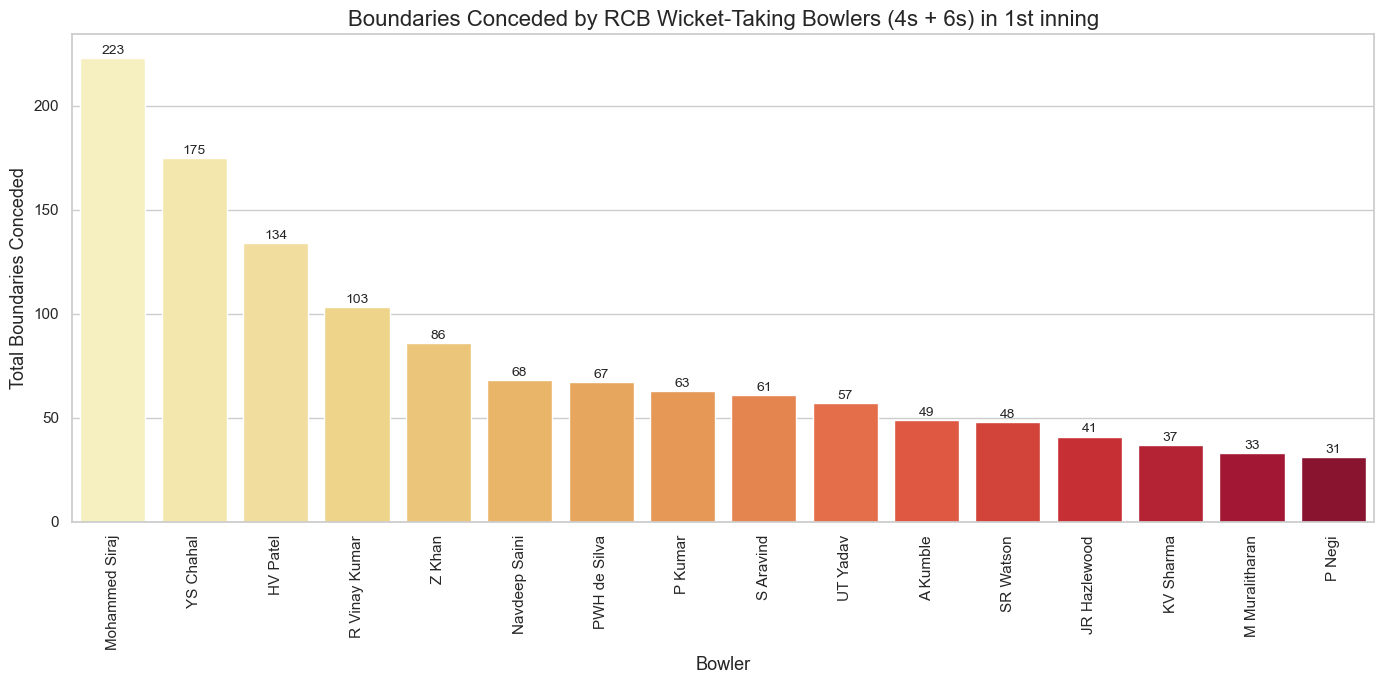

In [399]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = bowling_2nd

# Wickets taken by each bowler
wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Boundaries conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine into one DataFrame
bowler_stats = pd.concat([wickets, fours_conceded, sixes_conceded], axis=1).fillna(0)
bowler_stats = bowler_stats.astype({'wickets': int, 'fours_conceded': int, 'sixes_conceded': int})

# Filter only bowlers with at least 1 wicket
bowler_stats = bowler_stats[bowler_stats['wickets'] > 11]

# Calculate total boundaries conceded
bowler_stats['total_boundaries'] = bowler_stats['fours_conceded'] + bowler_stats['sixes_conceded']
bowler_stats = bowler_stats.sort_values('total_boundaries', ascending=False).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=bowler_stats, x='bowler', y='total_boundaries', palette='YlOrRd')

# Annotate each bar
for index, row in bowler_stats.iterrows():
    plt.text(index, row['total_boundaries'] + 0.5, f"{row['total_boundaries']}", 
             ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Boundaries Conceded by RCB Wicket-Taking Bowlers (4s + 6s) in 1st inning', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Total Boundaries Conceded', fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [400]:
# Filter only RCB bowlers
df_bowl_rcb = bowling_2nd

# Total balls bowled by each bowler (excluding extras like wides/no-balls if needed)
balls_bowled = df_bowl_rcb.groupby('bowler').size().rename('balls_bowled')

# Count of 4s and 6s conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine all into a single DataFrame
bowler_boundary_stats = pd.concat([balls_bowled, fours_conceded, sixes_conceded], axis=1).fillna(0)

# Ensure integer type
bowler_boundary_stats = bowler_boundary_stats.astype(int)

# Calculate balls per 4 and 6, avoid division by zero
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['fours_conceded'].replace(0, pd.NA)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['sixes_conceded'].replace(0, pd.NA)

# Convert columns to numeric (force coercion of bad values to NaN)
bowler_boundary_stats['balls_per_4'] = pd.to_numeric(bowler_boundary_stats['balls_per_4'], errors='coerce')
bowler_boundary_stats['balls_per_6'] = pd.to_numeric(bowler_boundary_stats['balls_per_6'], errors='coerce')

# Now safely round
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_per_4'].round(2)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_per_6'].round(2)


# Drop NaN if needed (optional)
bowler_boundary_stats.dropna(subset=['balls_per_4', 'balls_per_6'], how='all', inplace=True)

# Display top bowlers
bowler_boundary_stats.sort_values('balls_bowled', ascending=False).head(20)

balls_bowled  fours_conceded  sixes_conceded  balls_per_4  \
bowler                                                                         
YS Chahal                  1337             101              74        13.24   
Mohammed Siraj             1115             159              64         7.01   
HV Patel                    883              92              42         9.60   
R Vinay Kumar               598              73              30         8.19   
Z Khan                      459              71              15         6.46   
A Kumble                    393              36              13        10.92   
Navdeep Saini               389              50              18         7.78   
S Aravind                   367              46              15         7.98   
DW Steyn                    362              44              12         8.23   
PWH de Silva                356              28              39        12.71   
P Kumar                     349              46              17         7.59   
Washington Sundar           311              17              20        18.29   
SR Watson                   304              40               8         7.60   
UT Yadav                    277              38              19         7.29   
JH Kallis                   264              34               9         7.76   
M Muralitharan              262              20              13        13.10   
JR Hazlewood                247              31              10         7.97   
MA Starc                    238              30               3         7.93   
GJ Maxwell                  229              15              13        15.27   
DL Vettori                  215              13               5        16.54   

                   balls_per_6  
bowler                          
YS Chahal                18.07  
Mohammed Siraj           17.42  
HV Patel                 21.02  
R Vinay Kumar            19.93  
Z Khan                   30.60  
A Kumble                 30.23  
Navdeep Saini            21.61  
S Aravind                24.47  
DW Steyn                 30.17  
PWH de Silva              9.13  
P Kumar                  20.53  
Washington Sundar        15.55  
SR Watson                38.00  
UT Yadav                 14.58  
JH Kallis                29.33  
M Muralitharan           20.15  
JR Hazlewood             24.70  
MA Starc                 79.33  
GJ Maxwell               17.62  
DL Vettori               43.00

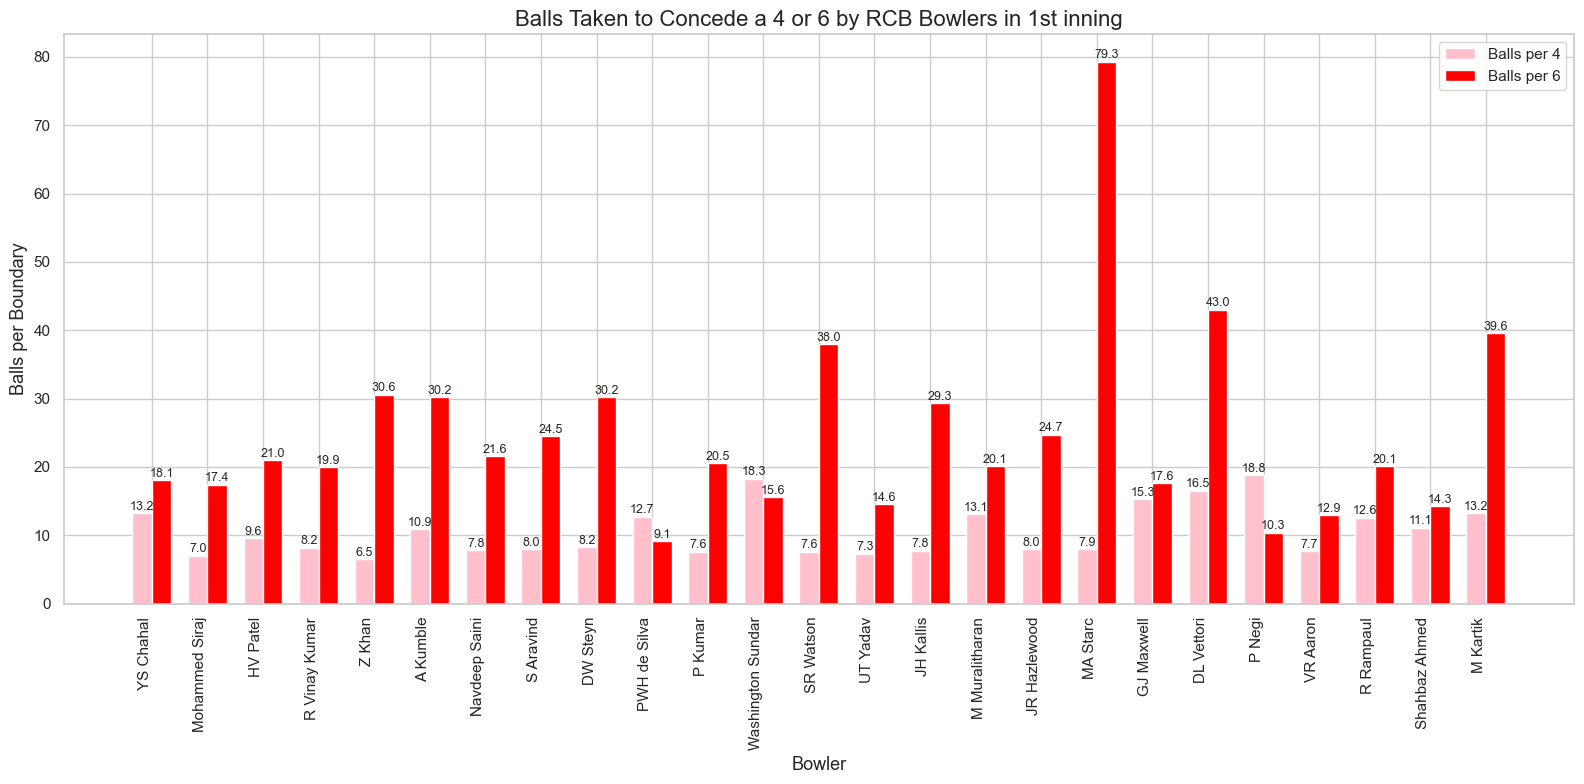

In [401]:
# Your original DataFrame
df = bowler_boundary_stats.copy()
df = df.sort_values('balls_bowled', ascending=False).head(25)

# Extract x-axis labels and data
bowlers = df.index.tolist()
x = np.arange(len(bowlers))  # the label locations
width = 0.35  # the width of the bars

# Initialize plot
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, df['balls_per_4'], width, label='Balls per 4', color='pink')
plt.bar(x + width/2, df['balls_per_6'], width, label='Balls per 6', color='red')

# Add value labels
for i in range(len(bowlers)):
    plt.text(x[i] - width/2, df['balls_per_4'].iloc[i] + 0.5, f"{df['balls_per_4'].iloc[i]:.1f}", 
             ha='center', fontsize=9)
    plt.text(x[i] + width/2, df['balls_per_6'].iloc[i] + 0.5, f"{df['balls_per_6'].iloc[i]:.1f}", 
             ha='center', fontsize=9)

# Customize axes and labels
plt.xticks(x, bowlers, rotation=90, ha='right')
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers in 1st inning', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

## Season 2025 EDA

In [18]:
df_2025.head()

id  season           city       date match_type  player_of_match  \
1095  161108    2025        Kolkata  3/22/2025     League    Krunal Pandya   
1096  161109    2025      Hyderabad  3/23/2025     League     Ishan Kishan   
1097  161110    2025        Chennai  3/23/2025     League       Noor Ahmad   
1098  161111    2025  Visakhapatnam  3/24/2025     League  Ashutosh Sharma   
1099  161112    2025      Ahmedabad  3/25/2025     League     Shreyas Iyer   

                                                 venue                  team1  \
1095                                      Eden Gardens  Kolkata Knight Riders   
1096                Rajiv Gandhi International Stadium    Sunrisers Hyderabad   
1097                            MA Chidambaram Stadium    Chennai Super Kings   
1098  Dr YS Rajasekhara Reddy ACA-VDCA Cricket Stadium         Delhi Capitals   
1099                             Narendra Modi Stadium         Gujarat Titans   

                            team2                  toss_winner toss_decision  \
1095  Royal Challengers Bengaluru  Royal Challengers Bengaluru         Field   
1096             Rajasthan Royals             Rajasthan Royals         Field   
1097               Mumbai Indians          Chennai Super Kings         Field   
1098         Lucknow Super Giants               Delhi Capitals         Field   
1099                 Punjab Kings               Gujarat Titans         Field   

                           winner   result  result_margin  target_runs  \
1095  Royal Challengers Bengaluru  Wickets            7.0        178.0   
1096          Sunrisers Hyderabad     Runs           44.0        287.0   
1097          Chennai Super Kings  Wickets            4.0        156.0   
1098               Delhi Capitals  Wickets            1.0        210.0   
1099                 Punjab Kings     Runs           11.0        244.0   

      target_overs super_over method                umpire1  \
1095          20.0          N    NaN           Vinod Seshan   
1096          20.0          N    NaN       Adrian Holdstock   
1097          20.0          N    NaN  Kn Ananthapadmanabhan   
1098          20.0          N    NaN           Ulhas Gandhe   
1099          20.0          N    NaN           Vinod Seshan   

                   umpire2  
1095      Abhijeet Bengeri  
1096          Akshay Totre  
1097         Khalid Saiyed  
1098  Abhijit Bhattacharya  
1099      Abhijeet Bengeri

In [29]:
# Number of matches played in 2025 

# Filter matches where RCB is either team1 or team2
rcb_matches = df_2025[(df_2025['team1'] == 'Royal Challengers Bengaluru') | (df_2025['team2'] == 'Royal Challengers Bengaluru')]

# Count matches played by RCB in each season
matches_per_season = rcb_matches.groupby('season').size().reset_index(name='matches_played')

# total number of matches played {2008-2025}
print(f'Total Number of matches played by rcb till 2008-2025 :-',matches_per_season['matches_played'].sum())
print('*'*100)
print('Season-Wise')
matches_per_season

Total Number of matches played by rcb till 2008-2025 :- 16
****************************************************************************************************
Season-Wise


season  matches_played
0    2025              16

In [23]:
# toss_winner and match_winner 
toss_won_match_won  = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['winner'] == 'Royal Challengers Bengaluru')].shape[0]
total_toss_won      = rcb_matches[rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru'].shape[0]
toss_won_match_loss = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total number of times when RCB won the toss',total_toss_won)
print(f'Number of times when RCB won the toss and match as well',toss_won_match_won)
print(f'Number of times when RCB won the toss but loss the match',toss_won_match_loss)

Total number of times when RCB won the toss 7
Number of times when RCB won the toss and match as well 6
Number of times when RCB won the toss but loss the match 1


In [30]:
# toss_loss and match_winner 
toss_loss_match_won  = rcb_matches[(rcb_matches['toss_winner'] != 'Royal Challengers Bengaluru') & (rcb_matches['winner'] == 'Royal Challengers Bengaluru')].shape[0]
total_toss_loss      = rcb_matches[rcb_matches['toss_winner'] != 'Royal Challengers Bengaluru'].shape[0]
toss_loss_match_loss = rcb_matches[(rcb_matches['toss_winner'] != 'Royal Challengers Bengaluru') & (rcb_matches['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total number of times RCB loss the toss',total_toss_loss)
print(f'Number of times when RCB loss the toss and match as well',toss_loss_match_loss)
print(f'Number of times when RCB loss the toss but won the match',toss_loss_match_won)

Total number of times RCB loss the toss 9
Number of times when RCB loss the toss and match as well 4
Number of times when RCB loss the toss but won the match 5


In [31]:
# let see how many times they won the toss on away stadium and home stadium
# Home
home_toss_win        = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium')].shape[0]
home_toss_match_win  = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium') & (rcb_matches['winner'] == 'Royal Challengers Bengaluru')].shape[0]
home_toss_match_loss = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium') & (rcb_matches['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total Number of toss won by RCB at their HOME ground in 2025 ',home_toss_win)
print(f'Number of times when RCB won the toss and match as well at their HOME ground in 2025 ',home_toss_match_win)
print(f'Number of times when RCB won the toss but lost the match at their HOME ground in 2025',home_toss_match_loss)

Total Number of toss won by RCB at their HOME ground in 2025  0
Number of times when RCB won the toss and match as well at their HOME ground in 2025  0
Number of times when RCB won the toss but lost the match at their HOME ground in 2025 0


In [32]:
# let see how many times they won the toss on away stadium and home stadium
# AWAY
away_toss_win        = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')].shape[0]
away_toss_match_win  = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium') & (rcb_matches['winner'] == 'Royal Challengers Bengaluru')].shape[0]
away_toss_match_loss = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium') & (rcb_matches['winner'] != 'Royal Challengers Bengaluru')].shape[0]

print(f'Total Number of toss won by RCB at their AWAY ground in 2025 ',away_toss_win)
print(f'Number of times when RCB won the toss and match as well at their AWAY ground in 2025 ',away_toss_match_win)
print(f'Number of times when RCB won the toss but lost the match at their AWAY ground in 2025',away_toss_match_loss)

Total Number of toss won by RCB at their AWAY ground in 2025  7
Number of times when RCB won the toss and match as well at their AWAY ground in 2025  6
Number of times when RCB won the toss but lost the match at their AWAY ground in 2025 1


In [60]:
# Toss Decision 2025 on home vs away stadiums
toss_decison_away = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')]['toss_decision'].value_counts()


print(f'When RCB is playing on AWAY ground they have choosen to field first',toss_decison_away[0],'times and choosen to bat first 0 times 2025.')
print(f'RCB did not won a single toss on their HOME ground in season 2025')

When RCB is playing on AWAY ground they have choosen to field first 7 times and choosen to bat first 0 times 2025.
RCB did not won a single toss on their HOME ground in season 2025


In [61]:
# lets see how much the toss_decision has help them(2025)
right_field_decision_home = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'field')].shape[0]
right_field_decision_away = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'field')].shape[0]
right_bat_decision_home = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'bat')].shape[0]
right_bat_decision_away = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')
            & (rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['toss_decision'] == 'bat')].shape[0]

print(f'Number of times batting first at HOME ground was right decision',right_bat_decision_home)
print(f'Number of times batting first at AWAY ground was right decision',right_bat_decision_away)
print(f'Number of times fielding first at HOME ground was right decision',right_field_decision_home)
print(f'Number of times fielding first at AWAY ground was right decision',right_field_decision_away)

Number of times batting first at HOME ground was right decision 0
Number of times batting first at AWAY ground was right decision 0
Number of times fielding first at HOME ground was right decision 0
Number of times fielding first at AWAY ground was right decision 0


In [63]:
# Toss Decision before 2025 on home vs away stadiums
toss_decison_home = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] == 'M Chinnaswamy Stadium')]['toss_decision'].value_counts()
toss_decison_away = rcb_matches[(rcb_matches['toss_winner'] == 'Royal Challengers Bengaluru') & (rcb_matches['venue'] != 'M Chinnaswamy Stadium')]['toss_decision'].value_counts()

print(f'When RCB is playing on their HOME ground they have choosen to field first',toss_decison_home,'times and choosen to bat first',toss_decison_home,'times in season 2025.')
print(f'When RCB is playing on AWAY ground they have choosen to field first',toss_decison_away[0],'times and choosen to bat first 0 times in season 2025.')

When RCB is playing on their HOME ground they have choosen to field first Series([], Name: count, dtype: int64) times and choosen to bat first Series([], Name: count, dtype: int64) times in season 2025.
When RCB is playing on AWAY ground they have choosen to field first 7 times and choosen to bat first 0 times in season 2025.


In [64]:
number_of_awards = rcb_matches[rcb_matches['winner'] == 'Royal Challengers Bengaluru'][['player_of_match']].value_counts()
df_player_of_match = pd.DataFrame(number_of_awards).reset_index()
df_player_of_match

player_of_match  count
0     Krunal Pandya      3
1     Rajat Patidar      2
2     Jitesh Sharma      1
3    Josh Hazlewood      1
4         Phil Salt      1
5  Romario Shepherd      1
6     Suyash Sharma      1
7       Virat Kohli      1

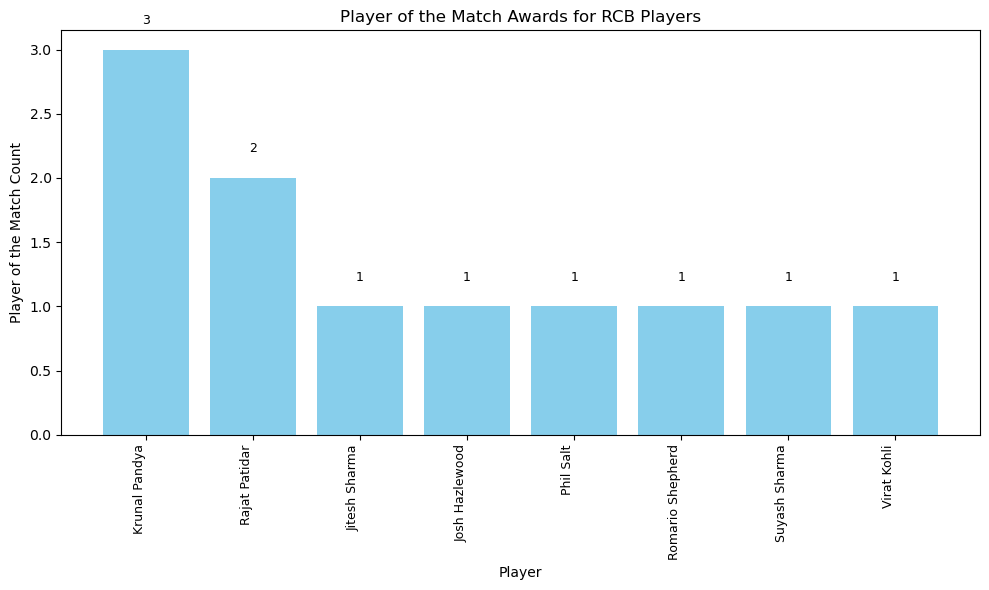

In [65]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_player_of_match["player_of_match"], df_player_of_match["count"], color='skyblue')

# Annotating each bar with the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f'{int(bar.get_height())}', ha='center', fontsize=9)

# Set labels and title
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.xlabel("Player")
plt.ylabel("Player of the Match Count")
plt.title("Player of the Match Awards for RCB Players", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
# player of the matches at the HOME 
number_of_awards_home = rcb_matches[(rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] == 'M Chinnaswamy Stadium')][['player_of_match']].value_counts()
df_player_of_match_home = pd.DataFrame(number_of_awards_home).reset_index()
df_player_of_match_home

player_of_match  count
0    Josh Hazlewood      1
1  Romario Shepherd      1

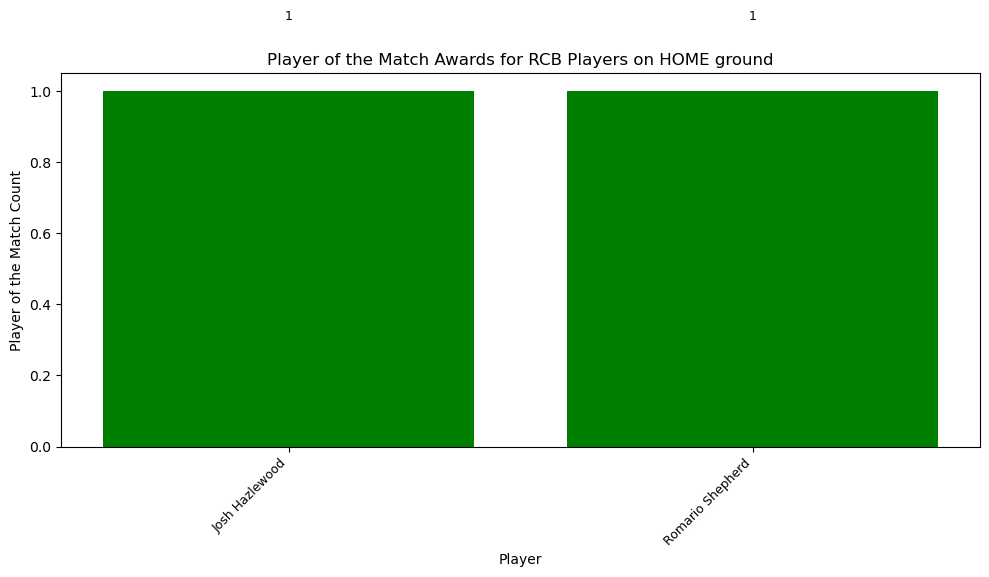

In [68]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_player_of_match_home["player_of_match"], df_player_of_match_home["count"], color='green')

# Annotating each bar with the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f'{int(bar.get_height())}', ha='center', fontsize=9)

# Set labels and title
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.xlabel("Player")
plt.ylabel("Player of the Match Count")
plt.title("Player of the Match Awards for RCB Players on HOME ground", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [67]:
# player of the match at away ground
number_of_awards_away = rcb_matches[(rcb_matches['winner'] == 'Royal Challengers Bengaluru') & (rcb['venue'] != 'M Chinnaswamy Stadium')][['player_of_match']].value_counts()
df_player_of_match_away = pd.DataFrame(number_of_awards_away).reset_index()
df_player_of_match_away

player_of_match  count
0   Krunal Pandya      3
1   Rajat Patidar      2
2   Jitesh Sharma      1
3       Phil Salt      1
4   Suyash Sharma      1
5     Virat Kohli      1

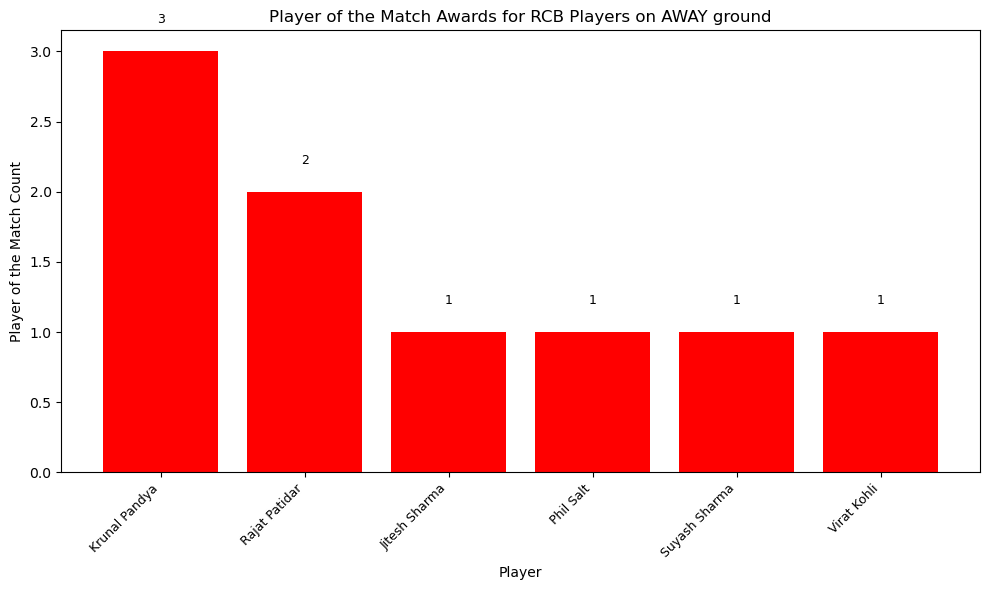

In [70]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_player_of_match_away["player_of_match"], df_player_of_match_away["count"], color='red')

# Annotating each bar with the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, 
             f'{int(bar.get_height())}', ha='center', fontsize=9)

# Set labels and title
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.xlabel("Player")
plt.ylabel("Player of the Match Count")
plt.title("Player of the Match Awards for RCB Players on AWAY ground", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [82]:
rcb_team_2025.head()

match_id  inning       date           batting_team  \
260920   1473438       1 2025-03-22  Kolkata Knight Riders   
260921   1473438       1 2025-03-22  Kolkata Knight Riders   
260922   1473438       1 2025-03-22  Kolkata Knight Riders   
260923   1473438       1 2025-03-22  Kolkata Knight Riders   
260924   1473438       1 2025-03-22  Kolkata Knight Riders   

                       bowling_team  over  ball_faced  ball     batter  \
260920  Royal Challengers Bengaluru     0           1     1  Q de Kock   
260921  Royal Challengers Bengaluru     0           1     2  Q de Kock   
260922  Royal Challengers Bengaluru     0           1     3  Q de Kock   
260923  Royal Challengers Bengaluru     0           1     4  Q de Kock   
260924  Royal Challengers Bengaluru     0           1     5  Q de Kock   

              bowler non_striker  batsman_runs  extra_runs  total_runs  \
260920  JR Hazlewood   SP Narine             0           0           0   
260921  JR Hazlewood   SP Narine             4           0           4   
260922  JR Hazlewood   SP Narine             4           0           0   
260923  JR Hazlewood   SP Narine             4           0           0   
260924  JR Hazlewood   SP Narine             4           0           0   

       extra_type  is_wicket player_dismissed dismissal_kind    fielder  \
260920        NaN          0              NaN            NaN        NaN   
260921        NaN          0              NaN            NaN        NaN   
260922        NaN          0              NaN            NaN        NaN   
260923        NaN          0              NaN            NaN        NaN   
260924        NaN          1        Q de Kock         caught  JM Sharma   

        season  
260920    2025  
260921    2025  
260922    2025  
260923    2025  
260924    2025

## Deleveries

In [83]:
batting_rcb_2025 = rcb_team_2025[rcb_team_2025['batting_team'] == 'Royal Challengers Bengaluru']

In [85]:
first_inning_record_2025  = batting_rcb_2025[batting_rcb_2025['inning'] == 1]
second_inning_record_2025 = batting_rcb_2025[batting_rcb_2025['inning'] == 2]

In [86]:
print(first_inning_record_2025.shape)
print(second_inning_record_2025.shape)

(973, 20)
(740, 20)


In [87]:
# inning scores of RCB in 2025  
scores_first_inning_2025  = first_inning_record_2025.groupby('match_id')[['total_runs']].sum()
scores_second_inning_2025 = second_inning_record_2025.groupby('match_id')[['total_runs']].sum()

In [88]:
scores_first_inning_2025.shape

(8, 1)

In [89]:
scores_second_inning_2025.shape

(7, 1)

<Axes: ylabel='total_runs'>

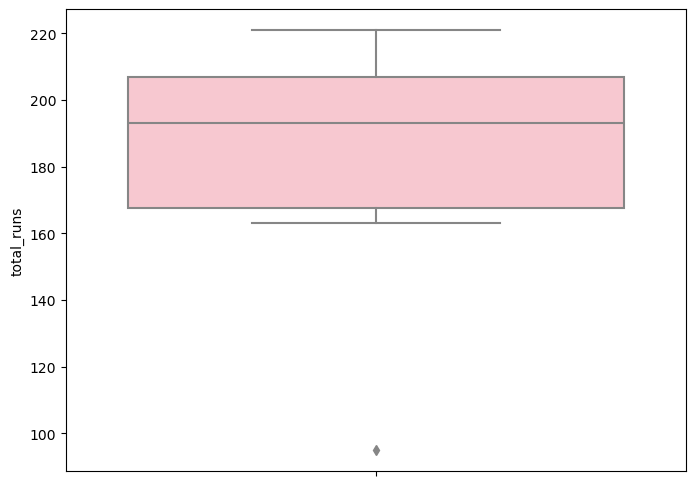

In [90]:
# lets search for outlier while batting first and second 

plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_first_inning_2025, y = "total_runs", color='pink',orient = 'x')

In [91]:
print('max_1st_inng -->',scores_first_inning_2025.max()[0])
print('min_1st_inng -->',scores_first_inning_2025.min()[0])

max_1st_inng --> 221
min_1st_inng --> 95


In [92]:
# remove the outlier's from the 1st inning scores 
Q1 = np.percentile(scores_first_inning_2025,25)
Q2 = np.percentile(scores_first_inning_2025,50)
Q3 = np.percentile(scores_first_inning_2025,75)

# IQR
IQR = Q3 - Q1

# calculating upper_bound and lower_bound 
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

In [93]:
print('Upper_bound is --->',upper_bound)
print('Lower_bound is --->',lower_bound)

Upper_bound is ---> 266.25
Lower_bound is ---> 108.25


In [94]:
# remove outliers from the dataset of 1st inning score 
scores_first_inning_2025 = scores_first_inning_2025[scores_first_inning_2025['total_runs'] < upper_bound]
scores_first_inning_2025 = scores_first_inning_2025[scores_first_inning_2025['total_runs'] > lower_bound]

<Axes: ylabel='total_runs'>

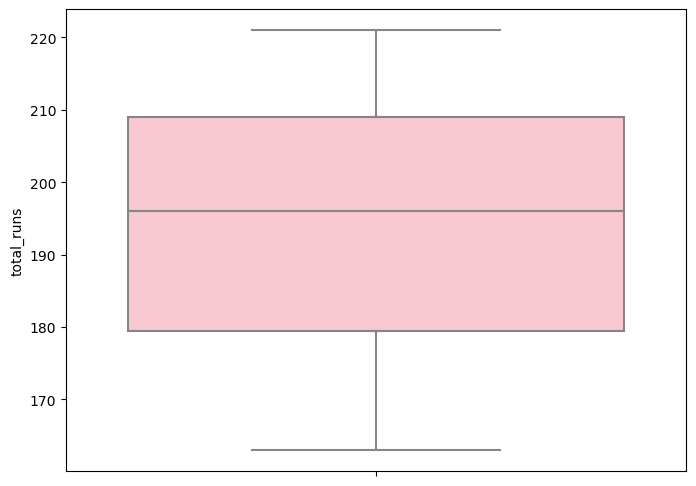

In [97]:
# let's see the boxplot as well
plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_first_inning_2025, y = "total_runs", color='pink',orient = 'x')

<Axes: ylabel='total_runs'>

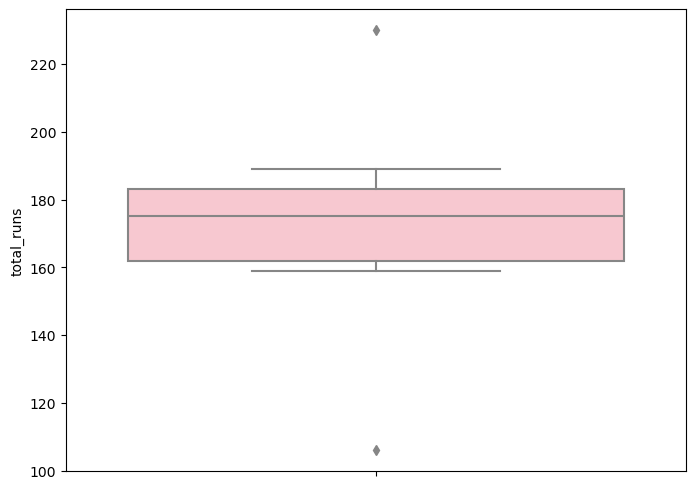

In [99]:
# let's see the boxplot as well for 2nd inning in 2025
plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_second_inning_2025, y = "total_runs", color='pink',orient = 'x')

In [100]:
print('max_2nd_inng -->',scores_second_inning_2025.max()[0])
print('min_2nd_inng -->',scores_second_inning_2025.min()[0])

max_2nd_inng --> 230
min_2nd_inng --> 106


In [101]:
# remove the outlier's from the 1st inning scores 
Q1 = np.percentile(scores_second_inning_2025,25)
Q2 = np.percentile(scores_second_inning_2025,50)
Q3 = np.percentile(scores_second_inning_2025,75)

# IQR
IQR = Q3 - Q1

# calculating upper_bound and lower_bound 
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

In [102]:
print('Upper_bound is --->',upper_bound)
print('Lower_bound is --->',lower_bound)

Upper_bound is ---> 214.5
Lower_bound is ---> 130.5


In [103]:
# remove outliers from the dataset of 1st inning score 
scores_first_inning_2025 = scores_first_inning_2025[scores_first_inning_2025['total_runs'] < upper_bound]
scores_first_inning_2025 = scores_first_inning_2025[scores_first_inning_2025['total_runs'] > lower_bound]

<Axes: ylabel='total_runs'>

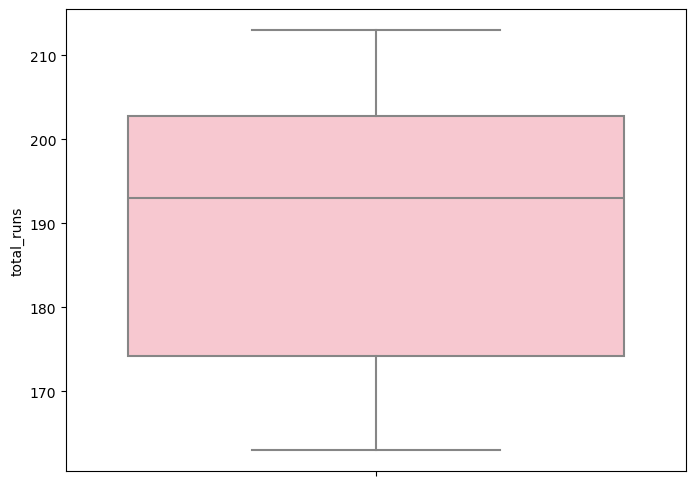

In [104]:
# let's see the boxplot as well
plt.figure(figsize=(8, 6))
sns.boxplot(data = scores_first_inning_2025, y = "total_runs", color='pink',orient = 'x')

In [105]:
# Lets see the mean and median for total runs as a team in 2025 
first_inning_mean     = scores_first_inning_2025.mean()
second_inning_mean    = scores_second_inning_2025.mean()
first_inning_median   = scores_first_inning_2025.median()
second_inning_median  = scores_second_inning_2025.median()

In [107]:
print('first_inning Mean --->',first_inning_mean[0])
print('first_inning Median --->',first_inning_median[0])

first_inning Mean ---> 189.33333333333334
first_inning Median ---> 193.0


In [108]:
print('second_inning Mean --->',second_inning_mean[0])
print('second_inning Median --->',second_inning_median[0])

second_inning Mean ---> 171.57142857142858
second_inning Median ---> 175.0


<Axes: ylabel='Density'>

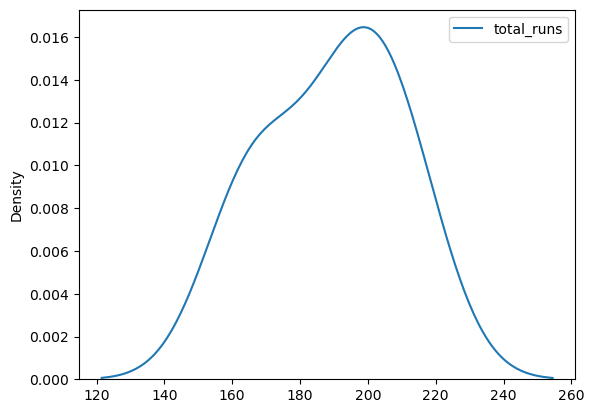

In [110]:
# since mean and median is almost similar for both the innings lets see if they follow normal dist
sns.kdeplot(scores_first_inning_2025)

In [113]:
from scipy.stats import norm

# Step 1: Calculate mean and std
mean_runs = scores_first_inning_2025.mean()
std_runs  = scores_first_inning_2025.std()

# Step 2: Z-score for 170
z_score = (170 - mean_runs) / std_runs  # This will be a float, not a Series
prob_gt_200 = 1 - norm.cdf(z_score[0])

print(f"Z-score for 200 runs: {z_score[0]:.2f}")
print(f"Probability of scoring more than 170: {prob_gt_200:.2%}")

Z-score for 200 runs: -0.98
Probability of scoring more than 170: 83.58%


<Axes: ylabel='Density'>

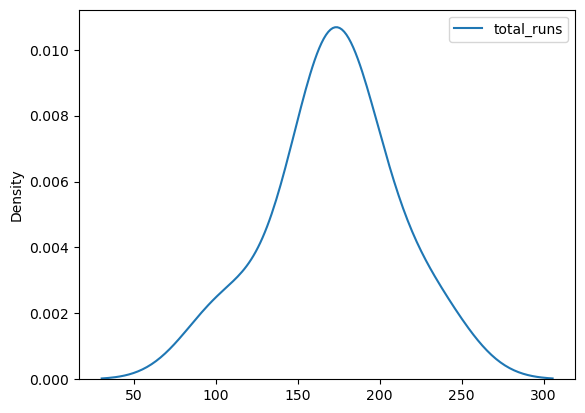

In [114]:
# since mean and median is almost similar for both the innings lets see if they follow normal dist
sns.kdeplot(scores_second_inning_2025)

In [115]:
# from the visualization point of view we can say that they follow the normal-dist but to be sure let's perform shapiro wilk test
from scipy.stats import shapiro

In [116]:
# Perform Shapiro-Wilk test on first inning scores data
stat, p_value = shapiro(scores_first_inning_2025)

# Output the results
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis: Data is normally distributed.")
else:
    print("Reject the null hypothesis: Data is not normally distributed.")

Test Statistic: 0.9352
P-value: 0.6206
Fail to reject the null hypothesis: Data is normally distributed.


In [117]:
# Perform Shapiro-Wilk test on second inning scores data
stat, p_value = shapiro(scores_second_inning_2025)

# Output the results
print(f"Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value > alpha:
    print("Fail to reject the null hypothesis: Data is normally distributed.")
else:
    print("Reject the null hypothesis: Data is not normally distributed.")

Test Statistic: 0.9386
P-value: 0.6263
Fail to reject the null hypothesis: Data is normally distributed.


## Batsman Analysis 2025

In [118]:
# shape of data before outlier filteration
print(first_inning_record_2025.shape)
print(second_inning_record_2025.shape)

(973, 20)
(740, 20)


In [119]:
df_1st_inn = first_inning_record_2025[first_inning_record_2025['match_id'].isin(scores_first_inning_2025.index)]
df_2nd_inn = second_inning_record_2025[second_inning_record_2025['match_id'].isin(scores_second_inning_2025.index)]

In [120]:
def label_batting_role(df):
    """
    Adds a new column 'batting_role' to the DataFrame based on the order 
    a batsman comes to bat in each match.
    
    Role Mapping:
    1-3   -> Top-order
    4-6   -> Middle-order
    6-7   -> Finisher
    >7    -> Tailender
    """
    # Get the batting order per match
    df['batting_position'] = (
        df.groupby(['match_id', 'batter']).cumcount() == 0  # first ball faced by batter
    ).groupby([df['match_id'], df['batter']]).transform('idxmax')  # find index of first appearance

    # Get the order number in which each batter appeared
    df['bat_order'] = df.groupby('match_id')['batter'].transform(
        lambda x: pd.factorize(x)[0] + 1
    )

    # Label roles based on bat_order
    def get_role(pos):
        if pos <= 3:
            return 'Top-order'
        elif pos <= 6:
            return 'Middle-order'
        elif pos <= 7:
            return 'Finisher'
        else:
            return 'Tailender'

    df['batting_role'] = df['bat_order'].apply(get_role)

    return df

In [123]:
df_with_roles = label_batting_role(df_1st_inn)
df_with_roles.head(5)

match_id  inning       date                 batting_team  \
262615   1473445       1 2025-03-28  Royal Challengers Bengaluru   
262616   1473445       1 2025-03-28  Royal Challengers Bengaluru   
262617   1473445       1 2025-03-28  Royal Challengers Bengaluru   
262618   1473445       1 2025-03-28  Royal Challengers Bengaluru   
262619   1473445       1 2025-03-28  Royal Challengers Bengaluru   

               bowling_team  over  ball_faced  ball   batter    bowler  ...  \
262615  Chennai Super Kings     0           1     1  PD Salt  KK Ahmed  ...   
262616  Chennai Super Kings     0           1     2  PD Salt  KK Ahmed  ...   
262617  Chennai Super Kings     0           1     3  PD Salt  KK Ahmed  ...   
262618  Chennai Super Kings     0           1     4  PD Salt  KK Ahmed  ...   
262619  Chennai Super Kings     0           1     5  PD Salt  KK Ahmed  ...   

       total_runs  extra_type  is_wicket  player_dismissed dismissal_kind  \
262615          0         NaN          0               NaN            NaN   
262616          0         NaN          0               NaN            NaN   
262617          0         NaN          0               NaN            NaN   
262618          4         NaN          0               NaN            NaN   
262619          4         NaN          0               NaN            NaN   

        fielder season batting_position bat_order  batting_role  
262615      NaN   2025           262615         1     Top-order  
262616      NaN   2025           262615         1     Top-order  
262617      NaN   2025           262615         1     Top-order  
262618      NaN   2025           262615         1     Top-order  
262619      NaN   2025           262615         1     Top-order  

[5 rows x 23 columns]

In [124]:
df_with_roles2 = label_batting_role(df_2nd_inn)
df_with_roles2.head(5)

match_id  inning       date                 batting_team  \
261044   1473438       2 2025-03-22  Royal Challengers Bengaluru   
261045   1473438       2 2025-03-22  Royal Challengers Bengaluru   
261046   1473438       2 2025-03-22  Royal Challengers Bengaluru   
261047   1473438       2 2025-03-22  Royal Challengers Bengaluru   
261048   1473438       2 2025-03-22  Royal Challengers Bengaluru   

                 bowling_team  over  ball_faced  ball   batter    bowler  ...  \
261044  Kolkata Knight Riders     0           1     1  PD Salt  VG Arora  ...   
261045  Kolkata Knight Riders     0           1     2  PD Salt  VG Arora  ...   
261046  Kolkata Knight Riders     0           1     2  PD Salt  VG Arora  ...   
261047  Kolkata Knight Riders     0           1     3  PD Salt  VG Arora  ...   
261048  Kolkata Knight Riders     0           1     4  PD Salt  VG Arora  ...   

       total_runs  extra_type  is_wicket  player_dismissed dismissal_kind  \
261044          4         NaN          0               NaN            NaN   
261045          1       wides          0               NaN            NaN   
261046          0         NaN          0               NaN            NaN   
261047          0         NaN          0               NaN            NaN   
261048          1         NaN          0               NaN            NaN   

        fielder season batting_position bat_order  batting_role  
261044      NaN   2025           261044         1     Top-order  
261045      NaN   2025           261044         1     Top-order  
261046      NaN   2025           261044         1     Top-order  
261047      NaN   2025           261044         1     Top-order  
261048      NaN   2025           261044         1     Top-order  

[5 rows x 23 columns]

In [128]:
# first inning avg score for rcb in season 2025
scores_1st = df_1st_inn.groupby('match_id')['total_runs'].sum()
m1 = scores_1st.mean()
print(f"While batting first RCB avg score used to be {int(np.round(m1))} in season 2025")

While batting first RCB avg score used to be 189 in season 2025


In [127]:
# second inning avg score for rcb in season 2025
scores_2nd = df_2nd_inn.groupby('match_id')['total_runs'].sum()
m2 = scores_2nd.mean()
print(f"While batting first RCB avg score used to be {int(np.round(m2))} in season 2025")

While batting first RCB avg score used to be 172 in season 2025


In [129]:
total_runs_1st = df_1st_inn.groupby(['match_id','batter'])[['total_runs','ball_faced']].sum()
total_runs_2nd = df_2nd_inn.groupby(['match_id','batter'])[['total_runs','ball_faced']].sum()

In [130]:
total_runs_1st['Strike_rate'] = np.round((total_runs_1st['total_runs'].values / total_runs_1st['ball_faced'].values) * 100,2)
total_runs_2nd['Strike_rate'] = np.round((total_runs_2nd['total_runs'].values / total_runs_2nd['ball_faced'].values) * 100,2)

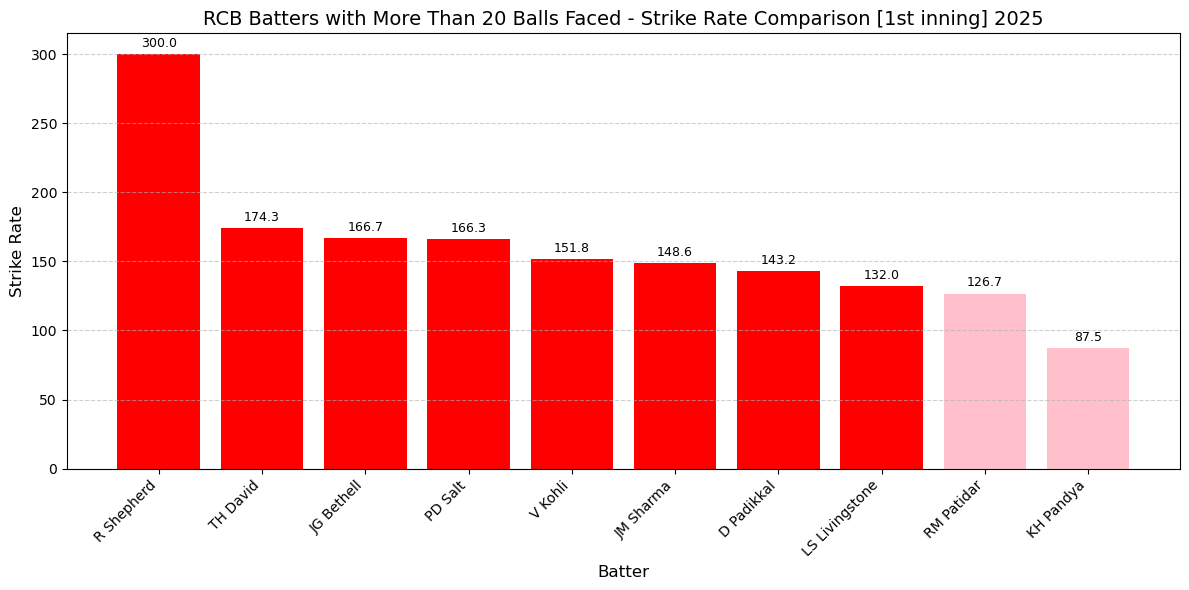

In [146]:
df_reset = total_runs_1st.reset_index()

# Step 1: Reset index and group by batter
batter_summary = df_reset.groupby('batter').agg({
    'total_runs': 'sum',
    'ball_faced': 'sum'
}).reset_index()

# Step 2: Calculate strike rate
batter_summary['Strike_rate'] = (batter_summary['total_runs'] / batter_summary['ball_faced']) * 100

# Step 3: Filter batters with minimum 150 balls faced
filtered = batter_summary[batter_summary['ball_faced'] > 20]

# Step 4: Sort by strike rate (optional)
filtered = filtered.sort_values(by='Strike_rate', ascending=False)

# Step 5: Set colors based on strike rate
colors = ['red' if sr > 130 else 'pink' for sr in filtered['Strike_rate']]

# Step 6: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered['batter'], filtered['Strike_rate'], color=colors)

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Styling
plt.title('RCB Batters with More Than 20 Balls Faced - Strike Rate Comparison [1st inning] 2025', fontsize=14)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

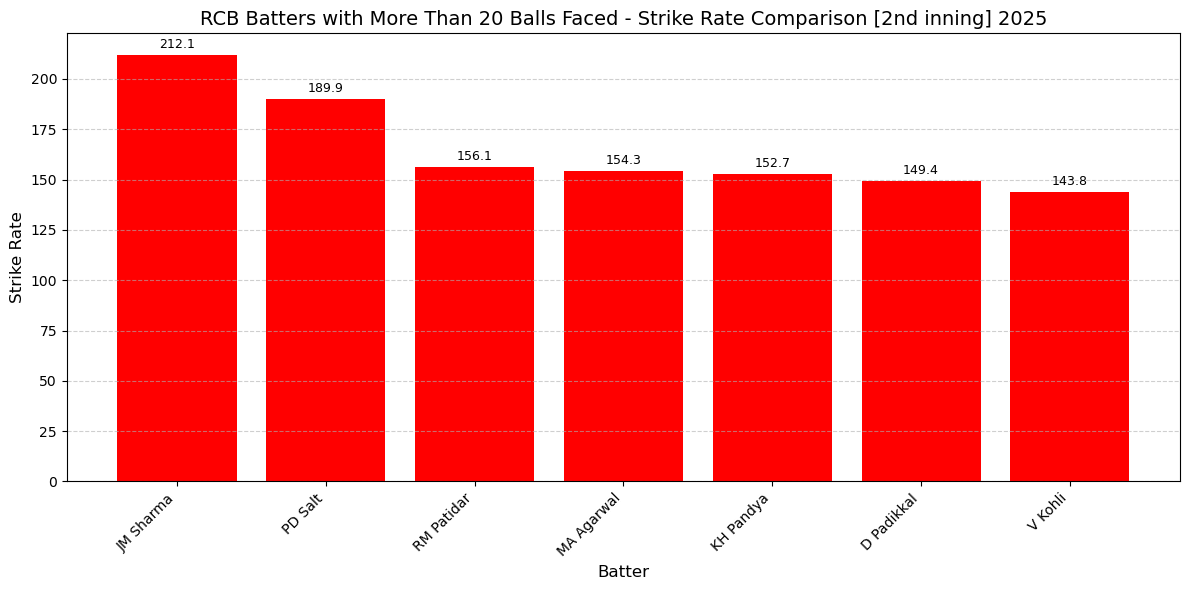

In [145]:
df_reset = total_runs_2nd.reset_index()

# Step 1: Reset index and group by batter
batter_summary = df_reset.groupby('batter').agg({
    'total_runs': 'sum',
    'ball_faced': 'sum'
}).reset_index()

# Step 2: Calculate strike rate
batter_summary['Strike_rate'] = (batter_summary['total_runs'] / batter_summary['ball_faced']) * 100

# Step 3: Filter batters with minimum 150 balls faced
filtered = batter_summary[batter_summary['ball_faced'] > 20]

# Step 4: Sort by strike rate (optional)
filtered = filtered.sort_values(by='Strike_rate', ascending=False)

# Step 5: Set colors based on strike rate
colors = ['red' if sr > 130 else 'pink' for sr in filtered['Strike_rate']]

# Step 6: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered['batter'], filtered['Strike_rate'], color=colors)

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

# Styling
plt.title('RCB Batters with More Than 20 Balls Faced - Strike Rate Comparison [2nd inning] 2025', fontsize=14)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [137]:
# Count number of 4s by each batter
fours = df_1st_inn[df_1st_inn['total_runs'] == 4].groupby('batter').size().reset_index(name='4s')

# Count number of 6s by each batter
sixes = df_1st_inn[df_1st_inn['total_runs'] == 6].groupby('batter').size().reset_index(name='6s')

# Merge both counts
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)

# Optional: convert to int
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Display
print(boundaries.sort_values(by=['4s', '6s'], ascending=False).head(20))

            batter  4s  6s
10         V Kohli  21  10
6          PD Salt  15   6
2        JM Sharma  13   4
8       RM Patidar   9   6
9         TH David   8  10
0       D Padikkal   8   6
1       JG Bethell   8   2
7       R Shepherd   5   6
5       MA Agarwal   2   1
3        KH Pandya   2   0
4   LS Livingstone   1   8


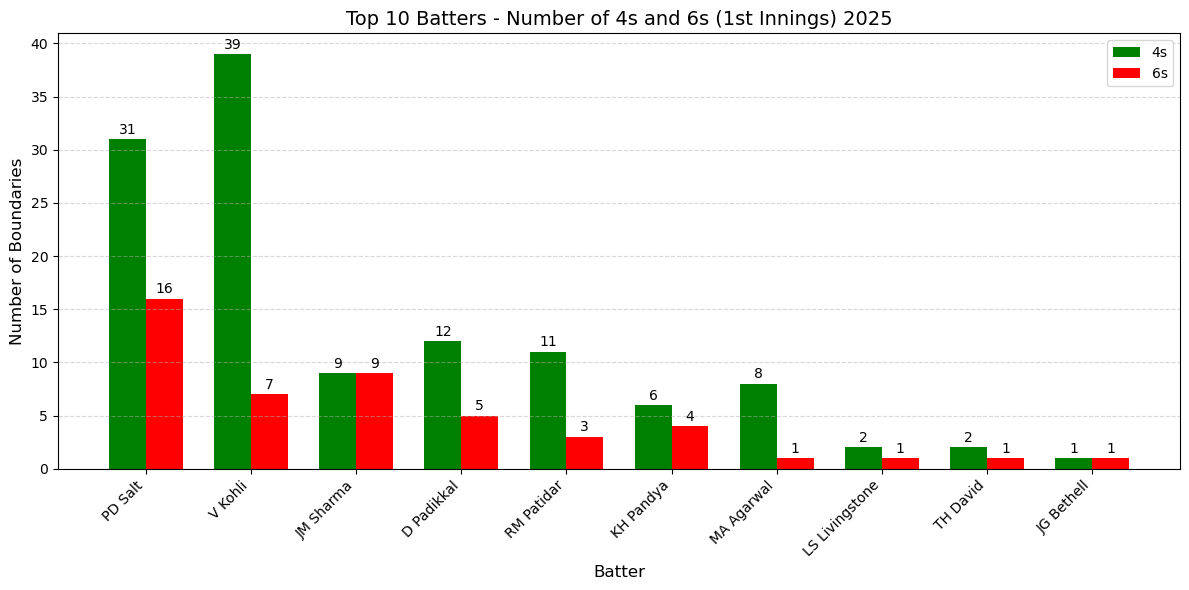

In [144]:
# Merge both
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Sort by total boundaries (optional)
boundaries['total'] = boundaries['4s'] + boundaries['6s']
boundaries = boundaries.sort_values(by='total', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(boundaries))

plt.bar(x, boundaries['4s'], width=bar_width, label='4s', color='green')
plt.bar([i + bar_width for i in x], boundaries['6s'], width=bar_width, label='6s', color='red')

# X-axis labels
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Number of Boundaries", fontsize=12)
plt.title("Top 10 Batters - Number of 4s and 6s (1st Innings) 2025", fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], boundaries['batter'], rotation=45, ha='right')

# Add value annotations
for i in x:
    plt.text(i, boundaries['4s'].iloc[i] + 0.5, str(boundaries['4s'].iloc[i]), ha='center')
    plt.text(i + bar_width, boundaries['6s'].iloc[i] + 0.5, str(boundaries['6s'].iloc[i]), ha='center')

plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [139]:
# Count number of 4s by each batter
fours = df_2nd_inn[df_2nd_inn['total_runs'] == 4].groupby('batter').size().reset_index(name='4s')

# Count number of 6s by each batter
sixes = df_2nd_inn[df_2nd_inn['total_runs'] == 6].groupby('batter').size().reset_index(name='6s')

# Merge both counts
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)

# Optional: convert to int
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Display
print(boundaries.sort_values(by=['4s', '6s'], ascending=False).head(20))

           batter  4s  6s
9         V Kohli  39   7
6         PD Salt  31  16
0      D Padikkal  12   5
7      RM Patidar  11   3
2       JM Sharma   9   9
5      MA Agarwal   8   1
3       KH Pandya   6   4
4  LS Livingstone   2   1
8        TH David   2   1
1      JG Bethell   1   1


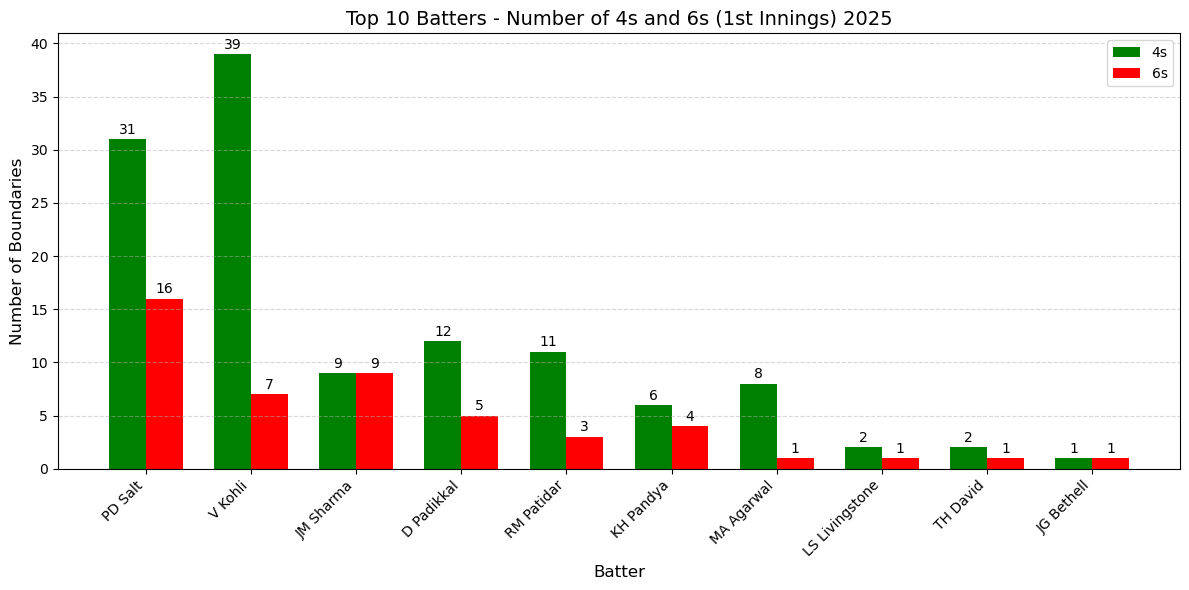

In [143]:
# Merge both
boundaries = pd.merge(fours, sixes, on='batter', how='outer').fillna(0)
boundaries['4s'] = boundaries['4s'].astype(int)
boundaries['6s'] = boundaries['6s'].astype(int)

# Sort by total boundaries (optional)
boundaries['total'] = boundaries['4s'] + boundaries['6s']
boundaries = boundaries.sort_values(by='total', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(boundaries))

plt.bar(x, boundaries['4s'], width=bar_width, label='4s', color='green')
plt.bar([i + bar_width for i in x], boundaries['6s'], width=bar_width, label='6s', color='red')

# X-axis labels
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Number of Boundaries", fontsize=12)
plt.title("Top 10 Batters - Number of 4s and 6s (1st Innings) 2025", fontsize=14)
plt.xticks([i + bar_width / 2 for i in x], boundaries['batter'], rotation=45, ha='right')

# Add value annotations
for i in x:
    plt.text(i, boundaries['4s'].iloc[i] + 0.5, str(boundaries['4s'].iloc[i]), ha='center')
    plt.text(i + bar_width, boundaries['6s'].iloc[i] + 0.5, str(boundaries['6s'].iloc[i]), ha='center')

plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

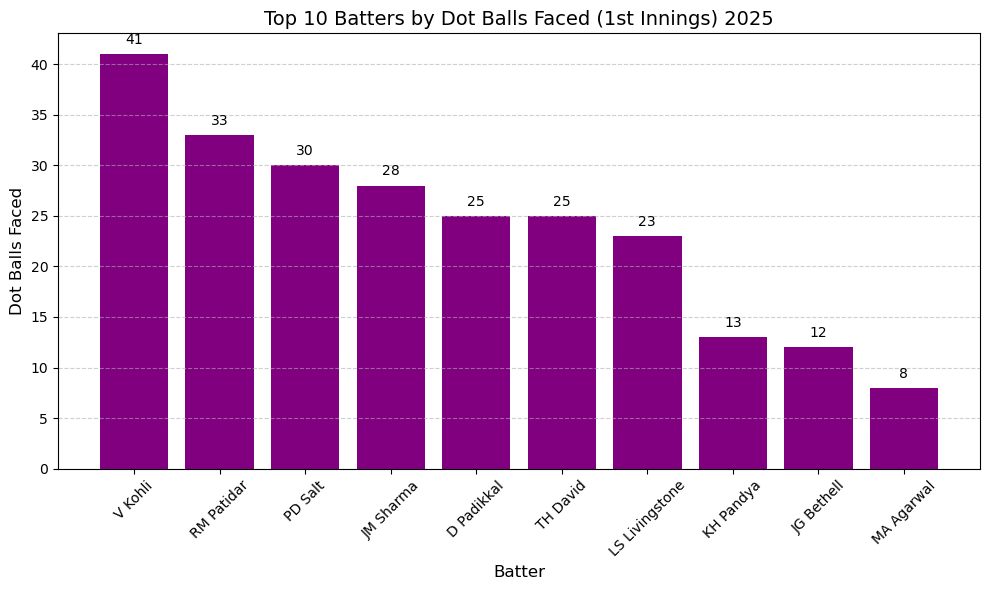

In [142]:
# Step 1: Filter dot balls (total_runs == 0)
dot_balls = df_1st_inn[df_1st_inn['total_runs'] == 0]

# Step 2: Count dot balls per batter
dots_per_batter = dot_balls.groupby('batter').size().reset_index(name='dot_balls')

# Step 3: Sort and take top 10 (optional)
dots_top = dots_per_batter.sort_values(by='dot_balls', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(dots_top['batter'], dots_top['dot_balls'], color='purple')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customizing the plot
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Dot Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Dot Balls Faced (1st Innings) 2025", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

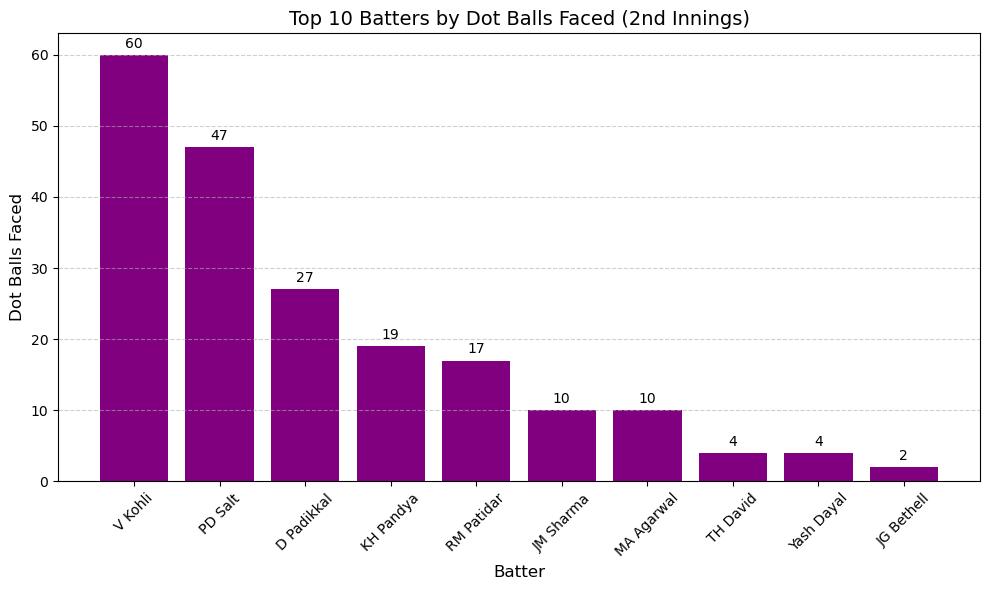

In [147]:
# Step 1: Filter dot balls (total_runs == 0)
dot_balls = df_2nd_inn[df_2nd_inn['total_runs'] == 0]

# Step 2: Count dot balls per batter
dots_per_batter = dot_balls.groupby('batter').size().reset_index(name='dot_balls')

# Step 3: Sort and take top 10 (optional)
dots_top = dots_per_batter.sort_values(by='dot_balls', ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(dots_top['batter'], dots_top['dot_balls'], color='purple')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customizing the plot
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Dot Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Dot Balls Faced (2nd Innings)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

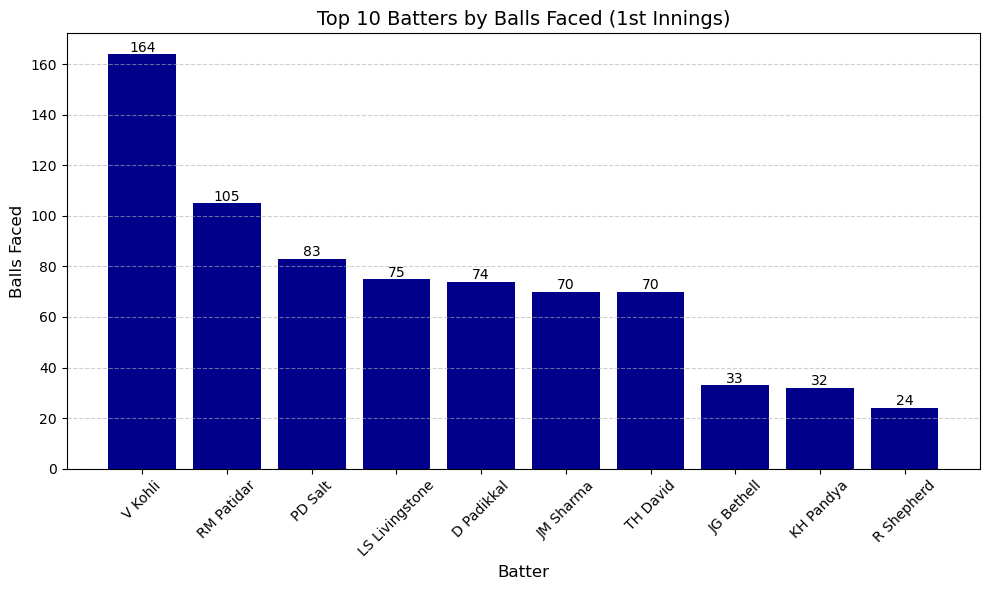

In [148]:
# Step 1: Count number of balls faced per batter
balls_faced = df_1st_inn.groupby('batter').size().reset_index(name='balls_faced')

# Step 2: Sort and select top 10 (optional)
balls_top = balls_faced.sort_values(by='balls_faced', ascending=False).head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(balls_top['batter'], balls_top['balls_faced'], color='darkblue')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customize chart
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Balls Faced (1st Innings) 2025", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

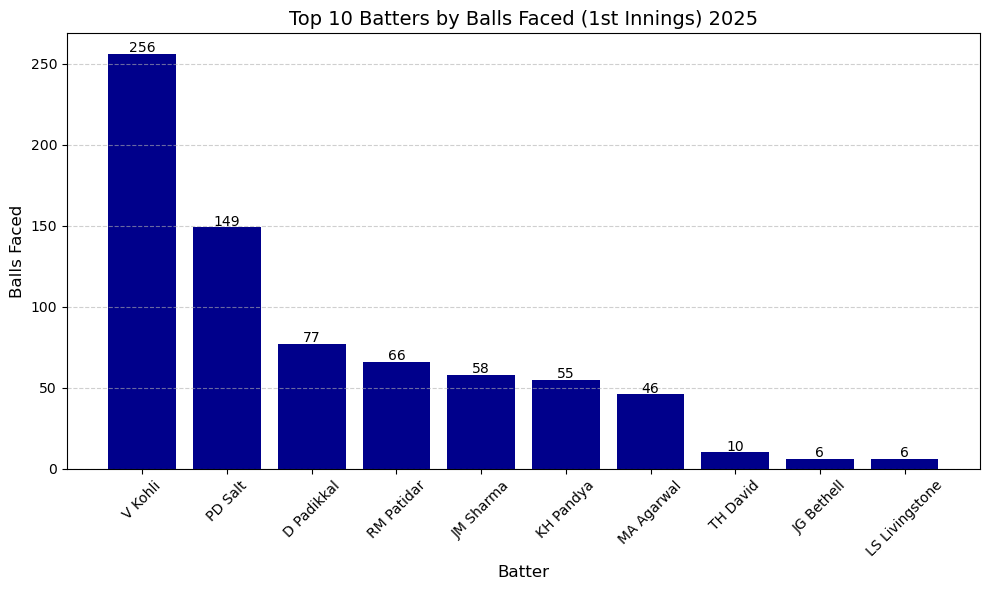

In [149]:
# Step 1: Count number of balls faced per batter
balls_faced = df_2nd_inn.groupby('batter').size().reset_index(name='balls_faced')

# Step 2: Sort and select top 10 (optional)
balls_top = balls_faced.sort_values(by='balls_faced', ascending=False).head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(balls_top['batter'], balls_top['balls_faced'], color='darkblue')

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(int(bar.get_height())), ha='center', fontsize=10)

# Customize chart
plt.xlabel("Batter", fontsize=12)
plt.ylabel("Balls Faced", fontsize=12)
plt.title("Top 10 Batters by Balls Faced (1st Innings) 2025", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [167]:
# Count total balls faced by each batter
balls_faced = df_1st_inn.groupby('batter').size().rename('balls_faced')

# Count dot balls
dots = df_1st_inn[df_1st_inn['total_runs'] == 0].groupby('batter').size().rename('dots')

# Count 4s
fours = df_1st_inn[df_1st_inn['total_runs'] == 4].groupby('batter').size().rename('fours')

# Count 6s
sixes = df_1st_inn[df_1st_inn['total_runs'] == 6].groupby('batter').size().rename('sixes')

# Combine all
batter_stats = pd.concat([balls_faced, dots, fours, sixes], axis=1).fillna(0)
batter_stats = batter_stats.astype(int)

# Calculated metrics
batter_stats['dot_percent'] = (batter_stats['dots'] / batter_stats['balls_faced']) * 100
batter_stats['balls_per_4'] = batter_stats['balls_faced'] / batter_stats['fours'].replace(0, pd.NA)
batter_stats['balls_per_6'] = batter_stats['balls_faced'] / batter_stats['sixes'].replace(0, pd.NA)

# Ensure all are numeric
for col in ['dot_percent', 'balls_per_4', 'balls_per_6']:
    batter_stats[col] = pd.to_numeric(batter_stats[col], errors='coerce')

# Replace inf and drop NaNs
batter_stats.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
batter_stats.dropna(subset=['balls_per_4', 'balls_per_6'], inplace=True)

# Round safely
batter_stats['dot_percent'] = batter_stats['dot_percent'].round(2)
batter_stats['balls_per_4'] = batter_stats['balls_per_4'].round(2)
batter_stats['balls_per_6'] = batter_stats['balls_per_6'].round(2)

# View top batters
batter_stats.sort_values('balls_faced', ascending=False).head(20)

balls_faced  dots  fours  sixes  dot_percent  balls_per_4  \
batter                                                                      
V Kohli                 164    41     21     10        25.00         7.81   
RM Patidar              105    33      9      6        31.43        11.67   
PD Salt                  83    30     15      6        36.14         5.53   
LS Livingstone           75    23      1      8        30.67        75.00   
D Padikkal               74    25      8      6        33.78         9.25   
JM Sharma                70    28     13      4        40.00         5.38   
TH David                 70    25      8     10        35.71         8.75   
JG Bethell               33    12      8      2        36.36         4.12   
R Shepherd               24     4      5      6        16.67         4.80   
MA Agarwal               19     8      2      1        42.11         9.50   

                balls_per_6  
batter                       
V Kohli               16.40  
RM Patidar            17.50  
PD Salt               13.83  
LS Livingstone         9.38  
D Padikkal            12.33  
JM Sharma             17.50  
TH David               7.00  
JG Bethell            16.50  
R Shepherd             4.00  
MA Agarwal            19.00

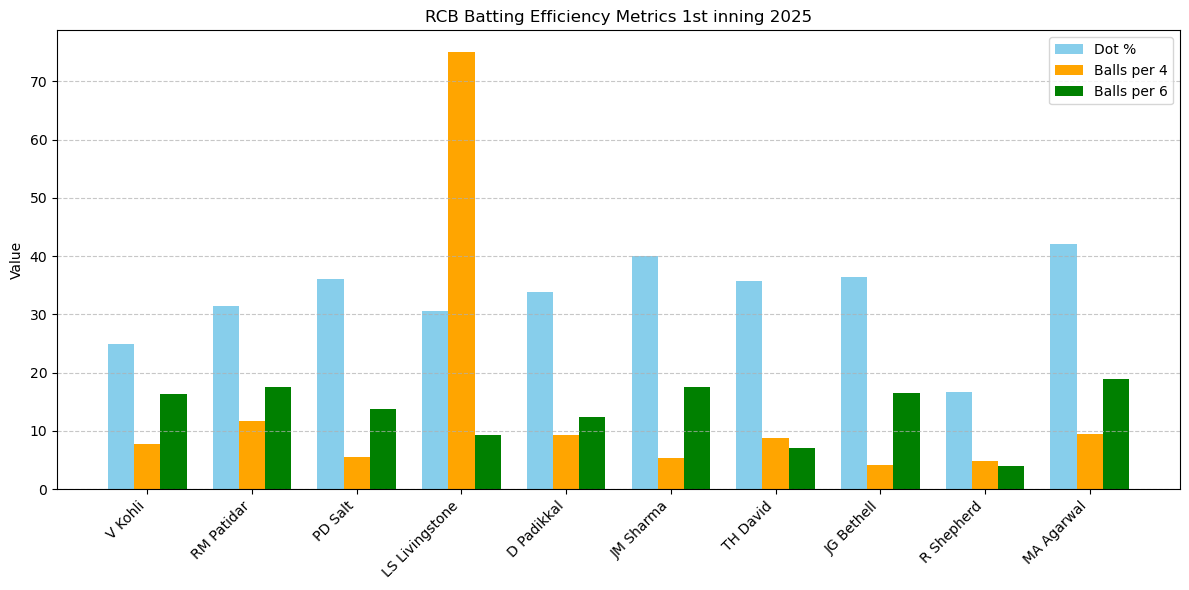

In [168]:
# Select top 10 batters by balls faced
top_batters = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(top_batters))
width = 0.25

# Bars
ax.bar([i - width for i in x], top_batters['dot_percent'], width=width, label='Dot %', color='skyblue')
ax.bar(x, top_batters['balls_per_4'], width=width, label='Balls per 4', color='orange')
ax.bar([i + width for i in x], top_batters['balls_per_6'], width=width, label='Balls per 6', color='green')

# Labels & Ticks
ax.set_xticks(x)
ax.set_xticklabels(top_batters.index, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('RCB Batting Efficiency Metrics 1st inning 2025')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

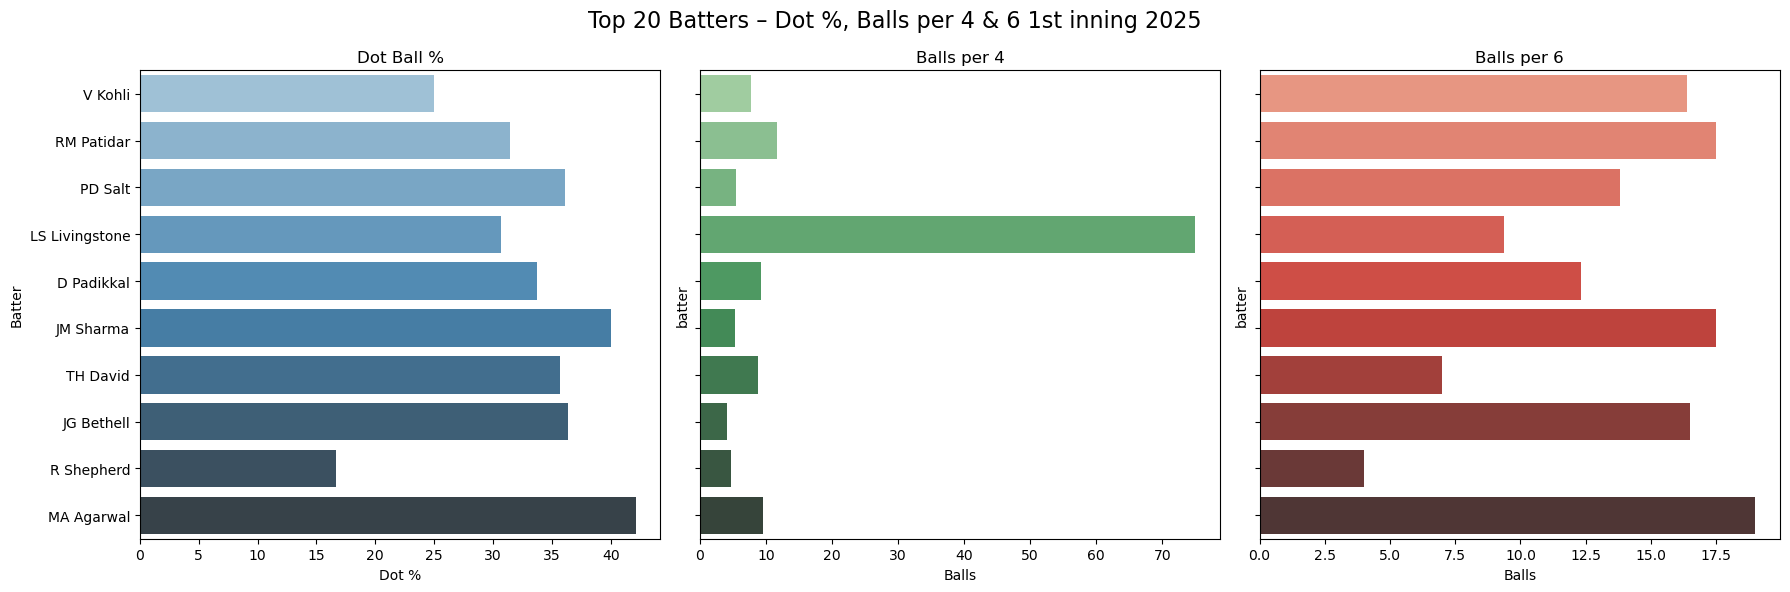

In [169]:
batter_statss = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Dot Percentage
sns.barplot(x = batter_statss['dot_percent'], y = batter_statss.index, ax=axs[0], palette="Blues_d")
axs[0].set_title("Dot Ball %")
axs[0].set_xlabel("Dot %")
axs[0].set_ylabel("Batter")

# Balls per 4
sns.barplot(x=batter_statss['balls_per_4'].head(20), y=batter_statss.index, ax=axs[1], palette="Greens_d")
axs[1].set_title("Balls per 4")
axs[1].set_xlabel("Balls")

# Balls per 6
sns.barplot(x=batter_statss['balls_per_6'], y=batter_statss.index, ax=axs[2], palette="Reds_d")
axs[2].set_title("Balls per 6")
axs[2].set_xlabel("Balls")

plt.suptitle("Top 20 Batters – Dot %, Balls per 4 & 6 1st inning 2025", fontsize=16)
plt.tight_layout()
plt.show()

In [170]:
# Count total balls faced by each batter
balls_faced = df_2nd_inn.groupby('batter').size().rename('balls_faced')

# Count dot balls
dots = df_2nd_inn[df_2nd_inn['total_runs'] == 0].groupby('batter').size().rename('dots')

# Count 4s
fours = df_2nd_inn[df_2nd_inn['total_runs'] == 4].groupby('batter').size().rename('fours')

# Count 6s
sixes = df_2nd_inn[df_2nd_inn['total_runs'] == 6].groupby('batter').size().rename('sixes')

# Combine all
batter_stats = pd.concat([balls_faced, dots, fours, sixes], axis=1).fillna(0)
batter_stats = batter_stats.astype(int)

# Calculated metrics
batter_stats['dot_percent'] = (batter_stats['dots'] / batter_stats['balls_faced']) * 100
batter_stats['balls_per_4'] = batter_stats['balls_faced'] / batter_stats['fours'].replace(0, pd.NA)
batter_stats['balls_per_6'] = batter_stats['balls_faced'] / batter_stats['sixes'].replace(0, pd.NA)

# Ensure all are numeric
for col in ['dot_percent', 'balls_per_4', 'balls_per_6']:
    batter_stats[col] = pd.to_numeric(batter_stats[col], errors='coerce')

# Replace inf and drop NaNs
batter_stats.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
batter_stats.dropna(subset=['balls_per_4', 'balls_per_6'], inplace=True)

# Round safely
batter_stats['dot_percent'] = batter_stats['dot_percent'].round(2)
batter_stats['balls_per_4'] = batter_stats['balls_per_4'].round(2)
batter_stats['balls_per_6'] = batter_stats['balls_per_6'].round(2)

# View top batters
batter_stats.sort_values('balls_faced', ascending=False).head(20)

balls_faced  dots  fours  sixes  dot_percent  balls_per_4  \
batter                                                                      
V Kohli                 256    60     39      7        23.44         6.56   
PD Salt                 149    47     31     16        31.54         4.81   
D Padikkal               77    27     12      5        35.06         6.42   
RM Patidar               66    17     11      3        25.76         6.00   
JM Sharma                58    10      9      9        17.24         6.44   
KH Pandya                55    19      6      4        34.55         9.17   
MA Agarwal               46    10      8      1        21.74         5.75   
TH David                 10     4      2      1        40.00         5.00   
JG Bethell                6     2      1      1        33.33         6.00   
LS Livingstone            6     2      2      1        33.33         3.00   

                balls_per_6  
batter                       
V Kohli               36.57  
PD Salt                9.31  
D Padikkal            15.40  
RM Patidar            22.00  
JM Sharma              6.44  
KH Pandya             13.75  
MA Agarwal            46.00  
TH David              10.00  
JG Bethell             6.00  
LS Livingstone         6.00

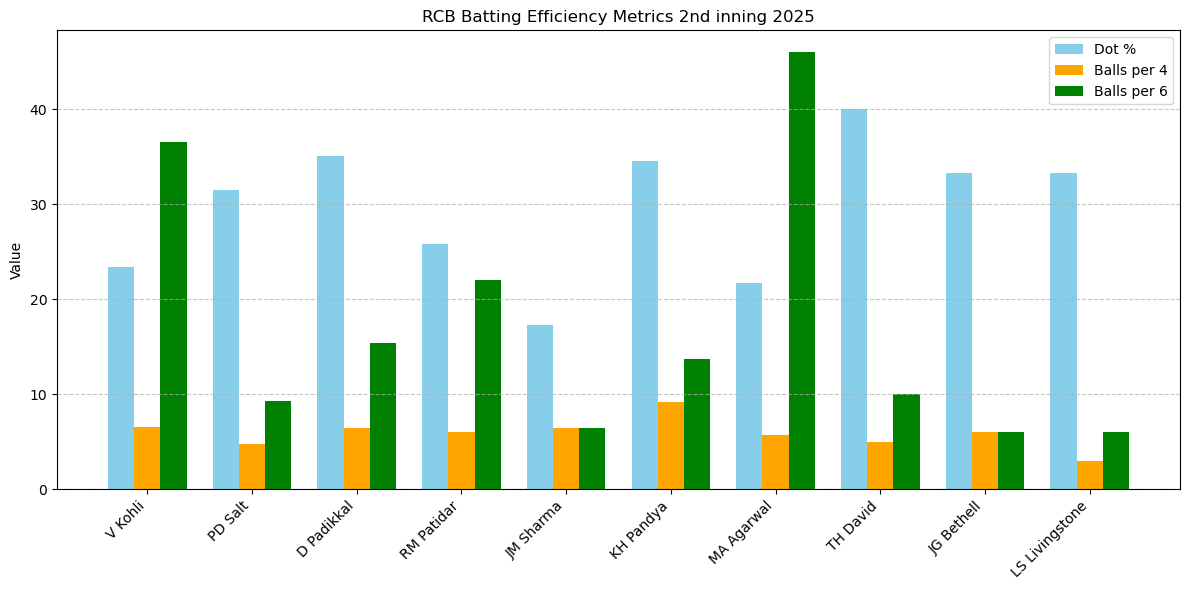

In [171]:
# Select top 10 batters by balls faced
top_batters = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(top_batters))
width = 0.25

# Bars
ax.bar([i - width for i in x], top_batters['dot_percent'], width=width, label='Dot %', color='skyblue')
ax.bar(x, top_batters['balls_per_4'], width=width, label='Balls per 4', color='orange')
ax.bar([i + width for i in x], top_batters['balls_per_6'], width=width, label='Balls per 6', color='green')

# Labels & Ticks
ax.set_xticks(x)
ax.set_xticklabels(top_batters.index, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('RCB Batting Efficiency Metrics 2nd inning 2025')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

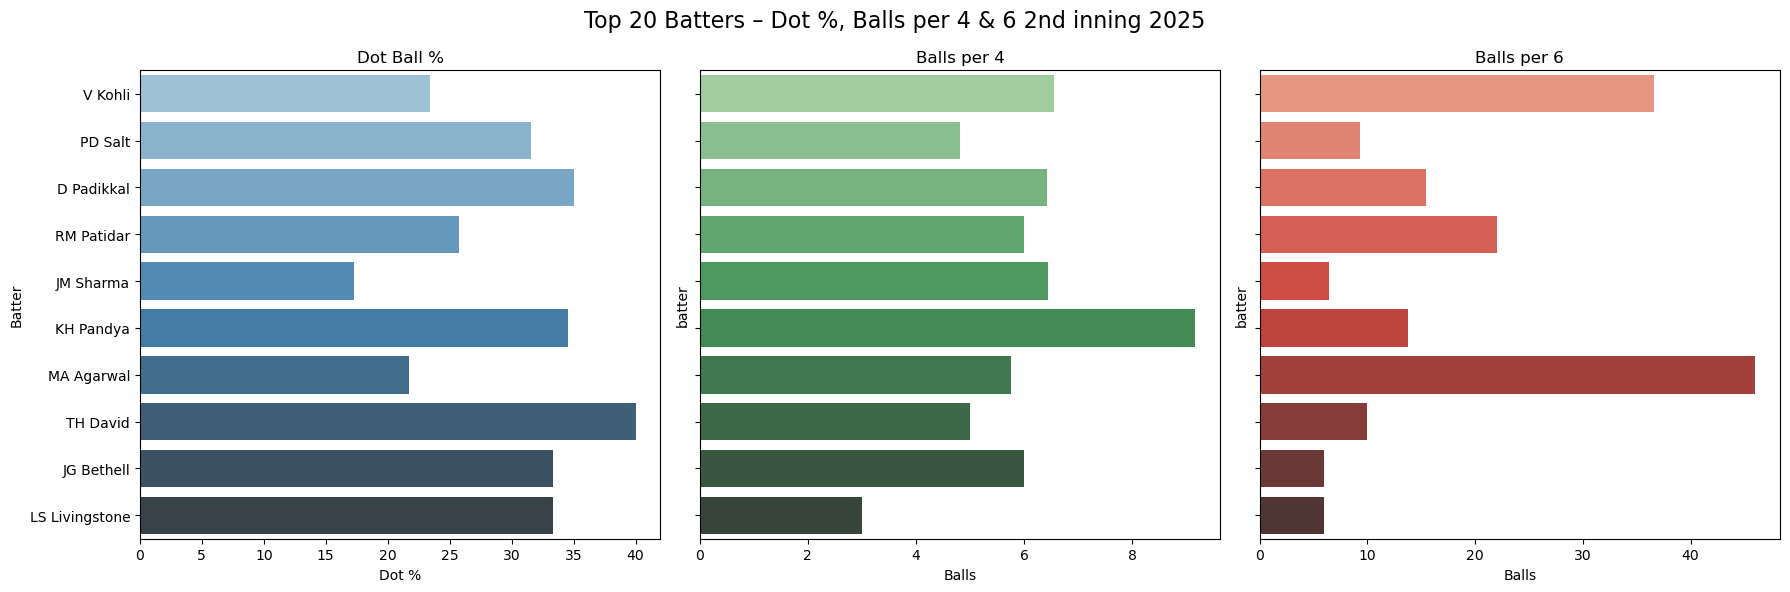

In [172]:
batter_statss = batter_stats.sort_values('balls_faced', ascending=False).head(20)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Dot Percentage
sns.barplot(x = batter_statss['dot_percent'], y = batter_statss.index, ax=axs[0], palette="Blues_d")
axs[0].set_title("Dot Ball %")
axs[0].set_xlabel("Dot %")
axs[0].set_ylabel("Batter")

# Balls per 4
sns.barplot(x=batter_statss['balls_per_4'].head(20), y=batter_statss.index, ax=axs[1], palette="Greens_d")
axs[1].set_title("Balls per 4")
axs[1].set_xlabel("Balls")

# Balls per 6
sns.barplot(x=batter_statss['balls_per_6'], y=batter_statss.index, ax=axs[2], palette="Reds_d")
axs[2].set_title("Balls per 6")
axs[2].set_xlabel("Balls")

plt.suptitle("Top 20 Batters – Dot %, Balls per 4 & 6 2nd inning 2025", fontsize=16)
plt.tight_layout()
plt.show()

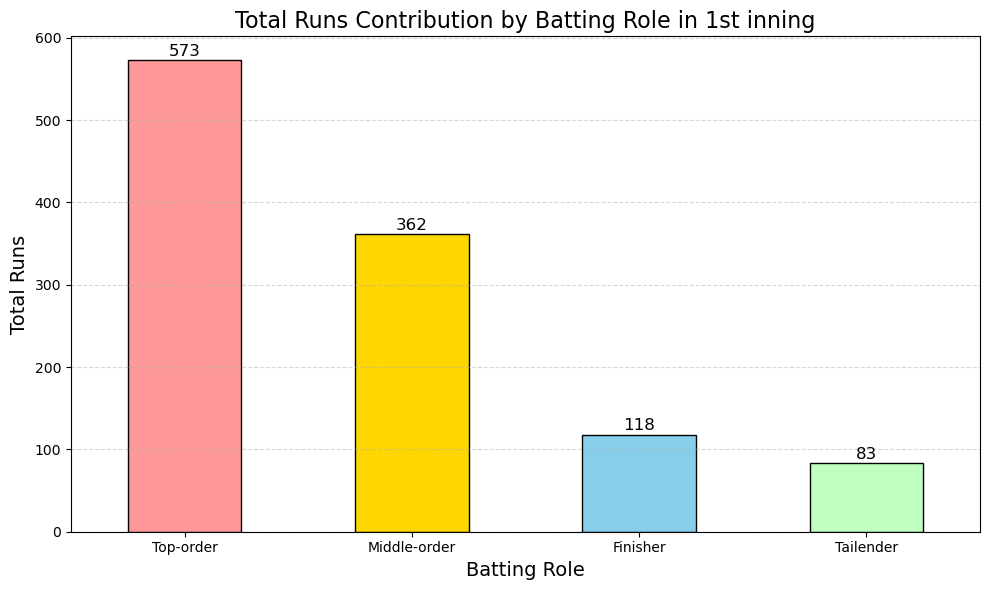

In [173]:
# Step 1: Ensure the 'batting_role' column exists using the function
df_with_roles = label_batting_role(df_1st_inn)

# Step 2: Group by batting role and sum the total runs
role_contribution = (
    df_with_roles.groupby('batting_role')['total_runs']
    .sum()
    .sort_values(ascending=False)
)

# Step 3: Plotting
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#FFD700', '#87CEEB', '#C1FFC1']  # Custom colors

ax = role_contribution.plot(kind='bar', color=colors, edgecolor='black')

# Annotations
for i, val in enumerate(role_contribution):
    plt.text(i, val + 5, f"{val}", ha='center', fontsize=12)

plt.title('Total Runs Contribution by Batting Role in 1st inning', fontsize=16)
plt.ylabel('Total Runs', fontsize=14)
plt.xlabel('Batting Role', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

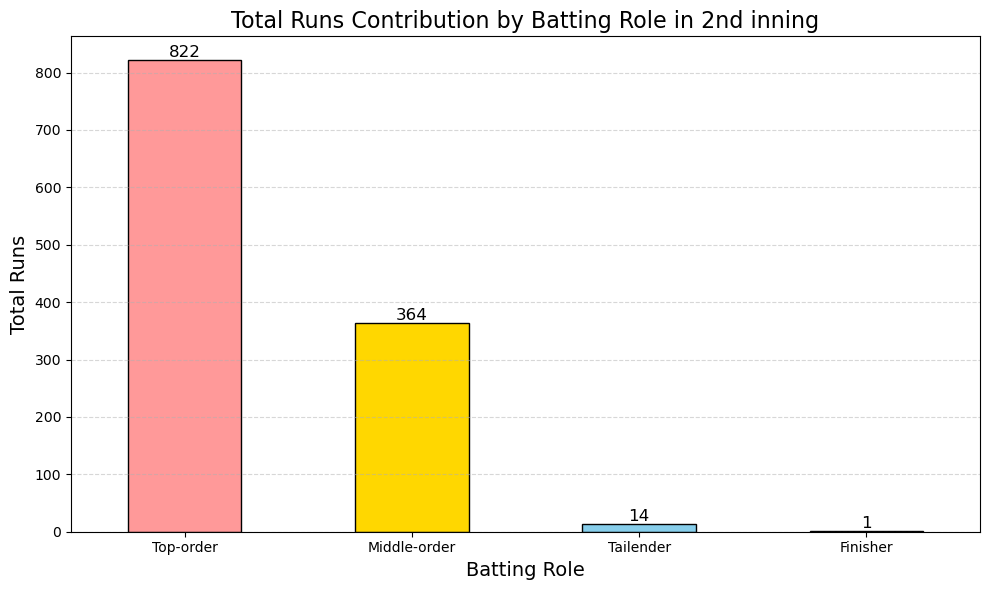

In [174]:
# Step 1: Ensure the 'batting_role' column exists using the function
df_with_roles2 = label_batting_role(df_2nd_inn)

# Step 2: Group by batting role and sum the total runs
role_contribution = (
    df_with_roles2.groupby('batting_role')['total_runs']
    .sum()
    .sort_values(ascending=False)
)

# Step 3: Plotting
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#FFD700', '#87CEEB', '#C1FFC1']  # Custom colors

ax = role_contribution.plot(kind='bar', color=colors, edgecolor='black')

# Annotations
for i, val in enumerate(role_contribution):
    plt.text(i, val + 5, f"{val}", ha='center', fontsize=12)

plt.title('Total Runs Contribution by Batting Role in 2nd inning', fontsize=16)
plt.ylabel('Total Runs', fontsize=14)
plt.xlabel('Batting Role', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Bowlers Analysis 2025 

In [187]:
bowlers = rcb_team_2025[rcb_team_2025['bowling_team'] == 'Royal Challengers Bengaluru']
bowlers.head(5)

match_id  inning       date           batting_team  \
260920   1473438       1 2025-03-22  Kolkata Knight Riders   
260921   1473438       1 2025-03-22  Kolkata Knight Riders   
260922   1473438       1 2025-03-22  Kolkata Knight Riders   
260923   1473438       1 2025-03-22  Kolkata Knight Riders   
260924   1473438       1 2025-03-22  Kolkata Knight Riders   

                       bowling_team  over  ball_faced  ball     batter  \
260920  Royal Challengers Bengaluru     0           1     1  Q de Kock   
260921  Royal Challengers Bengaluru     0           1     2  Q de Kock   
260922  Royal Challengers Bengaluru     0           1     3  Q de Kock   
260923  Royal Challengers Bengaluru     0           1     4  Q de Kock   
260924  Royal Challengers Bengaluru     0           1     5  Q de Kock   

              bowler non_striker  batsman_runs  extra_runs  total_runs  \
260920  JR Hazlewood   SP Narine             0           0           0   
260921  JR Hazlewood   SP Narine             4           0           4   
260922  JR Hazlewood   SP Narine             4           0           0   
260923  JR Hazlewood   SP Narine             4           0           0   
260924  JR Hazlewood   SP Narine             4           0           0   

       extra_type  is_wicket player_dismissed dismissal_kind    fielder  \
260920        NaN          0              NaN            NaN        NaN   
260921        NaN          0              NaN            NaN        NaN   
260922        NaN          0              NaN            NaN        NaN   
260923        NaN          0              NaN            NaN        NaN   
260924        NaN          1        Q de Kock         caught  JM Sharma   

        season  
260920    2025  
260921    2025  
260922    2025  
260923    2025  
260924    2025

In [188]:
bowlers.groupby('bowler')['ball'].sum()

bowler
B Kumar           1109
JR Hazlewood       939
KH Pandya          992
L Ngidi            168
LS Livingstone     189
N Thushara          90
R Shepherd         317
Rasikh Salam       132
Suyash Sharma     1059
Yash Dayal        1051
Name: ball, dtype: int64

In [189]:
# Filter RCB bowlers
df_bowl = rcb_team_2025[rcb_team_2025['bowling_team'] == 'Royal Challengers Bengaluru']

# Total balls bowled
balls_bowled = df_bowl.groupby('bowler').size().rename("balls_bowled")

In [190]:
# Total runs conceded
runs_conceded = df_bowl.groupby('bowler')['total_runs'].sum().rename("runs_conceded")

In [191]:
# Wickets taken
wickets = df_bowl[df_bowl['is_wicket'] == 1].groupby('bowler').size().rename("wickets")

In [192]:
# Dot balls
dot_balls = df_bowl[df_bowl['total_runs'] == 0].groupby('bowler').size().rename("dot_balls")

In [193]:
# Fours & Sixes conceded
fours_conceded = df_bowl[df_bowl['total_runs'] == 4].groupby('bowler').size().rename("fours_conceded")
sixes_conceded = df_bowl[df_bowl['total_runs'] == 6].groupby('bowler').size().rename("sixes_conceded")

In [194]:
# Combine all metrics
bowler_stats = pd.concat(
    [balls_bowled, dot_balls, runs_conceded, wickets, fours_conceded, sixes_conceded], 
    axis=1
).fillna(0)

In [207]:
# Convert all to integers
bowler_stats = bowler_stats.astype(int)

# Metrics
bowler_stats['dot_percent'] = (bowler_stats['dot_balls'] / bowler_stats['balls_bowled']) * 100
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets'].replace(0, pd.NA)
bowler_stats['average'] = bowler_stats['runs_conceded'] / bowler_stats['wickets'].replace(0, pd.NA)

# Clean up invalid or infinite values
for col in ['strike_rate', 'average']:
    bowler_stats[col] = pd.to_numeric(bowler_stats[col], errors='coerce')
    bowler_stats[col].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Round metrics
bowler_stats['dot_percent'] = bowler_stats['dot_percent'].round(2)
bowler_stats['economy'] = bowler_stats['economy'].round(2)
bowler_stats['strike_rate'] = bowler_stats['strike_rate'].round(2)
bowler_stats['average'] = bowler_stats['average'].round(2)

# ✅ Filter bowlers with at least 10 overs (60 balls)
bowler_stats_filtered = bowler_stats[bowler_stats['balls_bowled'] >= 6]

In [208]:
# Sort by wickets for top performers
bowler_stats_sorted = bowler_stats_filtered.sort_values(by='wickets', ascending=False)

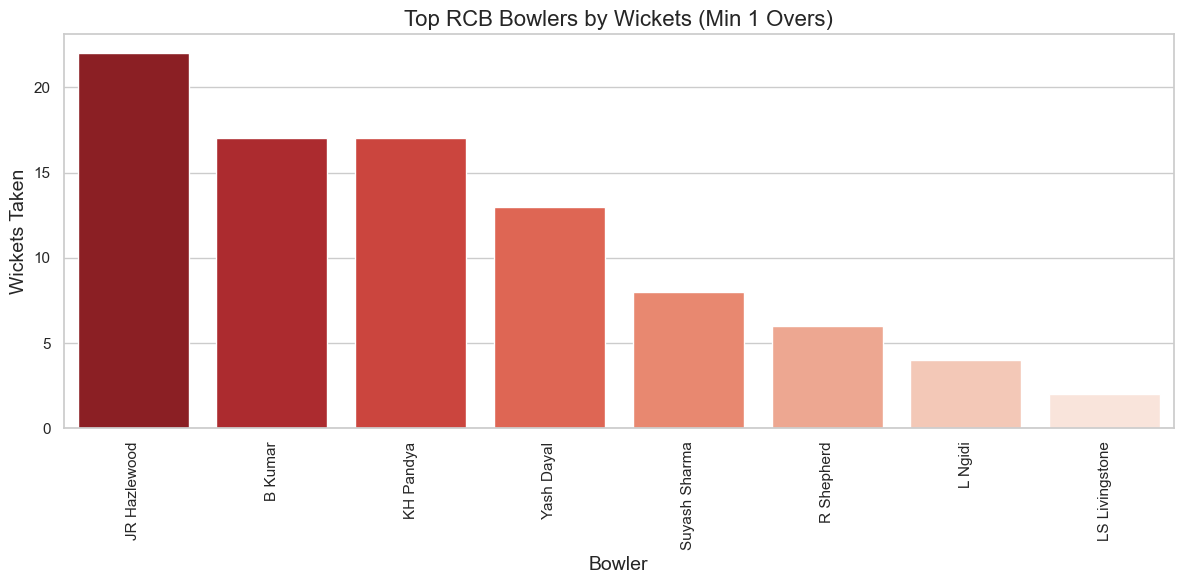

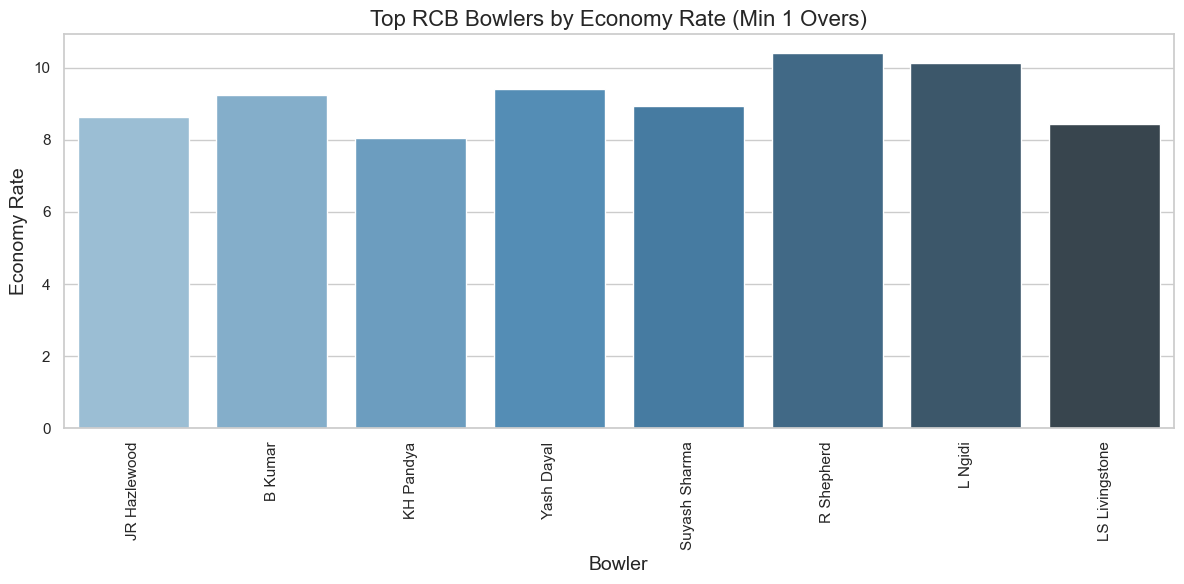

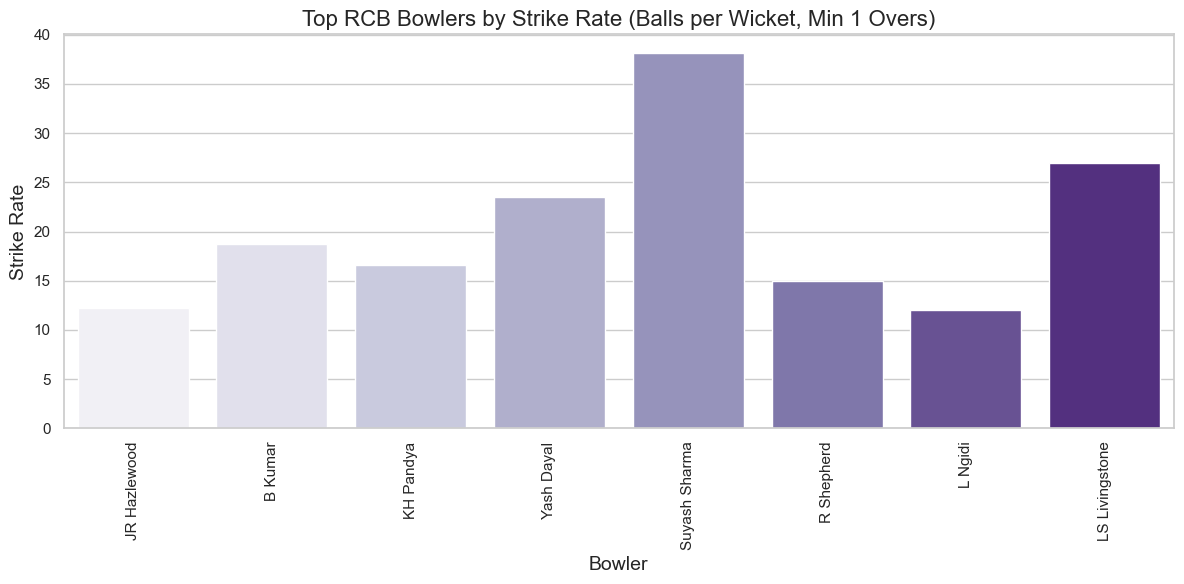

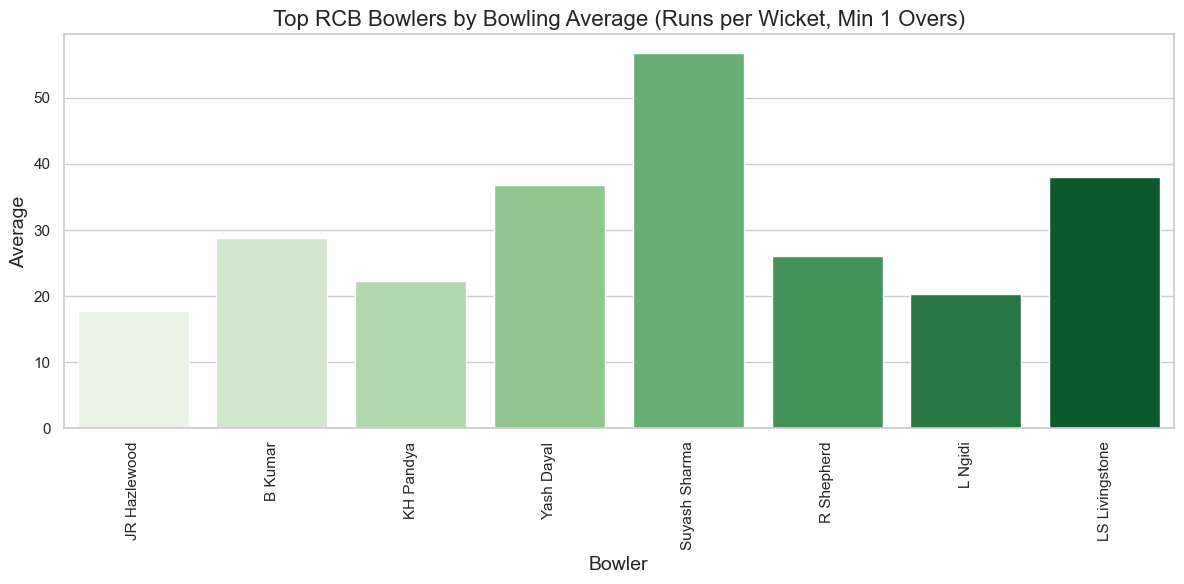

In [211]:
# Prepare for plotting
top_bowlers = bowler_stats_sorted.head(8).copy()
top_bowlers.reset_index(inplace=True)

# Plot Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# 🔹 Plot 1: Wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='Reds_r')
plt.title('Top RCB Bowlers by Wickets (Min 1 Overs)')
plt.ylabel('Wickets Taken')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: Economy Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='Blues_d')
plt.title('Top RCB Bowlers by Economy Rate (Min 1 Overs)')
plt.ylabel('Economy Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 3: Strike Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='strike_rate', data=top_bowlers, palette='Purples')
plt.title('Top RCB Bowlers by Strike Rate (Balls per Wicket, Min 1 Overs)')
plt.ylabel('Strike Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 4: Bowling Average
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='average', data=top_bowlers, palette='Greens')
plt.title('Top RCB Bowlers by Bowling Average (Runs per Wicket, Min 1 Overs)')
plt.ylabel('Average')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [213]:
# Function to classify over phase
def get_phase(over):
    try:
        over = str(over)
        if '.' not in over:
            over += '.0'
        over_split = over.split('.')
        over_float = int(over_split[0]) + int(over_split[1]) / 10
        if 0 <= over_float < 6:
            return 'Powerplay'
        elif 6 <= over_float < 16:
            return 'Middle Overs'
        elif 16 <= over_float <= 20:
            return 'Death Overs'
        else:
            return 'Other'
    except Exception:
        return 'Unknown'


# Add over phase column
df_bowl['phase'] = df_bowl['over'].astype(str).apply(get_phase)

# Group by bowler and phase
bowling_phase_stats = df_bowl.groupby(['bowler', 'phase']).agg(
    balls_bowled=('over', 'count'),
    dot_balls=('total_runs', lambda x: (x == 0).sum()),
    runs_conceded=('total_runs', 'sum'),
    wickets=('is_wicket', 'sum')
).reset_index()

# Calculate metrics
# Calculate metrics
bowling_phase_stats['dot_percent'] = (bowling_phase_stats['dot_balls'] / bowling_phase_stats['balls_bowled']) * 100
bowling_phase_stats['economy'] = (bowling_phase_stats['runs_conceded'] / bowling_phase_stats['balls_bowled']) * 6

# ✅ Add strike rate calculation BEFORE accessing it
bowling_phase_stats['strike_rate'] = bowling_phase_stats['balls_bowled'] / bowling_phase_stats['wickets'].replace(0, pd.NA)

# Clean strike rate
bowling_phase_stats['strike_rate'] = pd.to_numeric(bowling_phase_stats['strike_rate'], errors='coerce')
bowling_phase_stats['strike_rate'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows where strike_rate is NaN (optional)
bowling_phase_stats.dropna(subset=['strike_rate'], inplace=True)

# Round values
bowling_phase_stats['dot_percent'] = bowling_phase_stats['dot_percent'].round(2)
bowling_phase_stats['economy'] = bowling_phase_stats['economy'].round(2)
bowling_phase_stats['strike_rate'] = bowling_phase_stats['strike_rate'].round(2)

# Preview
bowling_phase_stats.head(20)

bowler         phase  balls_bowled  dot_balls  runs_conceded  \
0          B Kumar   Death Overs            92         22            158   
1          B Kumar  Middle Overs            38          9             77   
2          B Kumar     Powerplay           188         85            255   
3     JR Hazlewood   Death Overs            73         27            121   
4     JR Hazlewood  Middle Overs            63         19            108   
5     JR Hazlewood     Powerplay           134         71            160   
6        KH Pandya   Death Overs            13          7             22   
7        KH Pandya  Middle Overs           233         63            301   
8        KH Pandya     Powerplay            37         13             57   
9          L Ngidi   Death Overs            12          4             21   
11         L Ngidi     Powerplay            18          8             30   
13  LS Livingstone  Middle Overs            48          8             72   
15      N Thushara     Powerplay            19          8             23   
16      R Shepherd   Death Overs            13          3             24   
17      R Shepherd  Middle Overs            77         22            132   
18    Rasikh Salam  Middle Overs            32         10             55   
21   Suyash Sharma  Middle Overs           286         90            423   
22      Yash Dayal   Death Overs            61         10            122   
23      Yash Dayal  Middle Overs            92         30            112   
24      Yash Dayal     Powerplay           152         51            245   

    wickets  dot_percent  economy  strike_rate  
0         7        23.91    10.30        13.14  
1         2        23.68    12.16        19.00  
2         8        45.21     8.14        23.50  
3         6        36.99     9.95        12.17  
4         6        30.16    10.29        10.50  
5        10        52.99     7.16        13.40  
6         3        53.85    10.15         4.33  
7        12        27.04     7.75        19.42  
8         2        35.14     9.24        18.50  
9         2        33.33    10.50         6.00  
11        2        44.44    10.00         9.00  
13        2        16.67     9.00        24.00  
15        1        42.11     7.26        19.00  
16        2        23.08    11.08         6.50  
17        4        28.57    10.29        19.25  
18        1        31.25    10.31        32.00  
21        8        31.47     8.87        35.75  
22        4        16.39    12.00        15.25  
23        5        32.61     7.30        18.40  
24        4        33.55     9.67        38.00

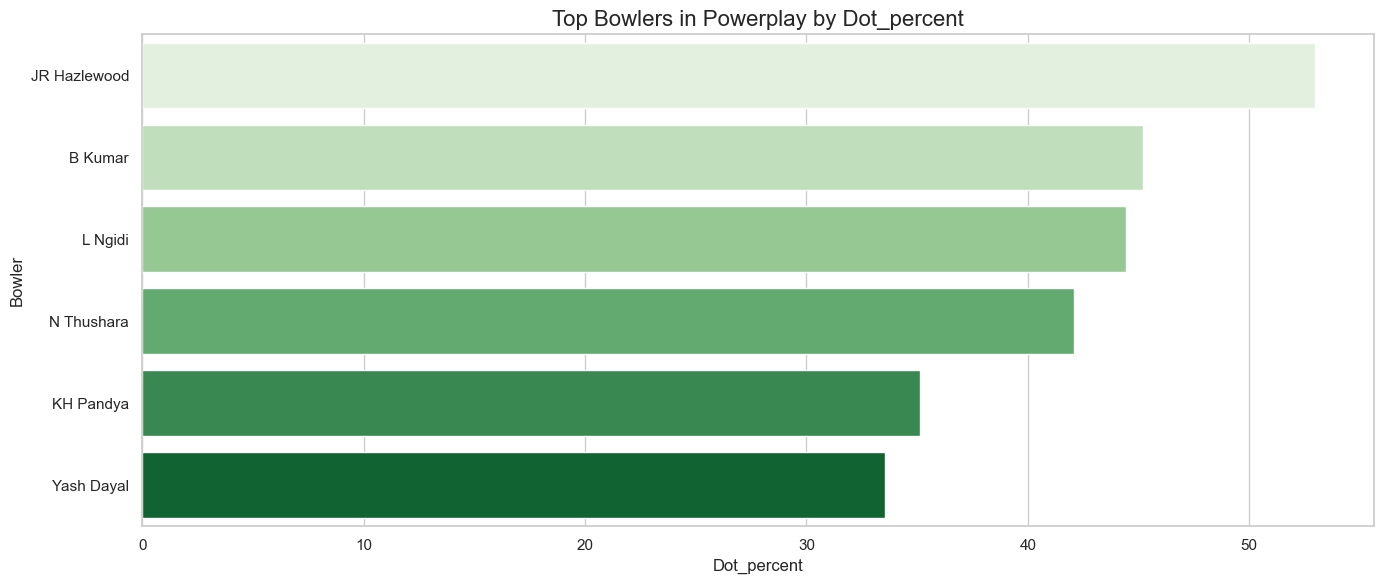

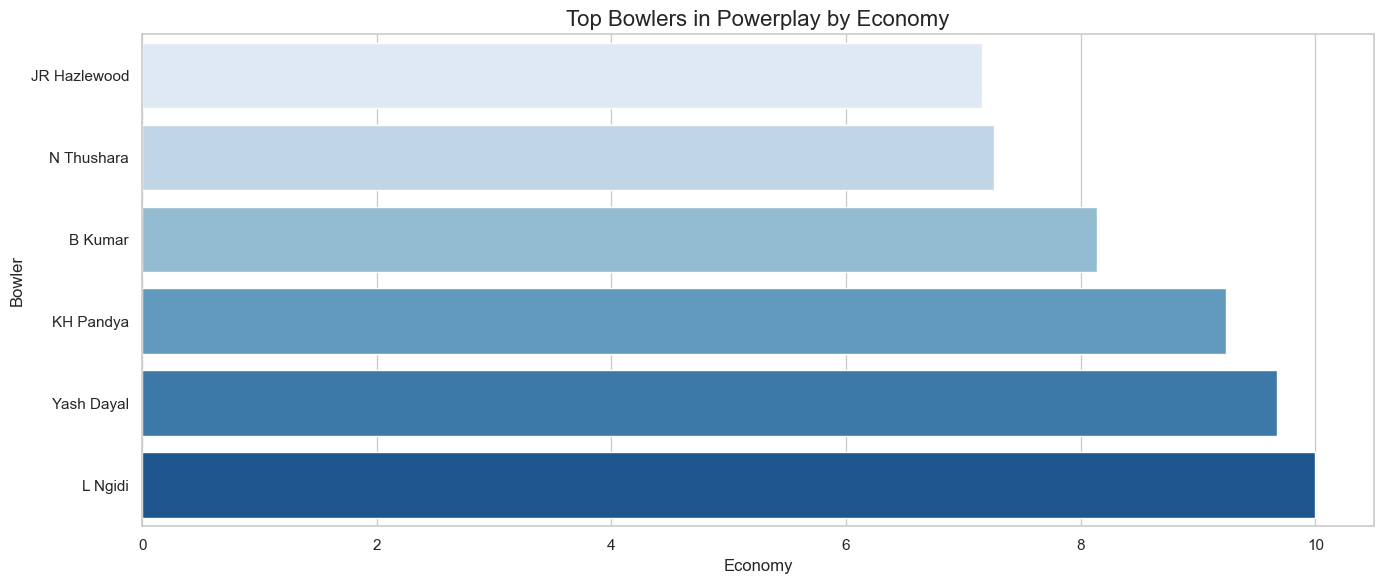

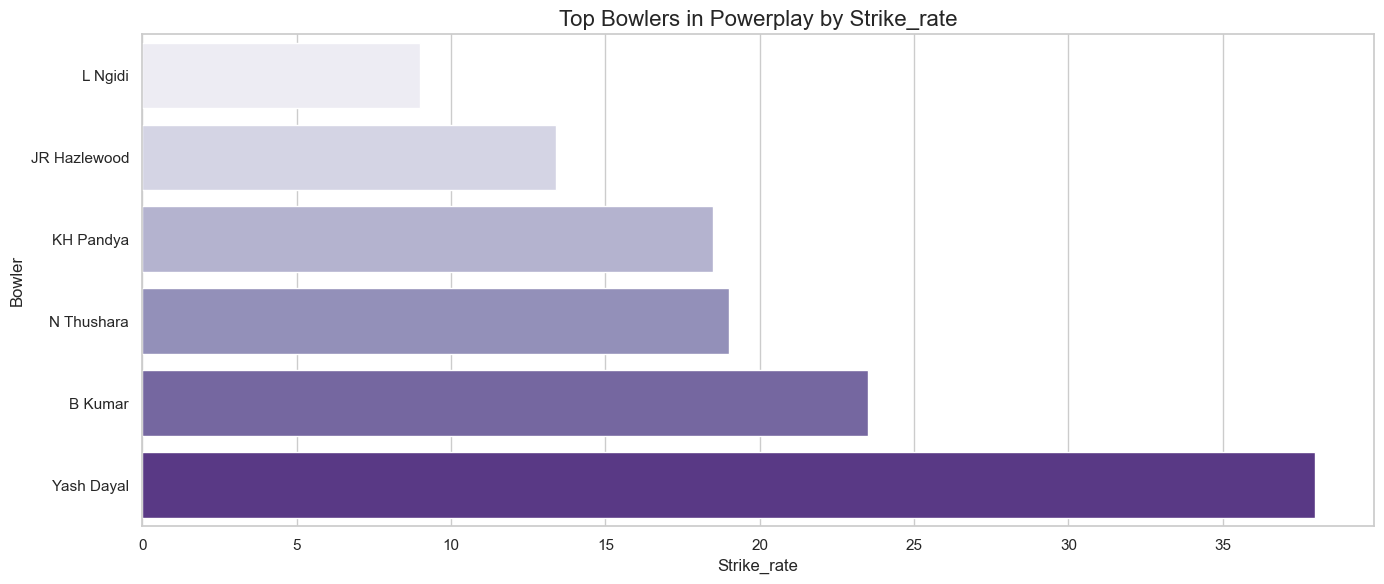

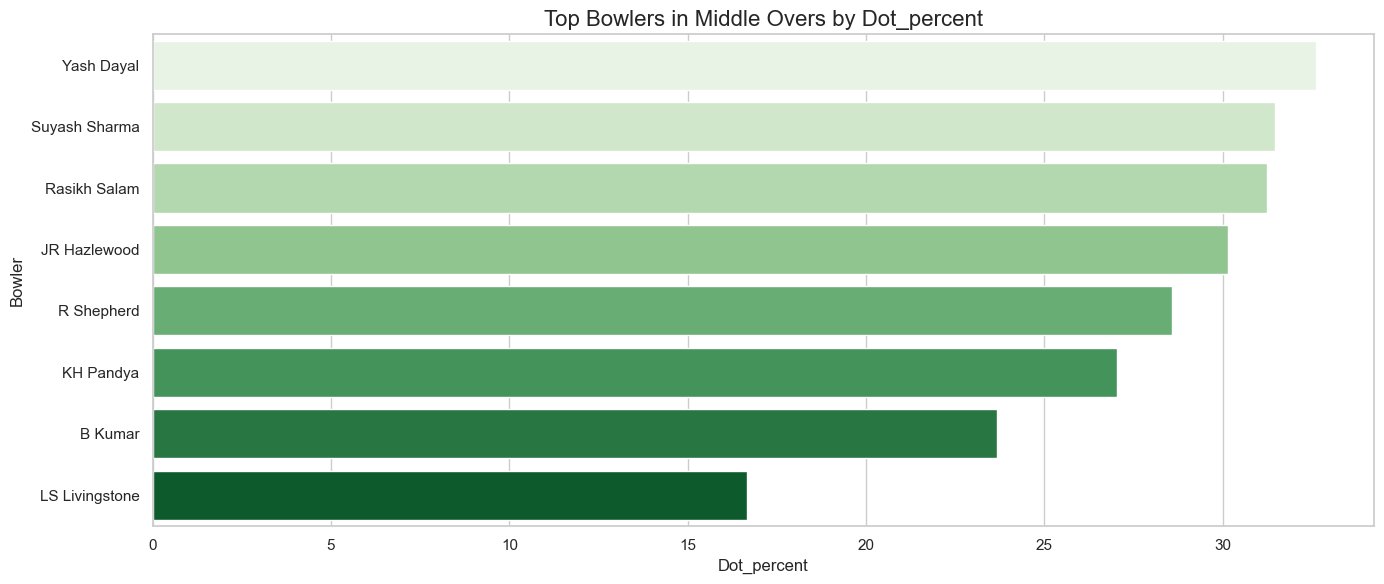

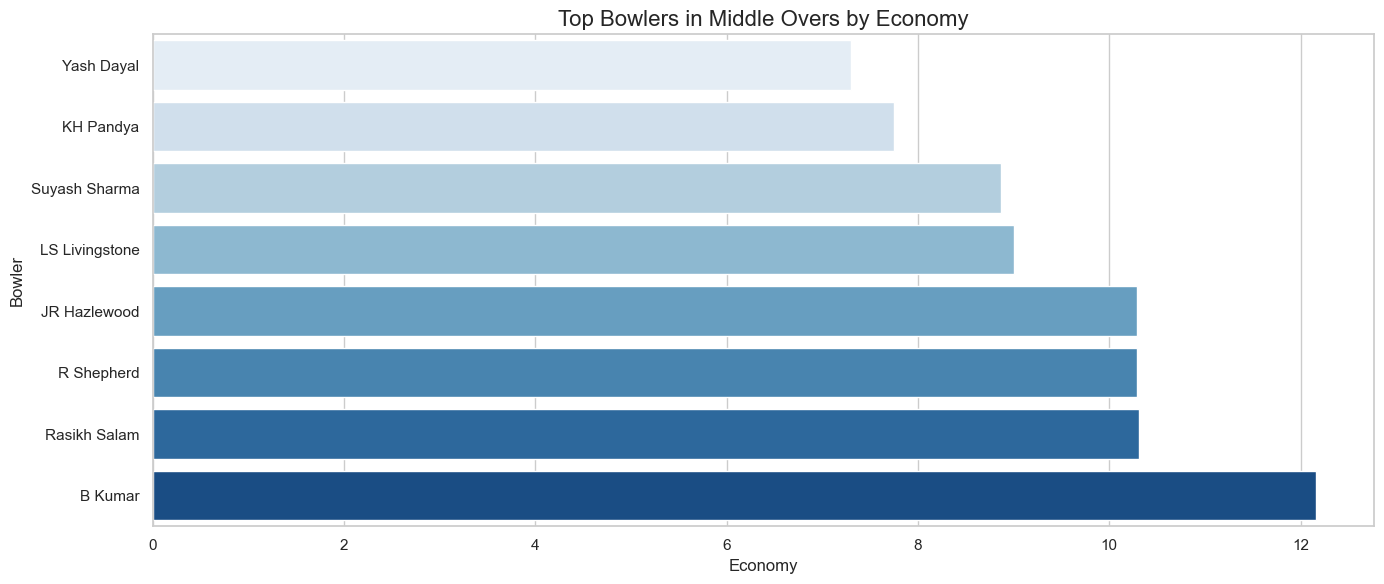

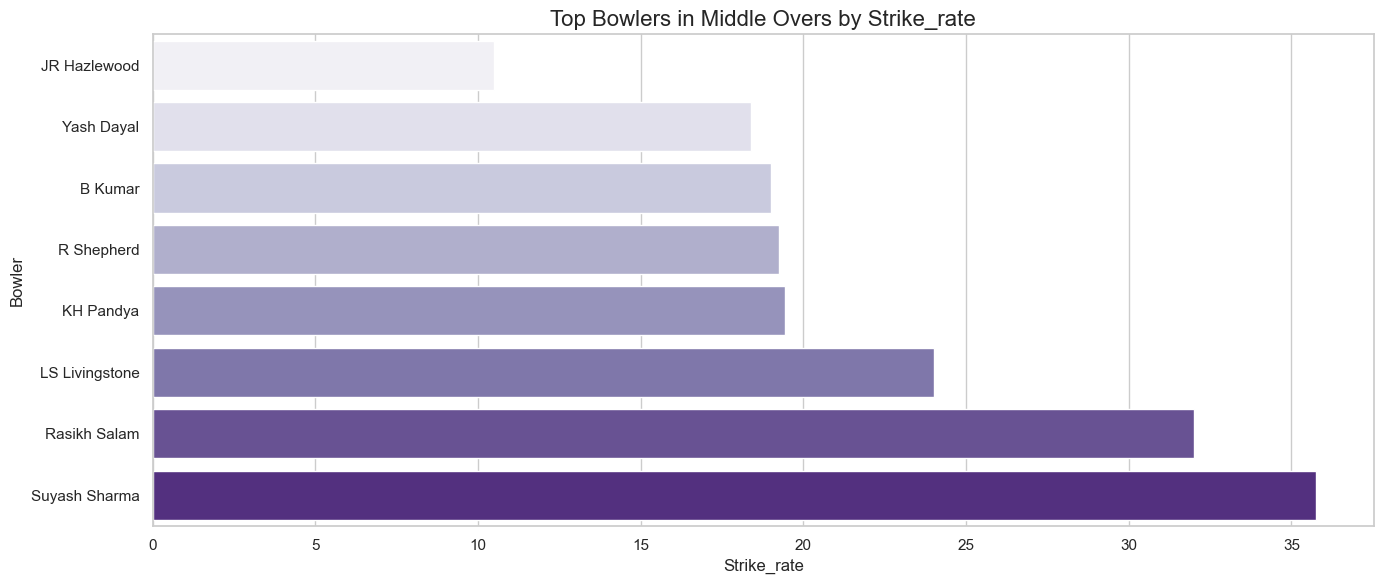

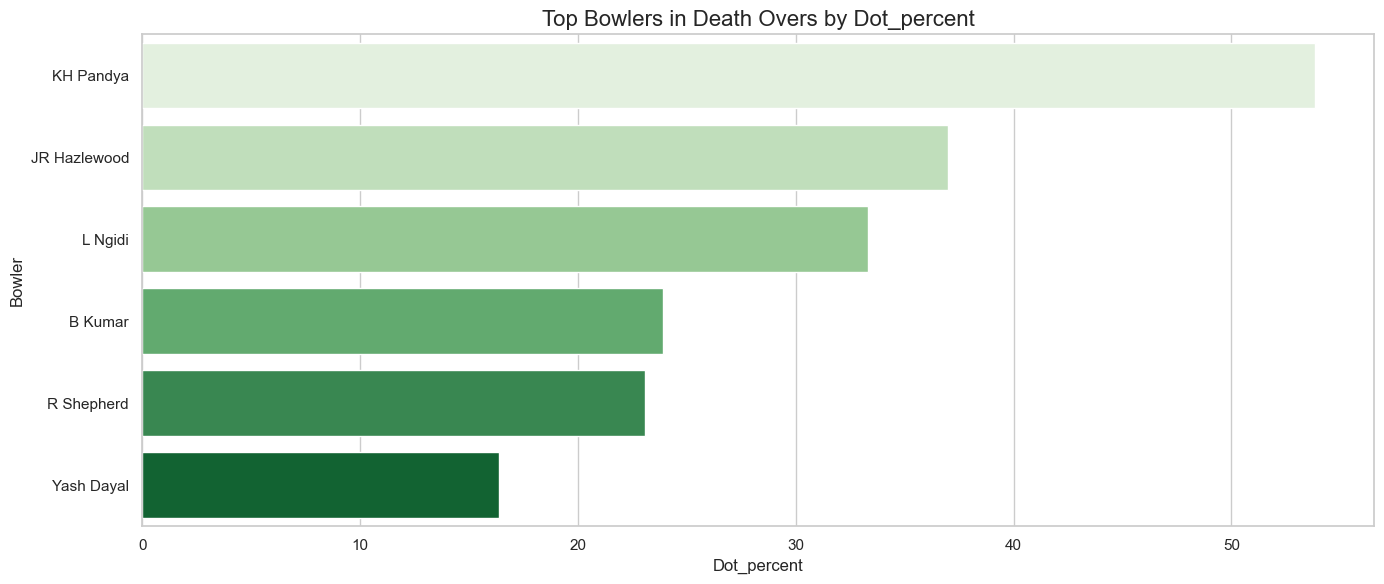

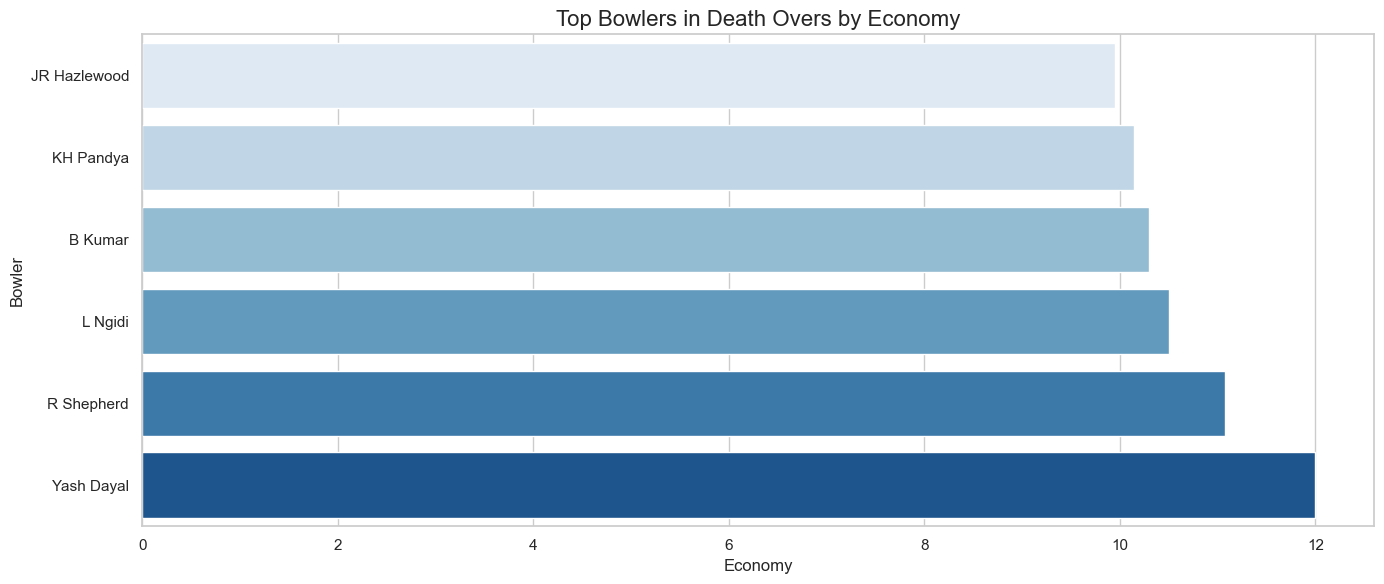

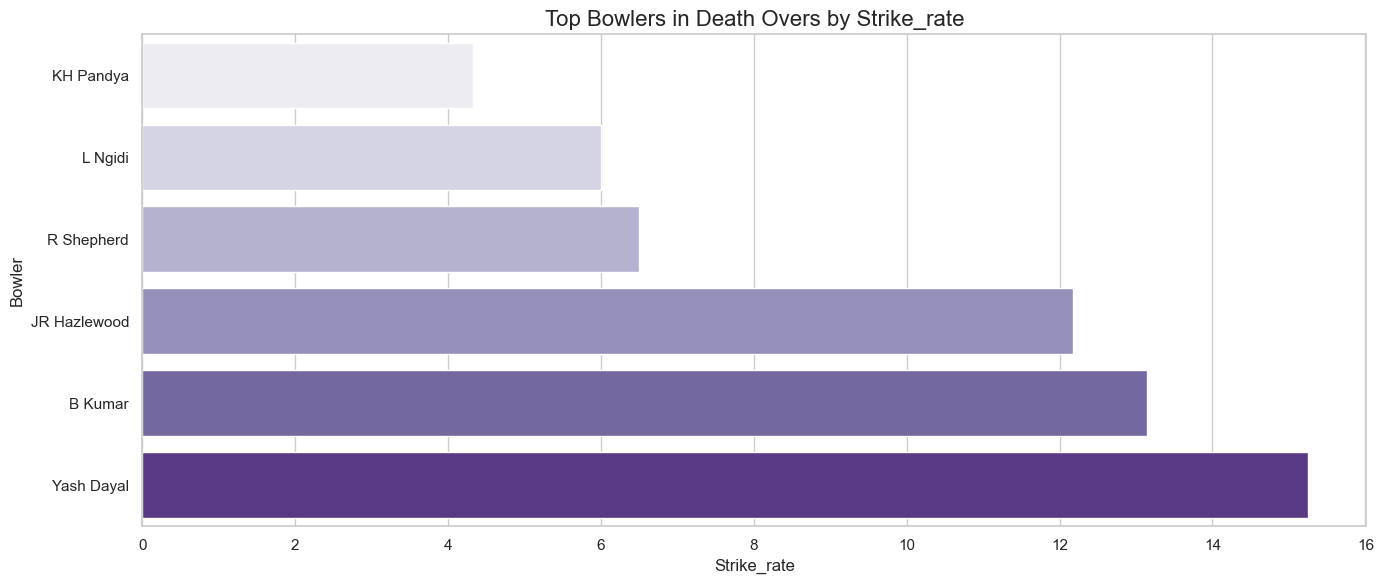

In [215]:
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Define plotting function
def plot_top_bowlers(df, metric, phase, ascending, palette):
    data = df[df['phase'] == phase].copy()
    data = data.sort_values(by=metric, ascending=ascending).head(20)

    plt.figure(figsize=(14, 6))
    sns.barplot(x=metric, y='bowler', data=data, palette=palette)
    plt.title(f'Top Bowlers in {phase} by {metric.capitalize()}', fontsize=16)
    plt.xlabel(metric.capitalize())
    plt.ylabel('Bowler')
    plt.tight_layout()
    plt.show()

# 🔁 Loop through each phase and metric
phases = ['Powerplay', 'Middle Overs', 'Death Overs']
metrics = {
    'dot_percent': {'ascending': False, 'palette': 'Greens'},
    'economy': {'ascending': True, 'palette': 'Blues'},
    'strike_rate': {'ascending': True, 'palette': 'Purples'}
}

for phase in phases:
    for metric, options in metrics.items():
        plot_top_bowlers(
            df=bowling_phase_stats,
            metric=metric,
            phase=phase,
            ascending=options['ascending'],
            palette=options['palette']
        )

In [216]:
# Count wickets taken by each RCB bowler
rcb_wickets = df_bowl[df_bowl['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Get the bowler with the most wickets
highest_wicket_taker = rcb_wickets.sort_values(ascending=False).reset_index()

# Display result
print(f"Highest Wicket Taker for RCB: {highest_wicket_taker['bowler'].iloc[0]} with {highest_wicket_taker['wickets'].iloc[0]} wickets.")

Highest Wicket Taker for RCB: JR Hazlewood with 22 wickets.


In [217]:
# $ Highest wicket taker for rcb
highest_wicket_taker.head(10)

bowler  wickets
0    JR Hazlewood       22
1         B Kumar       17
2       KH Pandya       17
3      Yash Dayal       13
4   Suyash Sharma        8
5      R Shepherd        6
6         L Ngidi        4
7  LS Livingstone        2
8      N Thushara        1
9    Rasikh Salam        1

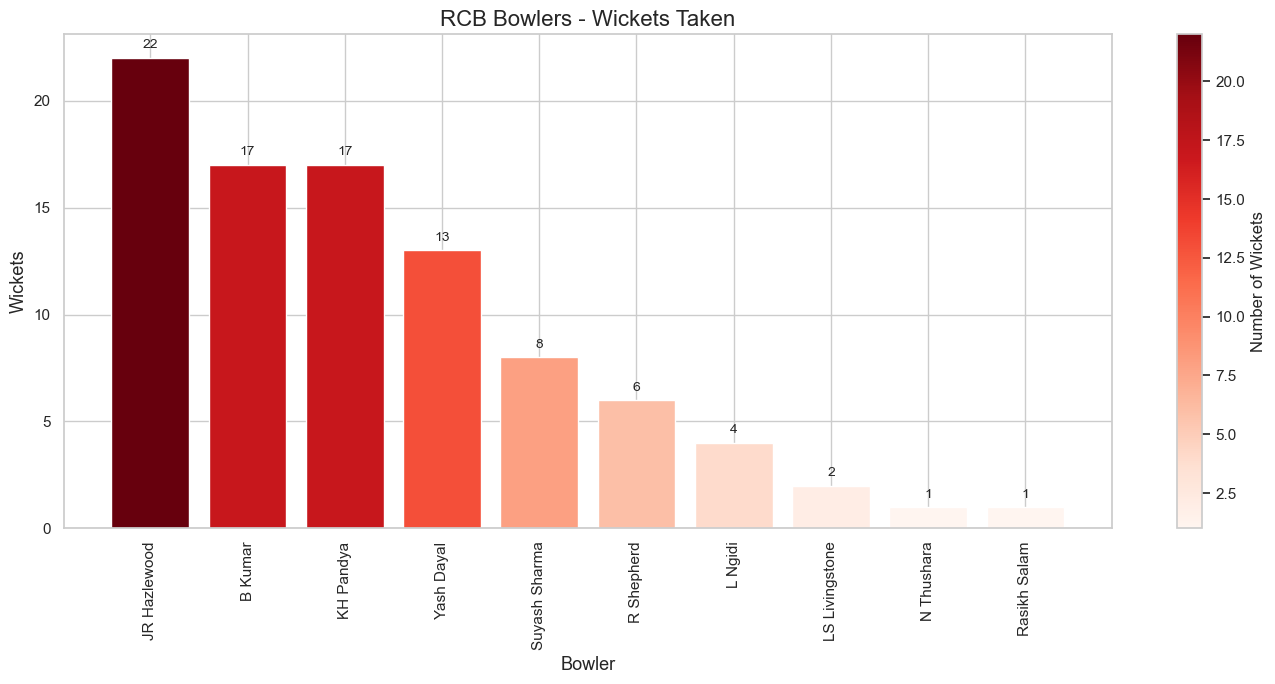

In [221]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = rcb_team_2025[rcb_team_2025['bowling_team'] == 'Royal Challengers Bengaluru']

# Count wickets taken by each RCB bowler
rcb_wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets').reset_index()

# Sort data for better visualization
rcb_wickets.sort_values(by='wickets', ascending=False, inplace=True)
rcb_wickets = rcb_wickets.head(35)

# Normalize for color mapping
norm = Normalize(vmin=rcb_wickets['wickets'].min(), vmax=rcb_wickets['wickets'].max())
cmap = plt.cm.Reds  # Red gradient
colors = cmap(norm(rcb_wickets['wickets']))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(rcb_wickets['bowler'], rcb_wickets['wickets'], color=colors)

# Annotate each bar with wicket count
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

# Customize axes
ax.set_title('RCB Bowlers - Wickets Taken', fontsize=16)
ax.set_xlabel('Bowler', fontsize=13)
ax.set_ylabel('Wickets', fontsize=13)
plt.xticks(rotation=90)

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Wickets')

plt.tight_layout()
plt.show()

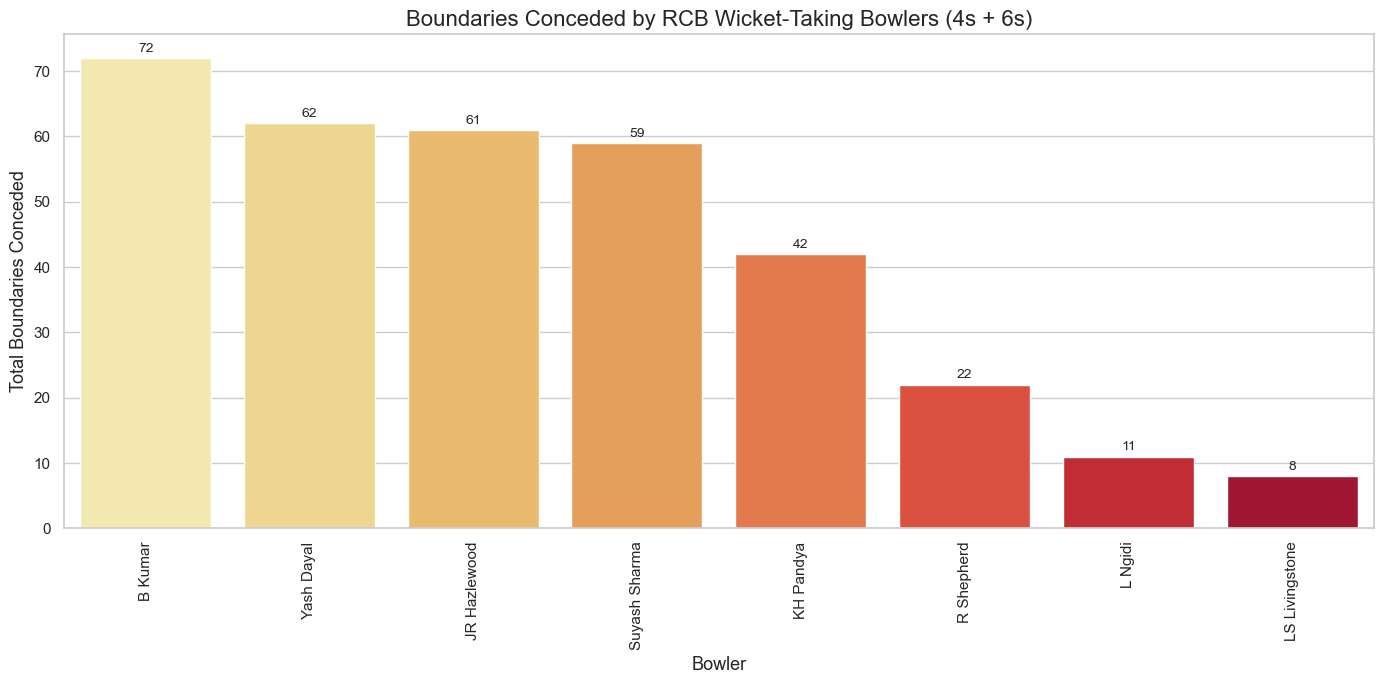

In [272]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = rcb_team_2025[rcb_team_2025['bowling_team'] == 'Royal Challengers Bengaluru']

# Wickets taken by each bowler
wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Boundaries conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine into one DataFrame
bowler_stats = pd.concat([wickets, fours_conceded, sixes_conceded], axis=1).fillna(0)
bowler_stats = bowler_stats.astype({'wickets': int, 'fours_conceded': int, 'sixes_conceded': int})

# Filter only bowlers with at least 1 wicket
bowler_stats = bowler_stats[bowler_stats['wickets'] > 1]

# Calculate total boundaries conceded
bowler_stats['total_boundaries'] = bowler_stats['fours_conceded'] + bowler_stats['sixes_conceded']
bowler_stats = bowler_stats.sort_values('total_boundaries', ascending=False).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=bowler_stats, x='bowler', y='total_boundaries', palette='YlOrRd')

# Annotate each bar
for index, row in bowler_stats.iterrows():
    plt.text(index, row['total_boundaries'] + 0.5, f"{row['total_boundaries']}", 
             ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Boundaries Conceded by RCB Wicket-Taking Bowlers (4s + 6s)', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Total Boundaries Conceded', fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [223]:
# Filter only RCB bowlers
df_bowl_rcb = rcb_team_2025[rcb_team_2025['bowling_team'] == 'Royal Challengers Bengaluru']

# Total balls bowled by each bowler (excluding extras like wides/no-balls if needed)
balls_bowled = df_bowl_rcb.groupby('bowler').size().rename('balls_bowled')

# Count of 4s and 6s conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine all into a single DataFrame
bowler_boundary_stats = pd.concat([balls_bowled, fours_conceded, sixes_conceded], axis=1).fillna(0)

# Ensure integer type
bowler_boundary_stats = bowler_boundary_stats.astype(int)

# Calculate balls per 4 and 6, avoid division by zero
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['fours_conceded'].replace(0, pd.NA)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['sixes_conceded'].replace(0, pd.NA)

# Convert columns to numeric (force coercion of bad values to NaN)
bowler_boundary_stats['balls_per_4'] = pd.to_numeric(bowler_boundary_stats['balls_per_4'], errors='coerce')
bowler_boundary_stats['balls_per_6'] = pd.to_numeric(bowler_boundary_stats['balls_per_6'], errors='coerce')

# Now safely round
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_per_4'].round(2)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_per_6'].round(2)


# Drop NaN if needed (optional)
bowler_boundary_stats.dropna(subset=['balls_per_4', 'balls_per_6'], how='all', inplace=True)

# Display top bowlers
bowler_boundary_stats.sort_values('balls_bowled', ascending=False).head(20)

balls_bowled  fours_conceded  sixes_conceded  balls_per_4  \
bowler                                                                      
B Kumar                  318              46              26         6.91   
Suyash Sharma            305              37              22         8.24   
Yash Dayal               305              43              19         7.09   
KH Pandya                283              23              19        12.30   
JR Hazlewood             270              39              22         6.92   
R Shepherd                90              11              11         8.18   
LS Livingstone            54               6               2         9.00   
L Ngidi                   48               7               4         6.86   
Rasikh Salam              38               7               5         5.43   
N Thushara                26               4               0         6.50   

                balls_per_6  
bowler                       
B Kumar               12.23  
Suyash Sharma         13.86  
Yash Dayal            16.05  
KH Pandya             14.89  
JR Hazlewood          12.27  
R Shepherd             8.18  
LS Livingstone        27.00  
L Ngidi               12.00  
Rasikh Salam           7.60  
N Thushara              NaN

posx and posy should be finite values
posx and posy should be finite values


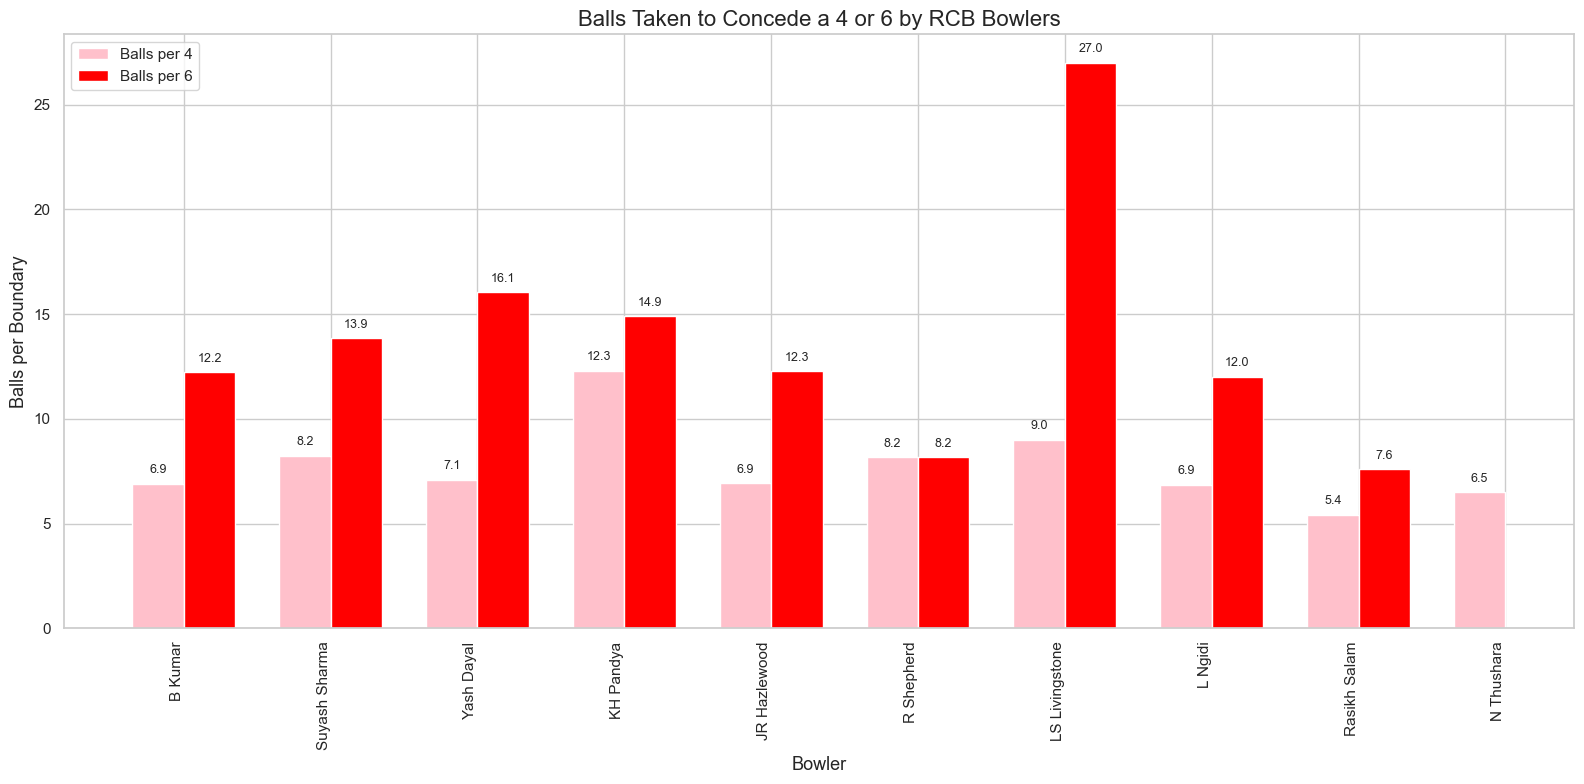

In [224]:
# Your original DataFrame
df = bowler_boundary_stats.copy()
df = df.sort_values('balls_bowled', ascending=False).head(25)

# Extract x-axis labels and data
bowlers = df.index.tolist()
x = np.arange(len(bowlers))  # the label locations
width = 0.35  # the width of the bars

# Initialize plot
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, df['balls_per_4'], width, label='Balls per 4', color='pink')
plt.bar(x + width/2, df['balls_per_6'], width, label='Balls per 6', color='red')

# Add value labels
for i in range(len(bowlers)):
    plt.text(x[i] - width/2, df['balls_per_4'].iloc[i] + 0.5, f"{df['balls_per_4'].iloc[i]:.1f}", 
             ha='center', fontsize=9)
    plt.text(x[i] + width/2, df['balls_per_6'].iloc[i] + 0.5, f"{df['balls_per_6'].iloc[i]:.1f}", 
             ha='center', fontsize=9)

# Customize axes and labels
plt.xticks(x, bowlers, rotation=90, ha='right')
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


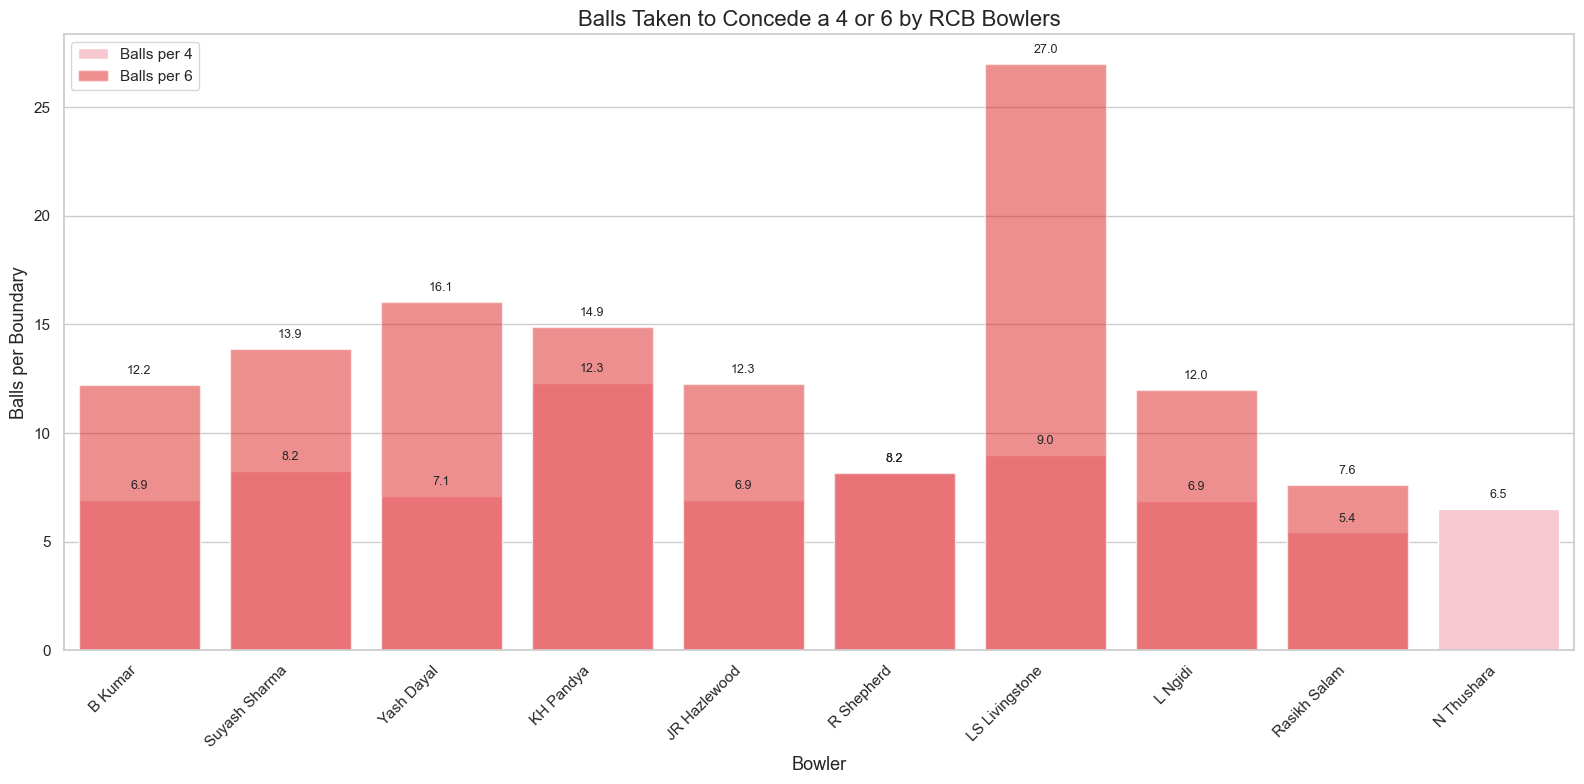

In [225]:
# Use your original DataFrame
df = bowler_boundary_stats.copy()

# Sort by balls_bowled
df = df.sort_values('balls_bowled', ascending=False).head(20)

# Set figure size and style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Plot Balls per 4 (Gold)
sns.barplot(x=df.index, y='balls_per_4', data=df, color='pink', label='Balls per 4')

# Overlay Balls per 6 (Red)
sns.barplot(x=df.index, y='balls_per_6', data=df, color='red', alpha=0.5, label='Balls per 6')

# Add annotations
for i, (bowler, row) in enumerate(df.iterrows()):
    plt.text(i, row['balls_per_4'] + 0.5, f"{row['balls_per_4']:.1f}", ha='center', fontsize=9)
    plt.text(i, row['balls_per_6'] + 0.5, f"{row['balls_per_6']:.1f}", ha='center', fontsize=9)

# Titles and labels
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### 1st Inn

In [235]:
bowling = rcb_team_2025[rcb_team_2025['bowling_team'] == 'Royal Challengers Bengaluru']

In [236]:
bowling_1st  = bowling[bowling['inning'] == 1]
bowling_2nd  = bowling[bowling['inning'] == 2]

In [237]:
# Total balls bowled
balls_bowled = bowling_1st.groupby('bowler').size().rename("balls_bowled")
# Total runs conceded
runs_conceded = bowling_1st.groupby('bowler')['total_runs'].sum().rename("runs_conceded")
# Wickets taken
wickets = bowling_1st[bowling_1st['is_wicket'] == 1].groupby('bowler').size().rename("wickets")
# Dot balls
dot_balls = bowling_1st[bowling_1st['total_runs'] == 0].groupby('bowler').size().rename("dot_balls")
# Fours & Sixes conceded
fours_conceded = bowling_1st[bowling_1st['total_runs'] == 4].groupby('bowler').size().rename("fours_conceded")
sixes_conceded = bowling_1st[bowling_1st['total_runs'] == 6].groupby('bowler').size().rename("sixes_conceded")

In [238]:
# Combine all metrics
bowler_stats = pd.concat(
    [balls_bowled, dot_balls, runs_conceded, wickets, fours_conceded, sixes_conceded], 
    axis=1
).fillna(0)

In [239]:
# Convert all to integers
bowler_stats = bowler_stats.astype(int)

# Metrics
bowler_stats['dot_percent'] = (bowler_stats['dot_balls'] / bowler_stats['balls_bowled']) * 100
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets'].replace(0, pd.NA)
bowler_stats['average'] = bowler_stats['runs_conceded'] / bowler_stats['wickets'].replace(0, pd.NA)

# Clean up invalid or infinite values
for col in ['strike_rate', 'average']:
    bowler_stats[col] = pd.to_numeric(bowler_stats[col], errors='coerce')
    bowler_stats[col].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Round metrics
bowler_stats['dot_percent'] = bowler_stats['dot_percent'].round(2)
bowler_stats['economy'] = bowler_stats['economy'].round(2)
bowler_stats['strike_rate'] = bowler_stats['strike_rate'].round(2)
bowler_stats['average'] = bowler_stats['average'].round(2)

# ✅ Filter bowlers with at least 10 overs (60 balls)
bowler_stats_filtered = bowler_stats[bowler_stats['balls_bowled'] >= 6]

In [240]:
# Sort by wickets for top performers
bowler_stats_sorted = bowler_stats_filtered.sort_values(by='wickets', ascending=False)

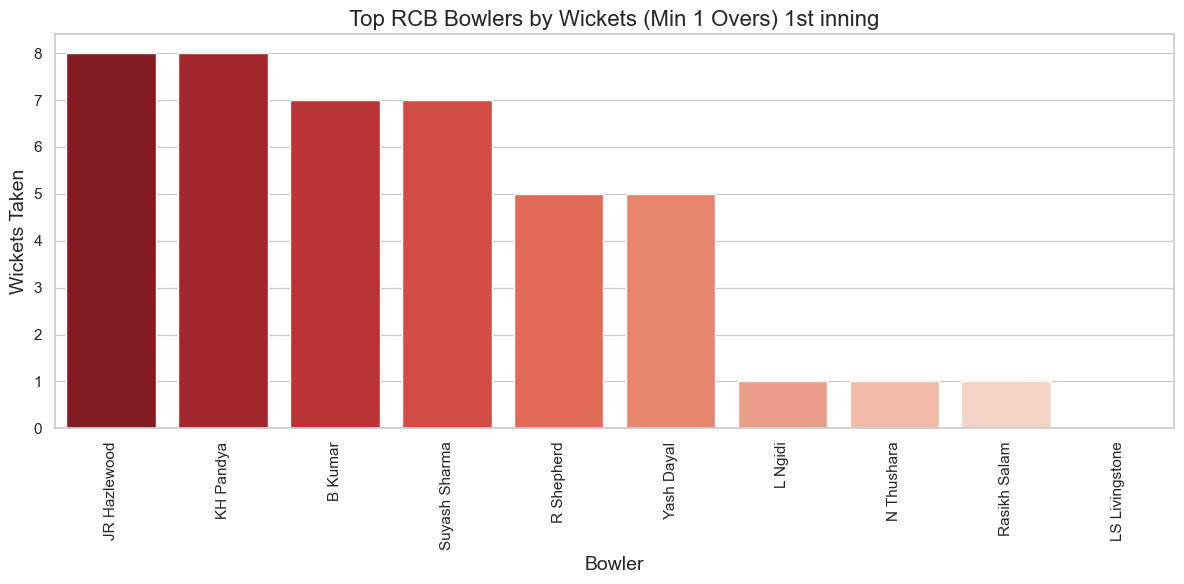

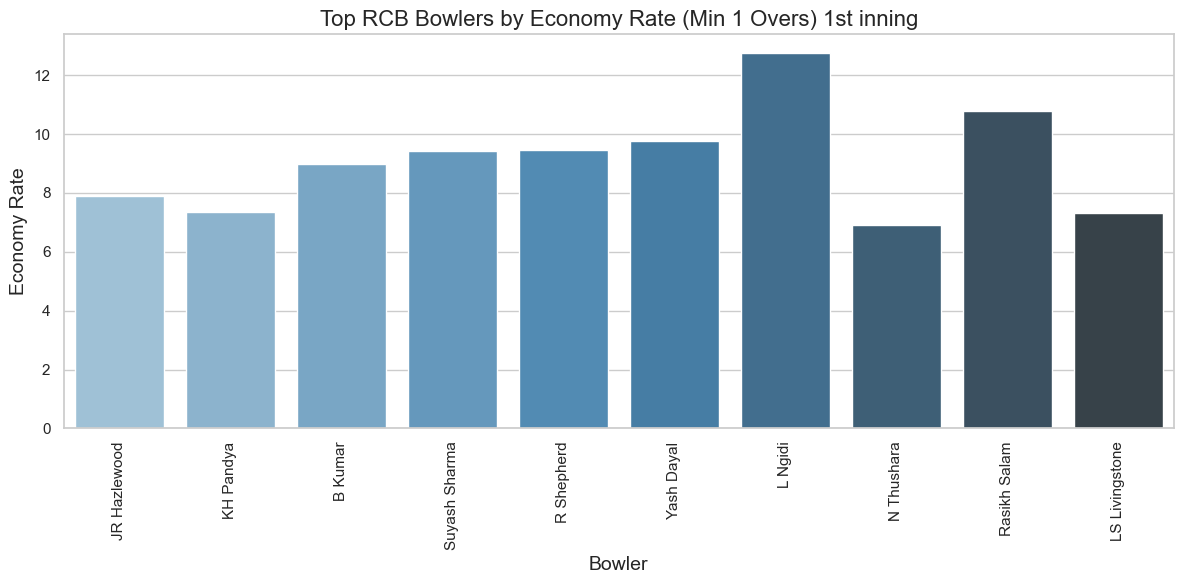

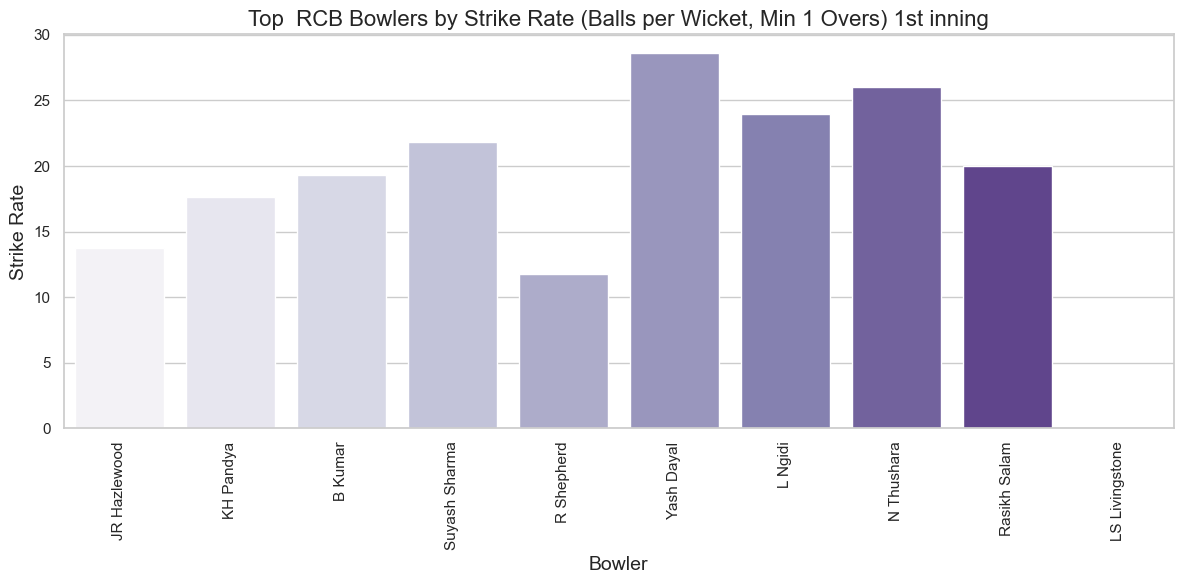

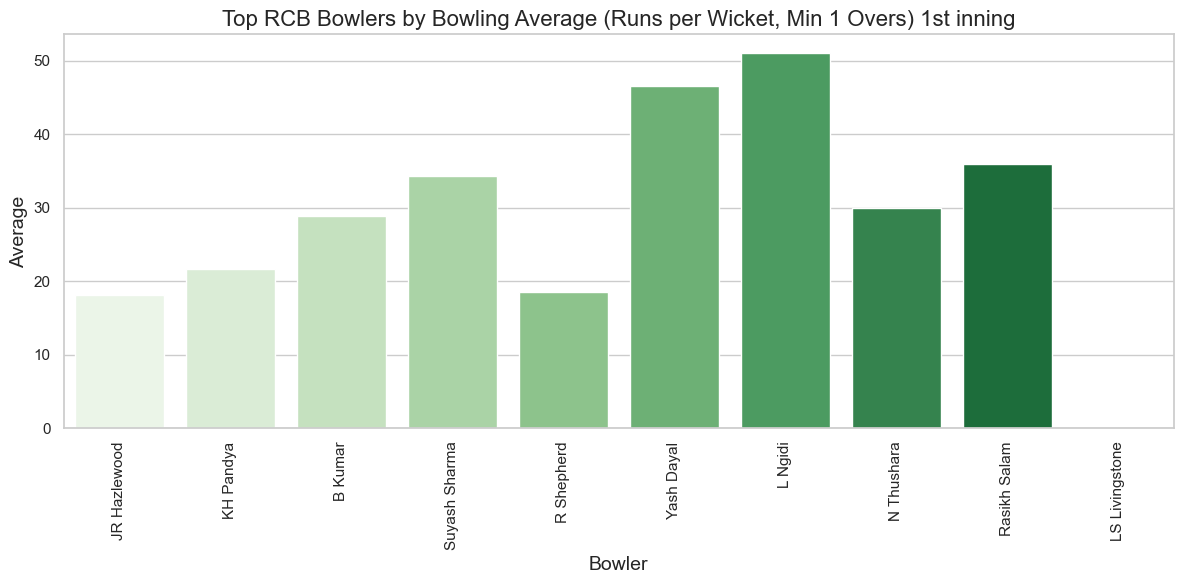

In [241]:
# Prepare for plotting
top_bowlers = bowler_stats_sorted.head(20).copy()
top_bowlers.reset_index(inplace=True)

# Plot Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# 🔹 Plot 1: Wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='Reds_r')
plt.title('Top RCB Bowlers by Wickets (Min 1 Overs) 1st inning')
plt.ylabel('Wickets Taken')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: Economy Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='Blues_d')
plt.title('Top RCB Bowlers by Economy Rate (Min 1 Overs) 1st inning')
plt.ylabel('Economy Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 3: Strike Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='strike_rate', data=top_bowlers, palette='Purples')
plt.title('Top  RCB Bowlers by Strike Rate (Balls per Wicket, Min 1 Overs) 1st inning')
plt.ylabel('Strike Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 4: Bowling Average
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='average', data=top_bowlers, palette='Greens')
plt.title('Top RCB Bowlers by Bowling Average (Runs per Wicket, Min 1 Overs) 1st inning')
plt.ylabel('Average')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [242]:
# Count wickets taken by each RCB bowler
rcb_wickets = bowling_1st[bowling_1st['is_wicket'] == 1].groupby('bowler').size().rename("wickets")

# Get the bowler with the most wickets
highest_wicket_taker = rcb_wickets.sort_values(ascending=False).reset_index()

# Display result
print(f"Highest Wicket Taker for RCB: {highest_wicket_taker['bowler'].iloc[0]} with {highest_wicket_taker['wickets'].iloc[0]} wickets in 1st inning.")

Highest Wicket Taker for RCB: JR Hazlewood with 8 wickets in 1st inning.


In [243]:
# $ Highest wicket taker for rcb
highest_wicket_taker.head(20)

bowler  wickets
0   JR Hazlewood        8
1      KH Pandya        8
2        B Kumar        7
3  Suyash Sharma        7
4     R Shepherd        5
5     Yash Dayal        5
6        L Ngidi        1
7     N Thushara        1
8   Rasikh Salam        1

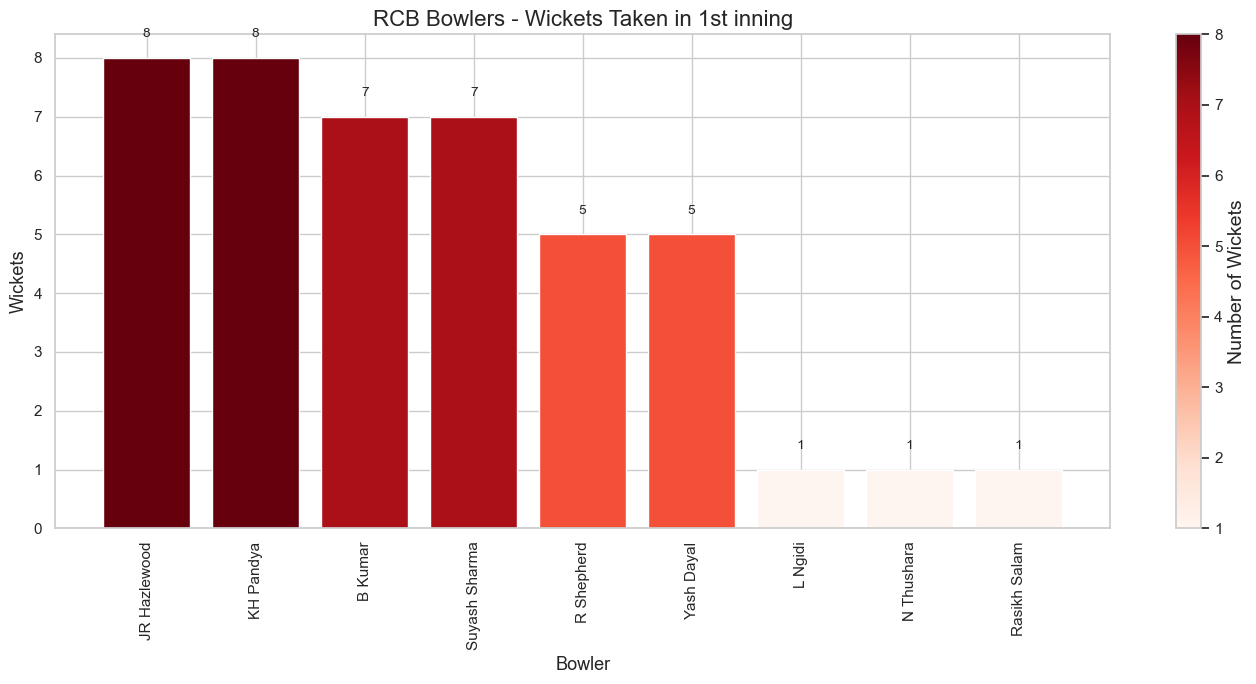

In [244]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = highest_wicket_taker.head(20)


# Normalize for color mapping
norm = Normalize(vmin=df_bowl_rcb['wickets'].min(), vmax=df_bowl_rcb['wickets'].max())
cmap = plt.cm.Reds  # Red gradient
colors = cmap(norm(df_bowl_rcb['wickets']))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(df_bowl_rcb['bowler'], df_bowl_rcb['wickets'], color=colors)

# Annotate each bar with wicket count
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

# Customize axes
ax.set_title('RCB Bowlers - Wickets Taken in 1st inning', fontsize=16)
ax.set_xlabel('Bowler', fontsize=13)
ax.set_ylabel('Wickets', fontsize=13)
plt.xticks(rotation=90)

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Wickets')

plt.tight_layout()
plt.show()

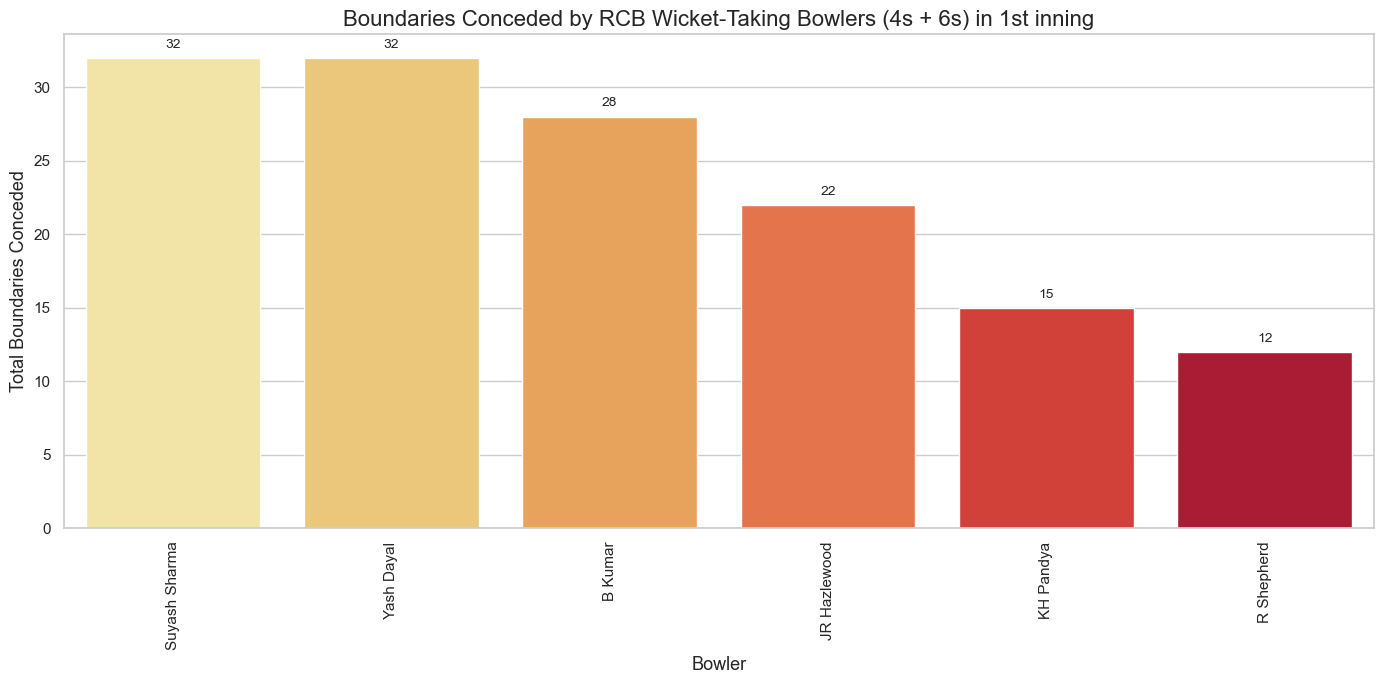

In [273]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = bowling_1st

# Wickets taken by each bowler
wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Boundaries conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine into one DataFrame
bowler_stats = pd.concat([wickets, fours_conceded, sixes_conceded], axis=1).fillna(0)
bowler_stats = bowler_stats.astype({'wickets': int, 'fours_conceded': int, 'sixes_conceded': int})

# Filter only bowlers with at least 1 wicket
bowler_stats = bowler_stats[bowler_stats['wickets'] > 1]

# Calculate total boundaries conceded
bowler_stats['total_boundaries'] = bowler_stats['fours_conceded'] + bowler_stats['sixes_conceded']
bowler_stats = bowler_stats.sort_values('total_boundaries', ascending=False).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=bowler_stats, x='bowler', y='total_boundaries', palette='YlOrRd')

# Annotate each bar
for index, row in bowler_stats.iterrows():
    plt.text(index, row['total_boundaries'] + 0.5, f"{row['total_boundaries']}", 
             ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Boundaries Conceded by RCB Wicket-Taking Bowlers (4s + 6s) in 1st inning', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Total Boundaries Conceded', fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [251]:
# Filter only RCB bowlers
df_bowl_rcb = rcb_team_2025[rcb_team_2025['bowling_team'] == 'Royal Challengers Bengaluru']

# Total balls bowled by each bowler (excluding extras like wides/no-balls if needed)
balls_bowled = df_bowl_rcb.groupby('bowler').size().rename('balls_bowled')

# Count of 4s and 6s conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine all into a single DataFrame
bowler_boundary_stats = pd.concat([balls_bowled, fours_conceded, sixes_conceded], axis=1).fillna(0)

# Ensure integer type
bowler_boundary_stats = bowler_boundary_stats.astype(int)

# Calculate balls per 4 and 6, avoid division by zero
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['fours_conceded'].replace(0, pd.NA)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['sixes_conceded'].replace(0, pd.NA)

# Convert columns to numeric (force coercion of bad values to NaN)
bowler_boundary_stats['balls_per_4'] = pd.to_numeric(bowler_boundary_stats['balls_per_4'], errors='coerce')
bowler_boundary_stats['balls_per_6'] = pd.to_numeric(bowler_boundary_stats['balls_per_6'], errors='coerce')

# Now safely round
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_per_4'].round(2)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_per_6'].round(2)


# Drop NaN if needed (optional)
bowler_boundary_stats.dropna(subset=['balls_per_4', 'balls_per_6'], how='all', inplace=True)

# Display top bowlers
bowler_boundary_stats.sort_values('balls_bowled', ascending=False).head(20)

balls_bowled  fours_conceded  sixes_conceded  balls_per_4  \
bowler                                                                      
B Kumar                  318              46              26         6.91   
Suyash Sharma            305              37              22         8.24   
Yash Dayal               305              43              19         7.09   
KH Pandya                283              23              19        12.30   
JR Hazlewood             270              39              22         6.92   
R Shepherd                90              11              11         8.18   
LS Livingstone            54               6               2         9.00   
L Ngidi                   48               7               4         6.86   
Rasikh Salam              38               7               5         5.43   
N Thushara                26               4               0         6.50   

                balls_per_6  
bowler                       
B Kumar               12.23  
Suyash Sharma         13.86  
Yash Dayal            16.05  
KH Pandya             14.89  
JR Hazlewood          12.27  
R Shepherd             8.18  
LS Livingstone        27.00  
L Ngidi               12.00  
Rasikh Salam           7.60  
N Thushara              NaN

posx and posy should be finite values
posx and posy should be finite values


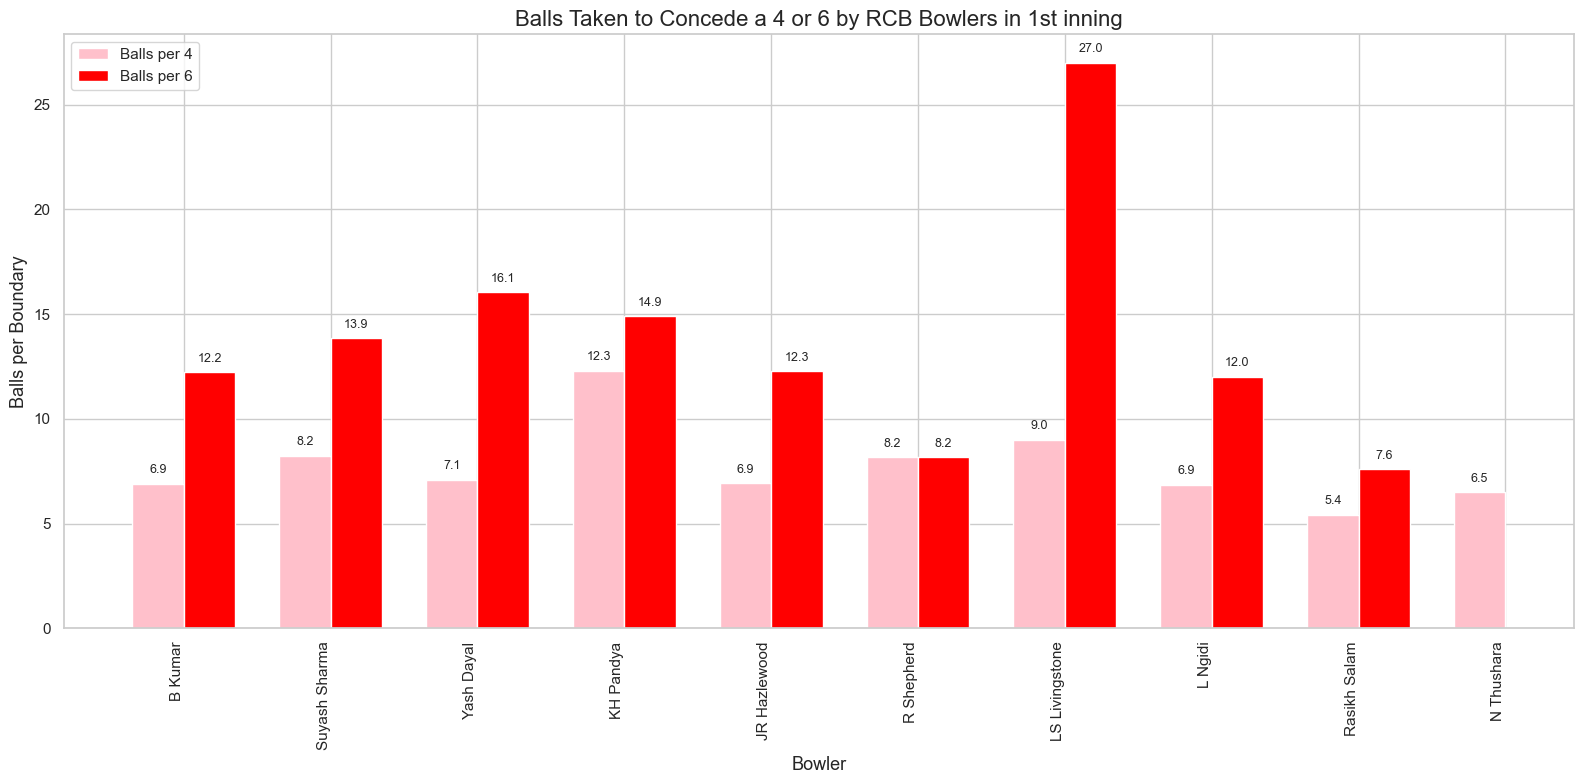

In [252]:
# Your original DataFrame
df = bowler_boundary_stats.copy()
df = df.sort_values('balls_bowled', ascending=False).head(25)

# Extract x-axis labels and data
bowlers = df.index.tolist()
x = np.arange(len(bowlers))  # the label locations
width = 0.35  # the width of the bars

# Initialize plot
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, df['balls_per_4'], width, label='Balls per 4', color='pink')
plt.bar(x + width/2, df['balls_per_6'], width, label='Balls per 6', color='red')

# Add value labels
for i in range(len(bowlers)):
    plt.text(x[i] - width/2, df['balls_per_4'].iloc[i] + 0.5, f"{df['balls_per_4'].iloc[i]:.1f}", 
             ha='center', fontsize=9)
    plt.text(x[i] + width/2, df['balls_per_6'].iloc[i] + 0.5, f"{df['balls_per_6'].iloc[i]:.1f}", 
             ha='center', fontsize=9)

# Customize axes and labels
plt.xticks(x, bowlers, rotation=90, ha='right')
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers in 1st inning', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

### 2nd Inn

In [257]:
# Total balls bowled
balls_bowled = bowling_2nd.groupby('bowler').size().rename("balls_bowled")
# Total runs conceded
runs_conceded = bowling_2nd.groupby('bowler')['total_runs'].sum().rename("runs_conceded")
# Wickets taken
wickets = bowling_2nd[bowling_2nd['is_wicket'] == 1].groupby('bowler').size().rename("wickets")
# Dot balls
dot_balls = bowling_2nd[bowling_2nd['total_runs'] == 0].groupby('bowler').size().rename("dot_balls")
# Fours & Sixes conceded
fours_conceded = bowling_2nd[bowling_2nd['total_runs'] == 4].groupby('bowler').size().rename("fours_conceded")
sixes_conceded = bowling_2nd[bowling_2nd['total_runs'] == 6].groupby('bowler').size().rename("sixes_conceded")

In [258]:
# Combine all metrics
bowler_stats = pd.concat(
    [balls_bowled, dot_balls, runs_conceded, wickets, fours_conceded, sixes_conceded], 
    axis=1
).fillna(0)

In [259]:
# Convert all to integers
bowler_stats = bowler_stats.astype(int)

# Metrics
bowler_stats['dot_percent'] = (bowler_stats['dot_balls'] / bowler_stats['balls_bowled']) * 100
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets'].replace(0, pd.NA)
bowler_stats['average'] = bowler_stats['runs_conceded'] / bowler_stats['wickets'].replace(0, pd.NA)

# Clean up invalid or infinite values
for col in ['strike_rate', 'average']:
    bowler_stats[col] = pd.to_numeric(bowler_stats[col], errors='coerce')
    bowler_stats[col].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Round metrics
bowler_stats['dot_percent'] = bowler_stats['dot_percent'].round(2)
bowler_stats['economy'] = bowler_stats['economy'].round(2)
bowler_stats['strike_rate'] = bowler_stats['strike_rate'].round(2)
bowler_stats['average'] = bowler_stats['average'].round(2)

# ✅ Filter bowlers with at least 10 overs (60 balls)
bowler_stats_filtered = bowler_stats[bowler_stats['balls_bowled'] >= 6]

In [260]:
# Sort by wickets for top performers
bowler_stats_sorted = bowler_stats_filtered.sort_values(by='wickets', ascending=False)

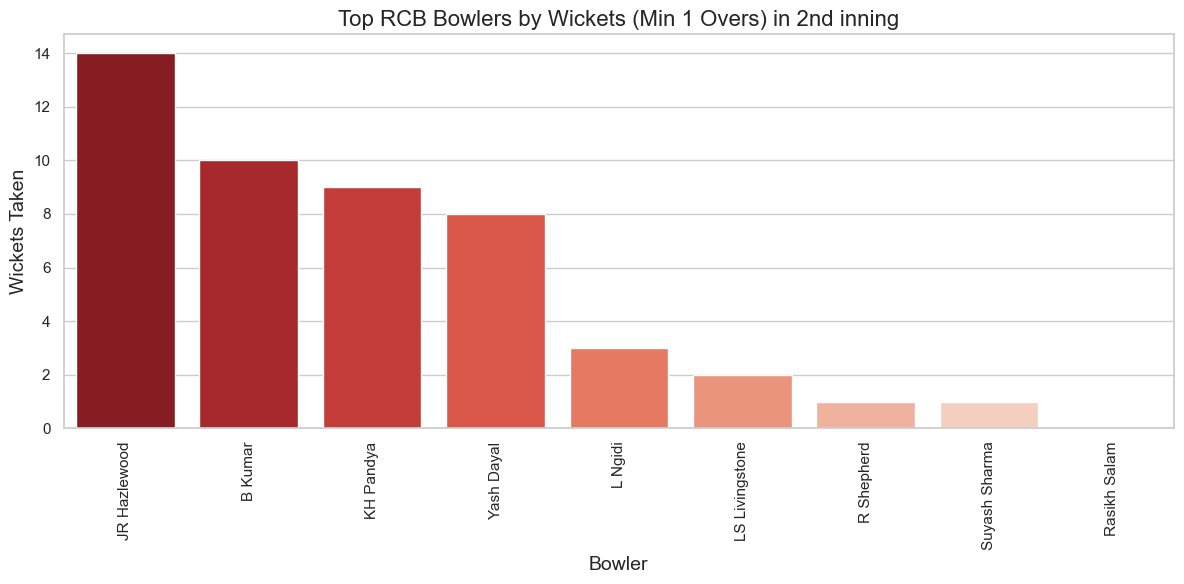

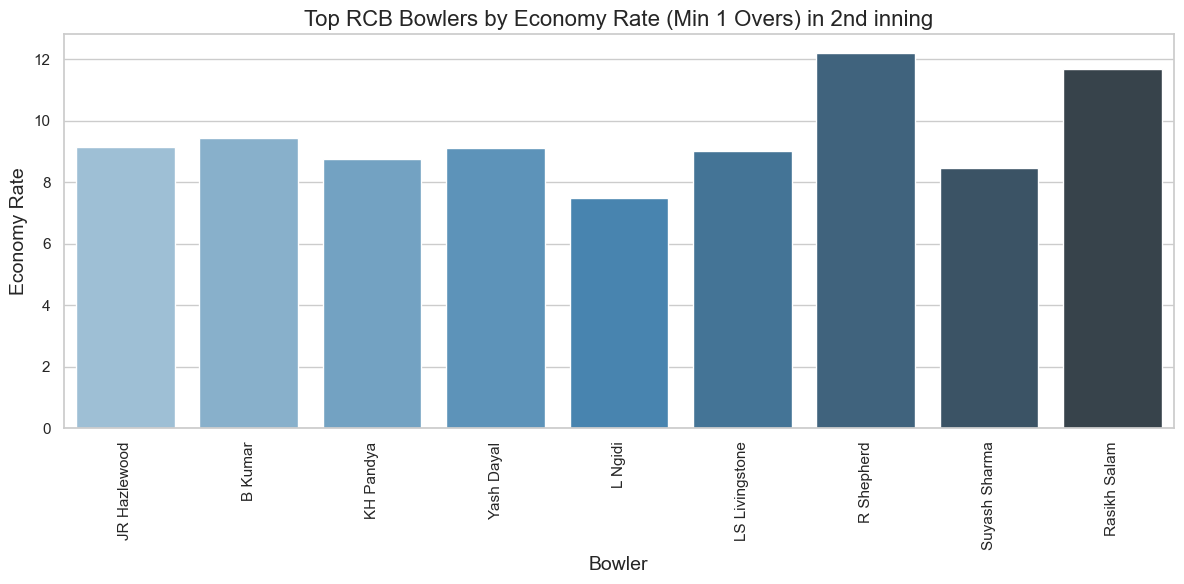

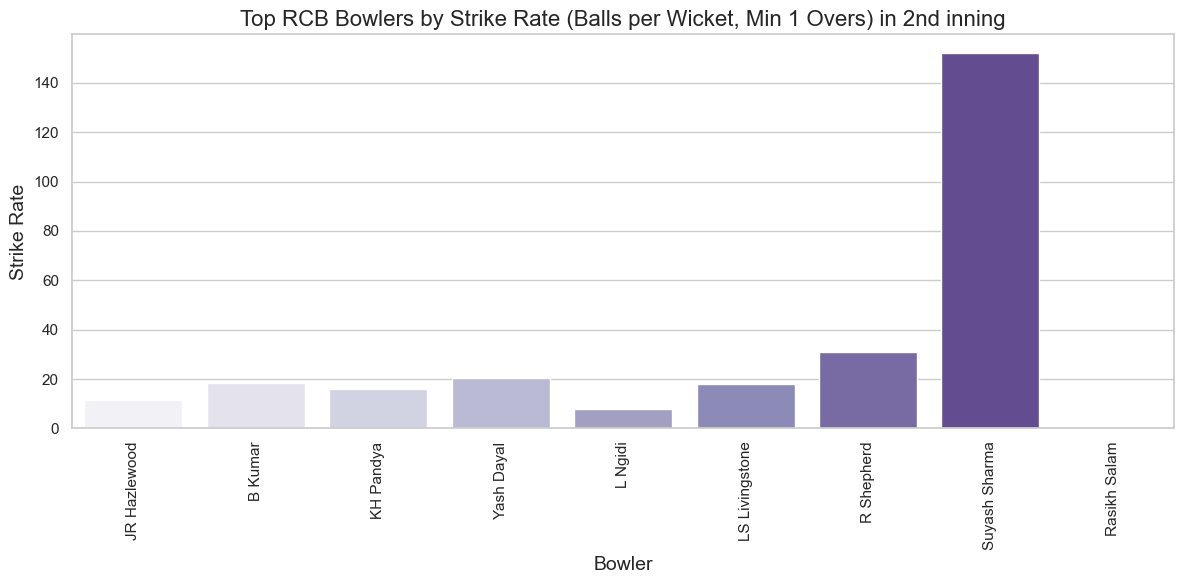

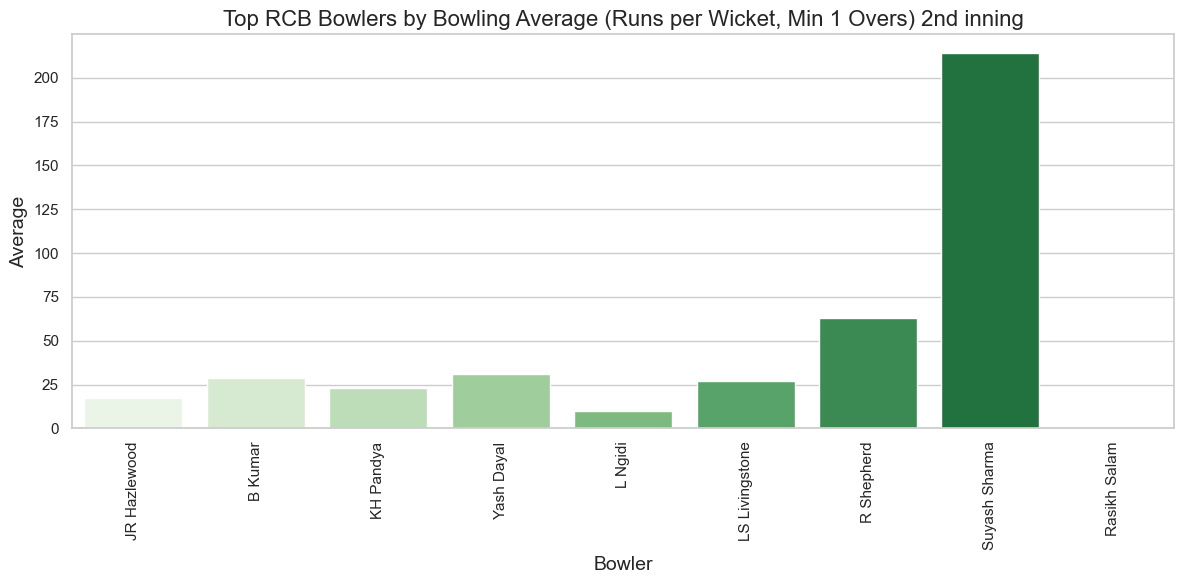

In [261]:
# Prepare for plotting
top_bowlers = bowler_stats_sorted.head(20).copy()
top_bowlers.reset_index(inplace=True)

# Plot Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# 🔹 Plot 1: Wickets
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='wickets', data=top_bowlers, palette='Reds_r')
plt.title('Top RCB Bowlers by Wickets (Min 1 Overs) in 2nd inning')
plt.ylabel('Wickets Taken')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 2: Economy Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='economy', data=top_bowlers, palette='Blues_d')
plt.title('Top RCB Bowlers by Economy Rate (Min 1 Overs) in 2nd inning')
plt.ylabel('Economy Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 3: Strike Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='strike_rate', data=top_bowlers, palette='Purples')
plt.title('Top RCB Bowlers by Strike Rate (Balls per Wicket, Min 1 Overs) in 2nd inning')
plt.ylabel('Strike Rate')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 🔹 Plot 4: Bowling Average
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='average', data=top_bowlers, palette='Greens')
plt.title('Top RCB Bowlers by Bowling Average (Runs per Wicket, Min 1 Overs) 2nd inning')
plt.ylabel('Average')
plt.xlabel('Bowler')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [262]:
# Count wickets taken by each RCB bowler
rcb_wickets = bowling_2nd[bowling_2nd['is_wicket'] == 1].groupby('bowler').size().rename("wickets")

# Get the bowler with the most wickets
highest_wicket_taker = rcb_wickets.sort_values(ascending=False).reset_index()

# Display result
print(f"Highest Wicket Taker for RCB: {highest_wicket_taker['bowler'].iloc[0]} with {highest_wicket_taker['wickets'].iloc[0]} wickets in 2nd inning.")

Highest Wicket Taker for RCB: JR Hazlewood with 14 wickets in 2nd inning.


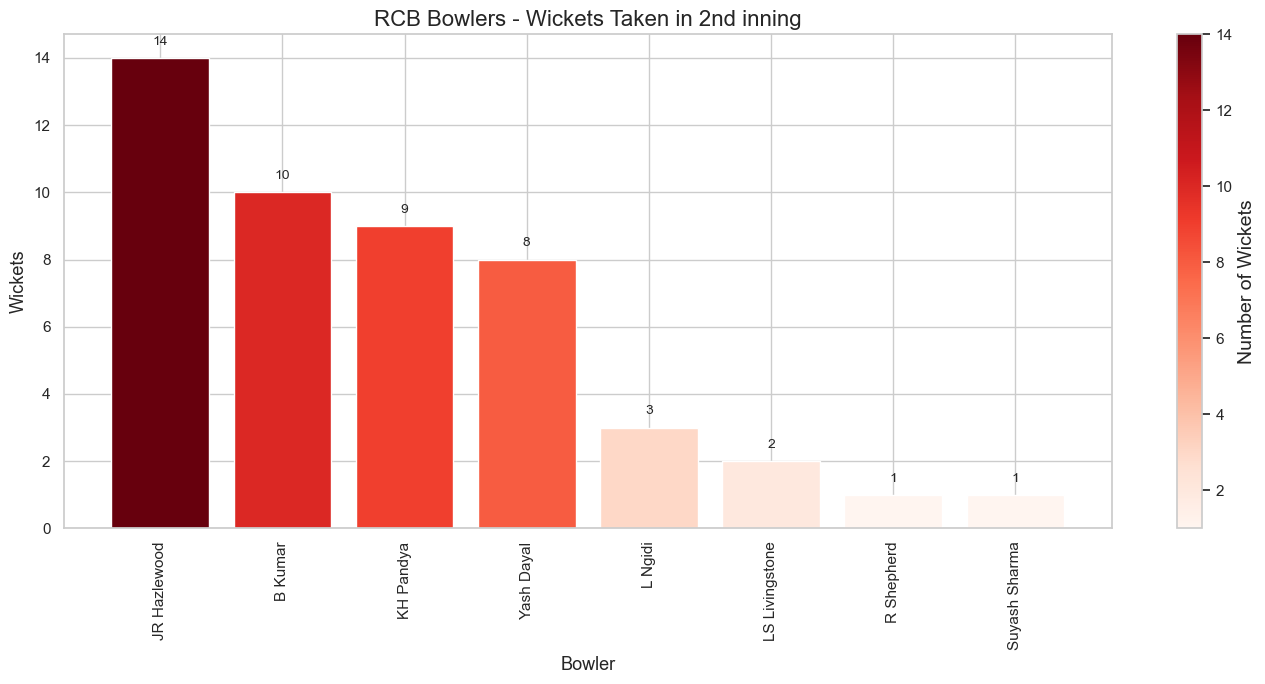

In [267]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = highest_wicket_taker.head(20)


# Normalize for color mapping
norm = Normalize(vmin=df_bowl_rcb['wickets'].min(), vmax=df_bowl_rcb['wickets'].max())
cmap = plt.cm.Reds  # Red gradient
colors = cmap(norm(df_bowl_rcb['wickets']))

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(df_bowl_rcb['bowler'], df_bowl_rcb['wickets'], color=colors)

# Annotate each bar with wicket count
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

# Customize axes
ax.set_title('RCB Bowlers - Wickets Taken in 2nd inning', fontsize=16)
ax.set_xlabel('Bowler', fontsize=13)
ax.set_ylabel('Wickets', fontsize=13)
plt.xticks(rotation=90)

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Wickets')

plt.tight_layout()
plt.show()

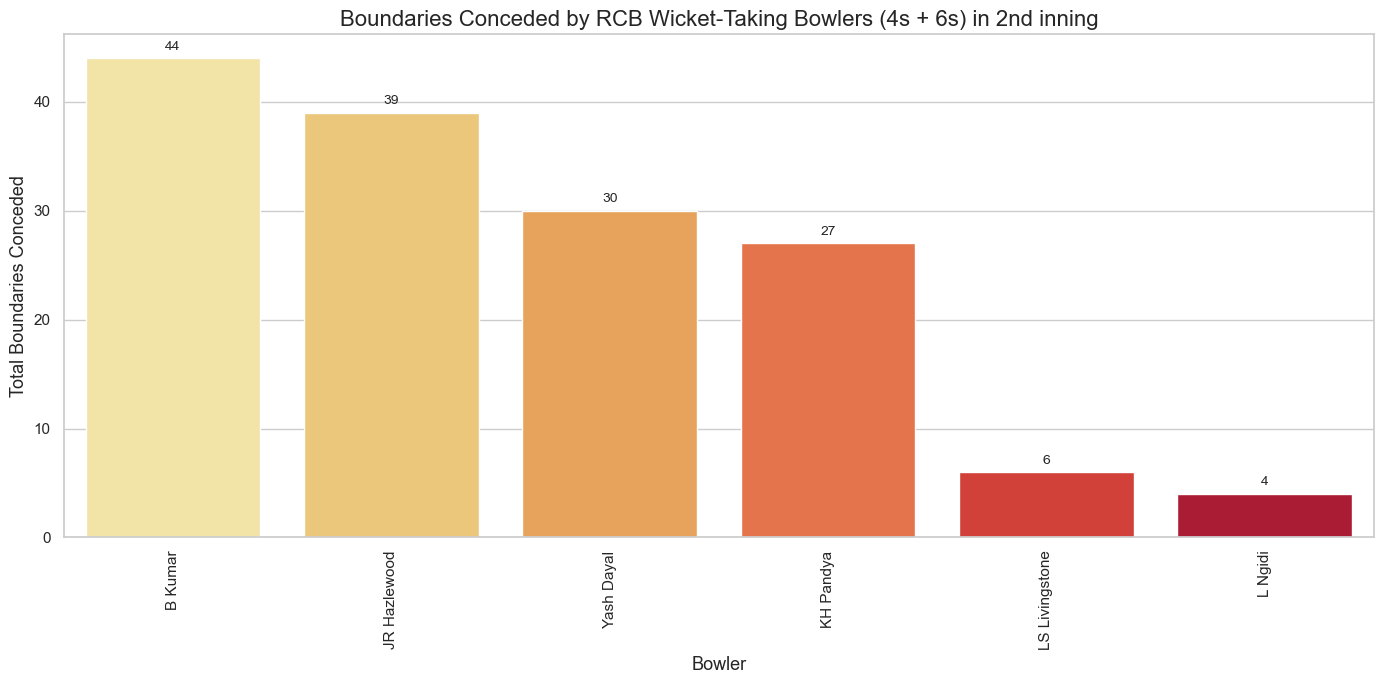

In [274]:
# Filter RCB bowlers' deliveries
df_bowl_rcb = bowling_2nd

# Wickets taken by each bowler
wickets = df_bowl_rcb[df_bowl_rcb['is_wicket'] == 1].groupby('bowler').size().rename('wickets')

# Boundaries conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine into one DataFrame
bowler_stats = pd.concat([wickets, fours_conceded, sixes_conceded], axis=1).fillna(0)
bowler_stats = bowler_stats.astype({'wickets': int, 'fours_conceded': int, 'sixes_conceded': int})

# Filter only bowlers with at least 1 wicket
bowler_stats = bowler_stats[bowler_stats['wickets'] > 1]

# Calculate total boundaries conceded
bowler_stats['total_boundaries'] = bowler_stats['fours_conceded'] + bowler_stats['sixes_conceded']
bowler_stats = bowler_stats.sort_values('total_boundaries', ascending=False).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=bowler_stats, x='bowler', y='total_boundaries', palette='YlOrRd')

# Annotate each bar
for index, row in bowler_stats.iterrows():
    plt.text(index, row['total_boundaries'] + 0.5, f"{row['total_boundaries']}", 
             ha='center', va='bottom', fontsize=10)

# Customize plot
plt.title('Boundaries Conceded by RCB Wicket-Taking Bowlers (4s + 6s) in 2nd inning', fontsize=16)
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Total Boundaries Conceded', fontsize=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [275]:
# Filter only RCB bowlers
df_bowl_rcb = bowling_2nd

# Total balls bowled by each bowler (excluding extras like wides/no-balls if needed)
balls_bowled = df_bowl_rcb.groupby('bowler').size().rename('balls_bowled')

# Count of 4s and 6s conceded
fours_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 4].groupby('bowler').size().rename('fours_conceded')
sixes_conceded = df_bowl_rcb[df_bowl_rcb['total_runs'] == 6].groupby('bowler').size().rename('sixes_conceded')

# Combine all into a single DataFrame
bowler_boundary_stats = pd.concat([balls_bowled, fours_conceded, sixes_conceded], axis=1).fillna(0)

# Ensure integer type
bowler_boundary_stats = bowler_boundary_stats.astype(int)

# Calculate balls per 4 and 6, avoid division by zero
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['fours_conceded'].replace(0, pd.NA)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_bowled'] / bowler_boundary_stats['sixes_conceded'].replace(0, pd.NA)

# Convert columns to numeric (force coercion of bad values to NaN)
bowler_boundary_stats['balls_per_4'] = pd.to_numeric(bowler_boundary_stats['balls_per_4'], errors='coerce')
bowler_boundary_stats['balls_per_6'] = pd.to_numeric(bowler_boundary_stats['balls_per_6'], errors='coerce')

# Now safely round
bowler_boundary_stats['balls_per_4'] = bowler_boundary_stats['balls_per_4'].round(2)
bowler_boundary_stats['balls_per_6'] = bowler_boundary_stats['balls_per_6'].round(2)


# Drop NaN if needed (optional)
bowler_boundary_stats.dropna(subset=['balls_per_4', 'balls_per_6'], how='all', inplace=True)

# Display top bowlers
bowler_boundary_stats.sort_values('balls_bowled', ascending=False).head(20)

balls_bowled  fours_conceded  sixes_conceded  balls_per_4  \
bowler                                                                      
B Kumar                  183              26              18         7.04   
Yash Dayal               162              21               9         7.71   
JR Hazlewood             160              23              16         6.96   
Suyash Sharma            152              16              11         9.50   
KH Pandya                142              17              10         8.35   
LS Livingstone            36               4               2         9.00   
R Shepherd                31               5               5         6.20   
L Ngidi                   24               3               1         8.00   
Rasikh Salam              18               4               2         4.50   

                balls_per_6  
bowler                       
B Kumar               10.17  
Yash Dayal            18.00  
JR Hazlewood          10.00  
Suyash Sharma         13.82  
KH Pandya             14.20  
LS Livingstone        18.00  
R Shepherd             6.20  
L Ngidi               24.00  
Rasikh Salam           9.00

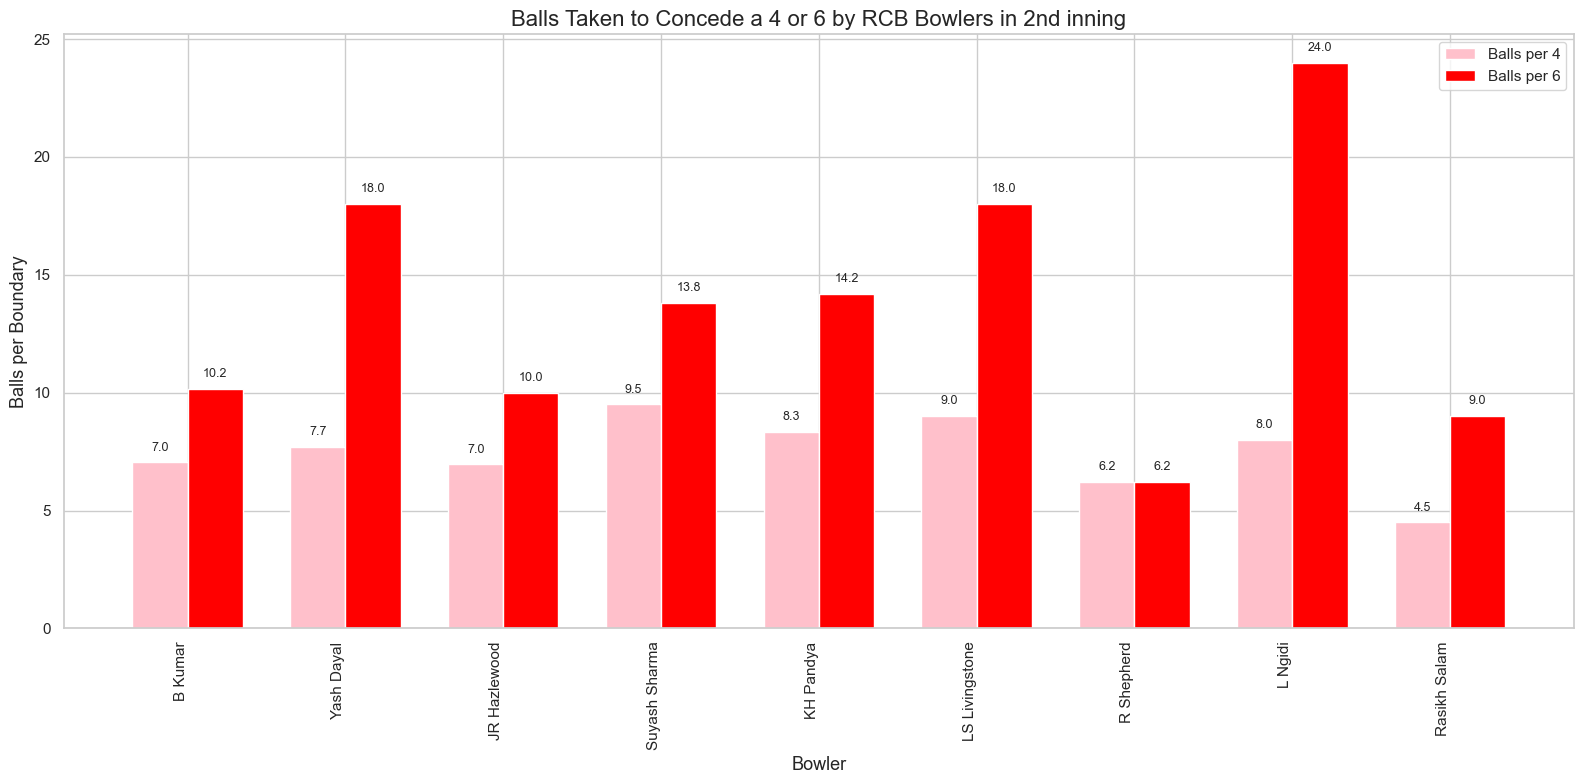

In [277]:
# Your original DataFrame
df = bowler_boundary_stats.copy()
df = df.sort_values('balls_bowled', ascending=False).head(25)

# Extract x-axis labels and data
bowlers = df.index.tolist()
x = np.arange(len(bowlers))  # the label locations
width = 0.35  # the width of the bars

# Initialize plot
plt.figure(figsize=(16, 8))
plt.bar(x - width/2, df['balls_per_4'], width, label='Balls per 4', color='pink')
plt.bar(x + width/2, df['balls_per_6'], width, label='Balls per 6', color='red')

# Add value labels
for i in range(len(bowlers)):
    plt.text(x[i] - width/2, df['balls_per_4'].iloc[i] + 0.5, f"{df['balls_per_4'].iloc[i]:.1f}", 
             ha='center', fontsize=9)
    plt.text(x[i] + width/2, df['balls_per_6'].iloc[i] + 0.5, f"{df['balls_per_6'].iloc[i]:.1f}", 
             ha='center', fontsize=9)

# Customize axes and labels
plt.xticks(x, bowlers, rotation=90, ha='right')
plt.xlabel('Bowler', fontsize=13)
plt.ylabel('Balls per Boundary', fontsize=13)
plt.title('Balls Taken to Concede a 4 or 6 by RCB Bowlers in 2nd inning', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()